## Libraries

In [194]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [195]:
import sys
sys.path.insert(1, '../')
from glob import glob
import helpers.dataset_stats as ds
import helpers.convergence_stats as cs
import helpers.scalability_stats as ss
import helpers.sig_freq_itemsets_analyzer as sig
import helpers.numfreqitemsets_stats as ns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import seaborn as sns
import matplotlib
from itertools import combinations
from collections import defaultdict
import json
import pickle
import random

In [216]:
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['axes.labelweight'] = 'bold'
matplotlib.rcParams['axes.spines.top'] = 'False'
matplotlib.rcParams['axes.spines.right'] = 'False'
matplotlib.rcParams['axes.spines.left'] = 'False'
matplotlib.rcParams['axes.spines.bottom'] = 'False'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['axes.grid.axis'] = 'y'
matplotlib.rcParams['axes.titleweight'] = 'bold'
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20 
matplotlib.rcParams['legend.markerscale'] = 2
matplotlib.rcParams['legend.fontsize'] = 20
# matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

In [217]:
palette = sns.color_palette(['#9BA2FF', '#FFBC0A', '#AA5042', '#B0C4B1', 
                             '#002A22', '#FCB9B2', '#91CB3E', '#DE3C4B',
                             '#1CCAD8', '#7E6C6C'])
divpal = sns.diverging_palette(148, 283, s=99, l=46, n=22)

In [218]:
p = sns.color_palette("Paired")
p.extend(sns.color_palette("Set2"))
p.extend(sns.color_palette("husl"))

In [219]:
pal2 = sns.color_palette(['#3F2A2B'])
# pal2.extend(divpal)
pal2.extend(p)

## DataSets

In [7]:
datasets = ['edit-iewikibooks', 'kosarak_3000',
            'chess', 'foodmart', 'dbpedia-occupation', 
            'BMS1', 'BMS2', 'retail']

dataset_names = {'edit-iewikibooks' : 'iewiki',
                 'kosarak_3000' : 'kosarak',
                 'dbpedia-occupation' : 'db-occ'}

In [8]:
seq_datasets = ['FIFA', 'LEVIATHAN', 'kosarakSeq',
                'BMS1Seq', 'BIKE', 'BIBLE', 'SIGN']

In [227]:
samplers = ['diffusr.samplers.GmmtSampler', 
            'caterpillars.samplers.NaiveBJDMSampler', 
            'caterpillars.samplers.CurveballBJDMSampler']
samplers_ = ["alice.samplers.BJDMSampler", 
             "alice.samplers.CurveballBJDMSampler",
             "alice.samplers.GmmtSampler"]
sampler_names = {'GmmtSampler' : 'GMMT',
                 'diffusr.samplers.GmmtSampler': 'GMMT',
                 'alice.samplers.GmmtSampler': 'GMMT',
                 'alice.samplers.SelfLoopGmmtSampler': 'GMMT',
                 'caterpillars.samplers.NaiveBJDMSampler' : 'ALICE-A',
                 'alice.samplers.BJDMSampler' : 'ALICE-A',
                 'caterpillars.samplers.CurveballBJDMSampler' : 'ALICE-B',
                 'alice.samplers.CurveballBJDMSampler' : 'ALICE-B',
                 'alice.samplers.SelfLoopBJDMSampler': 'SelfLoop',
                 'alice.samplers.AliceCSampler': 'ALICE-S',
                 'alice.samplers.AliceSSampler': 'ALICE-S',
                 'alice.samplers.GmmtSeqSampler': 'GMMT-S'}

In [10]:
thresh = {'edit-iewikibooks':'0.014', 
          'kosarak_3000':'0.003',
          'chess':'0.8', 
          'foodmart':'3.0E-4',
          'dbpedia-occupation':'5.0E-4', 
          'BMS1':'0.001', 
          'BMS2':'0.002', 
          'retail':'0.002',
          'BIBLE':'0.1',
          'BIKE':'0.025',
          'BMS1Seq':'0.002',
          'FIFA':'0.275',
          'kosarakSeq':'0.007',
          'LEVIATHAN':'0.15',
          'SIGN':'0.4'}

In [11]:
data_dir = '../datasets/'
seq_data_dir = '../datasets/sequential/'
fig_dir = '/Users/giulia/Documents/Projects/NullModels/random-butterflies/icdm2022/figures/'

### Dataset Stats

In [51]:
dfs = []
for dataset in datasets:
    dbname = dataset_names.get(dataset, dataset)
    stats = ds.get_dataset_stats(data_dir, dataset)
    stats[0] = dbname
    dfs.append(stats)
stats_df = pd.DataFrame(dfs)

In [52]:
stats_df.columns = ['DataSet', 'Transaction Num', 'Item Num', 
                    'Sum Transaction Lengths',   'AVG Transaction Length', 
                    'Density']

In [14]:
print(stats_df.to_latex(index=False, float_format="%.4f", column_format='lrrrrr',
                        caption='Statistics of the real datasets.',
                        label='tbl:datasets', position='!ht'))

\begin{table}[!ht]
\centering
\caption{Statistics of the real datasets.}
\label{tbl:datasets}
\begin{tabular}{lrrrrr}
\toprule
 DataSet &  Transaction Num &  Item Num &  Sum Transaction Lengths &  AVG Transaction Length &  Density \\
\midrule
  iewiki &              137 &       558 &                      651 &                  4.7518 &   0.0085 \\
 kosarak &             3000 &      5767 &                    23664 &                  7.8880 &   0.0014 \\
   chess &             3196 &        75 &                   118252 &                 37.0000 &   0.4933 \\
foodmart &             4141 &      1559 &                    18319 &                  4.4238 &   0.0028 \\
  db-occ &            10000 &      8984 &                    19729 &                  1.9729 &   0.0002 \\
    BMS1 &            59602 &       497 &                   149639 &                  2.5106 &   0.0051 \\
    BMS2 &            77512 &      3340 &                   358278 &                  4.6222 &   0.0014 \\
  retail

/var/folders/nb/fsgt9jgs34x6qd_dvlnbdw680000gn/T/ipykernel_85684/1553566010.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stats_df.to_latex(index=False, float_format="%.4f", column_format='lrrrrr',


### Seq Dataset Stats

In [19]:
dfs = []
for dataset in seq_datasets:
    dbname = dataset_names.get(dataset, dataset)
    stats = ds.get_dataset_stats(seq_data_dir, dataset)
    stats[0] = dbname
    dfs.append(stats)
stats_df = pd.DataFrame(dfs)

In [20]:
stats_df.columns = ['DataSet', 'Transaction Num', 'Item Num', 
                    'Sum Transaction Lengths',   'AVG Transaction Length', 
                    'Density']

In [21]:
print(stats_df.to_latex(index=False, float_format="%.4f", column_format='lrrrrr',
                        caption='Statistics of the real datasets.',
                        label='tbl:datasets', position='!ht'))

\begin{table}[!ht]
\centering
\caption{Statistics of the real datasets.}
\label{tbl:datasets}
\begin{tabular}{lrrrrr}
\toprule
   DataSet &  Transaction Num &  Item Num &  Sum Transaction Lengths &  AVG Transaction Length &  Density \\
\midrule
      FIFA &            20450 &      2992 &                  1502634 &                 73.4784 &   0.0246 \\
 LEVIATHAN &             5834 &      9027 &                   400336 &                 68.6212 &   0.0076 \\
kosarakSeq &           990002 &     41272 &                 17028032 &                 17.2000 &   0.0004 \\
   BMS1Seq &            59601 &       499 &                   358877 &                  6.0213 &   0.0121 \\
      BIKE &            21078 &        69 &                   327844 &                 15.5538 &   0.2254 \\
     BIBLE &            36369 &     13907 &                  1610501 &                 44.2822 &   0.0032 \\
      SIGN &              730 &       269 &                    76646 &                104.9945 &   0.

/var/folders/nb/fsgt9jgs34x6qd_dvlnbdw680000gn/T/ipykernel_85684/1553566010.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stats_df.to_latex(index=False, float_format="%.4f", column_format='lrrrrr',


### BJDM

In [22]:
num_squares = 80

181 7


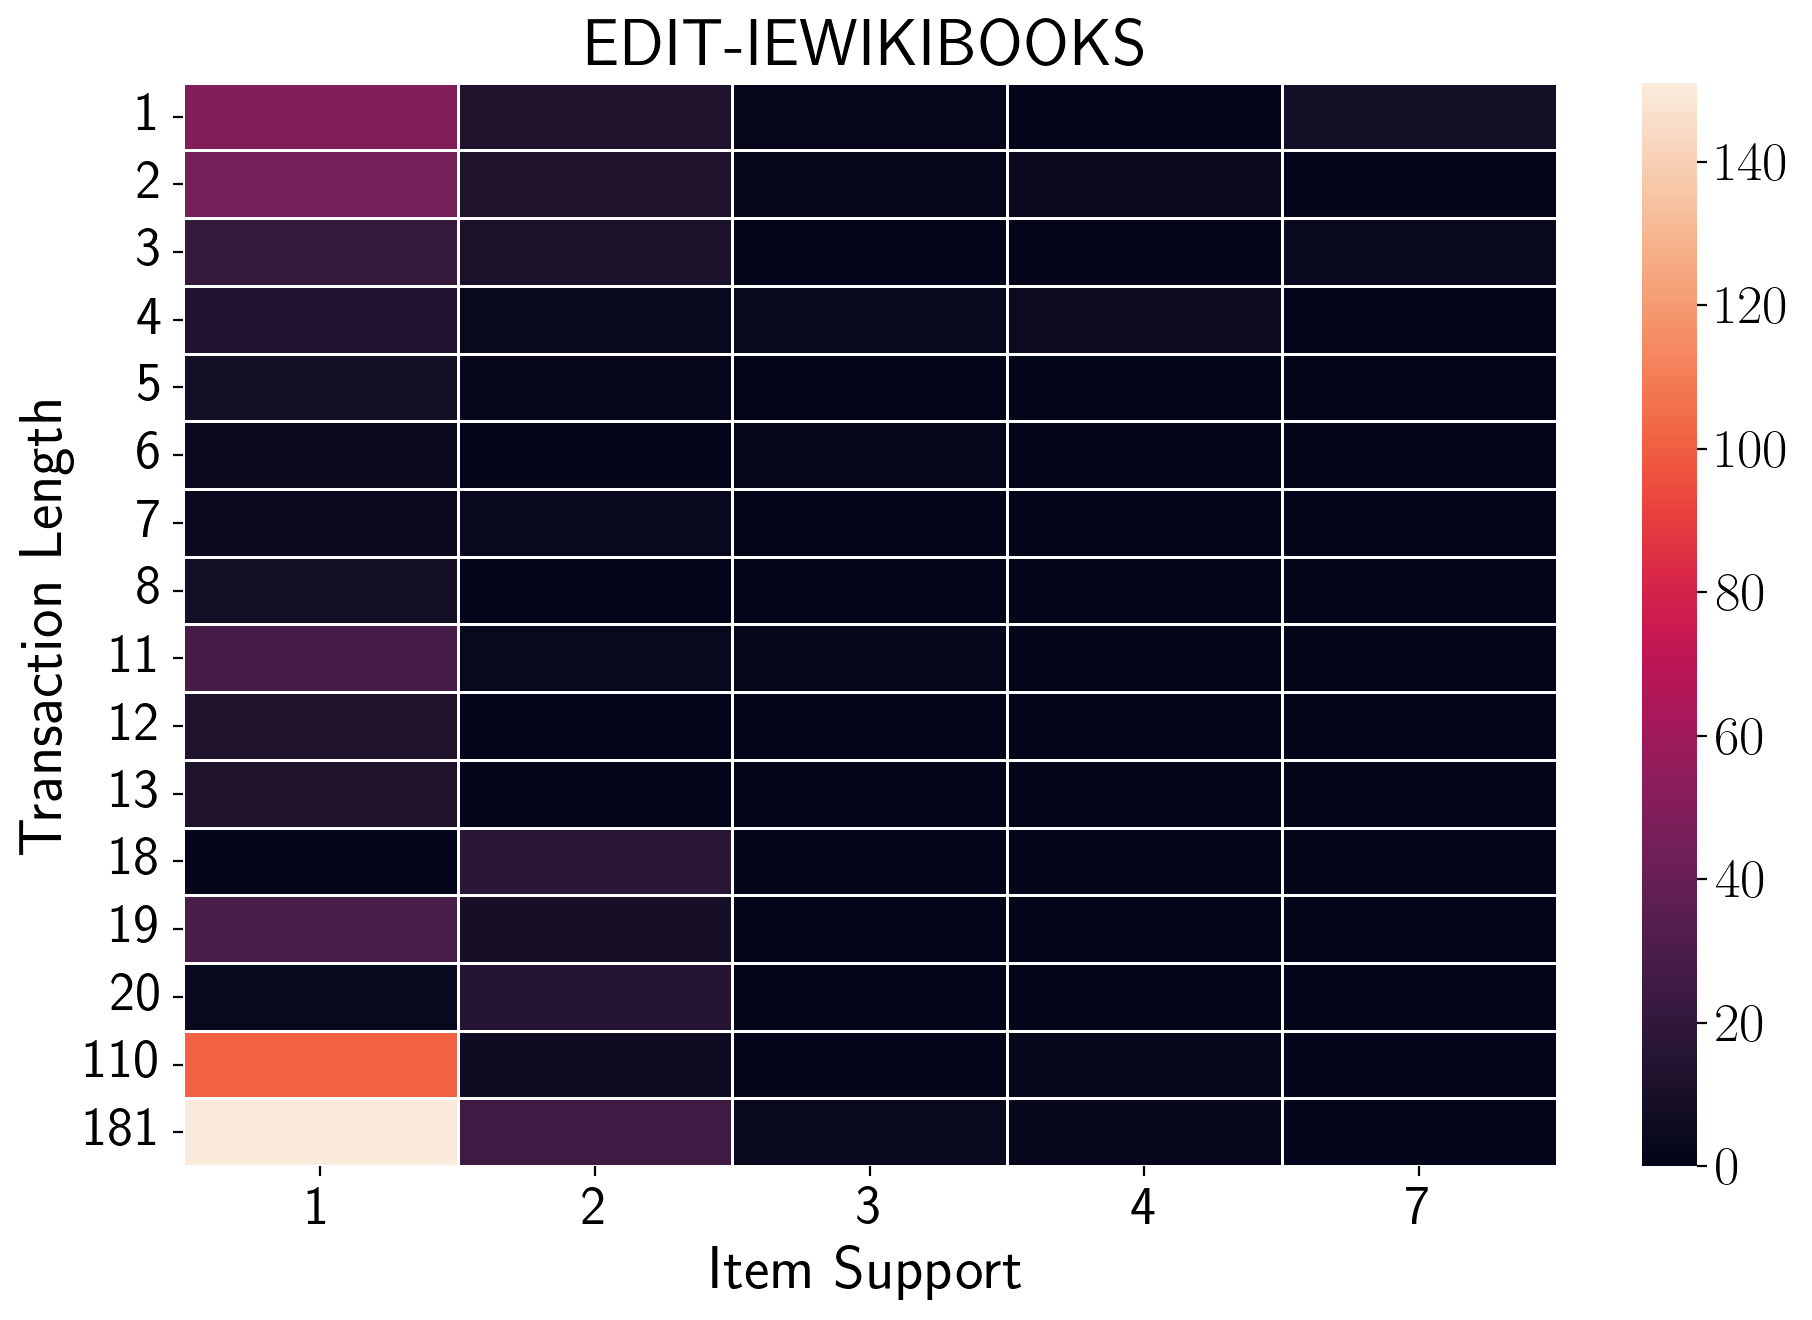

415 1803


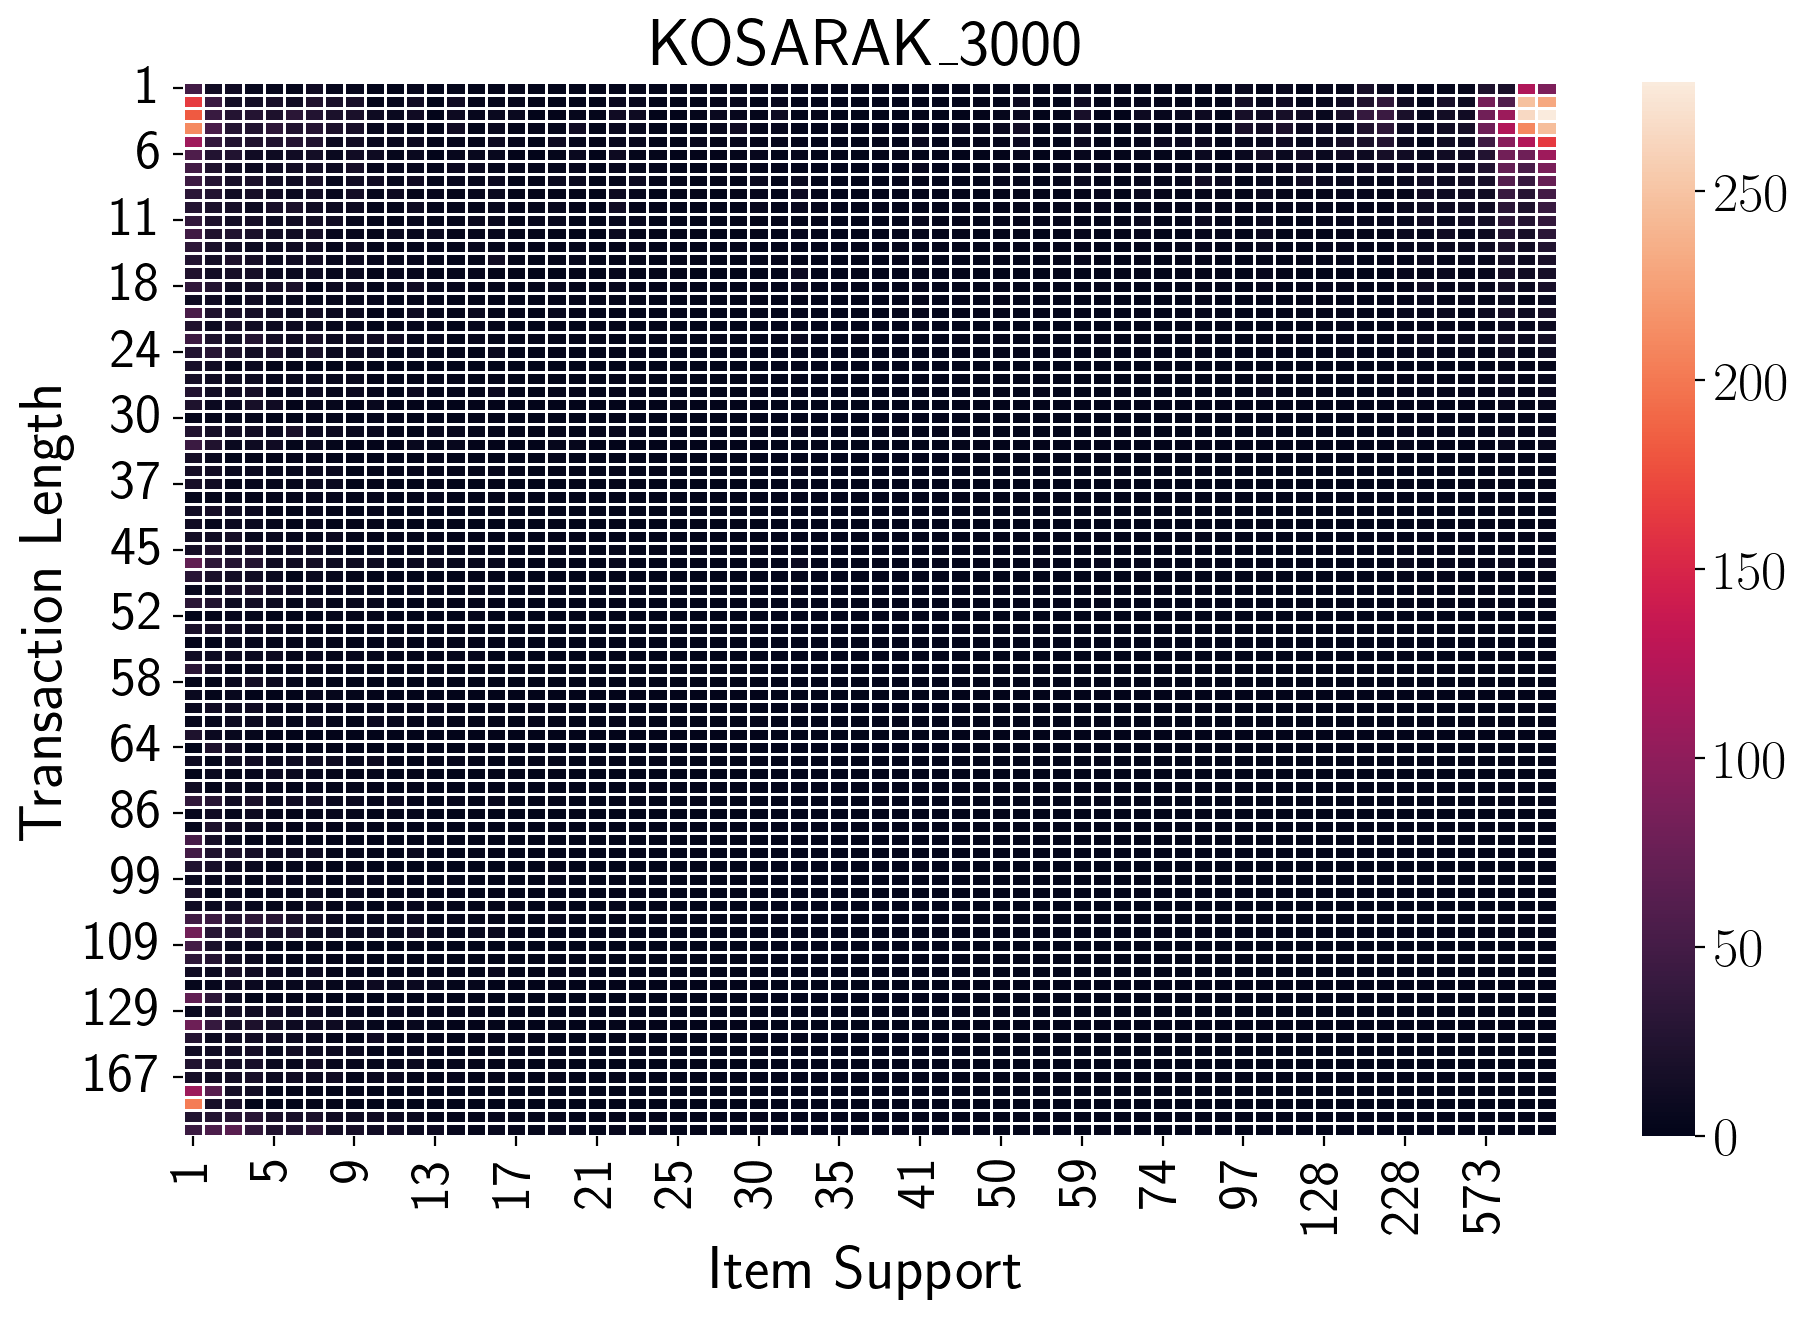

37 3195


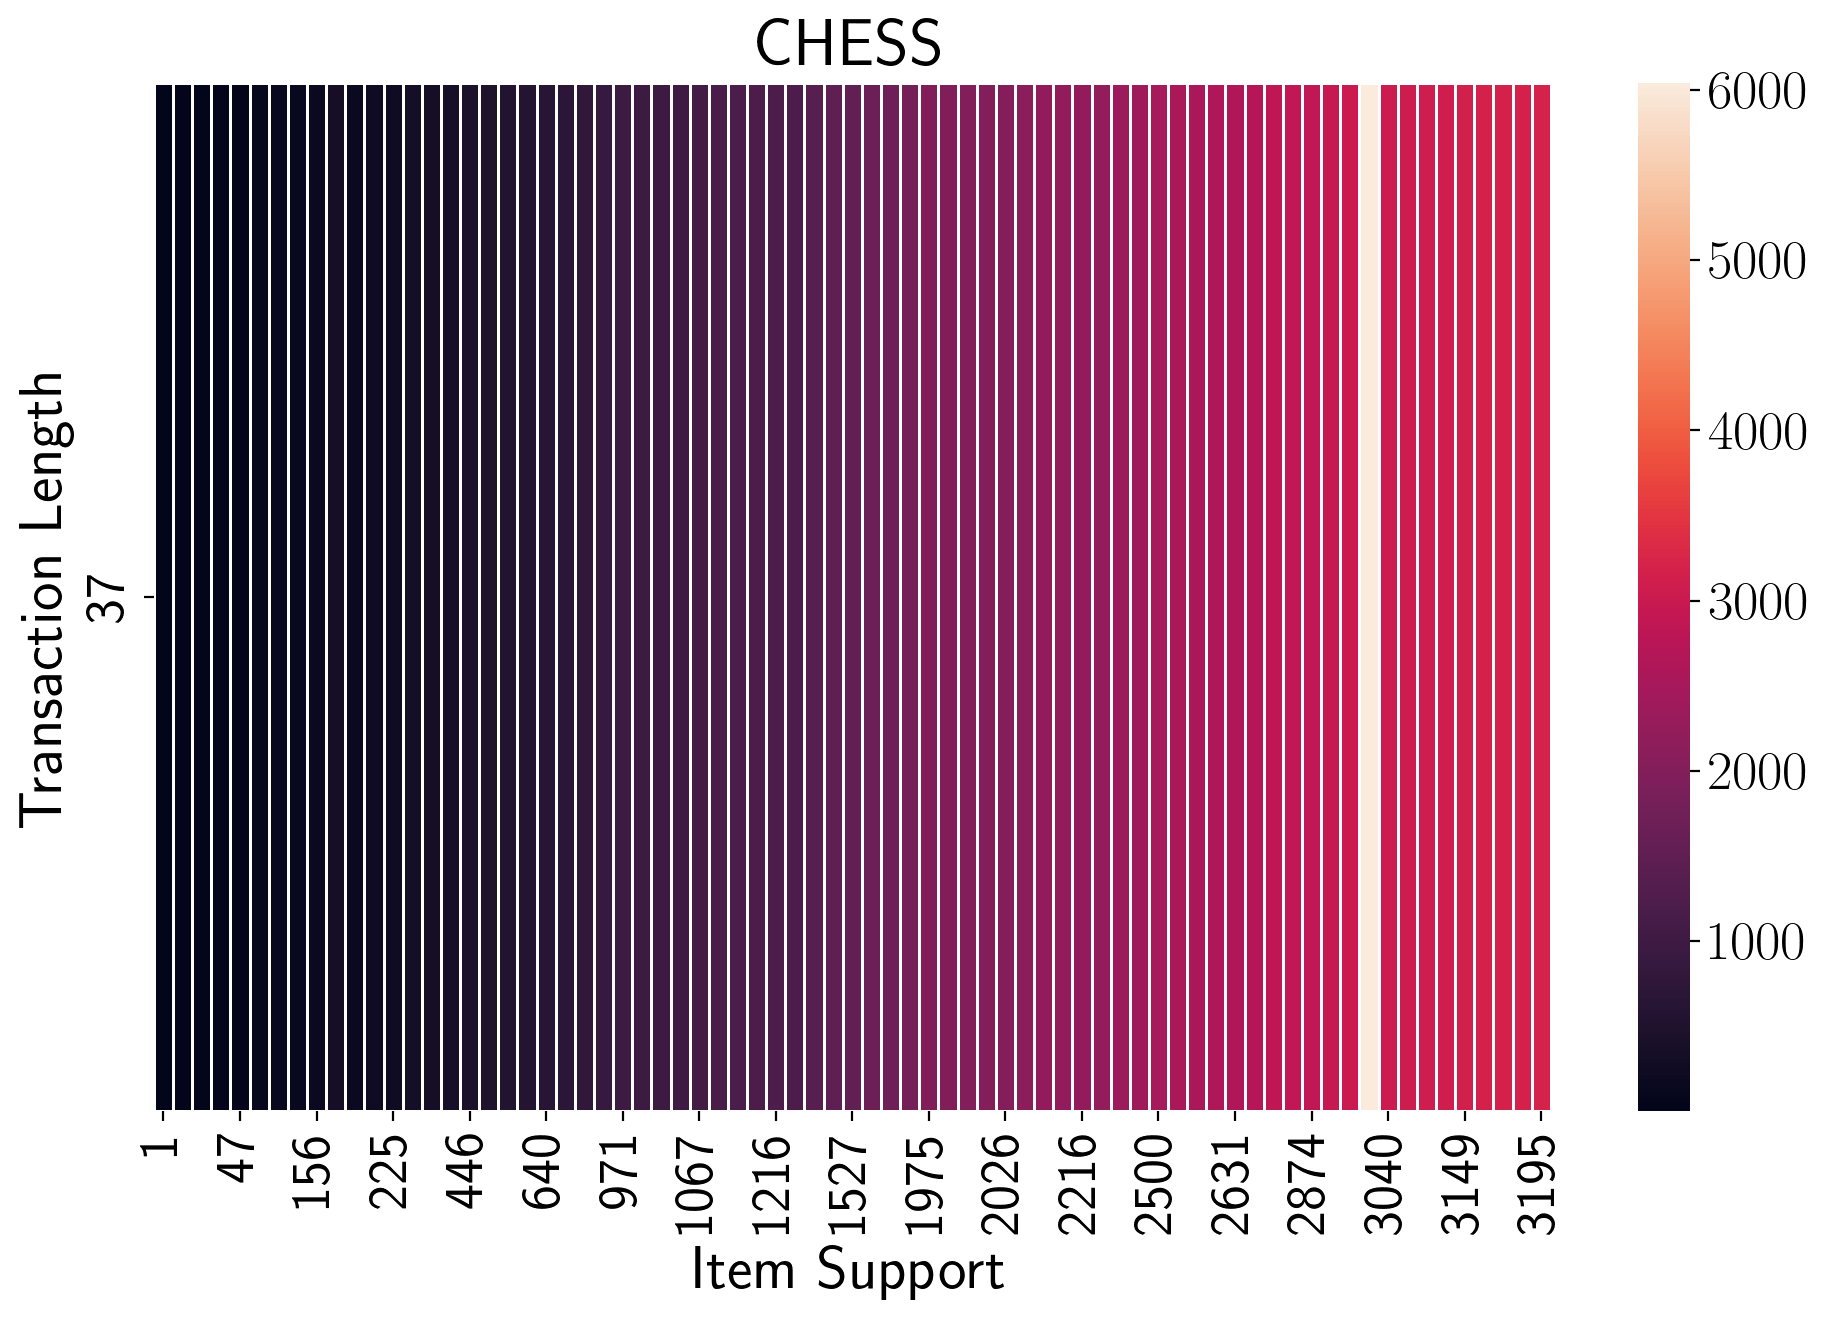

14 25


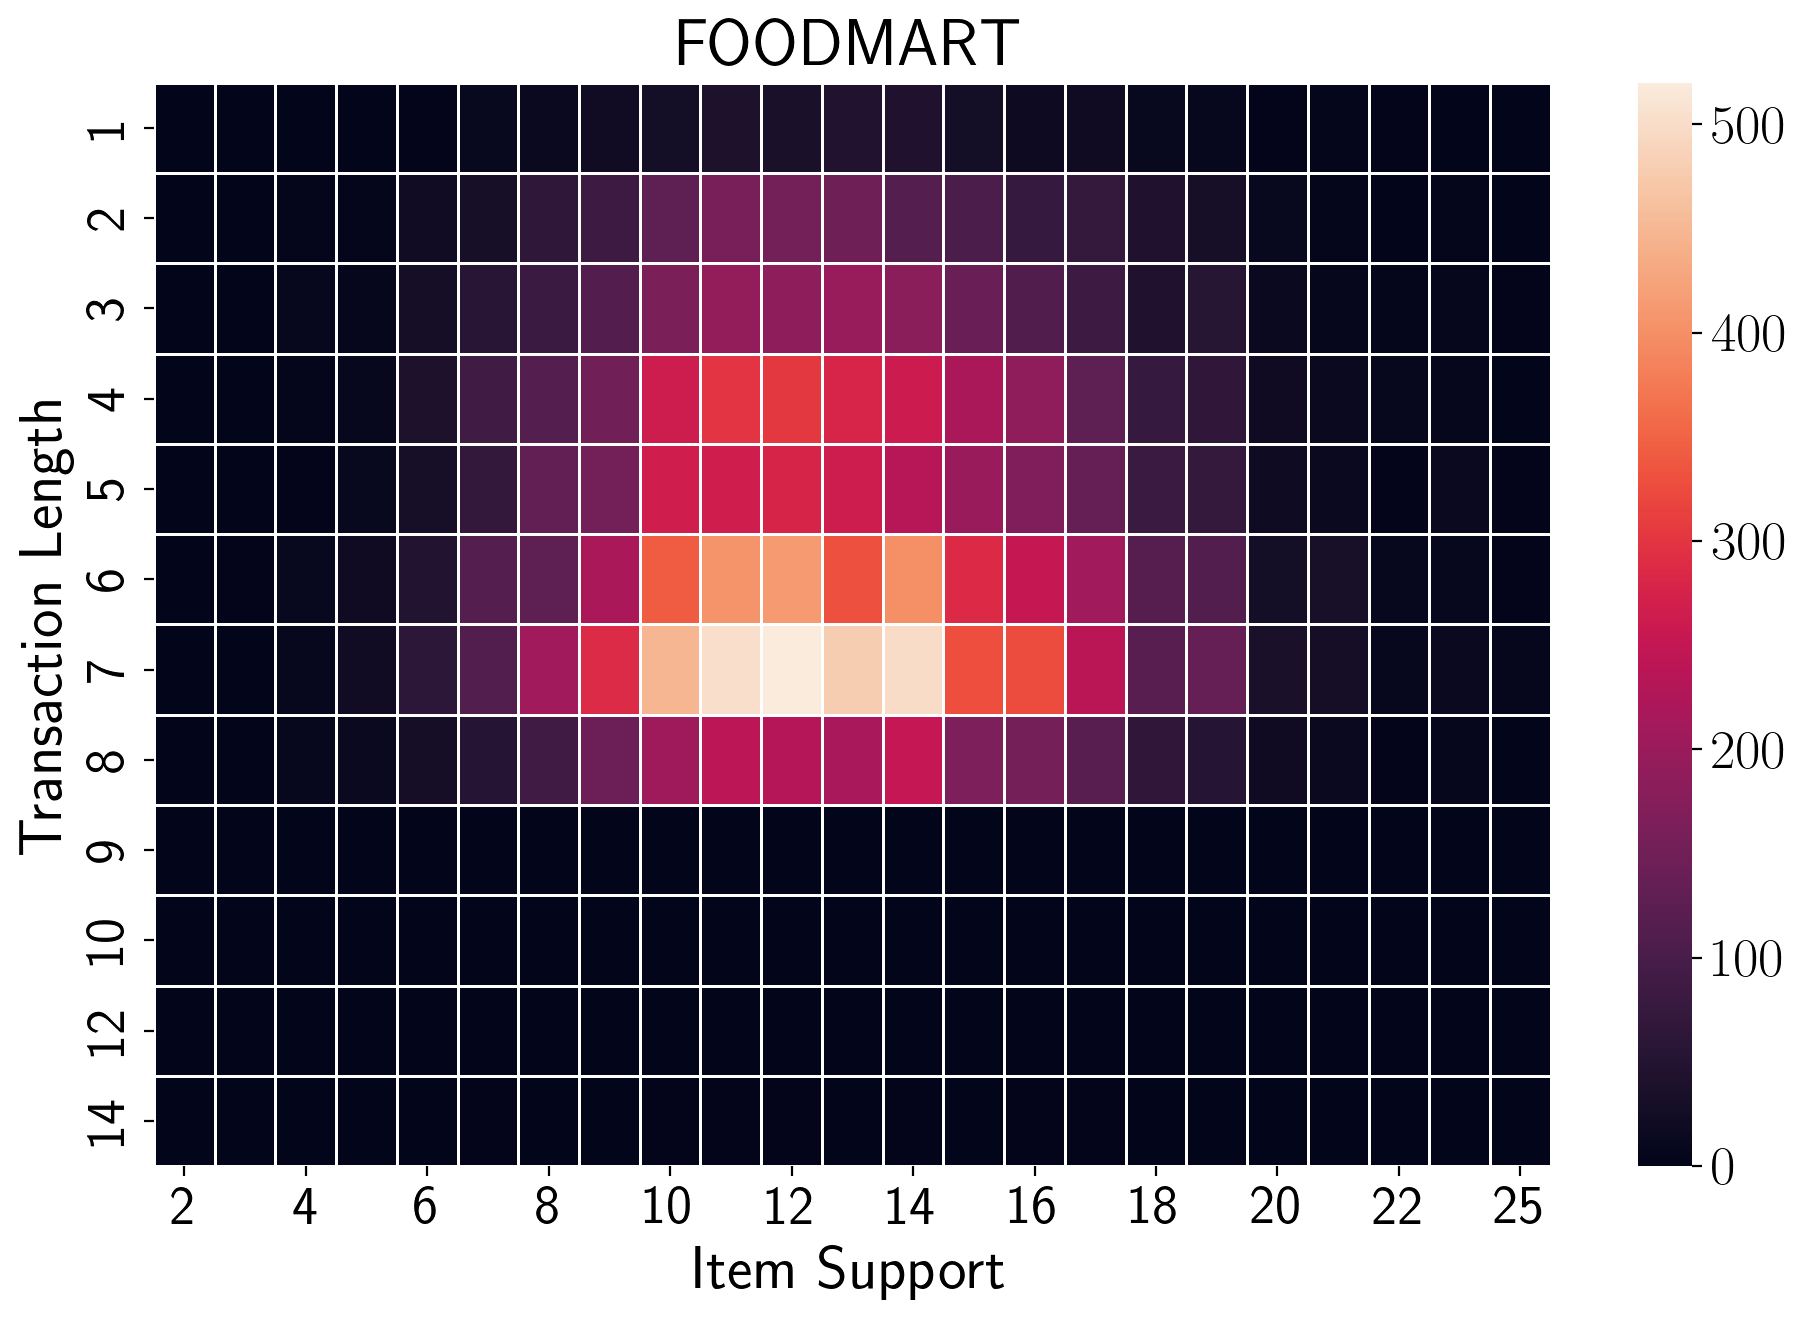

18 1394


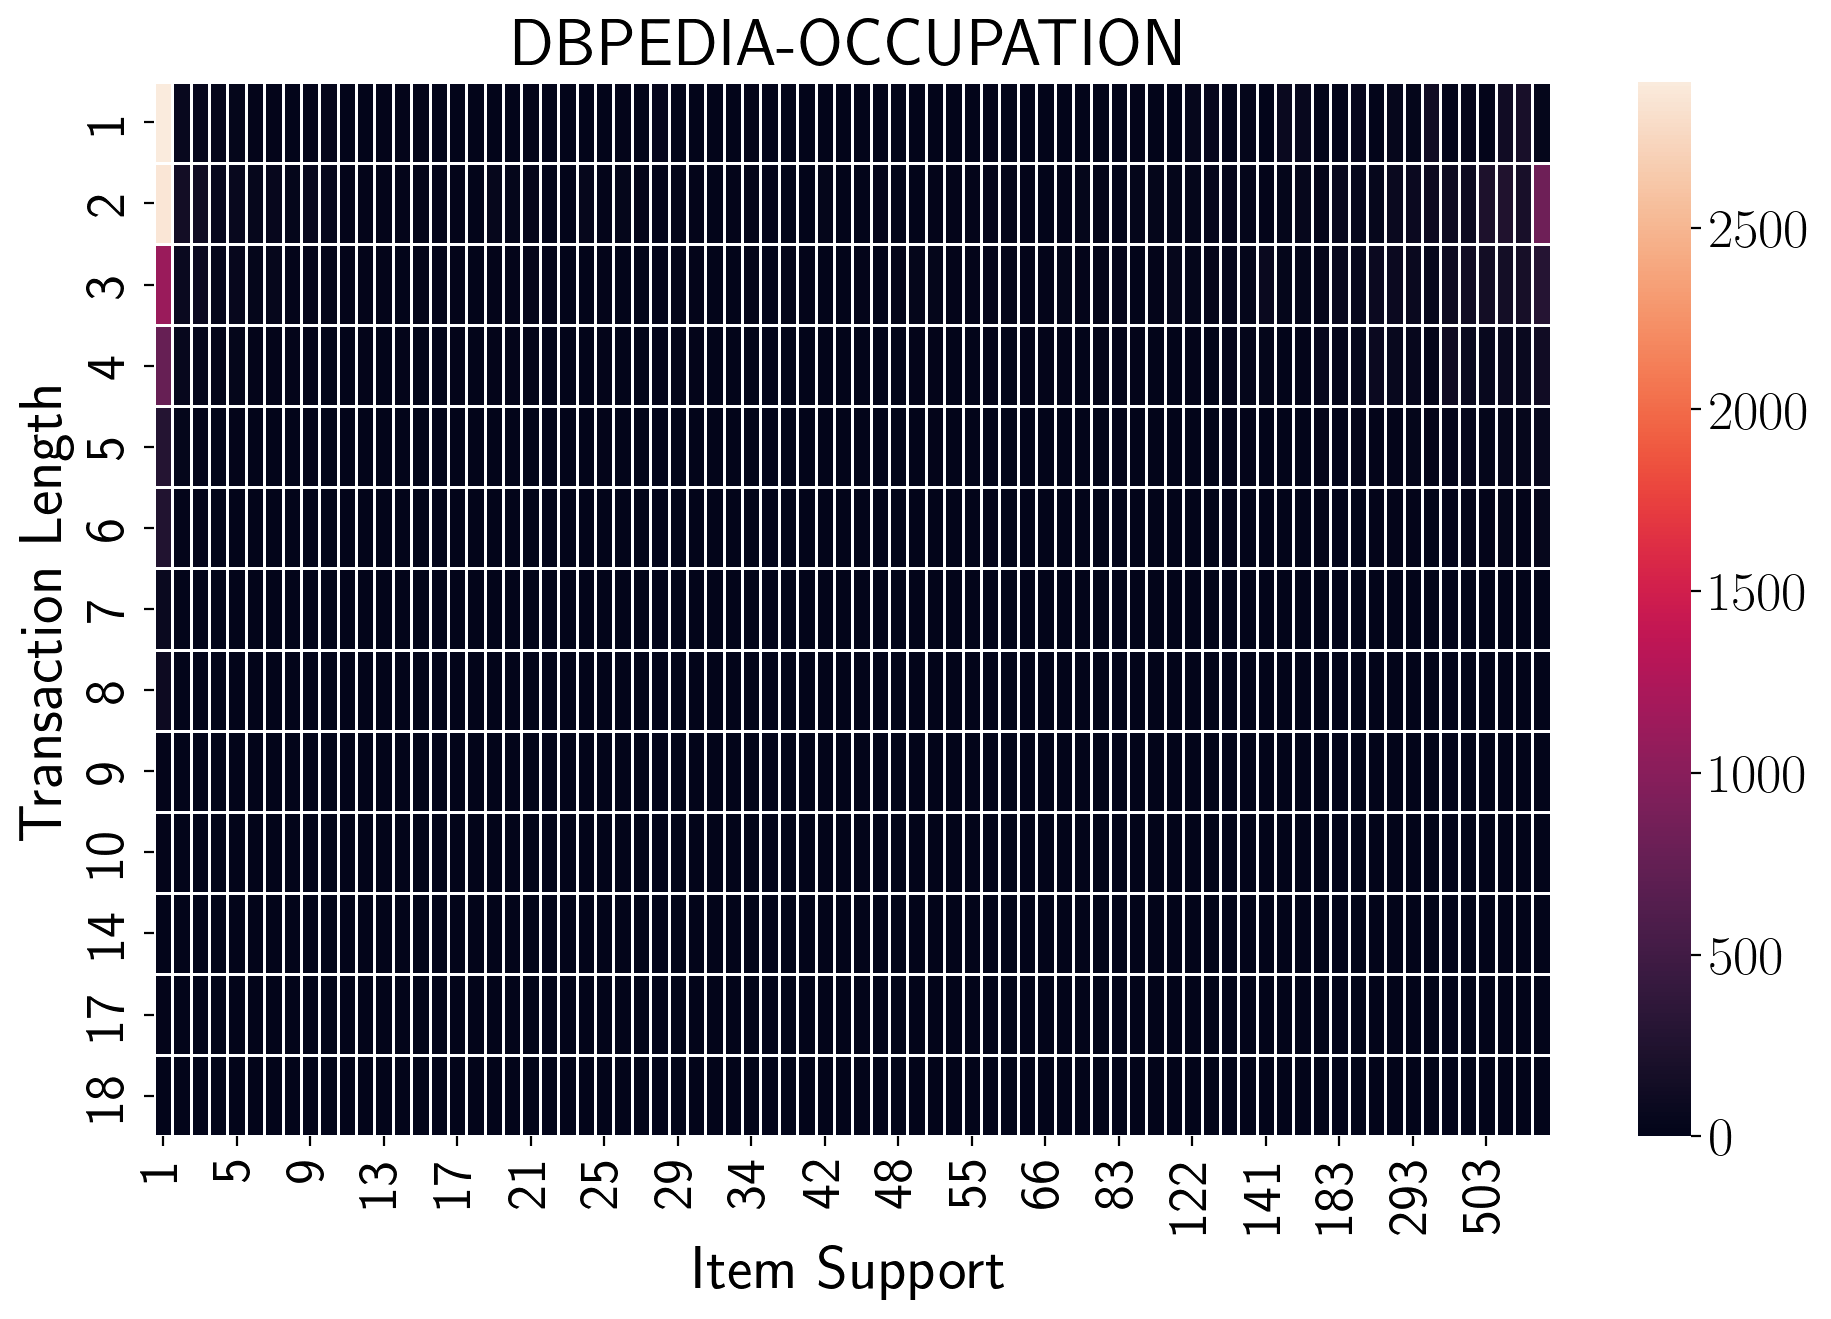

267 3658


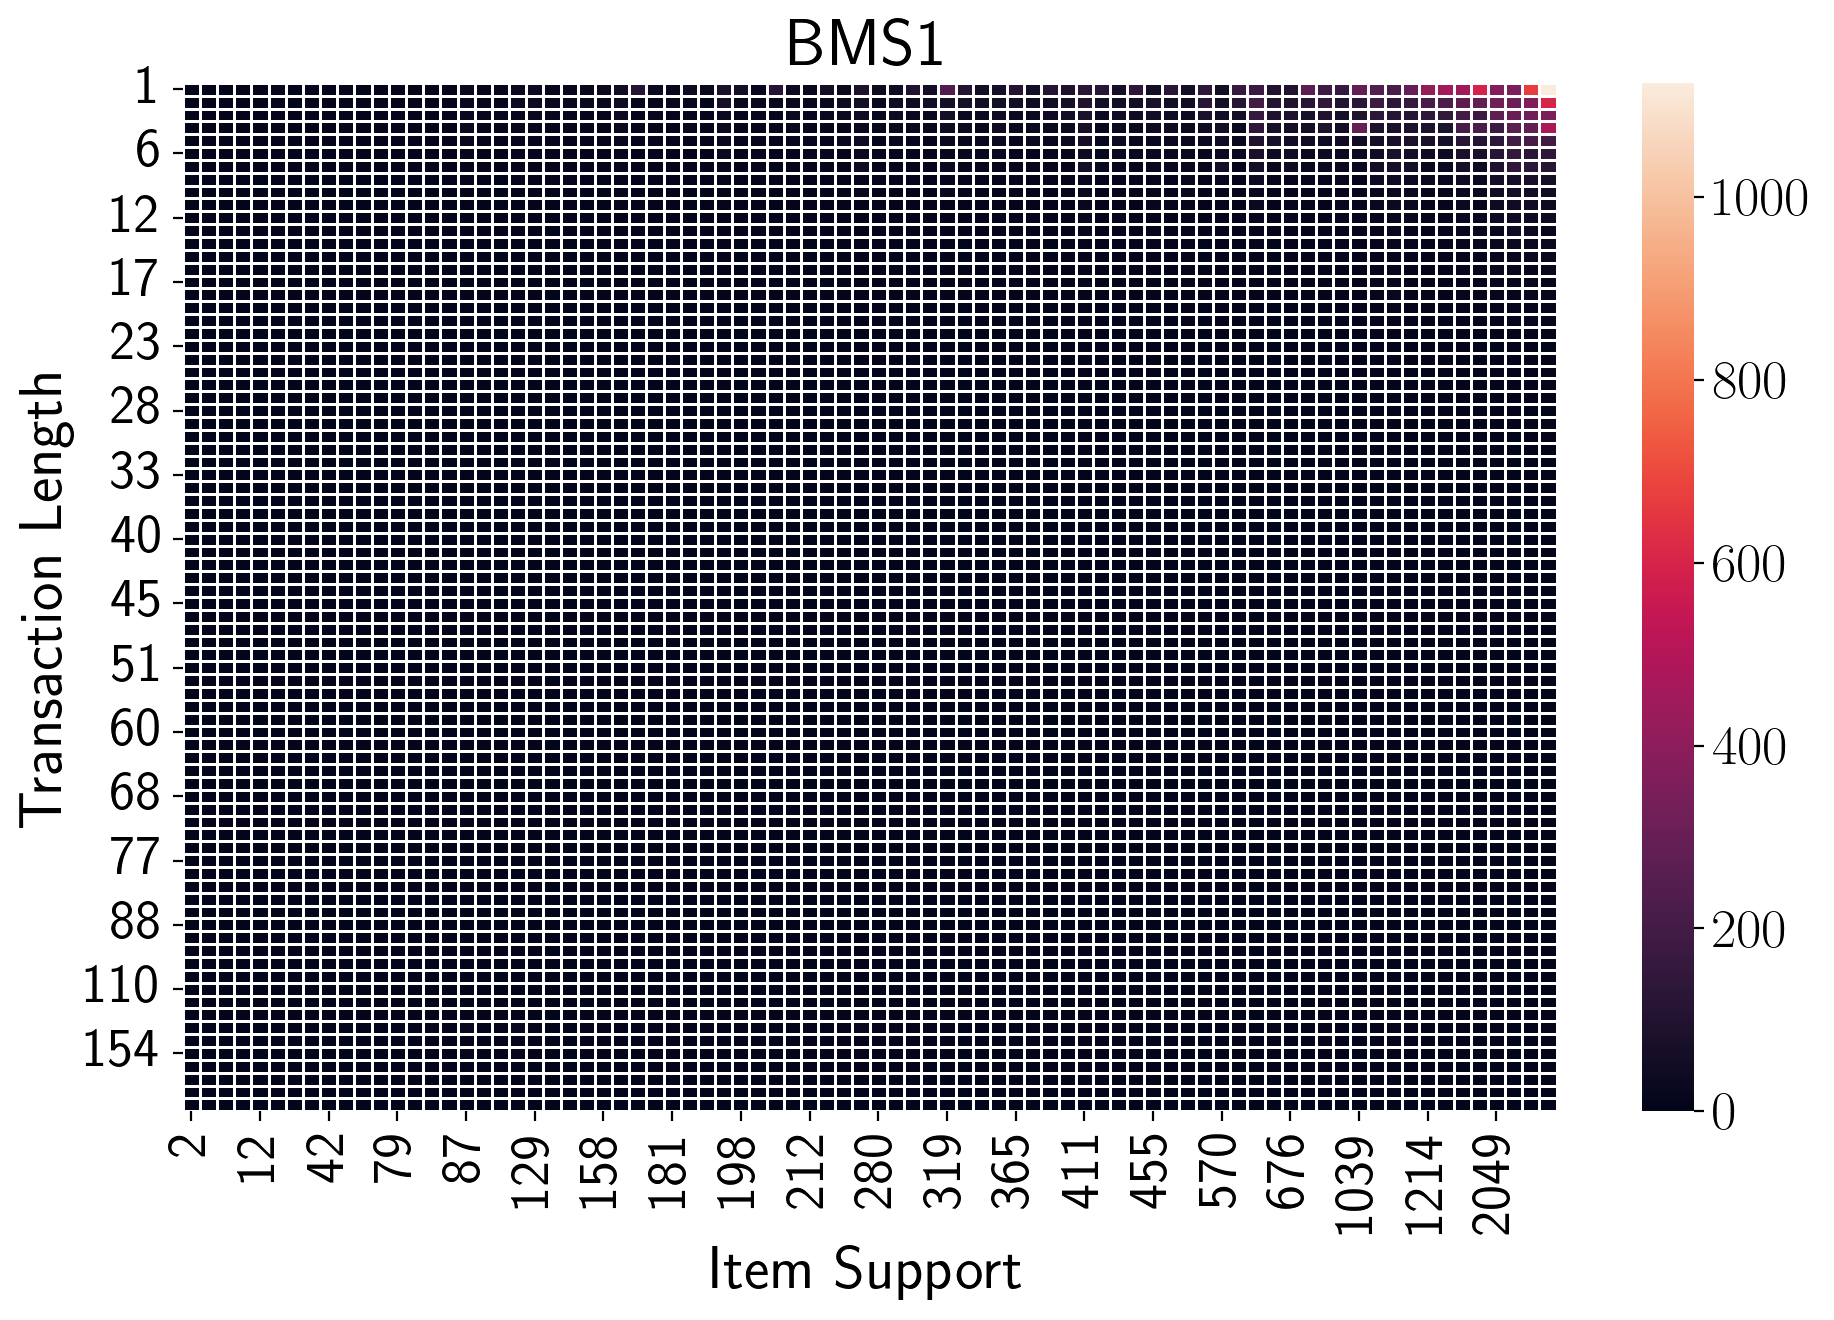

161 3766


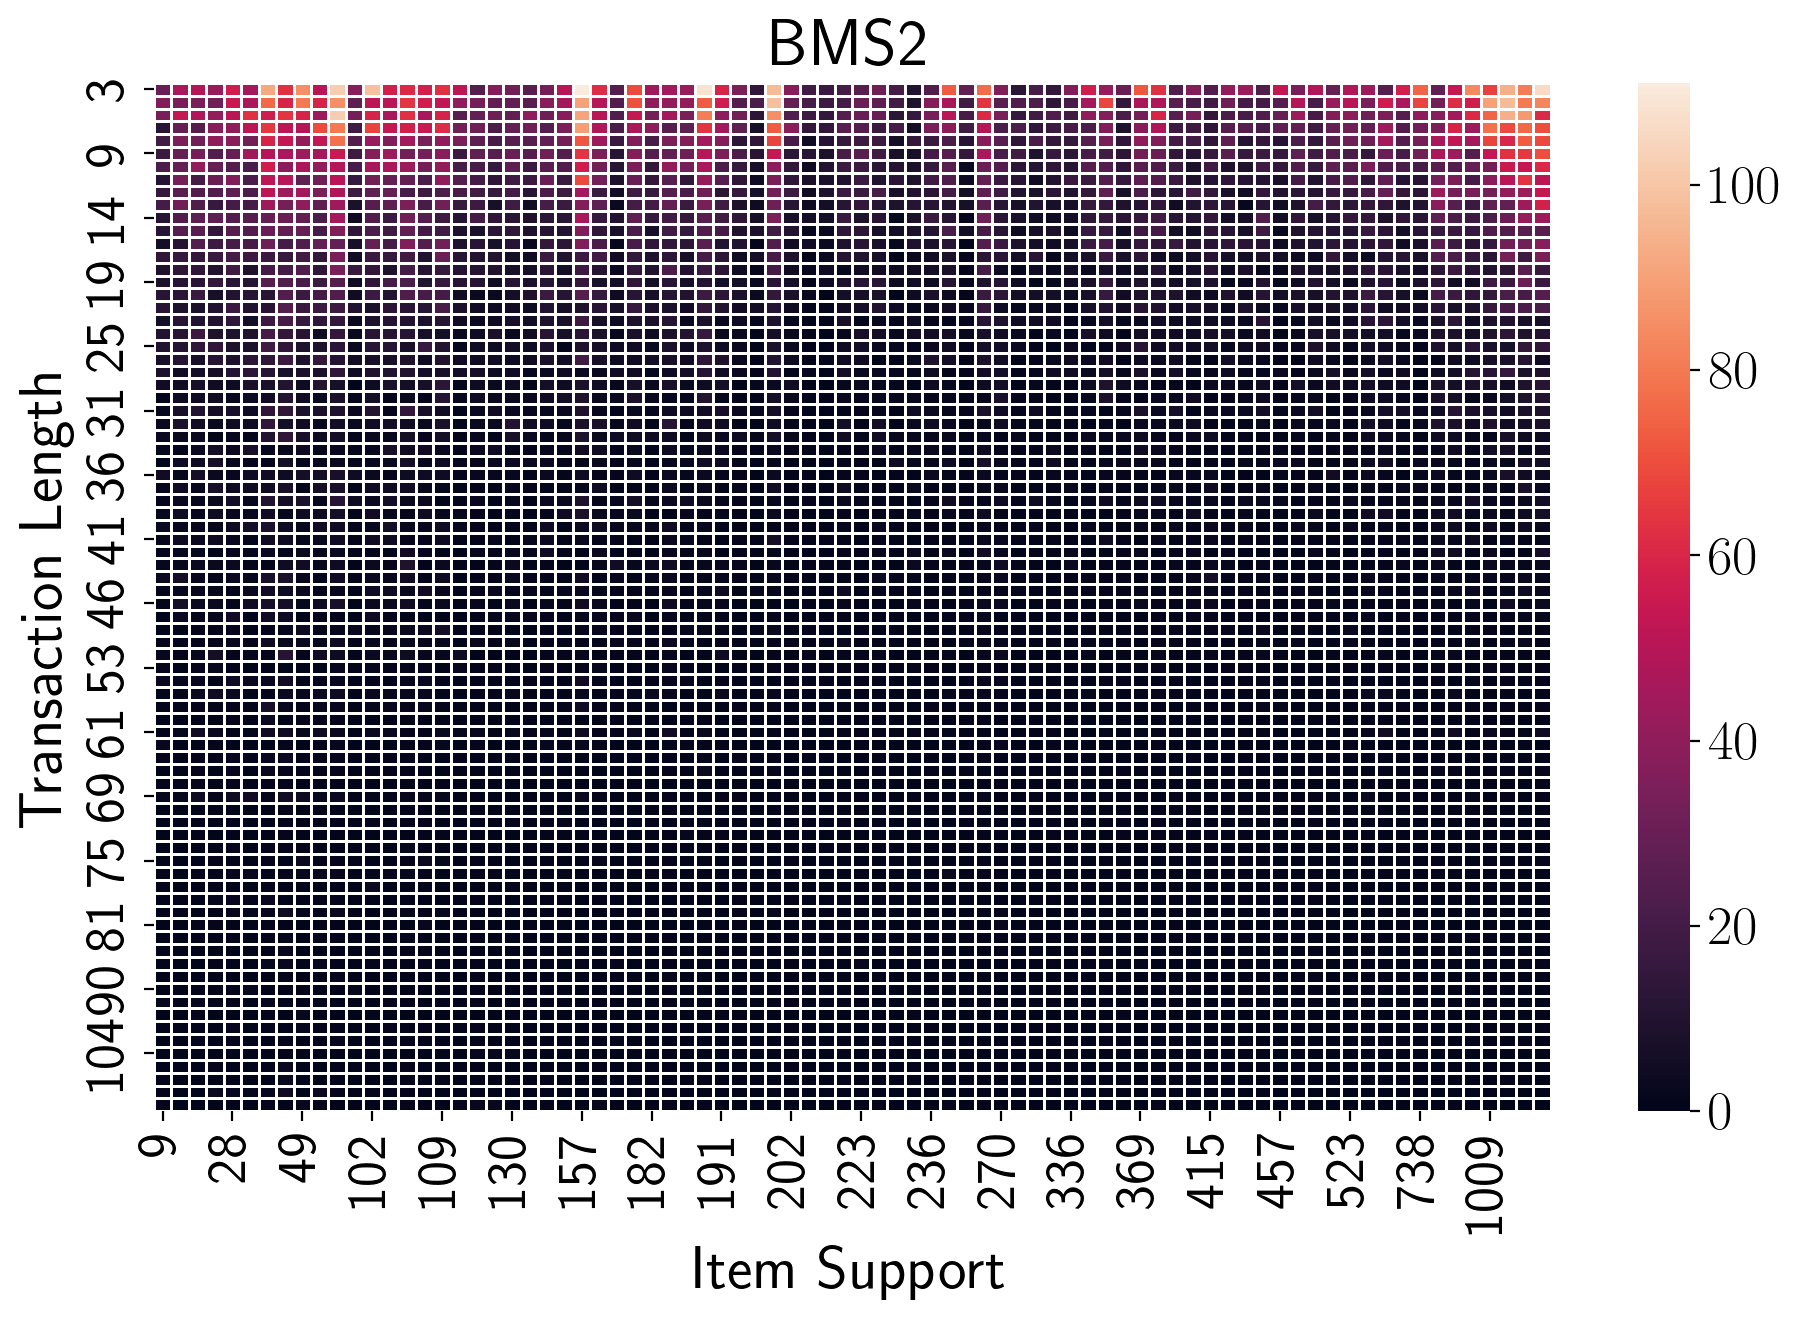

76 50675


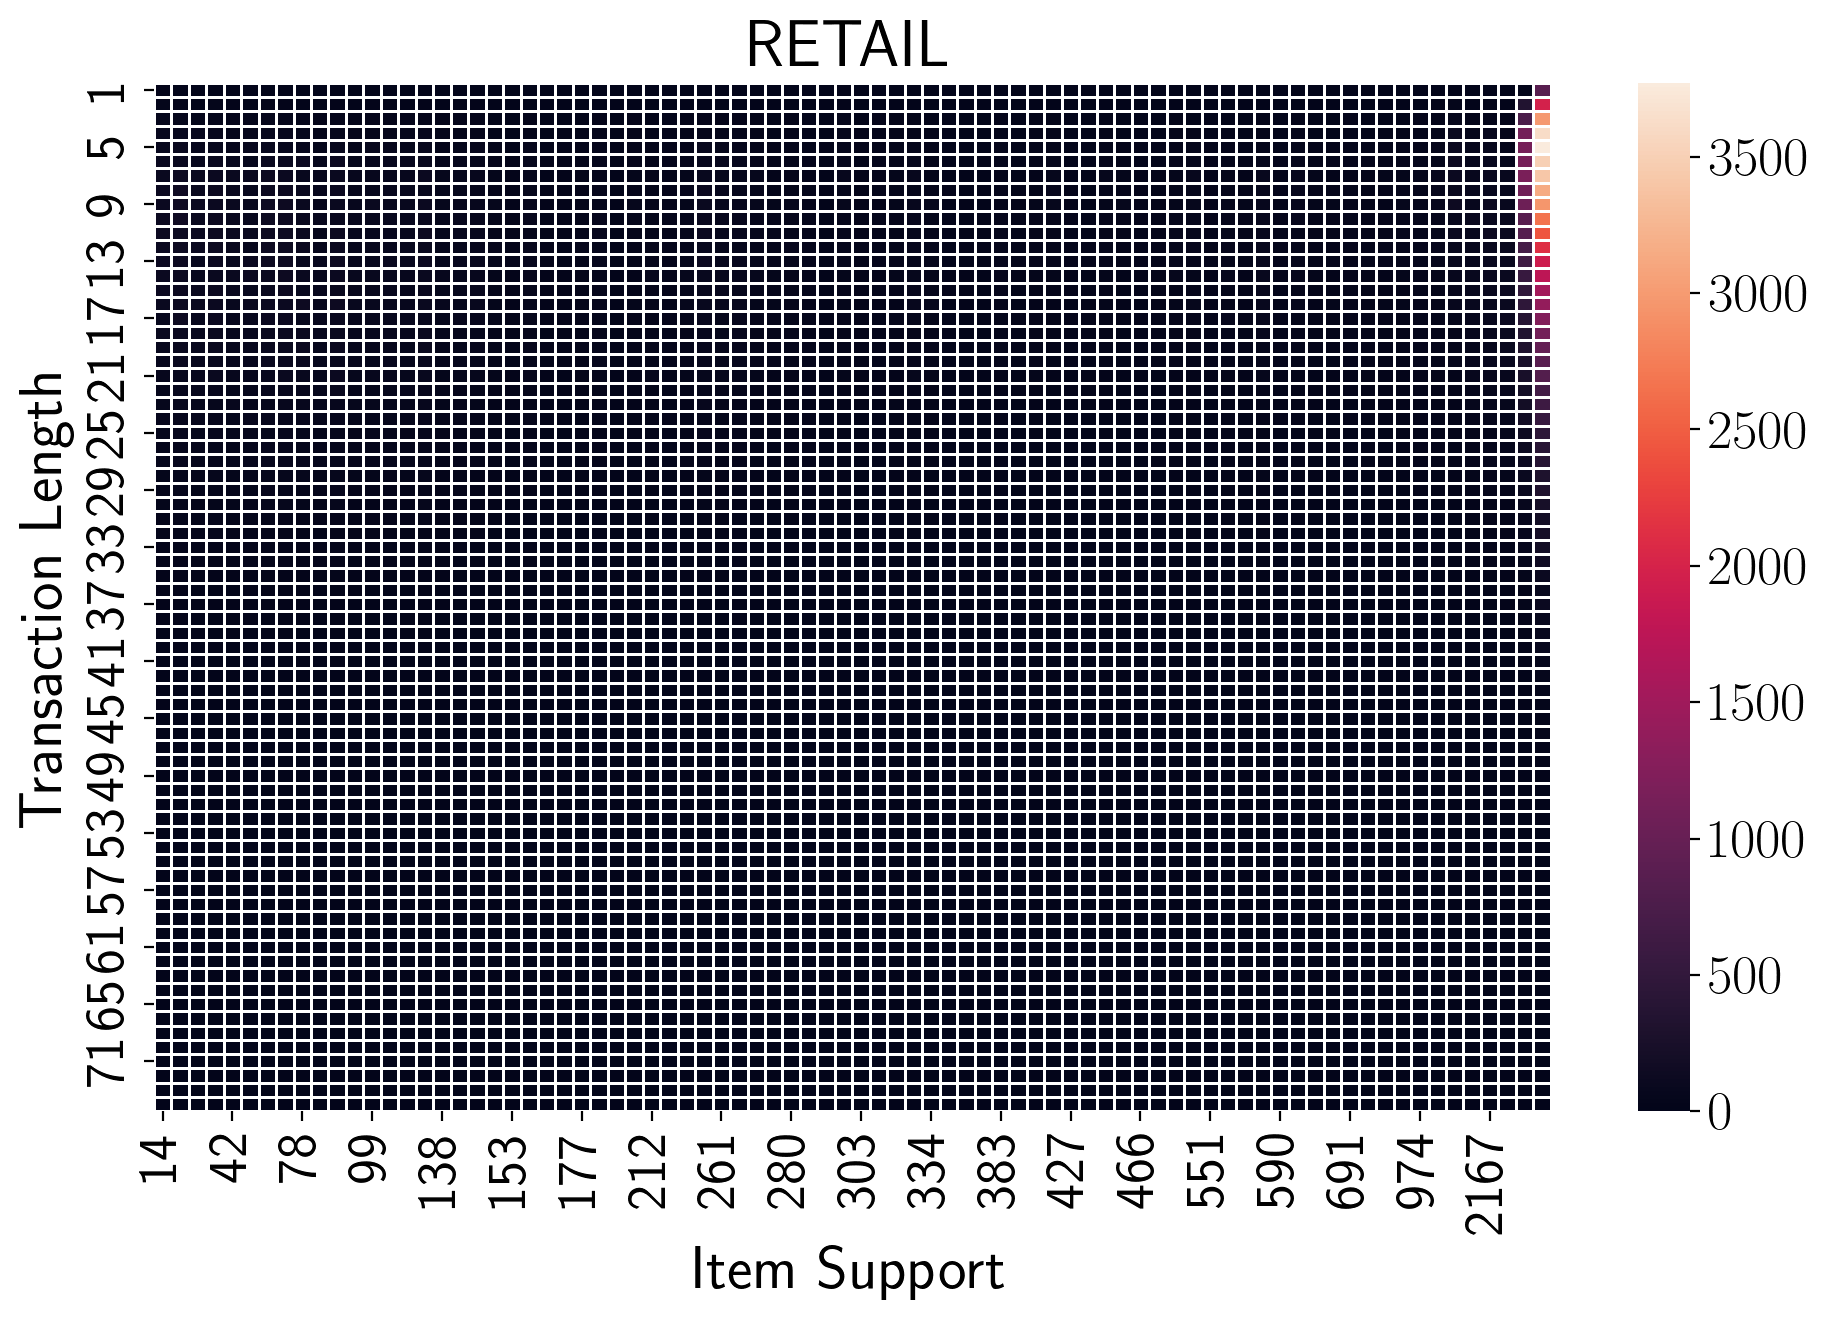

In [13]:
for dataset in datasets:
    BJDM, max_len = ds.compute_BJDM(data_dir, dataset)
    bjdm_df = pd.DataFrame(BJDM)
    fig, ax = plt.subplots(figsize=(10,7))
    # subset of cols
    ret_cols = []
    for c in bjdm_df.columns:
        if bjdm_df[c].sum() > 0:
            ret_cols.append(c)
    bjdm_df = bjdm_df[ret_cols]
    if len(ret_cols) > num_squares:
        cols = set()
        while len(cols) < num_squares:
            cols.add(ret_cols[random.randint(0, len(ret_cols)-1)])
        cols = sorted(list(cols))
        bjdm_df = bjdm_df[cols]
    # subset of rows
    ret_rows = []
    for r in bjdm_df.index:
        if bjdm_df.loc[r].sum() > 0:
            ret_rows.append(r)
    bjdm_df = bjdm_df.loc[ret_rows]
    if len(ret_rows) > num_squares:
        rows = set()
        while len(rows) < num_squares:
            rows.add(ret_rows[random.randint(0,len(ret_rows)-1)])
        rows = sorted(list(rows))
        bjdm_df = bjdm_df.loc[rows]
    # all transactions have the same length
    if bjdm_df.shape[0] == 1:
        bjdm_df = bjdm_df[bjdm_df>0].T.dropna().T
    sns.heatmap(data=bjdm_df, linewidths=1, ax=ax)
    ax.set_ylabel('Transaction Length')
    ax.set_xlabel('Item Support')
    x_labels = []
    for l in ax.get_xticklabels():
        x_labels.append(str(int(l.get_text())+1))
    y_labels = []
    if bjdm_df.shape[0] == 1:
        y_labels.append(str(max_len))
    else:
        for l in ax.get_yticklabels():
            y_labels.append(str(int(l.get_text())+1))
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)
    ax.set_title(dataset.upper())
    plt.tight_layout()
    plt.savefig(fig_dir+f'BJDM_{dataset}.pdf')
    plt.show()

## Convergence

### ALICE-A vs ALICE-B

In [12]:
result_dir = '../output/convergence/'
# config
freqs = {'edit-iewikibooks':f'10.0-{thresh["edit-iewikibooks"]}',
         'kosarak_3000':f'6.0-{thresh["kosarak_3000"]}',
         'chess':f'6.0-{thresh["chess"]}', 
         'foodmart':f'6.0-{thresh["foodmart"]}',
         'dbpedia-occupation':f'10.0-{thresh["dbpedia-occupation"]}',
         'BMS1':f'6.0-{thresh["BMS1"]}', 
         'BMS2':f'6.0-{thresh["BMS2"]}', 
         'retail':f'6.0-{thresh["retail"]}'
         }

In [25]:
dfs = []
for db in freqs.keys():
    file = result_dir + f'{db}-{freqs[db]}-0.json'
    tmp_df = cs.get_convergence_df(file)
    tmp_df['DataSet'] = dataset_names.get(db, db)
    dfs.append(tmp_df)

conv_df = pd.concat(dfs)

In [26]:
conv_df['Algorithm'] = conv_df['Algorithm'].apply(lambda x: sampler_names[x])

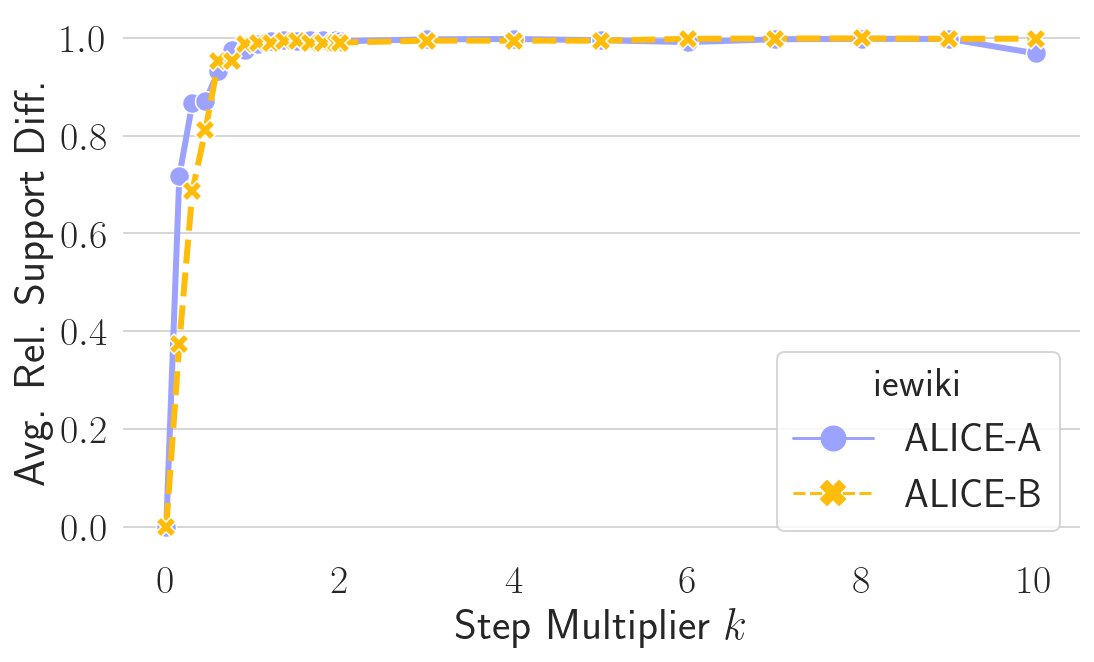

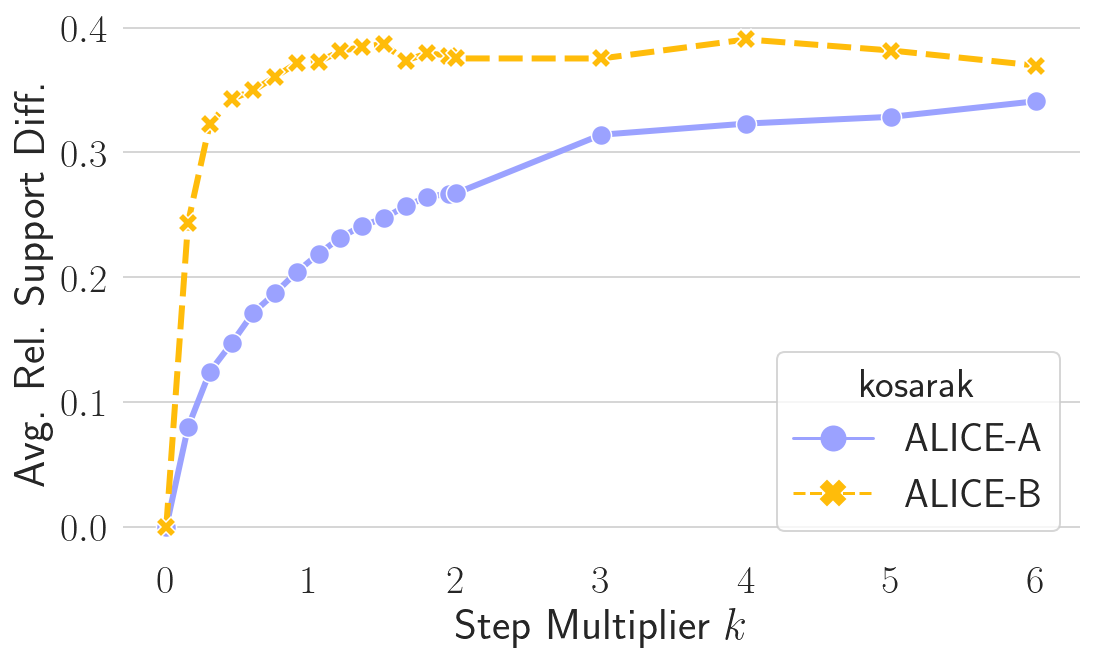

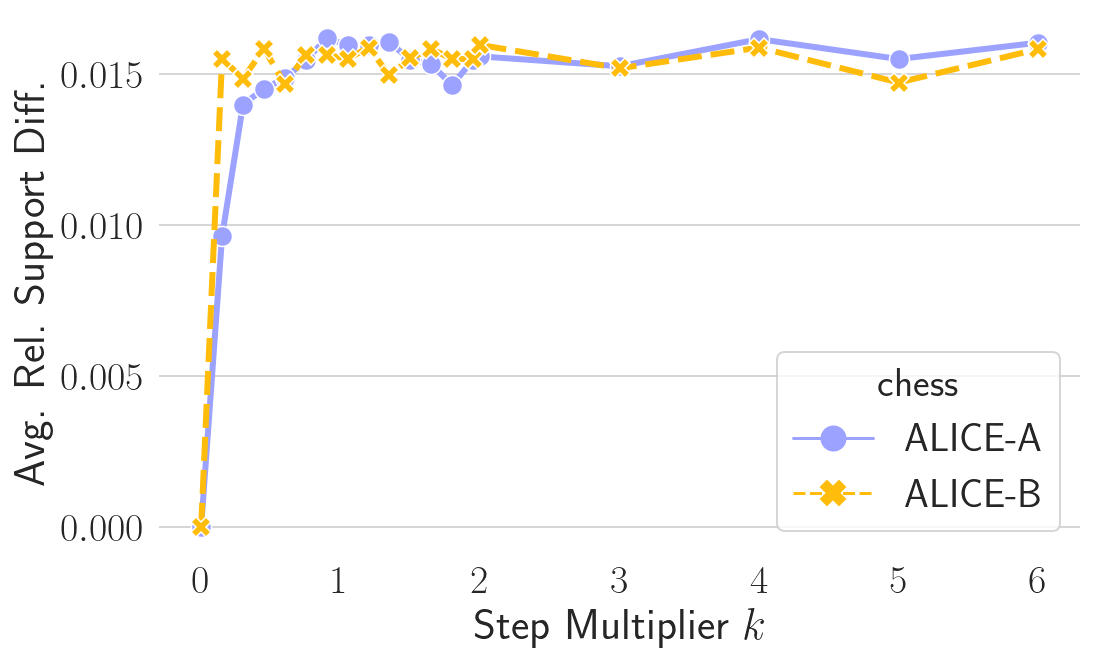

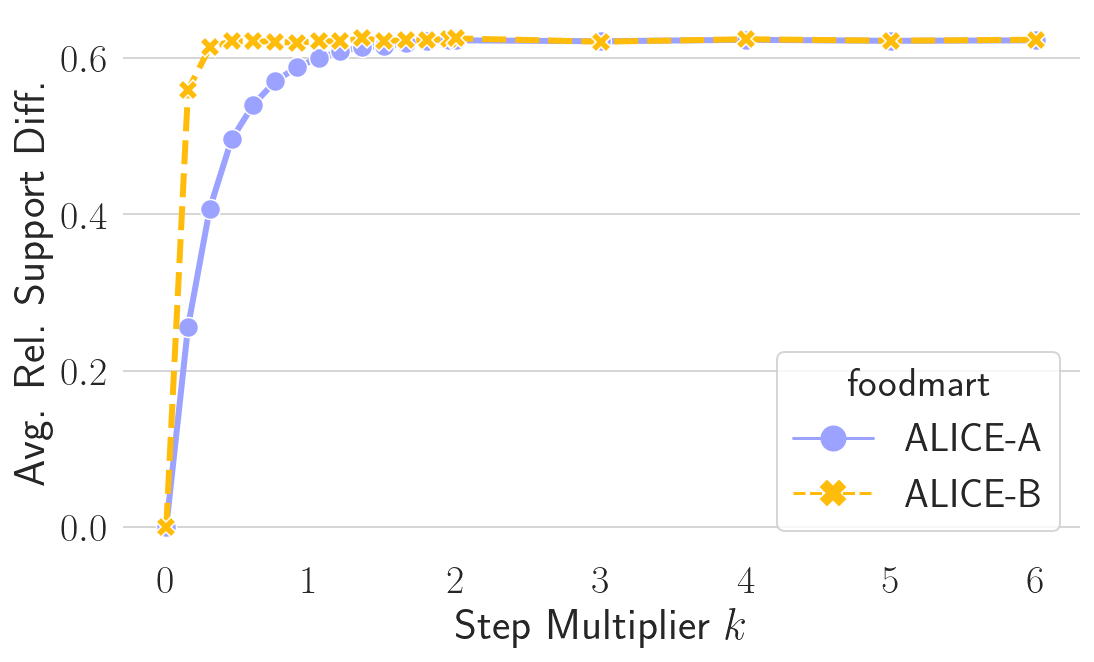

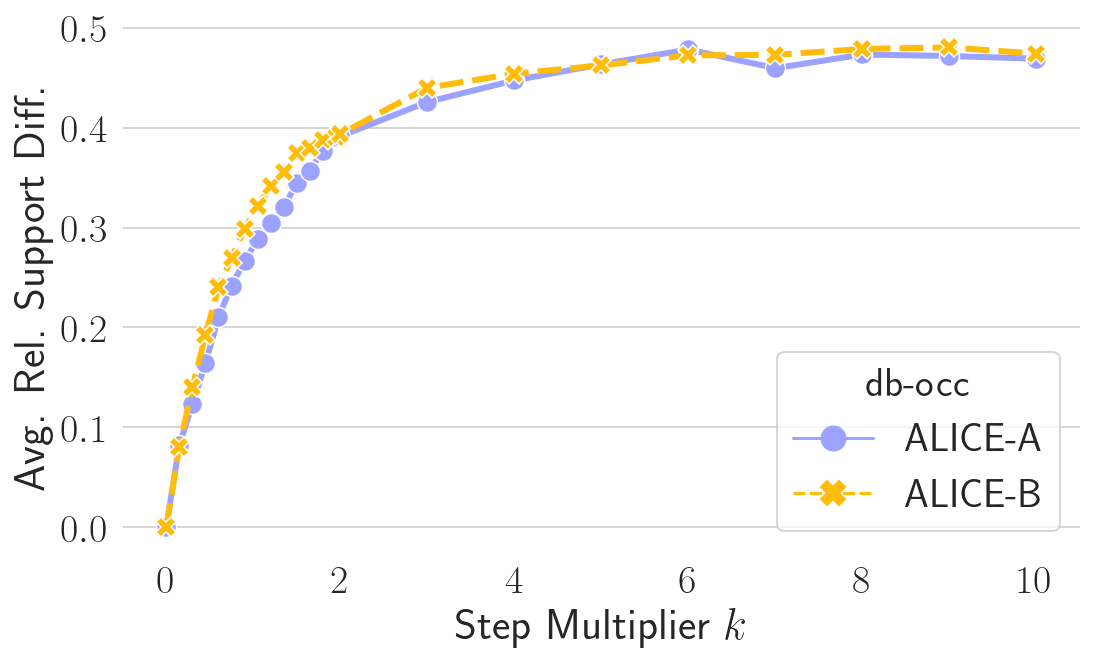

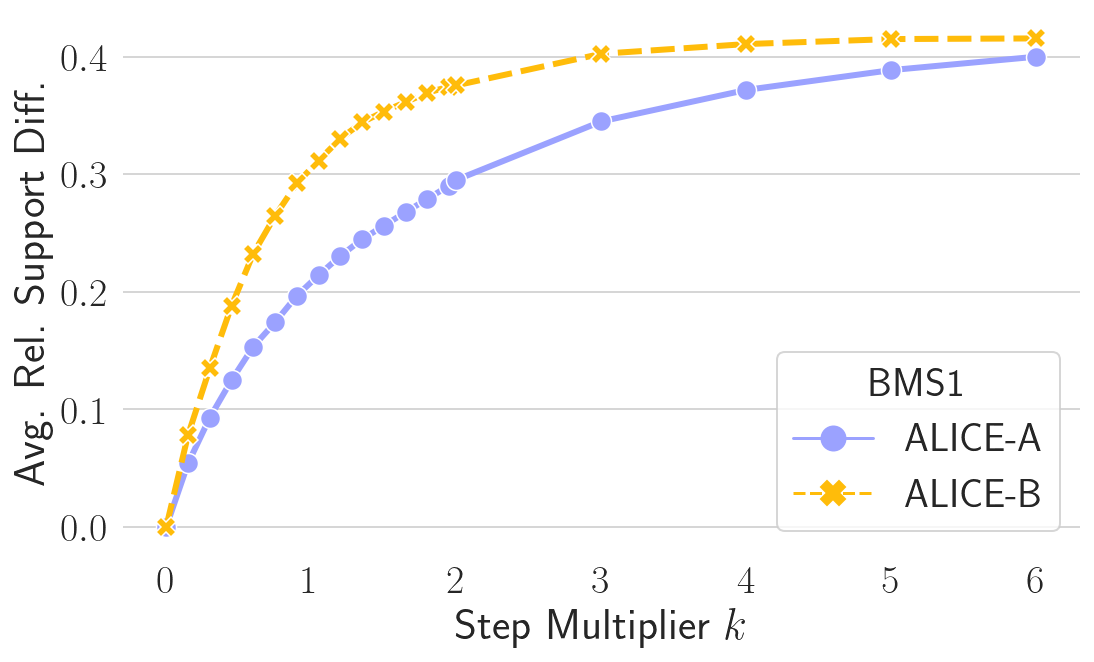

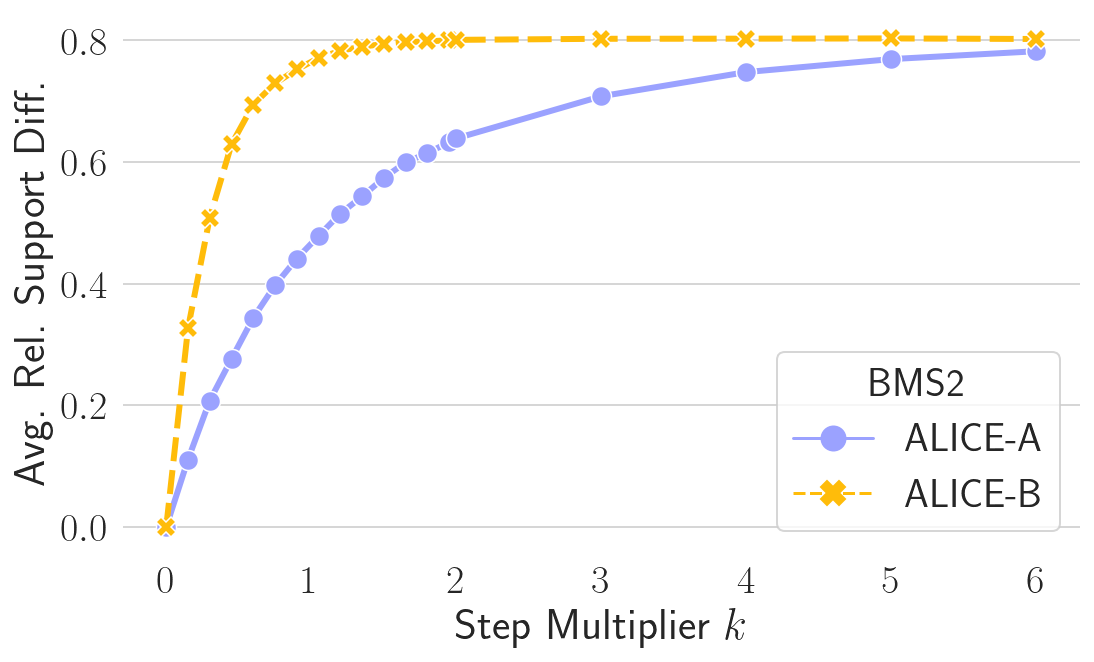

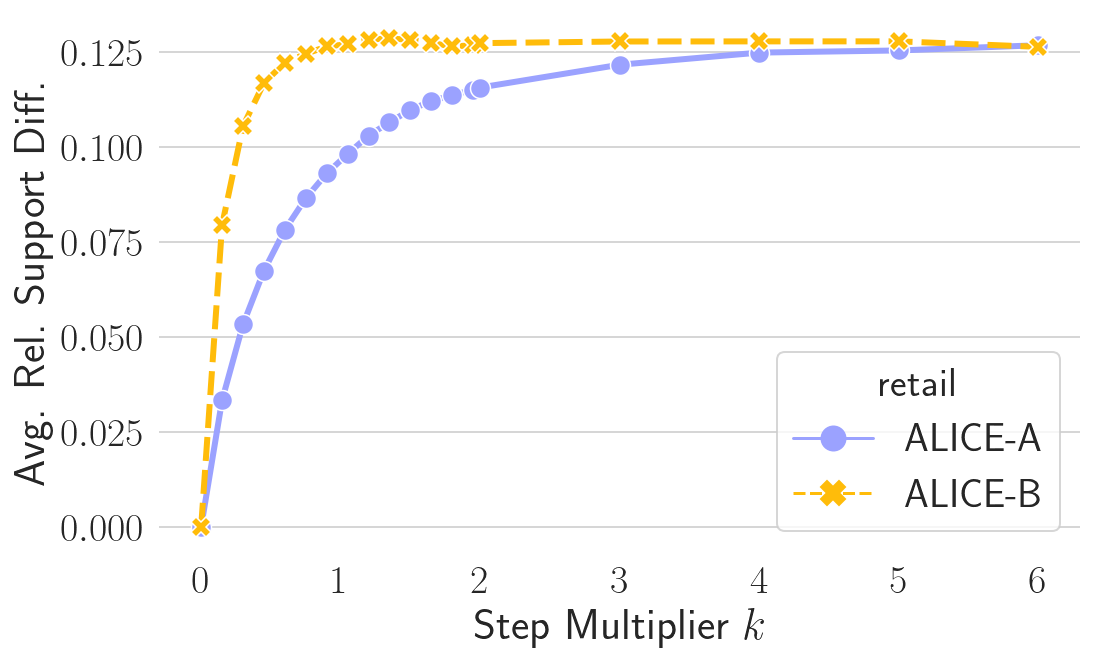

In [101]:
for dataset in conv_df['DataSet'].unique():
    data = conv_df[conv_df['DataSet']==dataset]
    num_colors = len(data['Algorithm'].unique())
    sns.set_style('whitegrid')
    if not data.empty:
        fig, ax = plt.subplots(figsize=(8,5))
        sns.lineplot(data=data, x='Num Step Multiplier', palette=palette[:num_colors], 
                     style='Algorithm', markers=True, markersize=10, ax=ax,
                     linewidth=3, y='Avg. Rel. Support Diff.', hue='Algorithm')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.set_xlabel(r'Step Multiplier $k$')
        ax.legend(title=dataset)
        plt.tight_layout()
        plt.savefig(fig_dir+f'convergence_{dataset}.pdf')

Single plot with 3 datasets

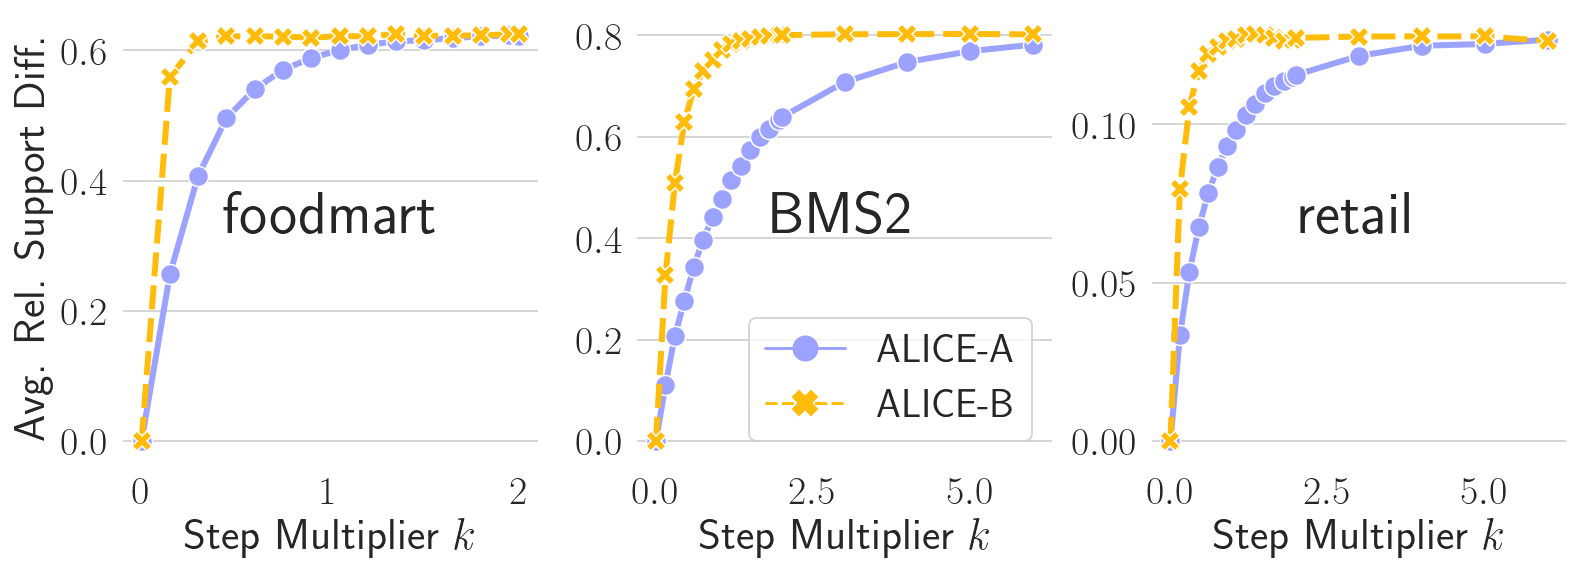

In [102]:
fig, ax = plt.subplots(1,3, figsize=(11,4))

for idx, dataset in enumerate(['foodmart', 'BMS2', 'retail']):
    data = conv_df[conv_df['DataSet']==dataset].copy()
    num_colors = len(data['Algorithm'].unique())
    
    if dataset in ['foodmart']:
        data = data[data['Num Step Multiplier']<=2]
    sns.lineplot(data=data, x='Num Step Multiplier', palette=palette[:num_colors], 
                 style='Algorithm', markers=True, markersize=10, ax=ax[idx],
                 linewidth=3, y='Avg. Rel. Support Diff.', hue='Algorithm',
                 hue_order=['ALICE-A', 'ALICE-B'])
    ax[idx].spines['right'].set_visible(False)
    ax[idx].spines['top'].set_visible(False)
    ax[idx].spines['left'].set_visible(False)
    ax[idx].spines['bottom'].set_visible(False)
    ax[idx].set_xlabel(r'Step Multiplier $k$')
    if idx != 0:
        ax[idx].set_ylabel('')
    # legend
    leg = ax[idx].legend()
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    ax[idx].legend(fontsize=20)
    if idx != 1:
        ax[idx].legend().remove()  
    ax[idx].set_title(dataset, fontsize=30, pad=-110)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig(fig_dir+'convergence_all.pdf', bbox_inches='tight')

Single plot with 4 datasets

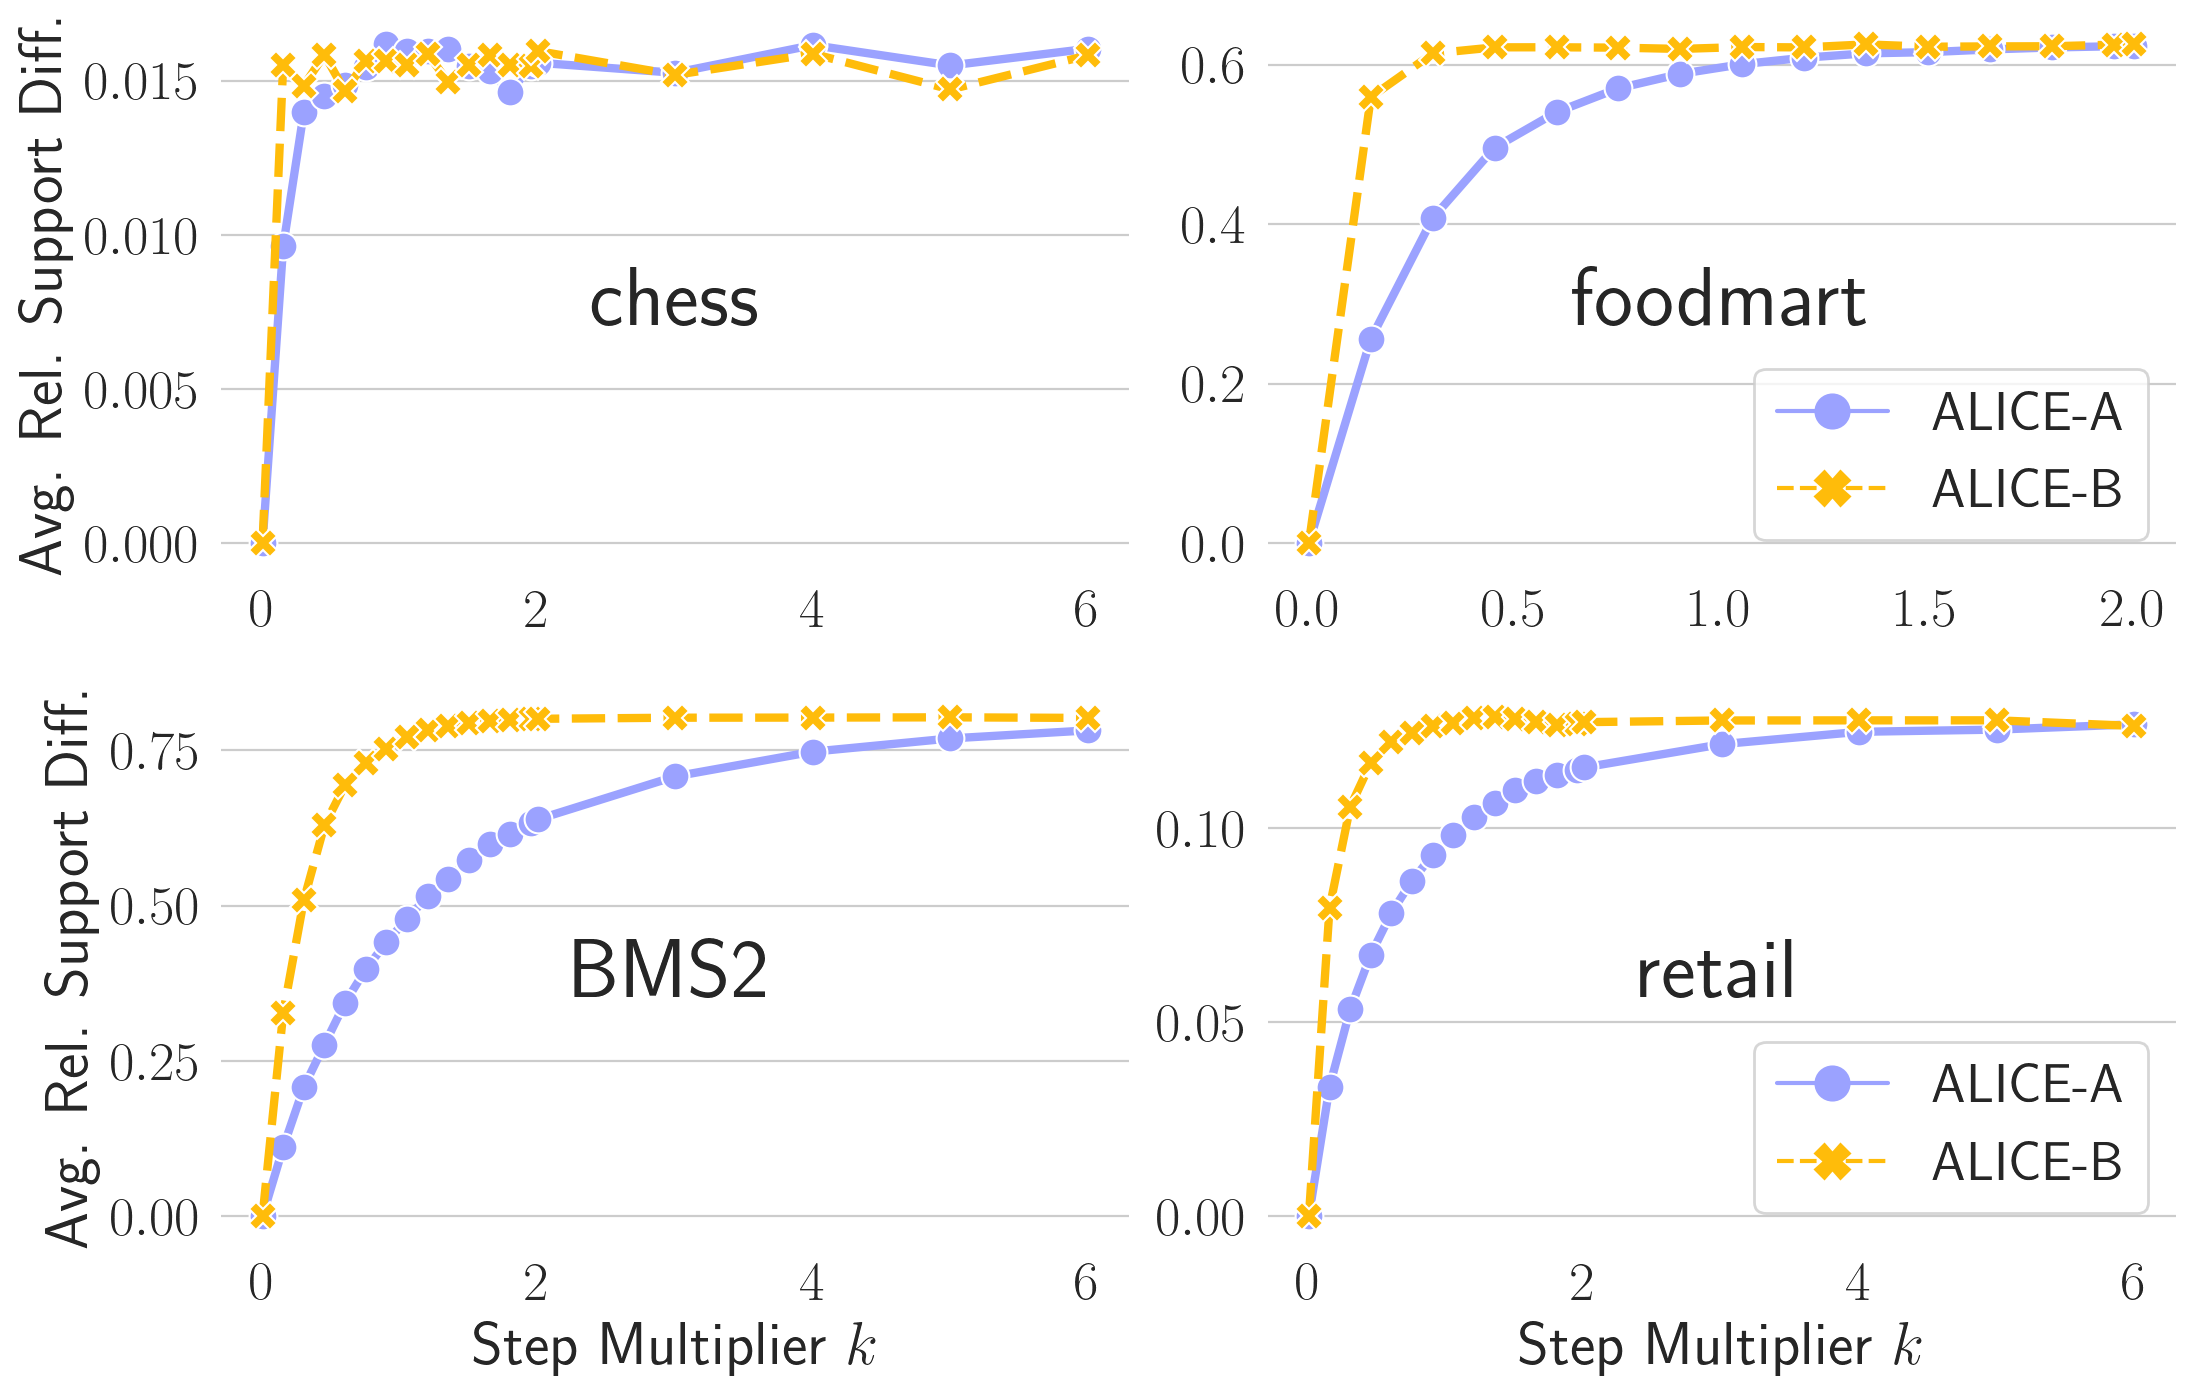

In [29]:
fig, ax = plt.subplots(2,2, figsize=(11,7))

for idx, dataset in enumerate(['chess', 'foodmart', 'BMS2', 'retail']):
    data = conv_df[conv_df['DataSet']==dataset].copy()
    num_colors = len(data['Algorithm'].unique())
    sns.set_style('whitegrid')
    idx2 = 1
    if idx < 2:
        idx2 = 0
    idx = idx % 2
    if dataset in ['foodmart']:
        data = data[data['Num Step Multiplier']<=2]
    sns.lineplot(data=data, x='Num Step Multiplier', palette=palette[:num_colors], 
                 style='Algorithm', markers=True, markersize=10, ax=ax[idx2][idx],
                 linewidth=3, y='Avg. Rel. Support Diff.', hue='Algorithm',
                 hue_order=['ALICE-A', 'ALICE-B'])
    ax[idx2][idx].spines['right'].set_visible(False)
    ax[idx2][idx].spines['top'].set_visible(False)
    ax[idx2][idx].spines['left'].set_visible(False)
    ax[idx2][idx].spines['bottom'].set_visible(False)
    ax[idx2][idx].set_xlabel(r'Step Multiplier $k$')
    if idx != 0:
        ax[idx2][idx].set_ylabel('')
    if idx2 == 0:
        ax[idx2][idx].set_xlabel('')
    # legend
    leg = ax[idx2][idx].legend()
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    ax[idx2][idx].legend(fontsize=20)
    if idx != 1:
        ax[idx2][idx].legend().remove()  
    ax[idx2][idx].set_title(dataset, fontsize=30, pad=-110)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig(fig_dir+'convergence_four.pdf', bbox_inches='tight')

#### Time to Convergence

In [103]:
conv_time_df = conv_df.merge(stats_df[['DataSet', 'Sum Transaction Lengths']], on='DataSet')

In [104]:
conv_time_df['Time'] = conv_time_df['Setup'] + conv_time_df['Total'] 

In [105]:
conv_time_df['Time (s)'] = conv_time_df['Time'] / 1000

IEWIKI


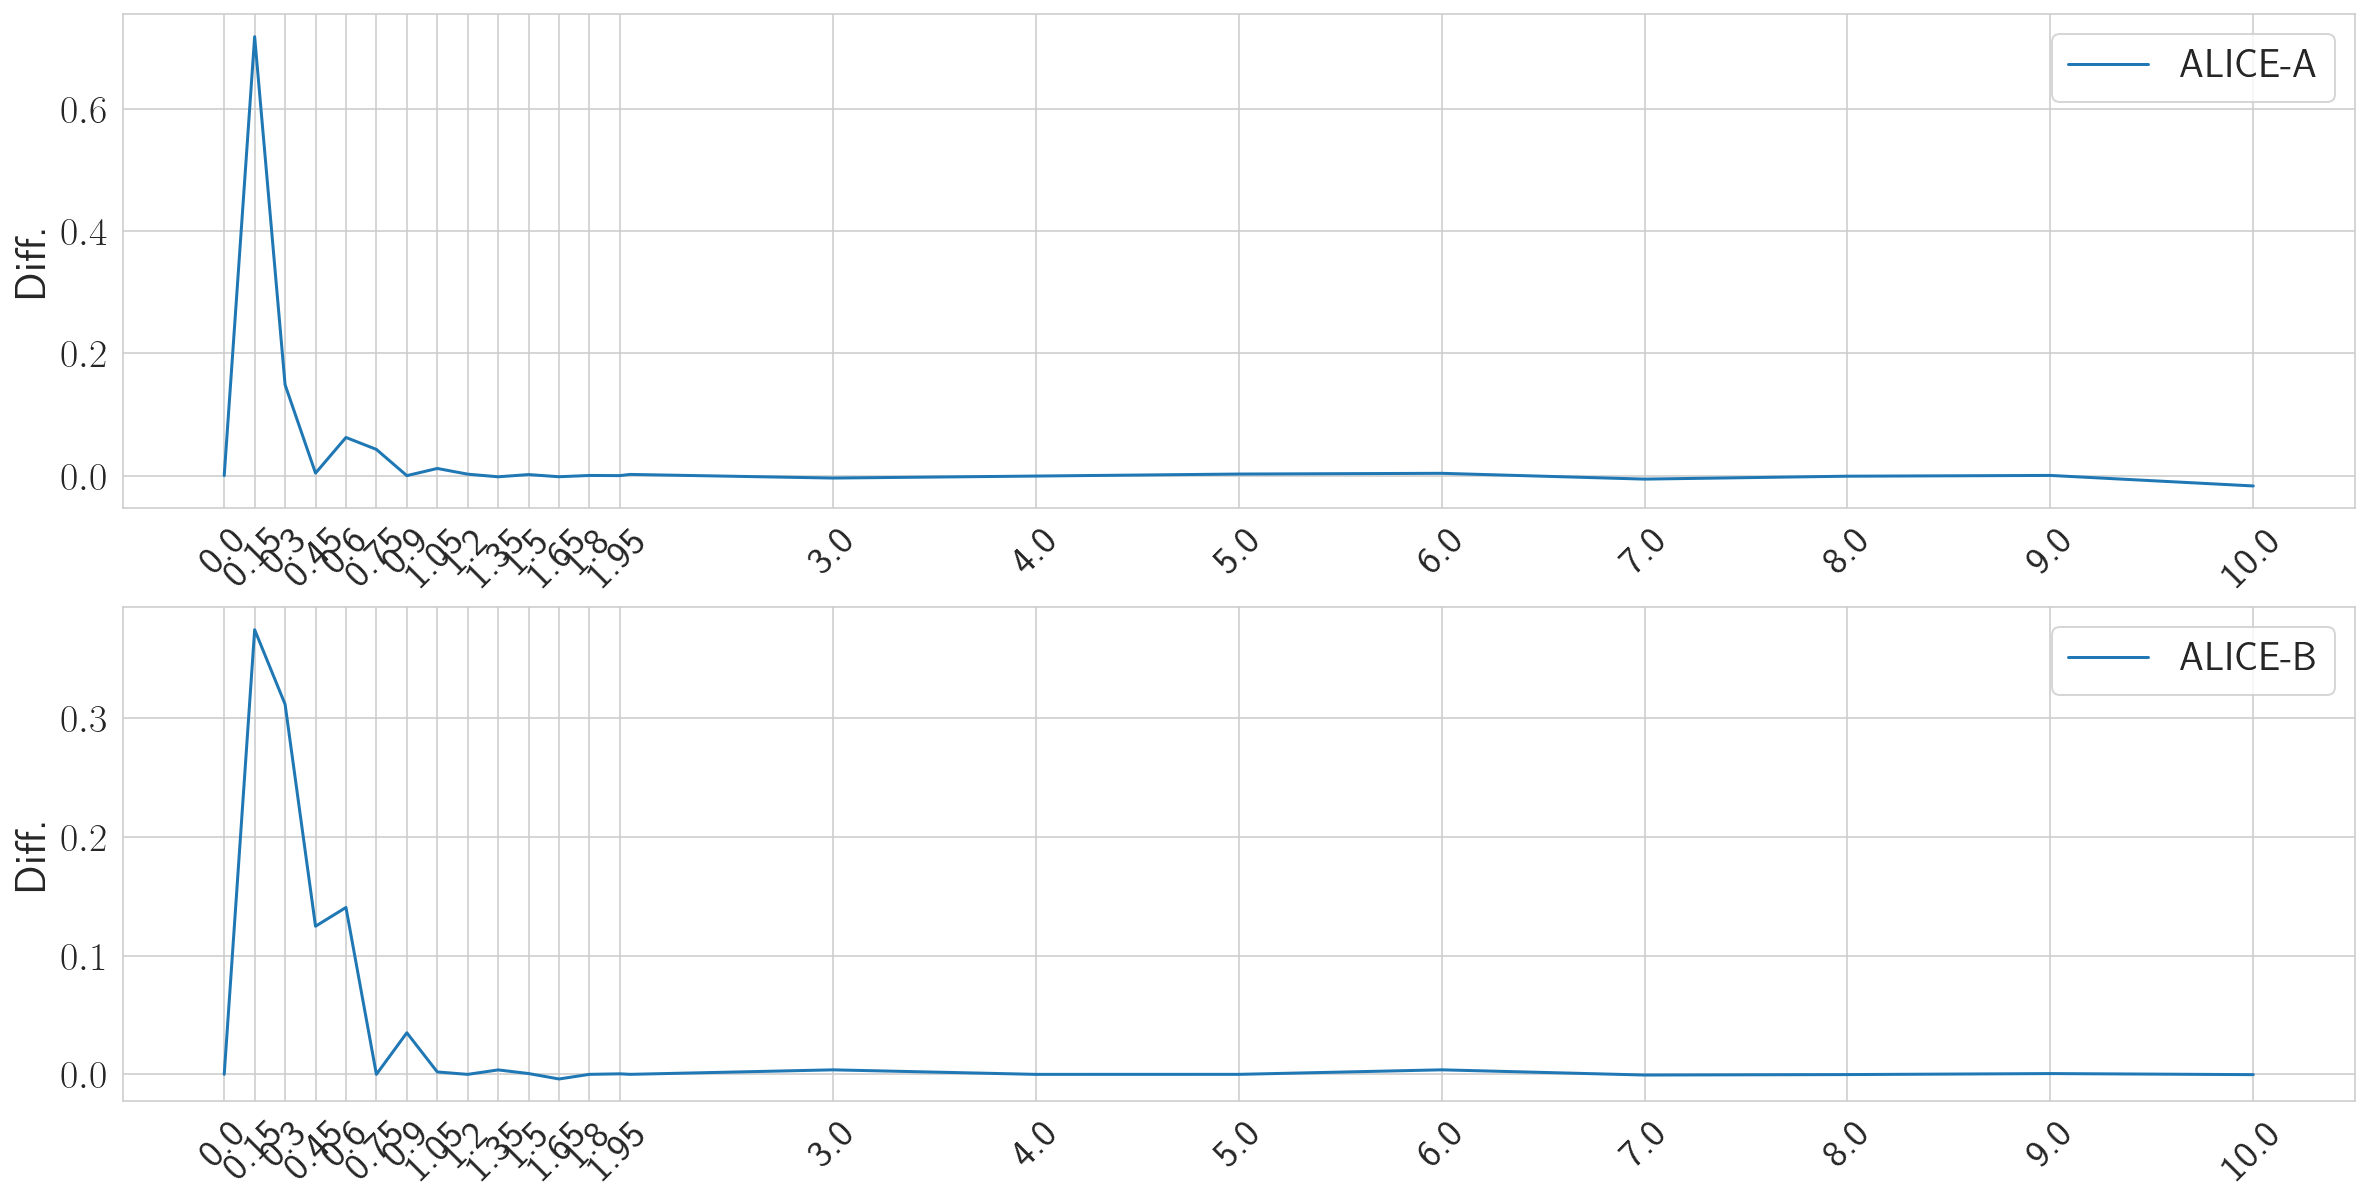

KOSARAK


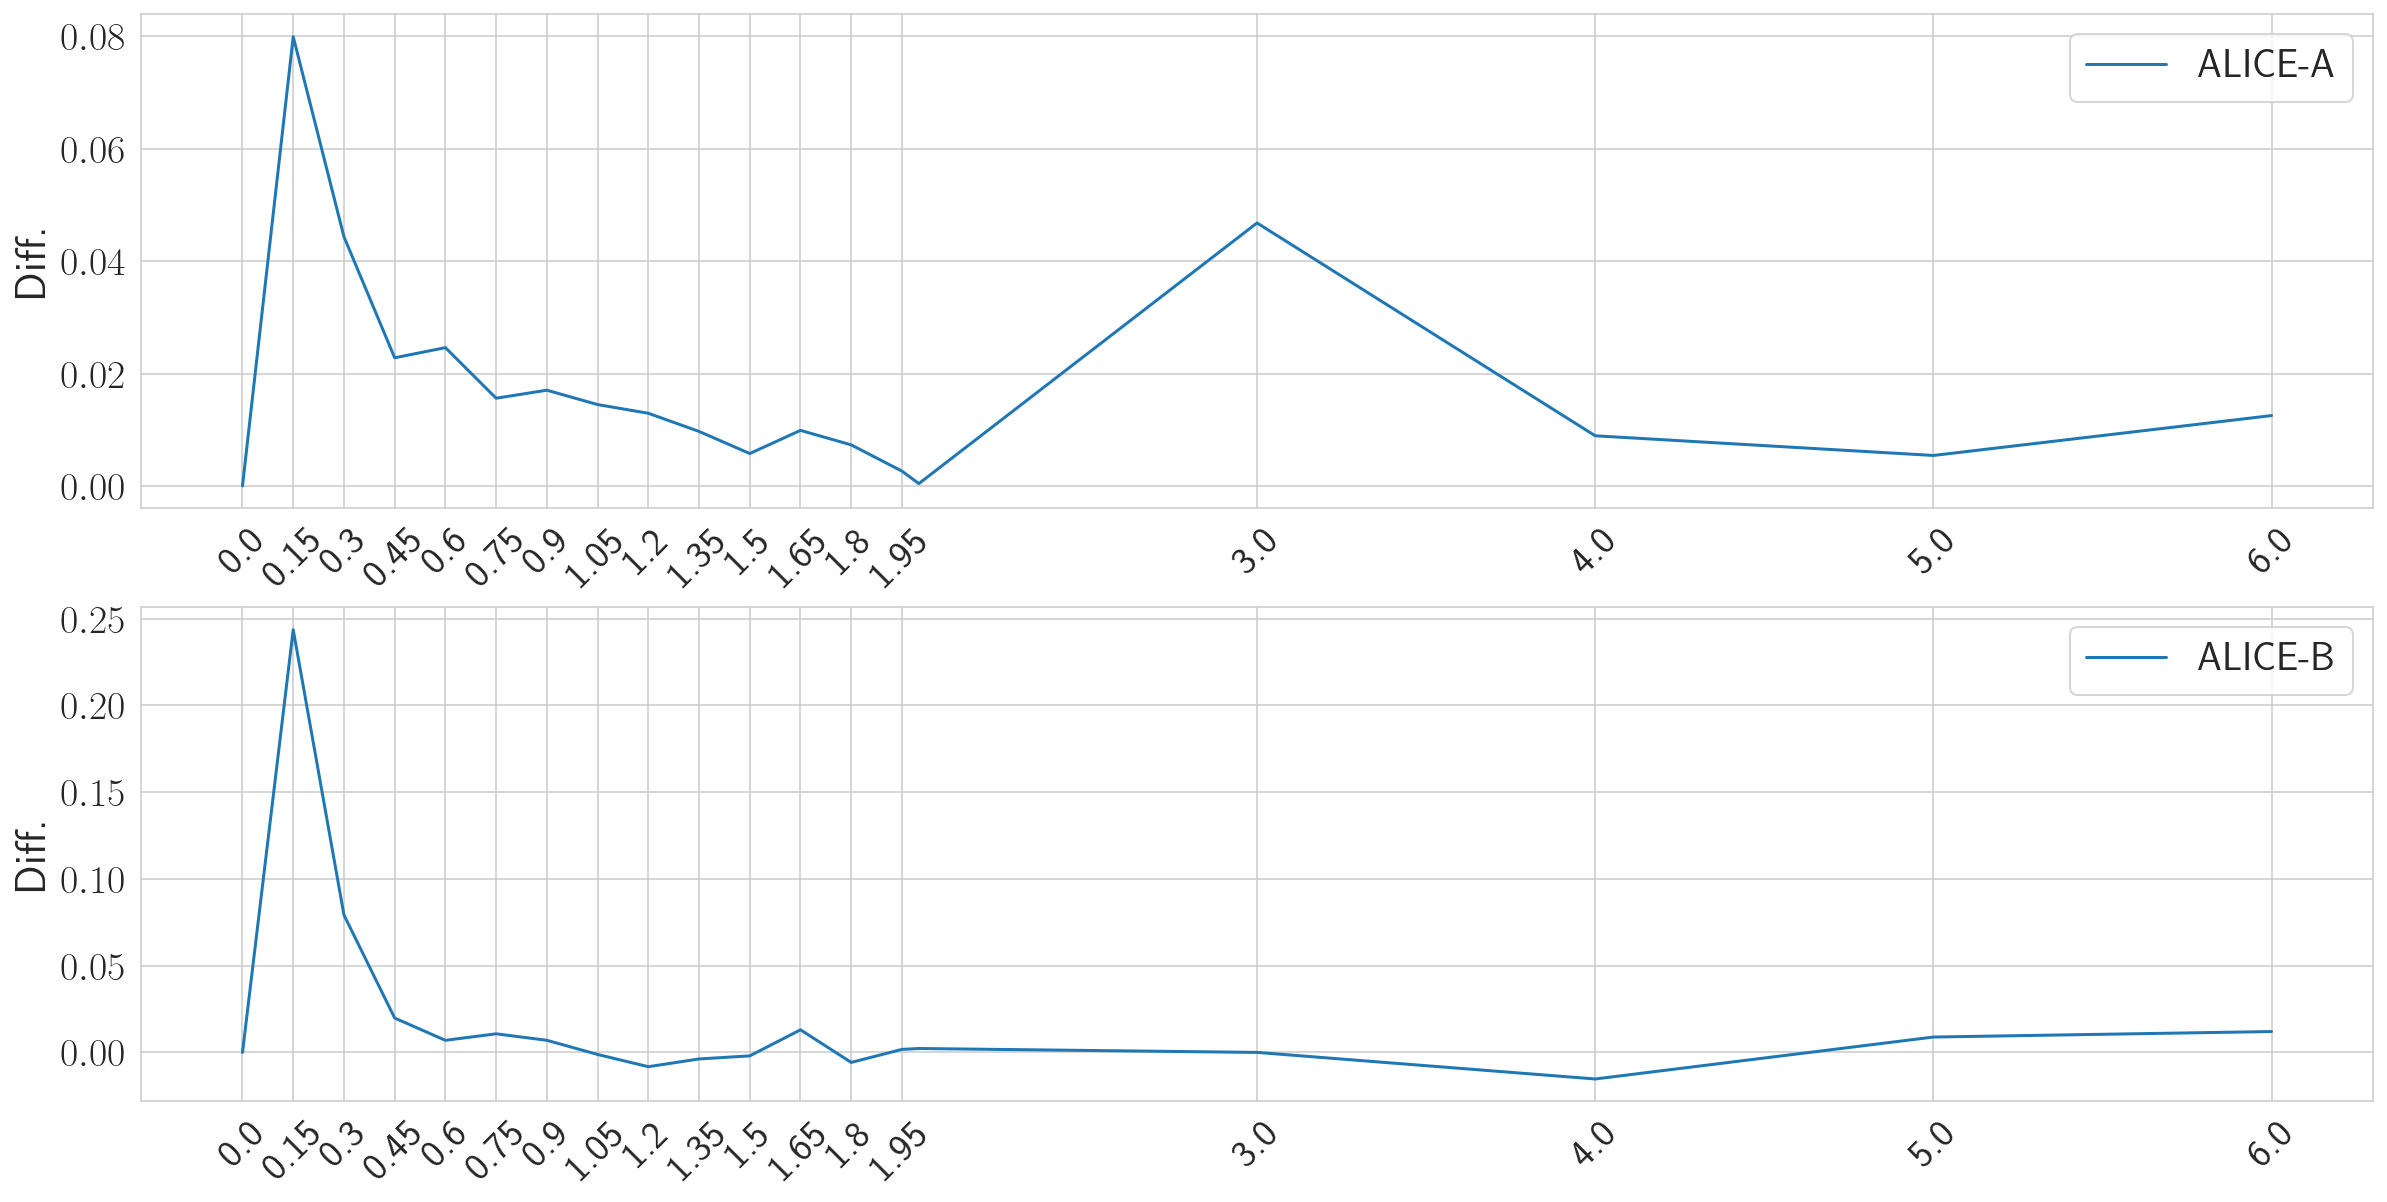

CHESS


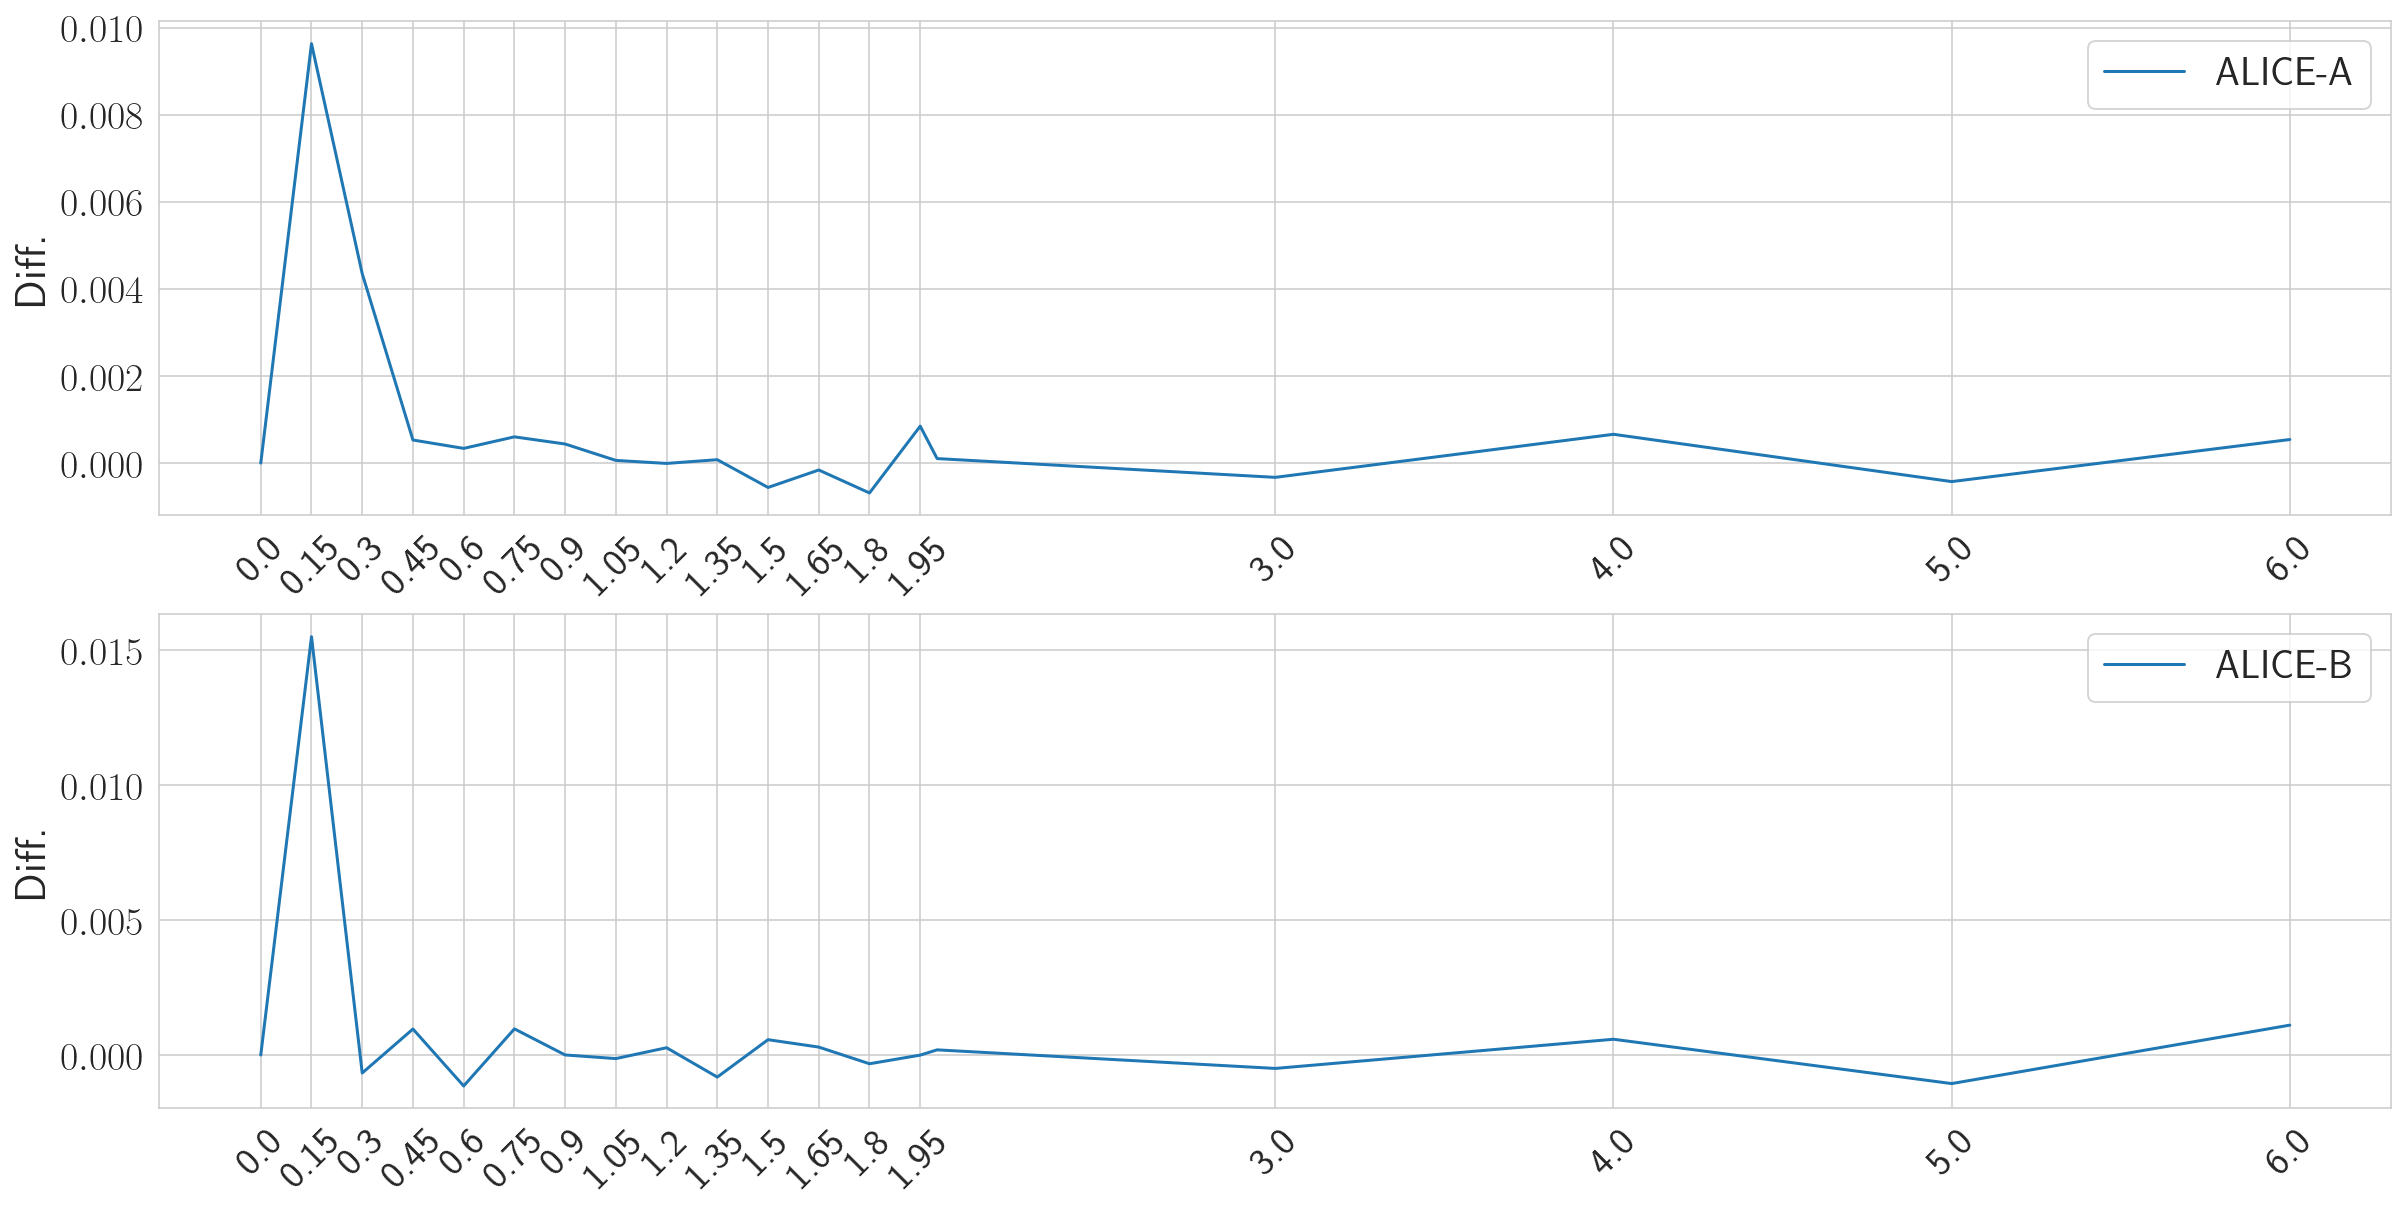

FOODMART


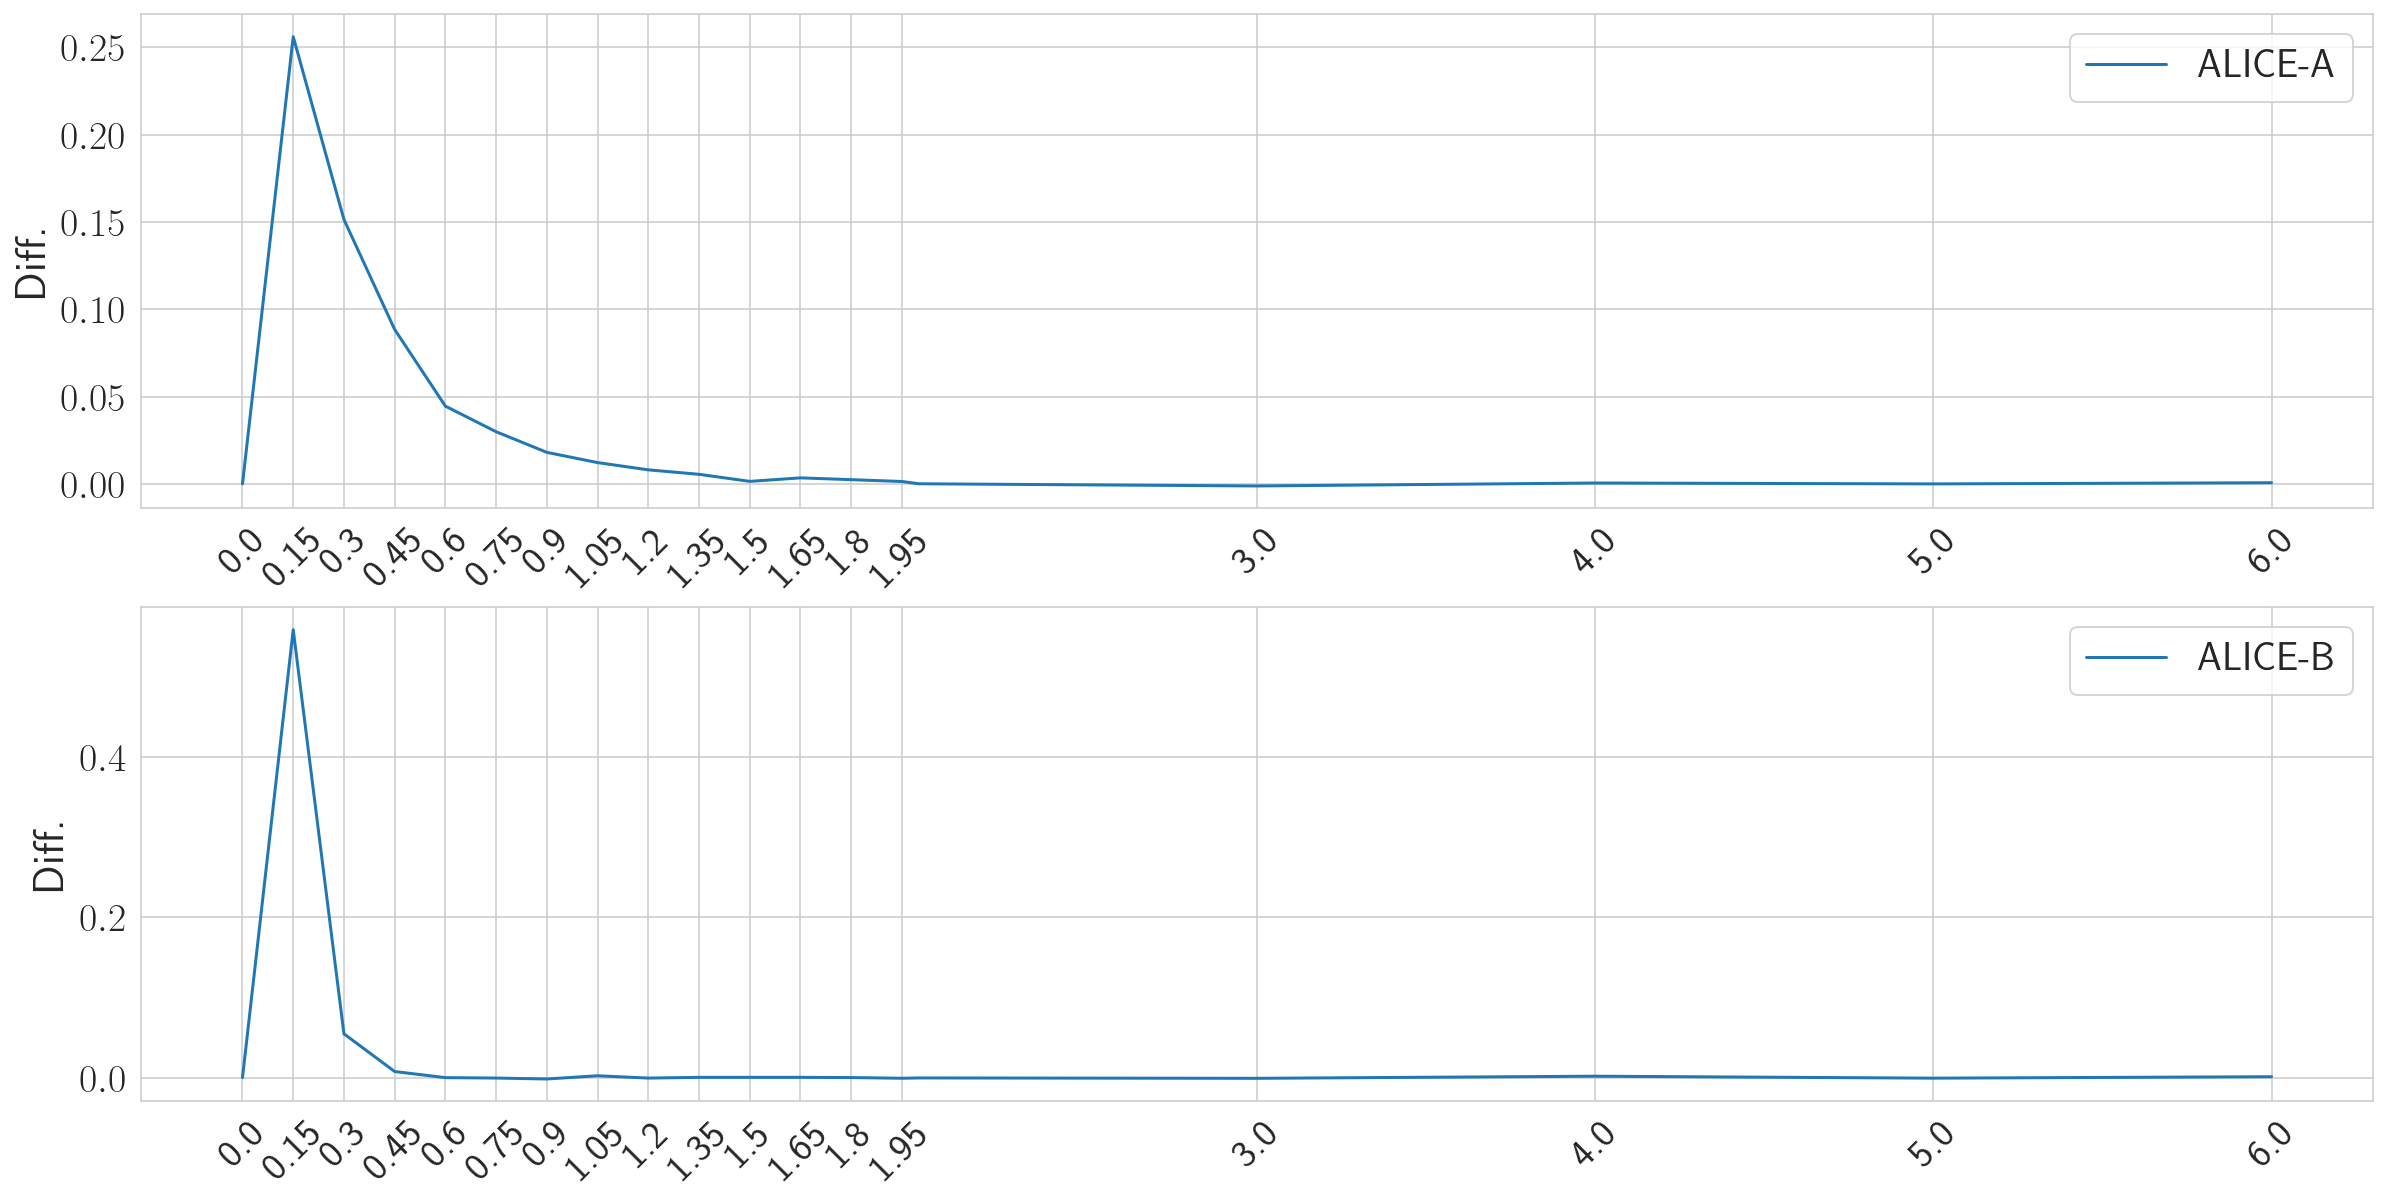

DB-OCC


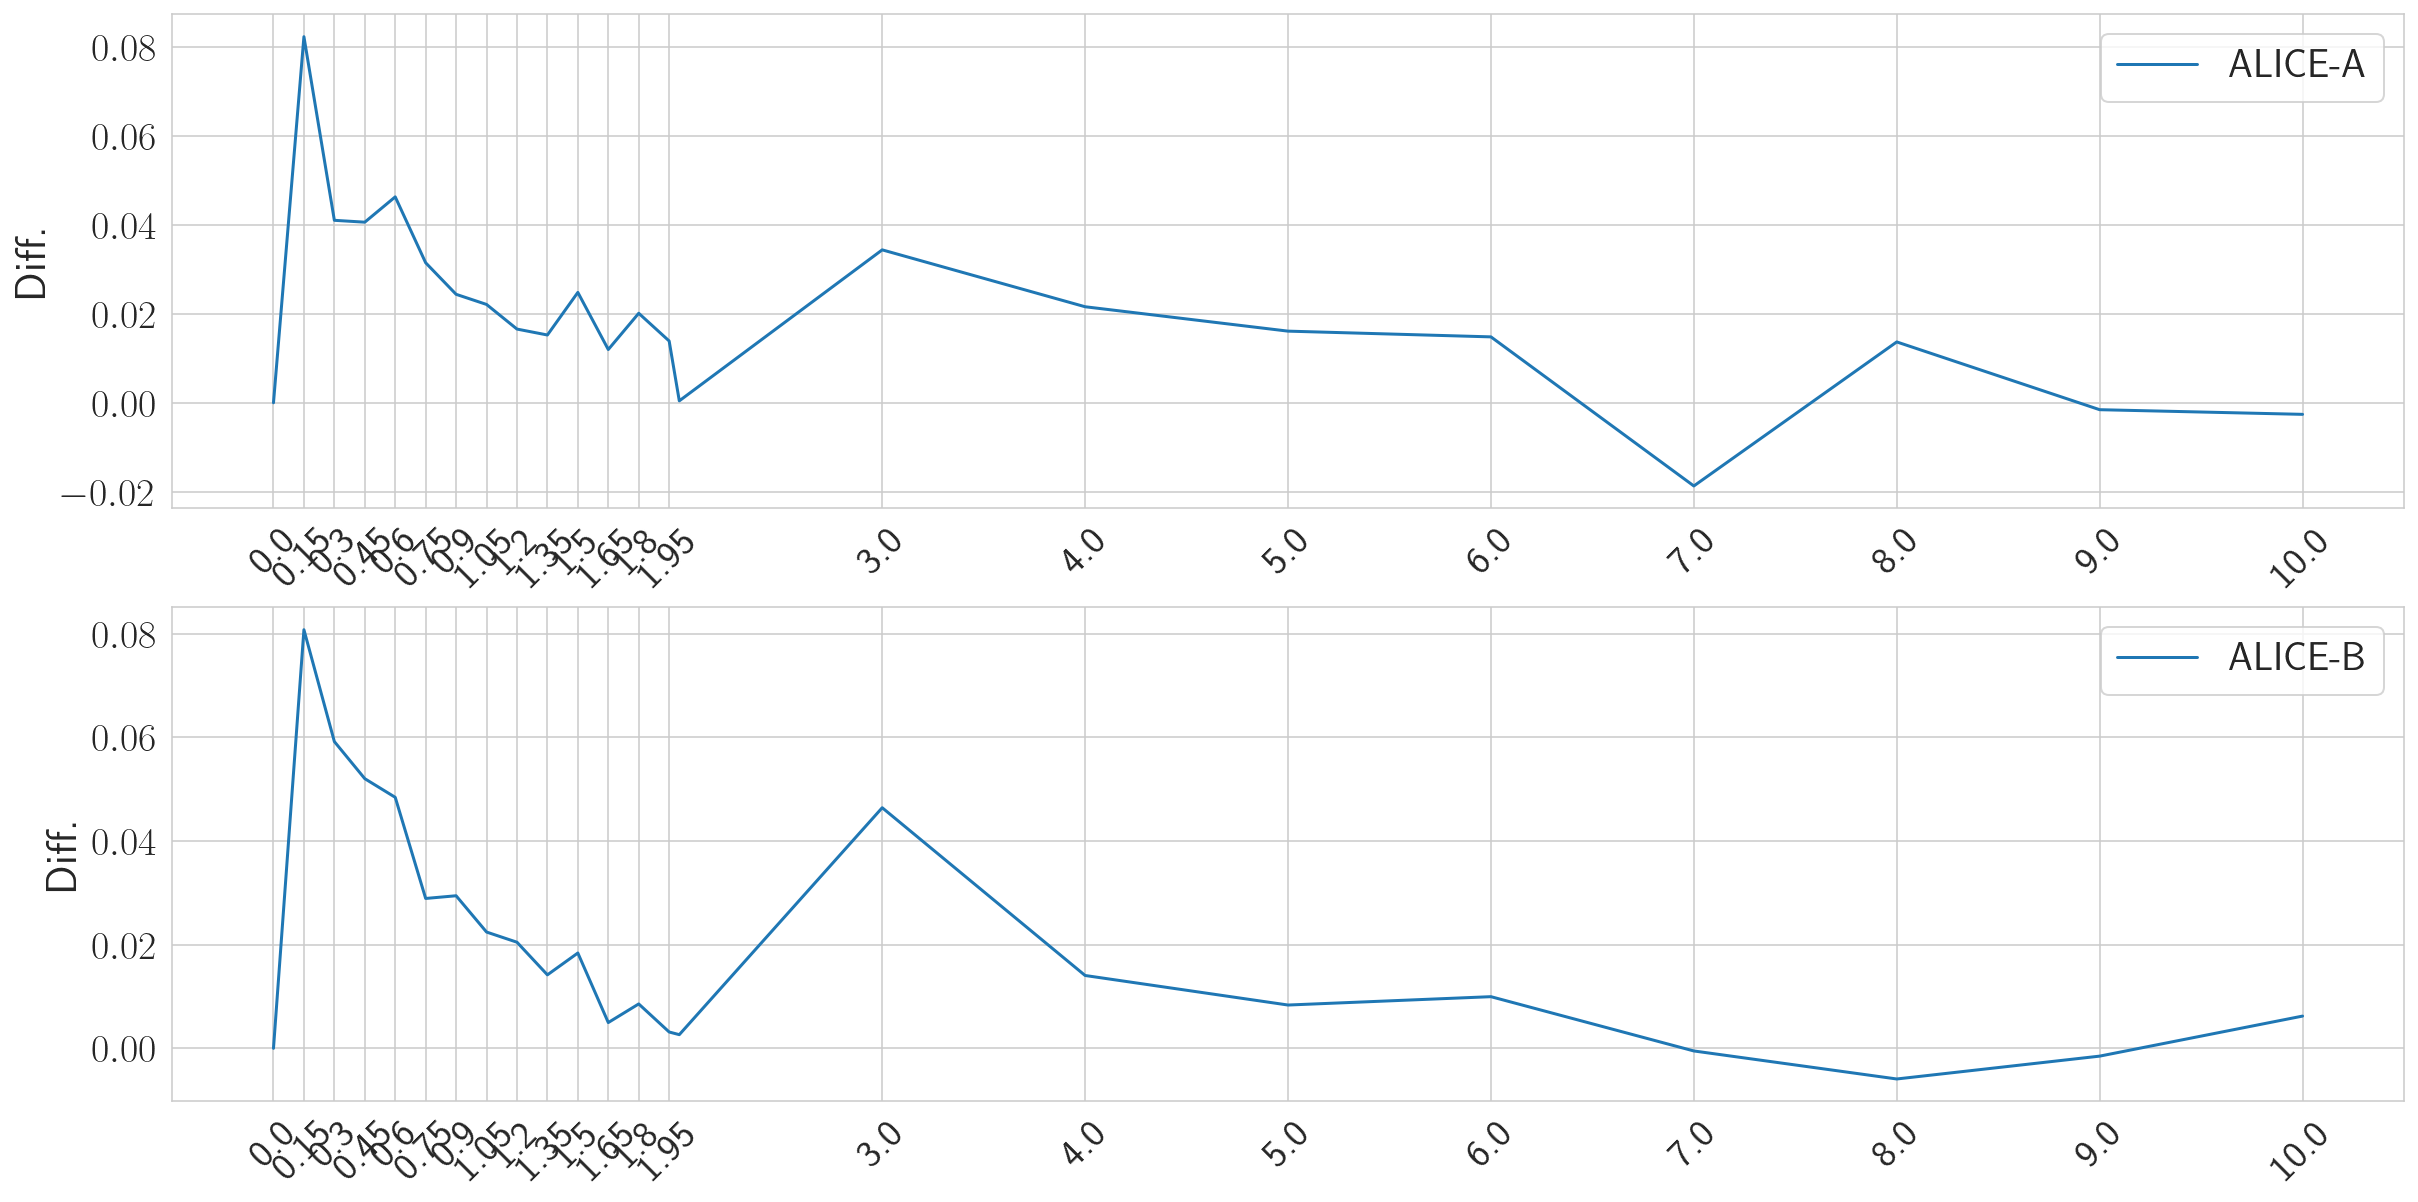

BMS1


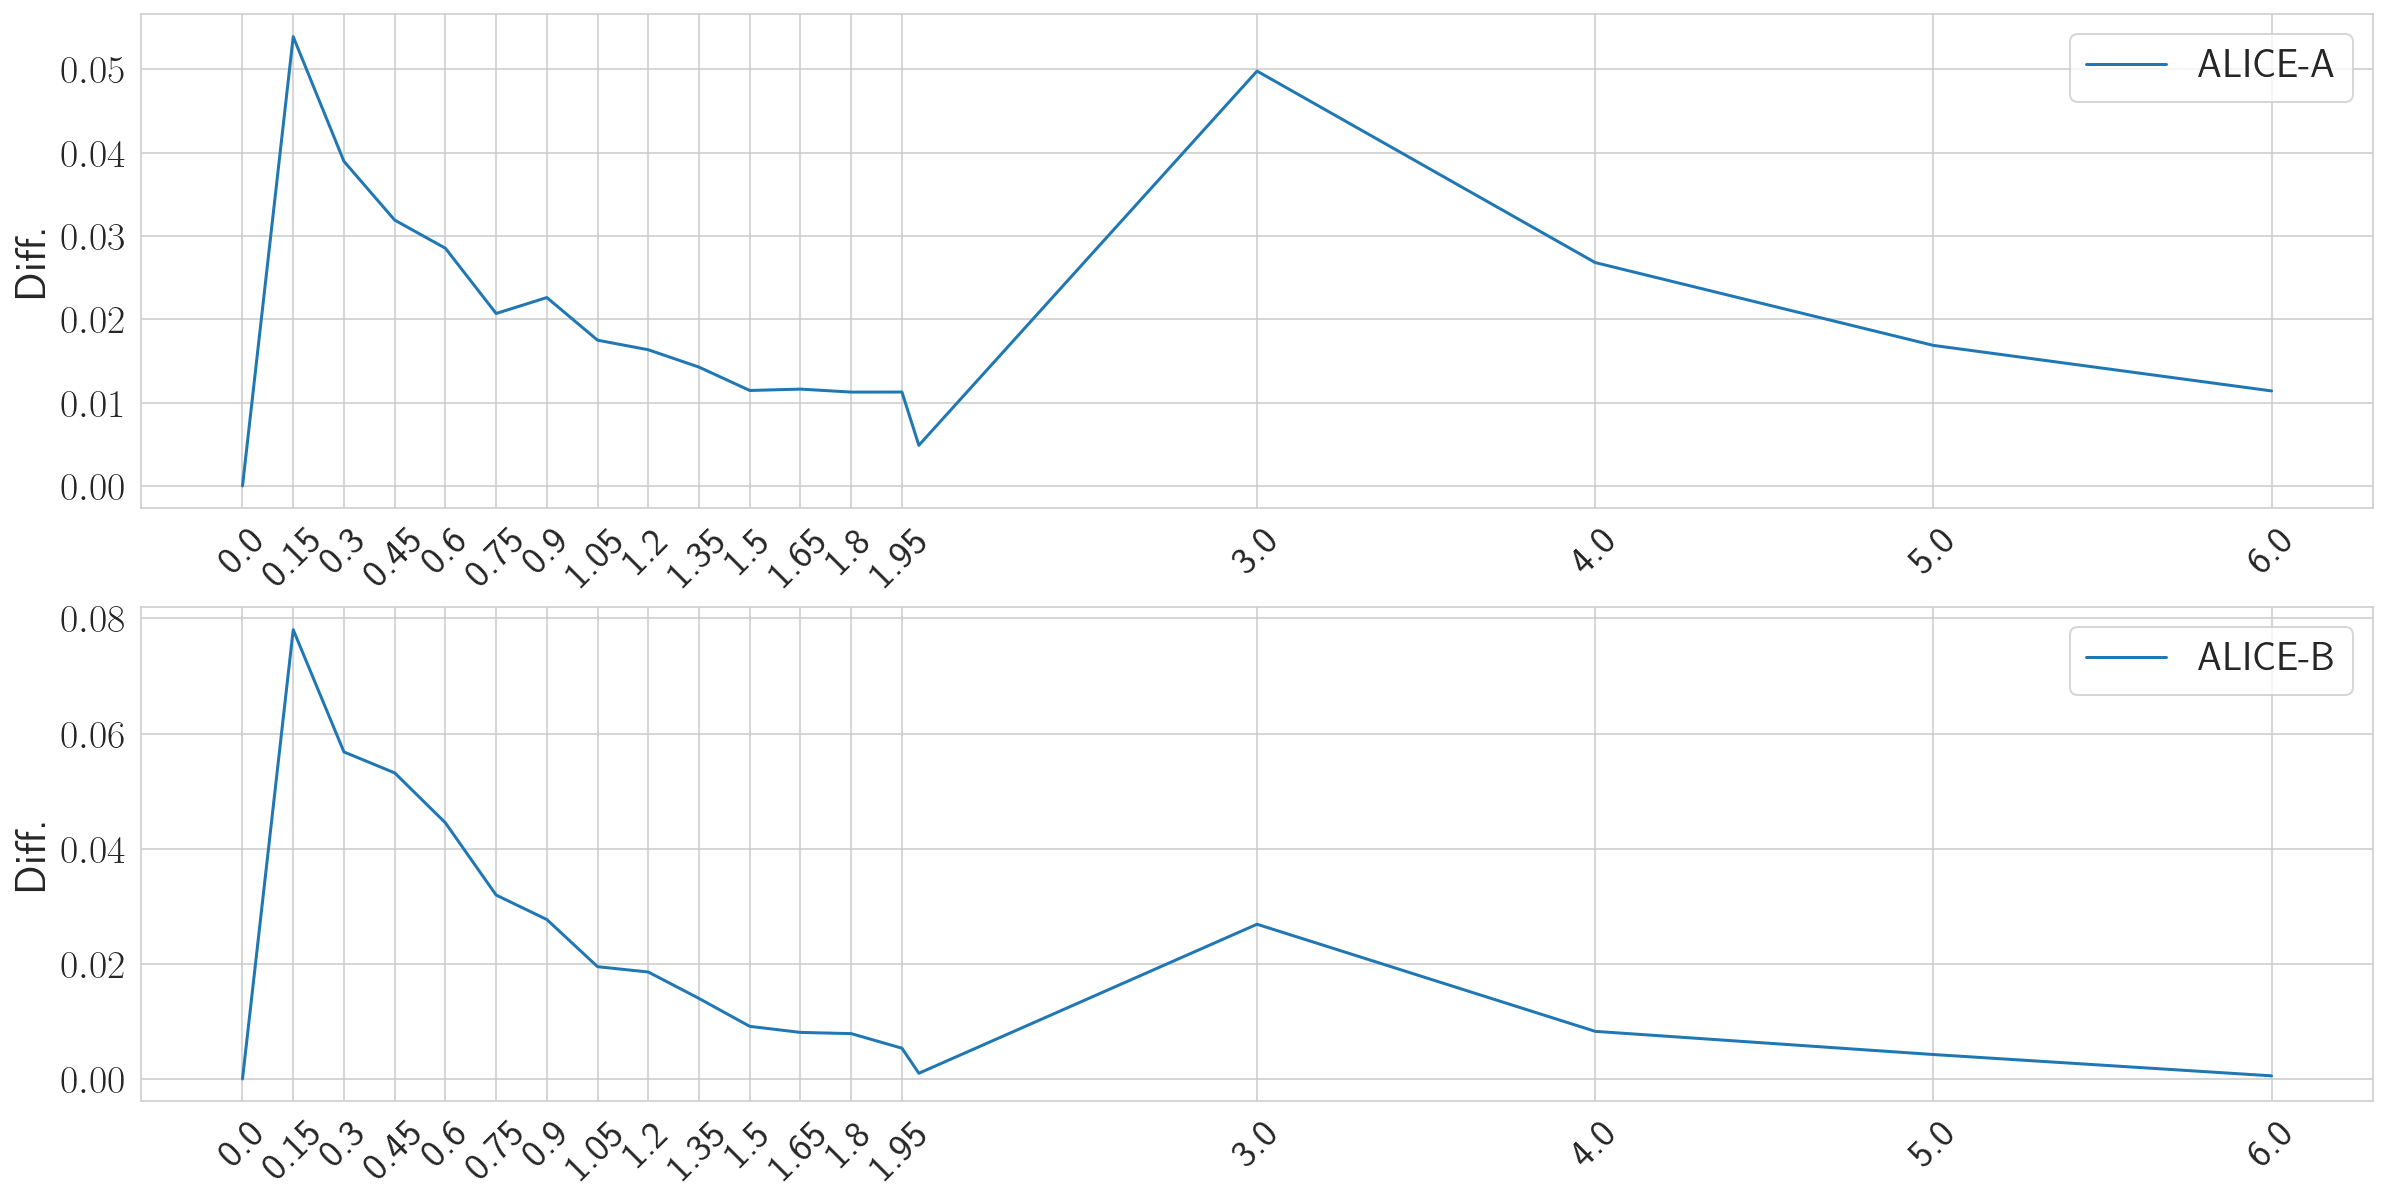

BMS2


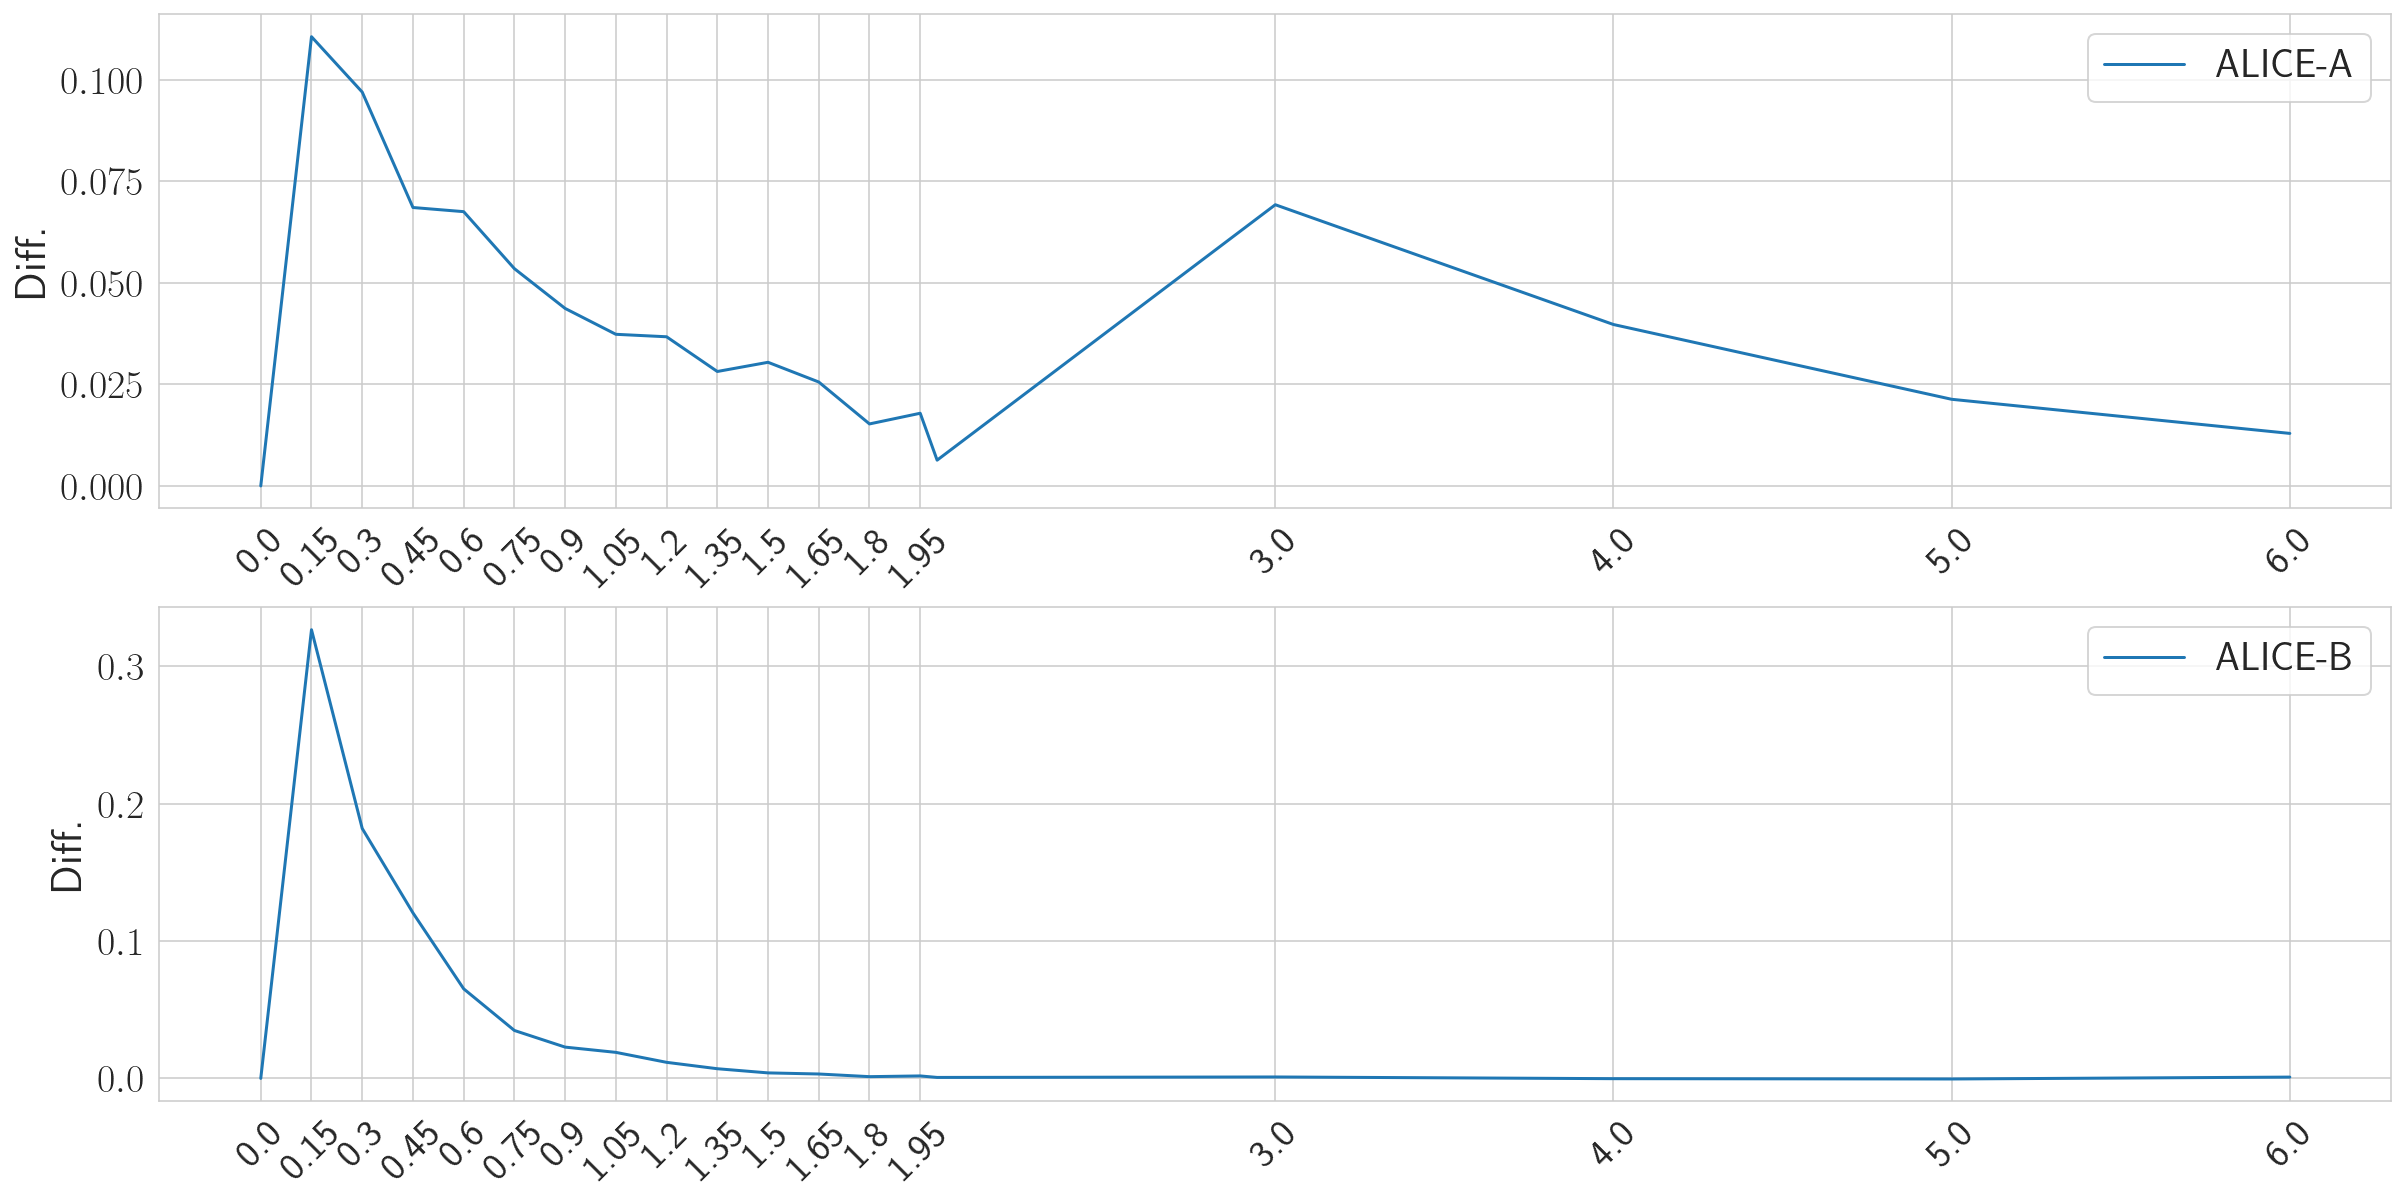

RETAIL


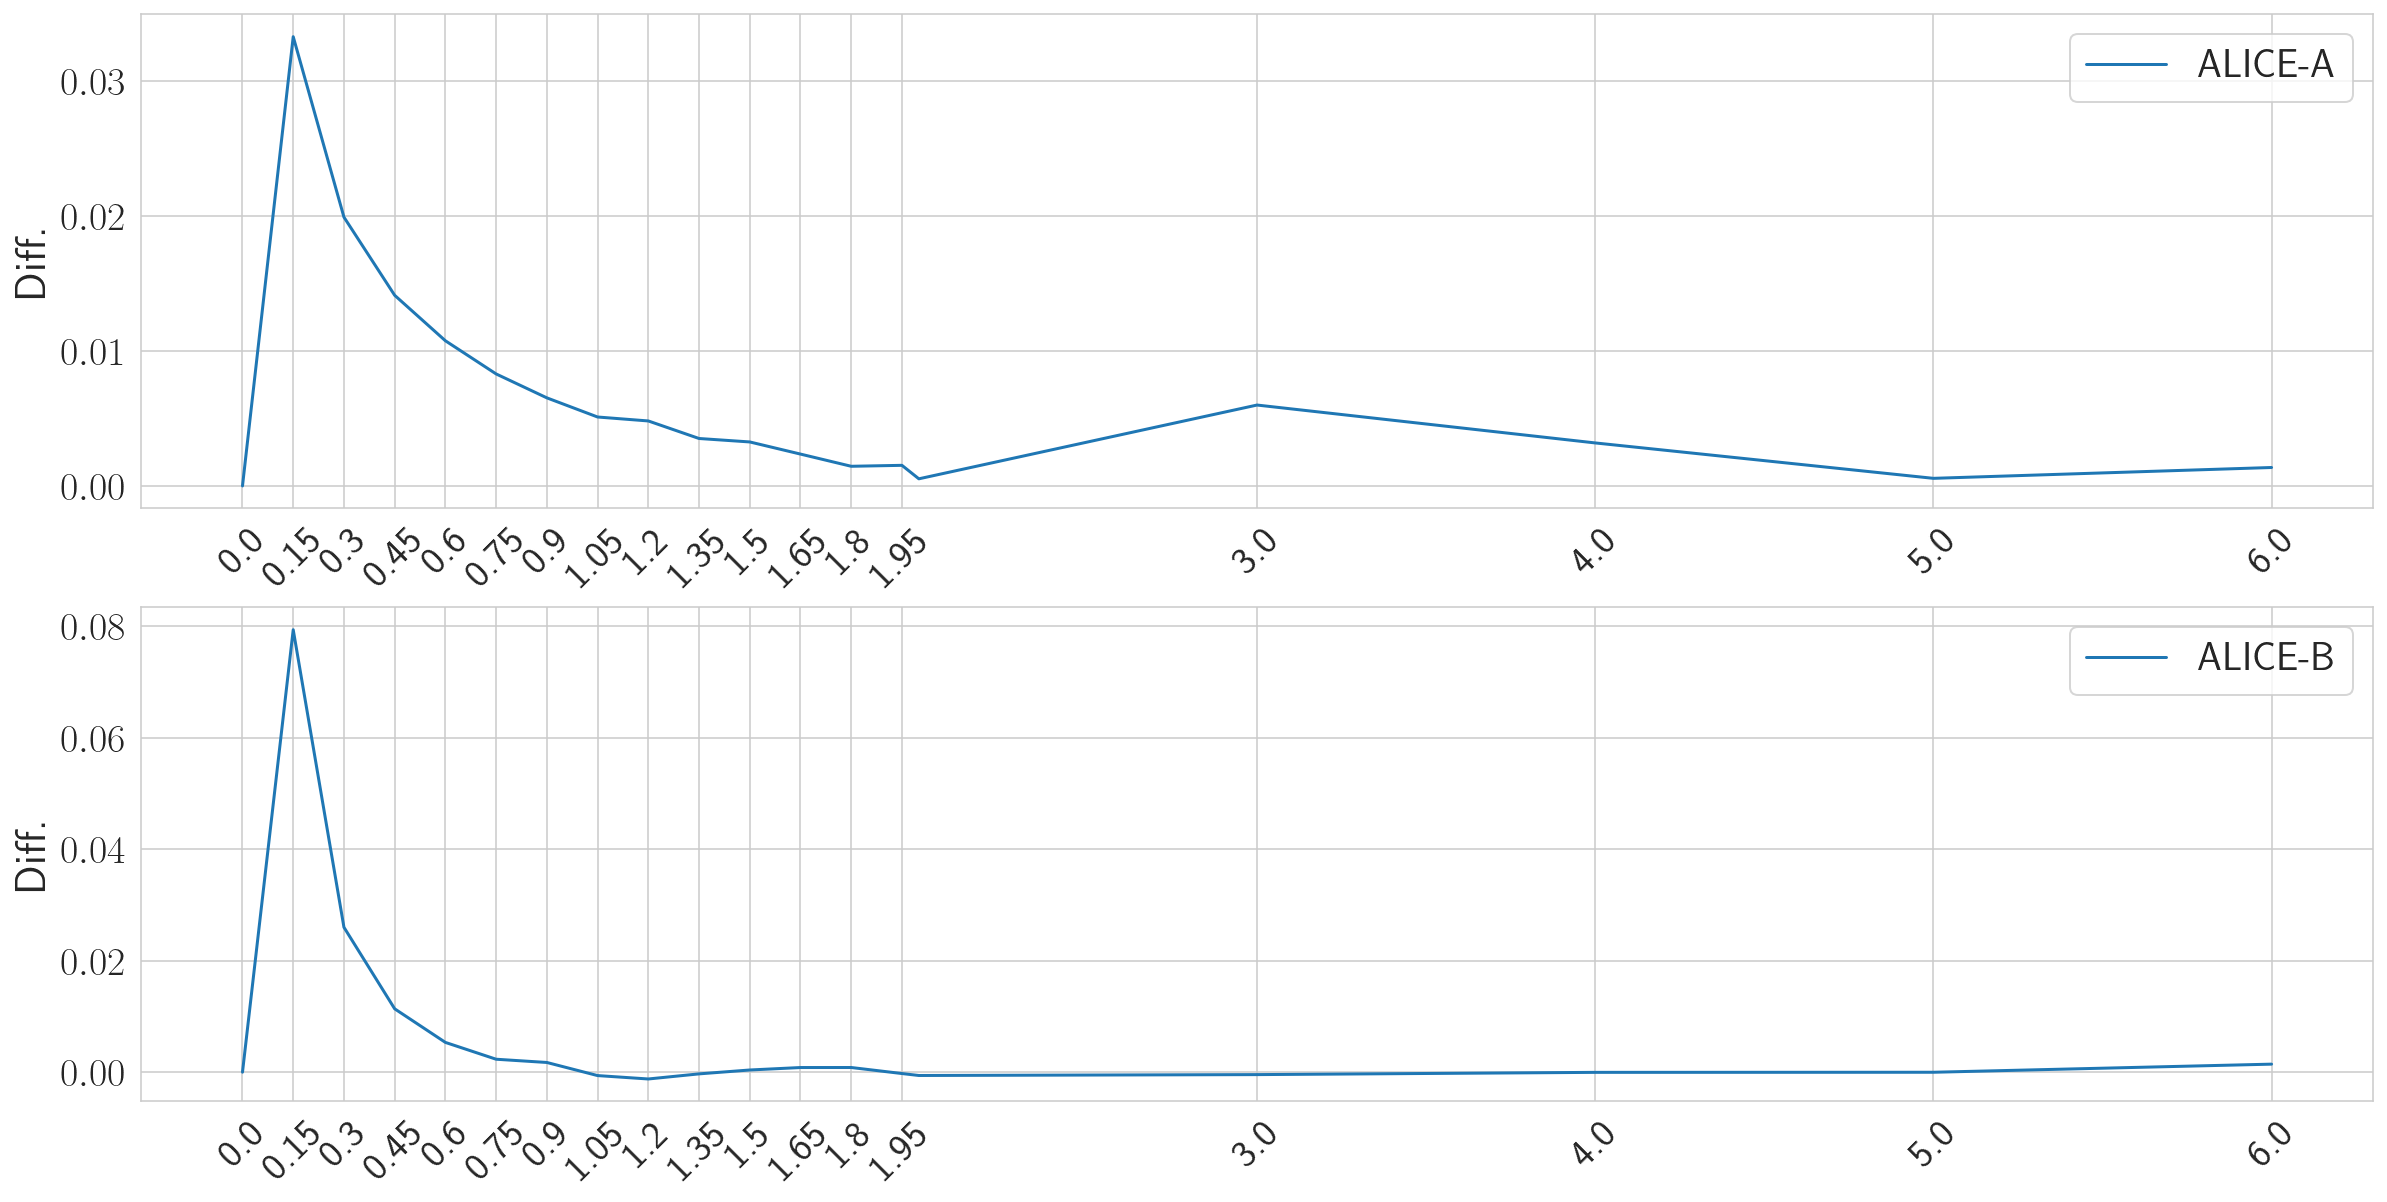

In [107]:
for db in conv_time_df['DataSet'].unique():
    print(db.upper())
    fig, ax = plt.subplots(2, 1, figsize=(20,10))
    conv_diff_df = pd.DataFrame()
    for idx, sampler in enumerate(conv_time_df['Algorithm'].unique()):
        tmp = conv_time_df[(conv_time_df['Algorithm']==sampler) &
                           (conv_time_df['DataSet']==db)].copy()
        maxARSD = tmp.loc[tmp['Num Step Multiplier']==6.0, 'Avg. Rel. Support Diff.'].values[0]
        tmp['Diff.'] = (tmp['Avg. Rel. Support Diff.'] - maxARSD).apply(abs)
        tmp['Diff.'] = (tmp['Diff.'].shift(1) - tmp['Diff.']).fillna(0)
        
        tmp2 = tmp[['Num Step Multiplier', 'Avg. Rel. Support Diff.', 'Diff.']].copy()
        tmp2.rename(columns={'Diff.':sampler,
                             'Avg. Rel. Support Diff.':f'ARSD_{sampler}'}, inplace=True)
        if conv_diff_df.empty:
            conv_diff_df = tmp2
        else:
            conv_diff_df = conv_diff_df.merge(tmp2)
        
        sns.lineplot(data=tmp, x='Num Step Multiplier', y='Diff.', ax=ax[idx], hue='Algorithm')
        ax[idx].legend()
        ticks = list(tmp['Num Step Multiplier'].values)
        ticks.remove(2.0)
        labels = [str(round(x,3)) for x in tmp['Num Step Multiplier'].values]
        labels.remove('2.0')
        ax[idx].set_xticks(ticks)
        ax[idx].set_xticklabels(labels, rotation=45, ha='center')
        ax[idx].set_xlabel('')
        ax[idx].grid(which='both', axis='x')
    plt.show()

In [41]:
## mushrooms
# ALICE = 0.6 (105.191), RSO = 1.2 (2.943)
## foodmart
# ALICE = 0.45 (0.134), RSO = 1.5 (0.069)
## BMS2
# ALICE = 1.8 (15.8), RSO = 6 (10.05)
## retail
# ALICE = 1.05 (30.4), RSO = 5 (22.34)

### vs SelfLoop

In [264]:
result_dir = '../output/convergence/'
freqs = {'chess':f'20.0-0.8', 
#          'BMS2':f'10.0-0.002',
         'BMS1':'10.0-0.002',
         'foodmart':'20.0-3.0E-4'
         }

In [265]:
def get_dict(sampler_to_arfds, num_swap_factors):
    data_dict = defaultdict(list)
    data_dict[cs.swap_num_mult_title] = num_swap_factors * len(sampler_to_arfds.keys())
    
    for sampler, arfds in sampler_to_arfds.items():
        for arfd in arfds:
            data_dict[cs.algo_title].append(sampler)
            data_dict[cs.arsd_title].append(arfd[0])
            data_dict["Mean"].append(arfd[1])
            data_dict["Min"].append(arfd[2])
            data_dict["Max"].append(arfd[3])
            data_dict["Total"].append(arfd[4])
    return data_dict

In [267]:
dfs = []
for db in freqs.keys():
    file = result_dir + f'{db}-{freqs[db]}-0-s.json'
    
    with open(file) as f:
        result = json.load(f)["convergenceStats"]
        sampler_to_arfds = dict()
        for key in result.keys():
            sampler_to_arfds[key] = [[stats["avgRelFreqDiff"], 
                                      stats["medianStepTime"],
                                      stats["minStepTime"],
                                      stats["maxStepTime"],
                                      stats["totalTime"]] for stats in result[key]]
            num_swaps_factors = [stats["numSwapsFactor"] for stats in result[key]]
    tmp_df = pd.DataFrame(get_dict(sampler_to_arfds, num_swaps_factors))
    tmp_df['DataSet'] = dataset_names.get(db, db)
    dfs.append(tmp_df)

conv_df = pd.concat(dfs)

In [268]:
conv_df['Algorithm'] = conv_df['Algorithm'].apply(lambda x: sampler_names[x])

In [269]:
conv_df

Num Step Multiplier Algorithm  Avg. Rel. Support Diff.  Mean  Min  Max  \
0                  0.00  SelfLoop                 0.000000     0    0    0   
1                  0.15  SelfLoop                 0.003574     2    0   13   
2                  0.30  SelfLoop                 0.005531     2    0    5   
3                  0.45  SelfLoop                 0.007263     2    0    6   
4                  0.60  SelfLoop                 0.008434     2    0    5   
..                  ...       ...                      ...   ...  ...  ...   
94                16.00   ALICE-A                 0.623165     0    0    1   
95                17.00   ALICE-A                 0.621851     0    0    1   
96                18.00   ALICE-A                 0.622125     0    0    1   
97                19.00   ALICE-A                 0.621576     0    0    1   
98                20.00   ALICE-A                 0.620202     0    0    1   

    Total   DataSet  
0     241     chess  
1   28805     chess  
2   29444     chess  
3   30350     chess  
4   30035     chess  
..    ...       ...  
94    147  foodmart  
95    148  foodmart  
96    148  foodmart  
97    148  foodmart  
98    148  foodmart  

[267 rows x 8 columns]

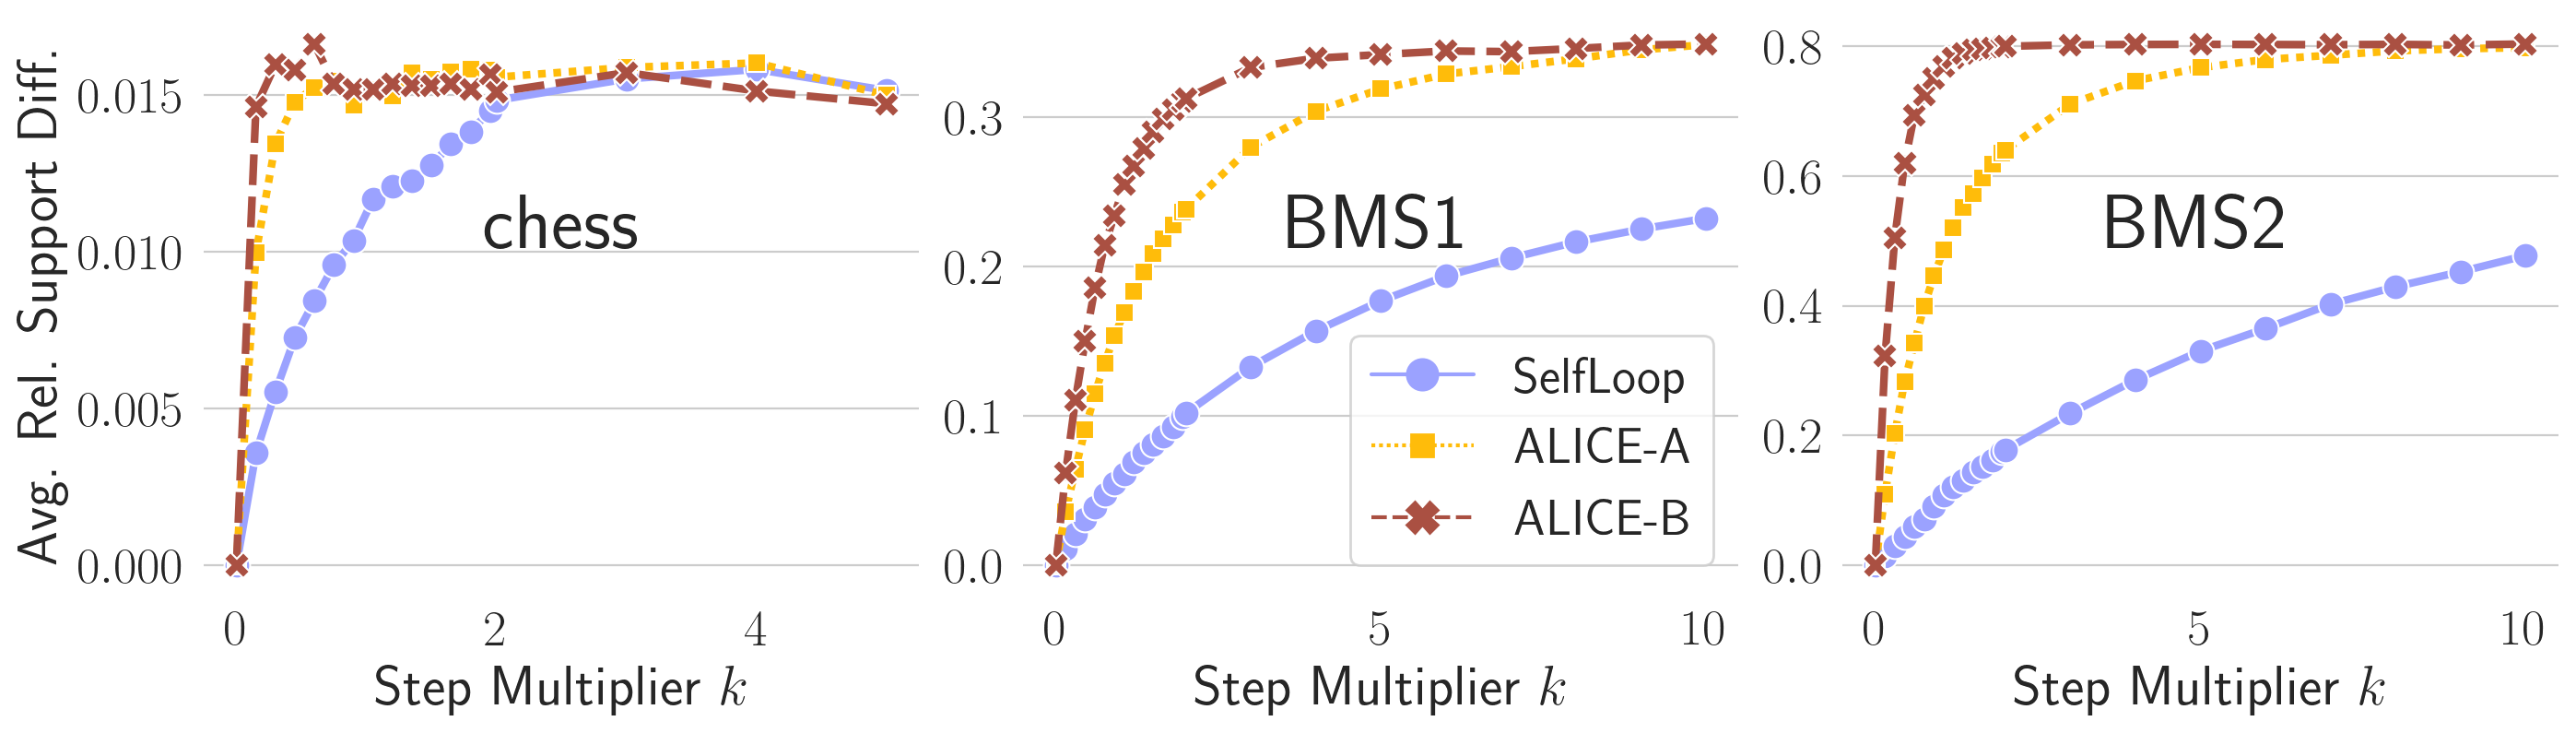

In [39]:
fig, ax = plt.subplots(1,3, figsize=(14,4))

for idx, dataset in enumerate(['chess', 'BMS1', 'BMS2']):
    data = conv_df[conv_df['DataSet']==dataset].copy()
    num_colors = len(data['Algorithm'].unique())
    sns.set_style('whitegrid')
    
    sns.lineplot(data=data, x='Num Step Multiplier', palette=palette[:num_colors], 
                 style='Algorithm', markers=True, markersize=10, ax=ax[idx],
                 linewidth=3, y='Avg. Rel. Support Diff.', hue='Algorithm',
                 hue_order=['SelfLoop', 'ALICE-A', 'ALICE-B'])
    ax[idx].spines['right'].set_visible(False)
    ax[idx].spines['top'].set_visible(False)
    ax[idx].spines['left'].set_visible(False)
    ax[idx].spines['bottom'].set_visible(False)
    ax[idx].set_xlabel(r'Step Multiplier $k$')
    if idx != 0:
        ax[idx].set_ylabel('')
    # legend
    leg = ax[idx].legend()
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    ax[idx].legend(fontsize=20)
    if idx != 1:
        ax[idx].legend().remove()  
    ax[idx].set_title(dataset, fontsize=30, pad=-90)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig(fig_dir+'convergence_self_loop.pdf', bbox_inches='tight')

#### Time to Convergence

In [270]:
conv_time_df = conv_df.merge(stats_df[['DataSet', 'Sum Transaction Lengths']], on='DataSet')

In [271]:
conv_time_df

Num Step Multiplier Algorithm  Avg. Rel. Support Diff.  Mean  Min  Max  \
0                   0.00  SelfLoop                 0.000000     0    0    0   
1                   0.15  SelfLoop                 0.003574     2    0   13   
2                   0.30  SelfLoop                 0.005531     2    0    5   
3                   0.45  SelfLoop                 0.007263     2    0    6   
4                   0.60  SelfLoop                 0.008434     2    0    5   
..                   ...       ...                      ...   ...  ...  ...   
262                16.00   ALICE-A                 0.623165     0    0    1   
263                17.00   ALICE-A                 0.621851     0    0    1   
264                18.00   ALICE-A                 0.622125     0    0    1   
265                19.00   ALICE-A                 0.621576     0    0    1   
266                20.00   ALICE-A                 0.620202     0    0    1   

     Total   DataSet  Sum Transaction Lengths  
0      241     chess                   118252  
1    28805     chess                   118252  
2    29444     chess                   118252  
3    30350     chess                   118252  
4    30035     chess                   118252  
..     ...       ...                      ...  
262    147  foodmart                    18319  
263    148  foodmart                    18319  
264    148  foodmart                    18319  
265    148  foodmart                    18319  
266    148  foodmart                    18319  

[267 rows x 9 columns]

In [272]:
conv_time_df['Time'] = conv_time_df['Total'] 

In [273]:
conv_time_df['Time (s)'] = conv_time_df['Time'] / 1000

CHESS


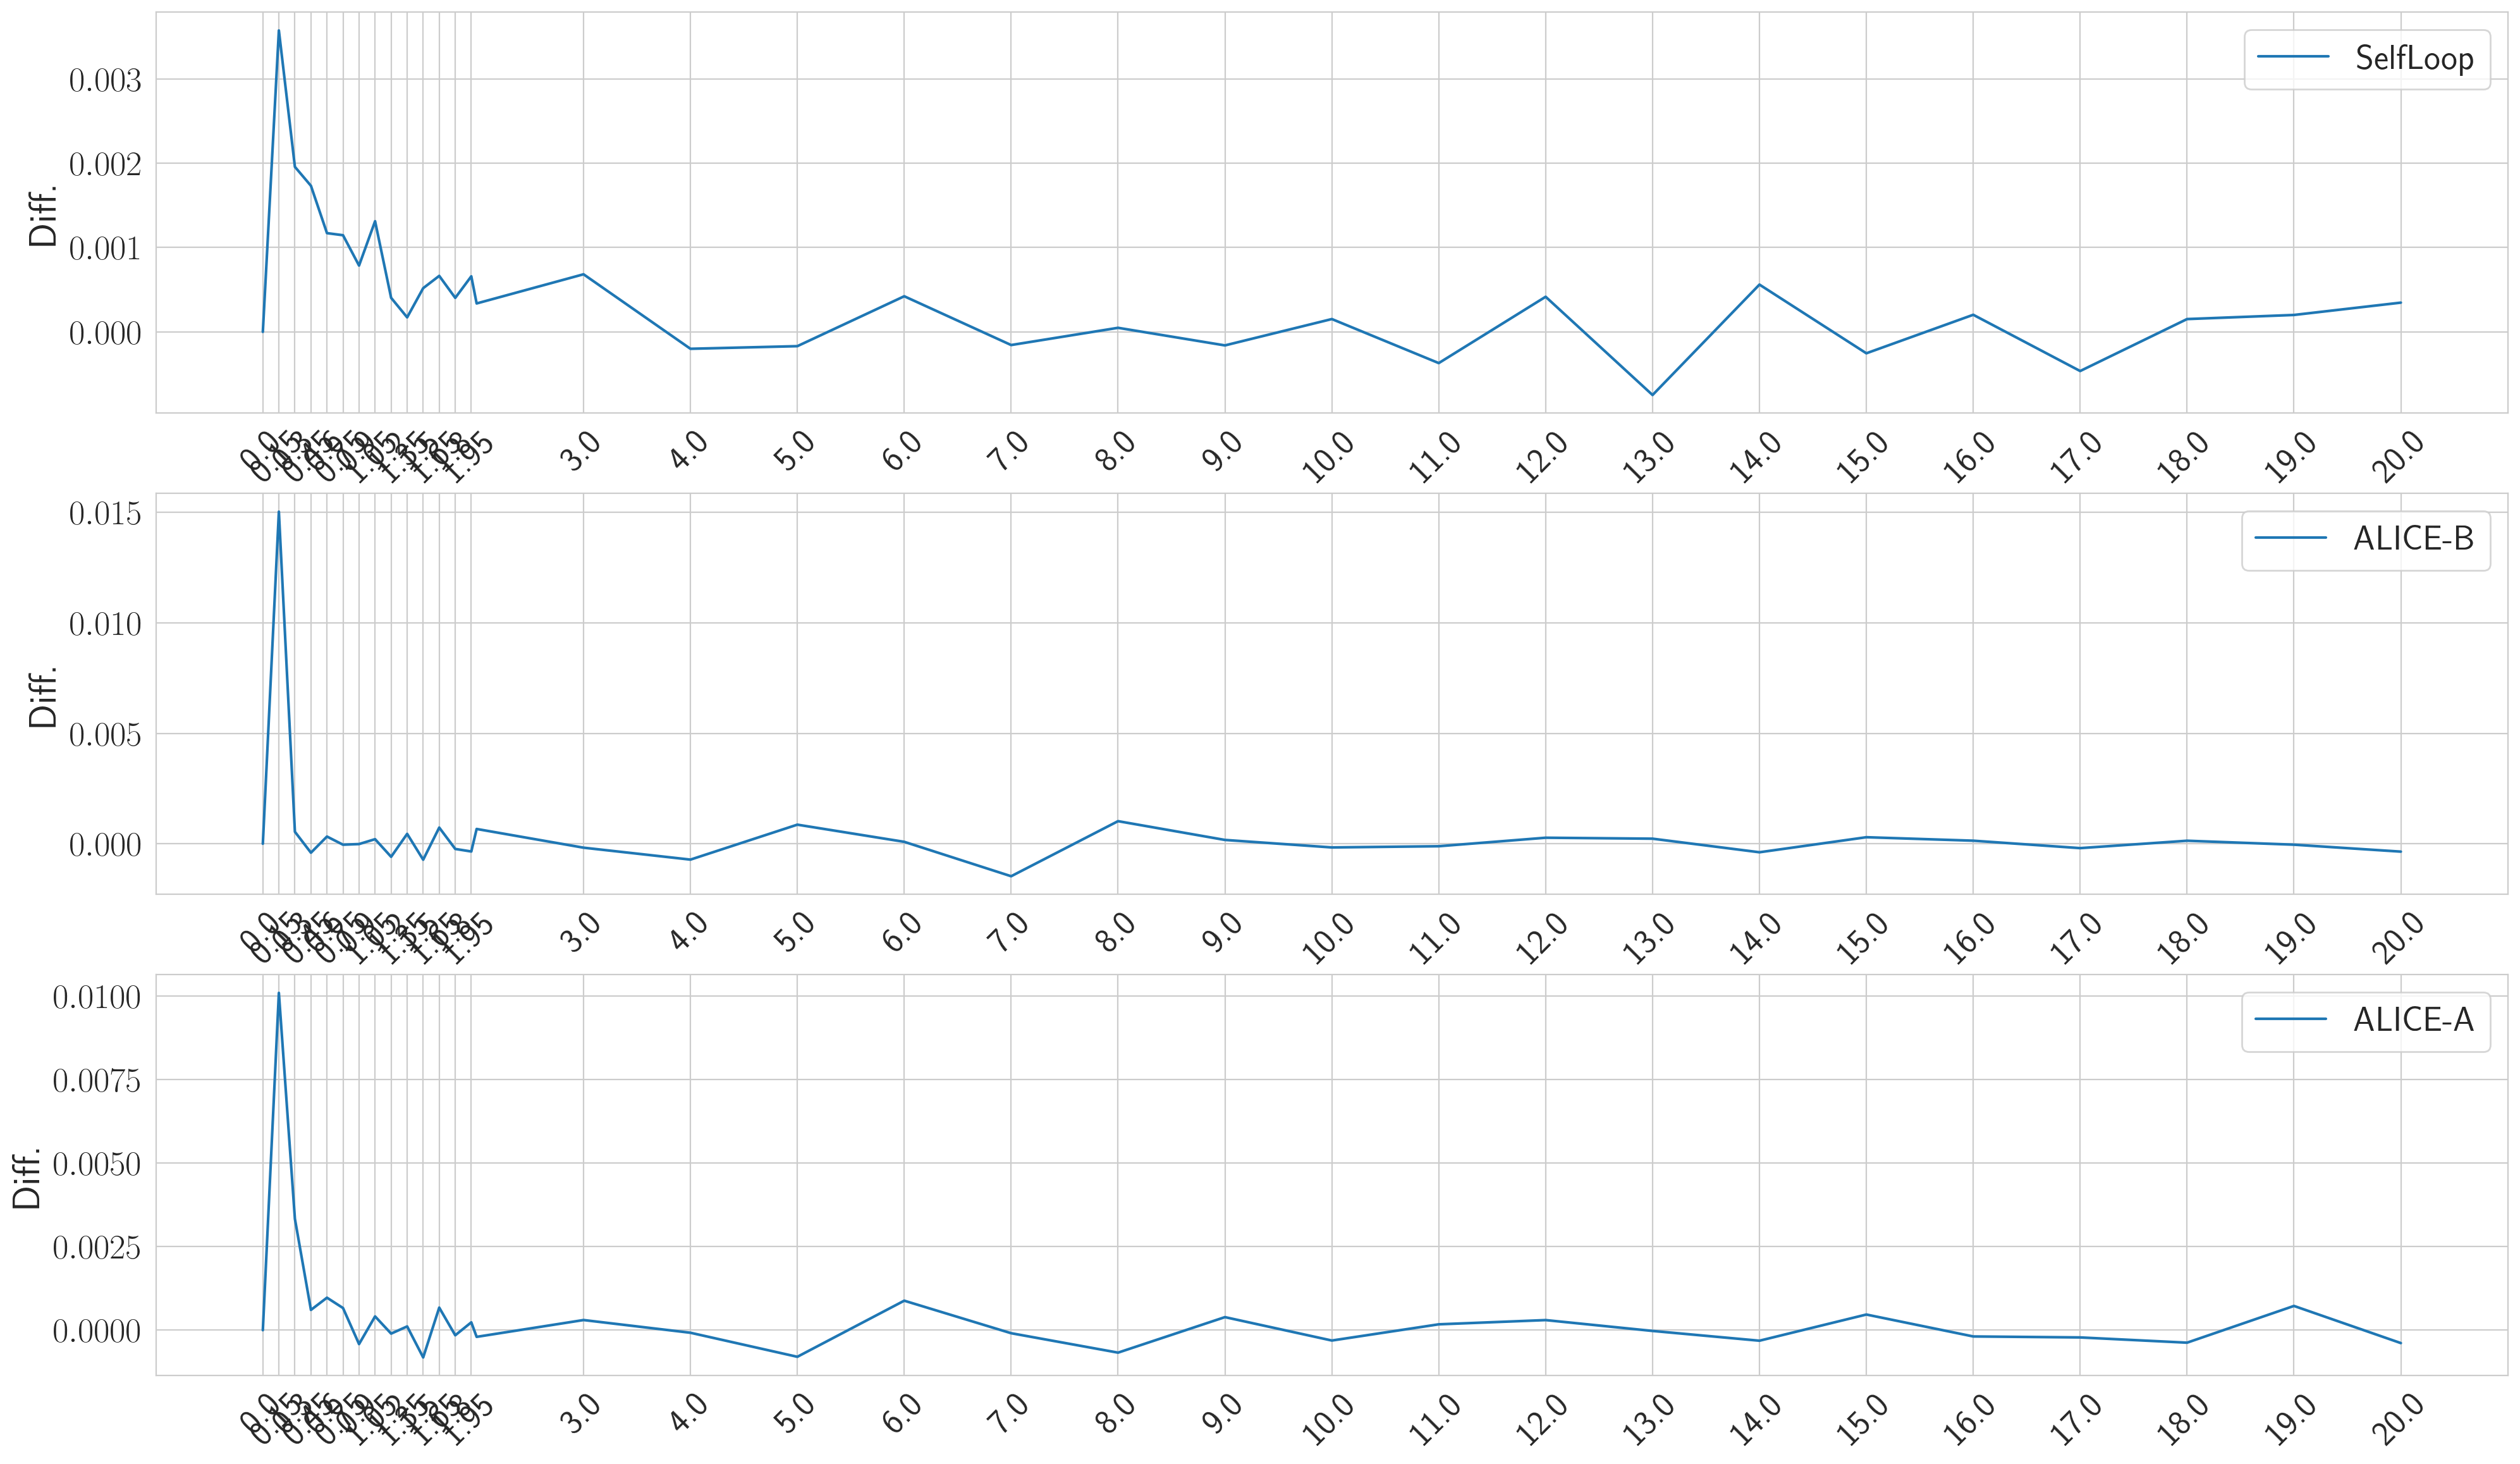

BMS1


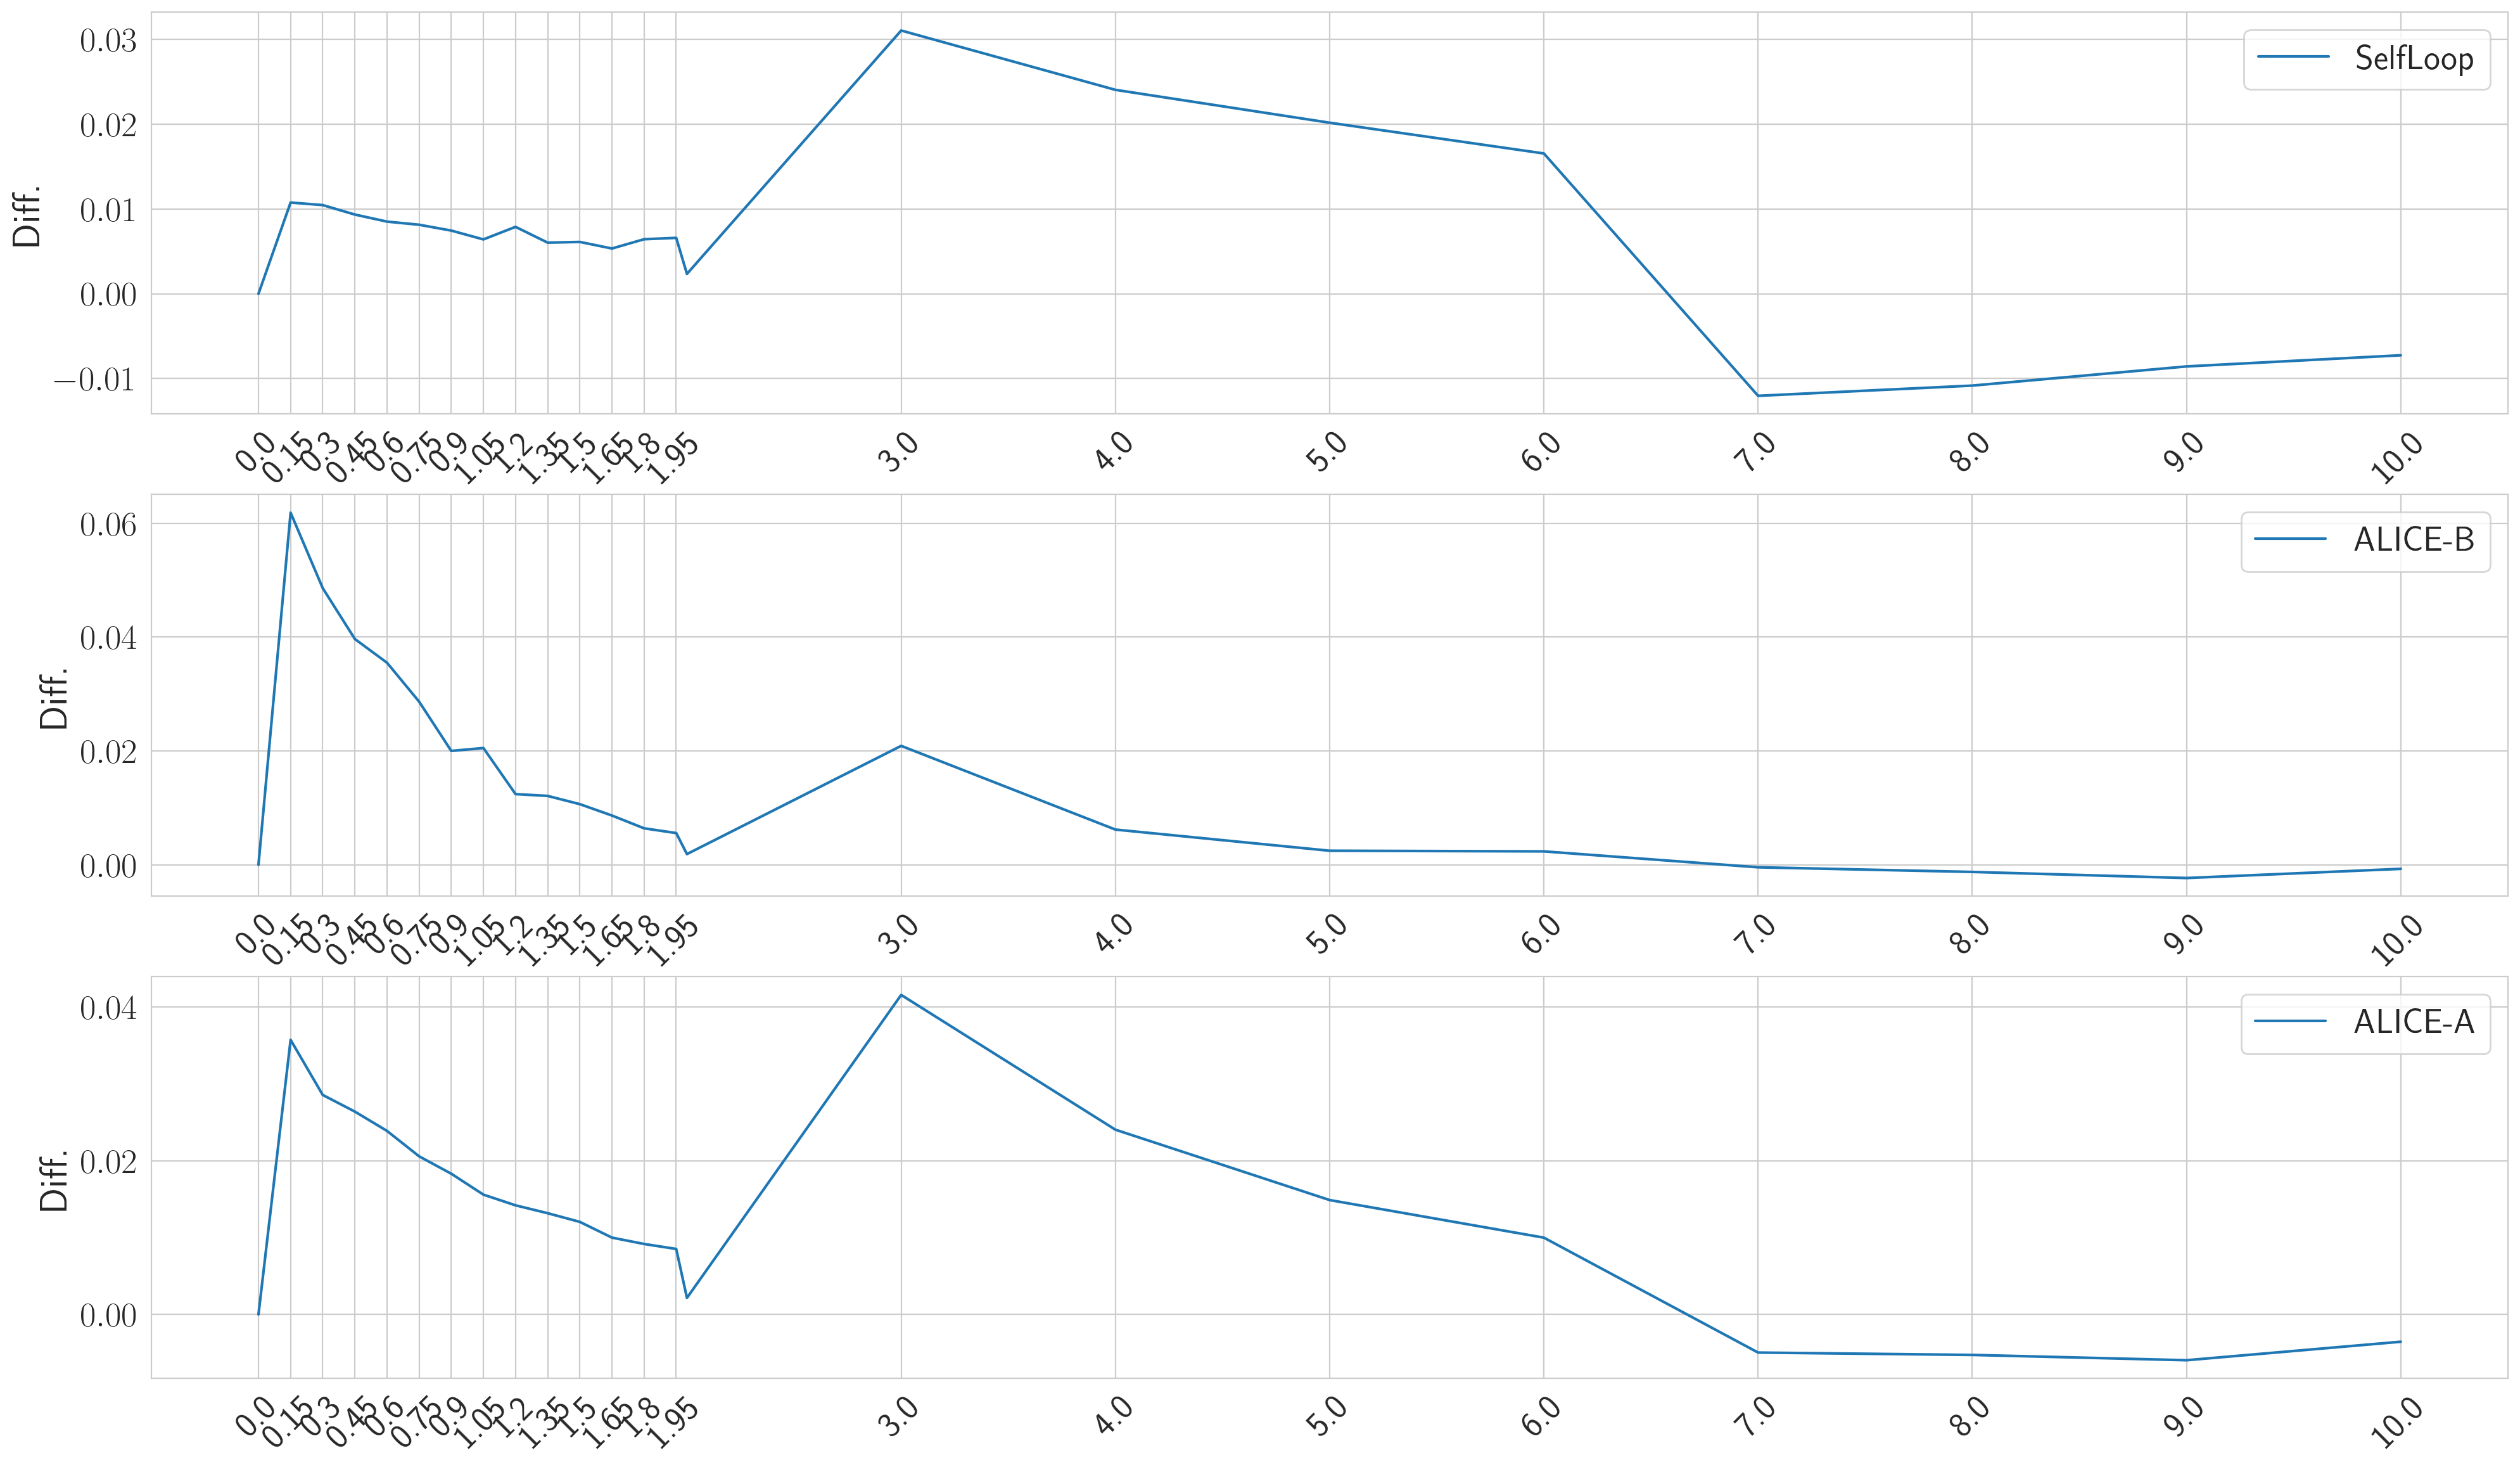

FOODMART


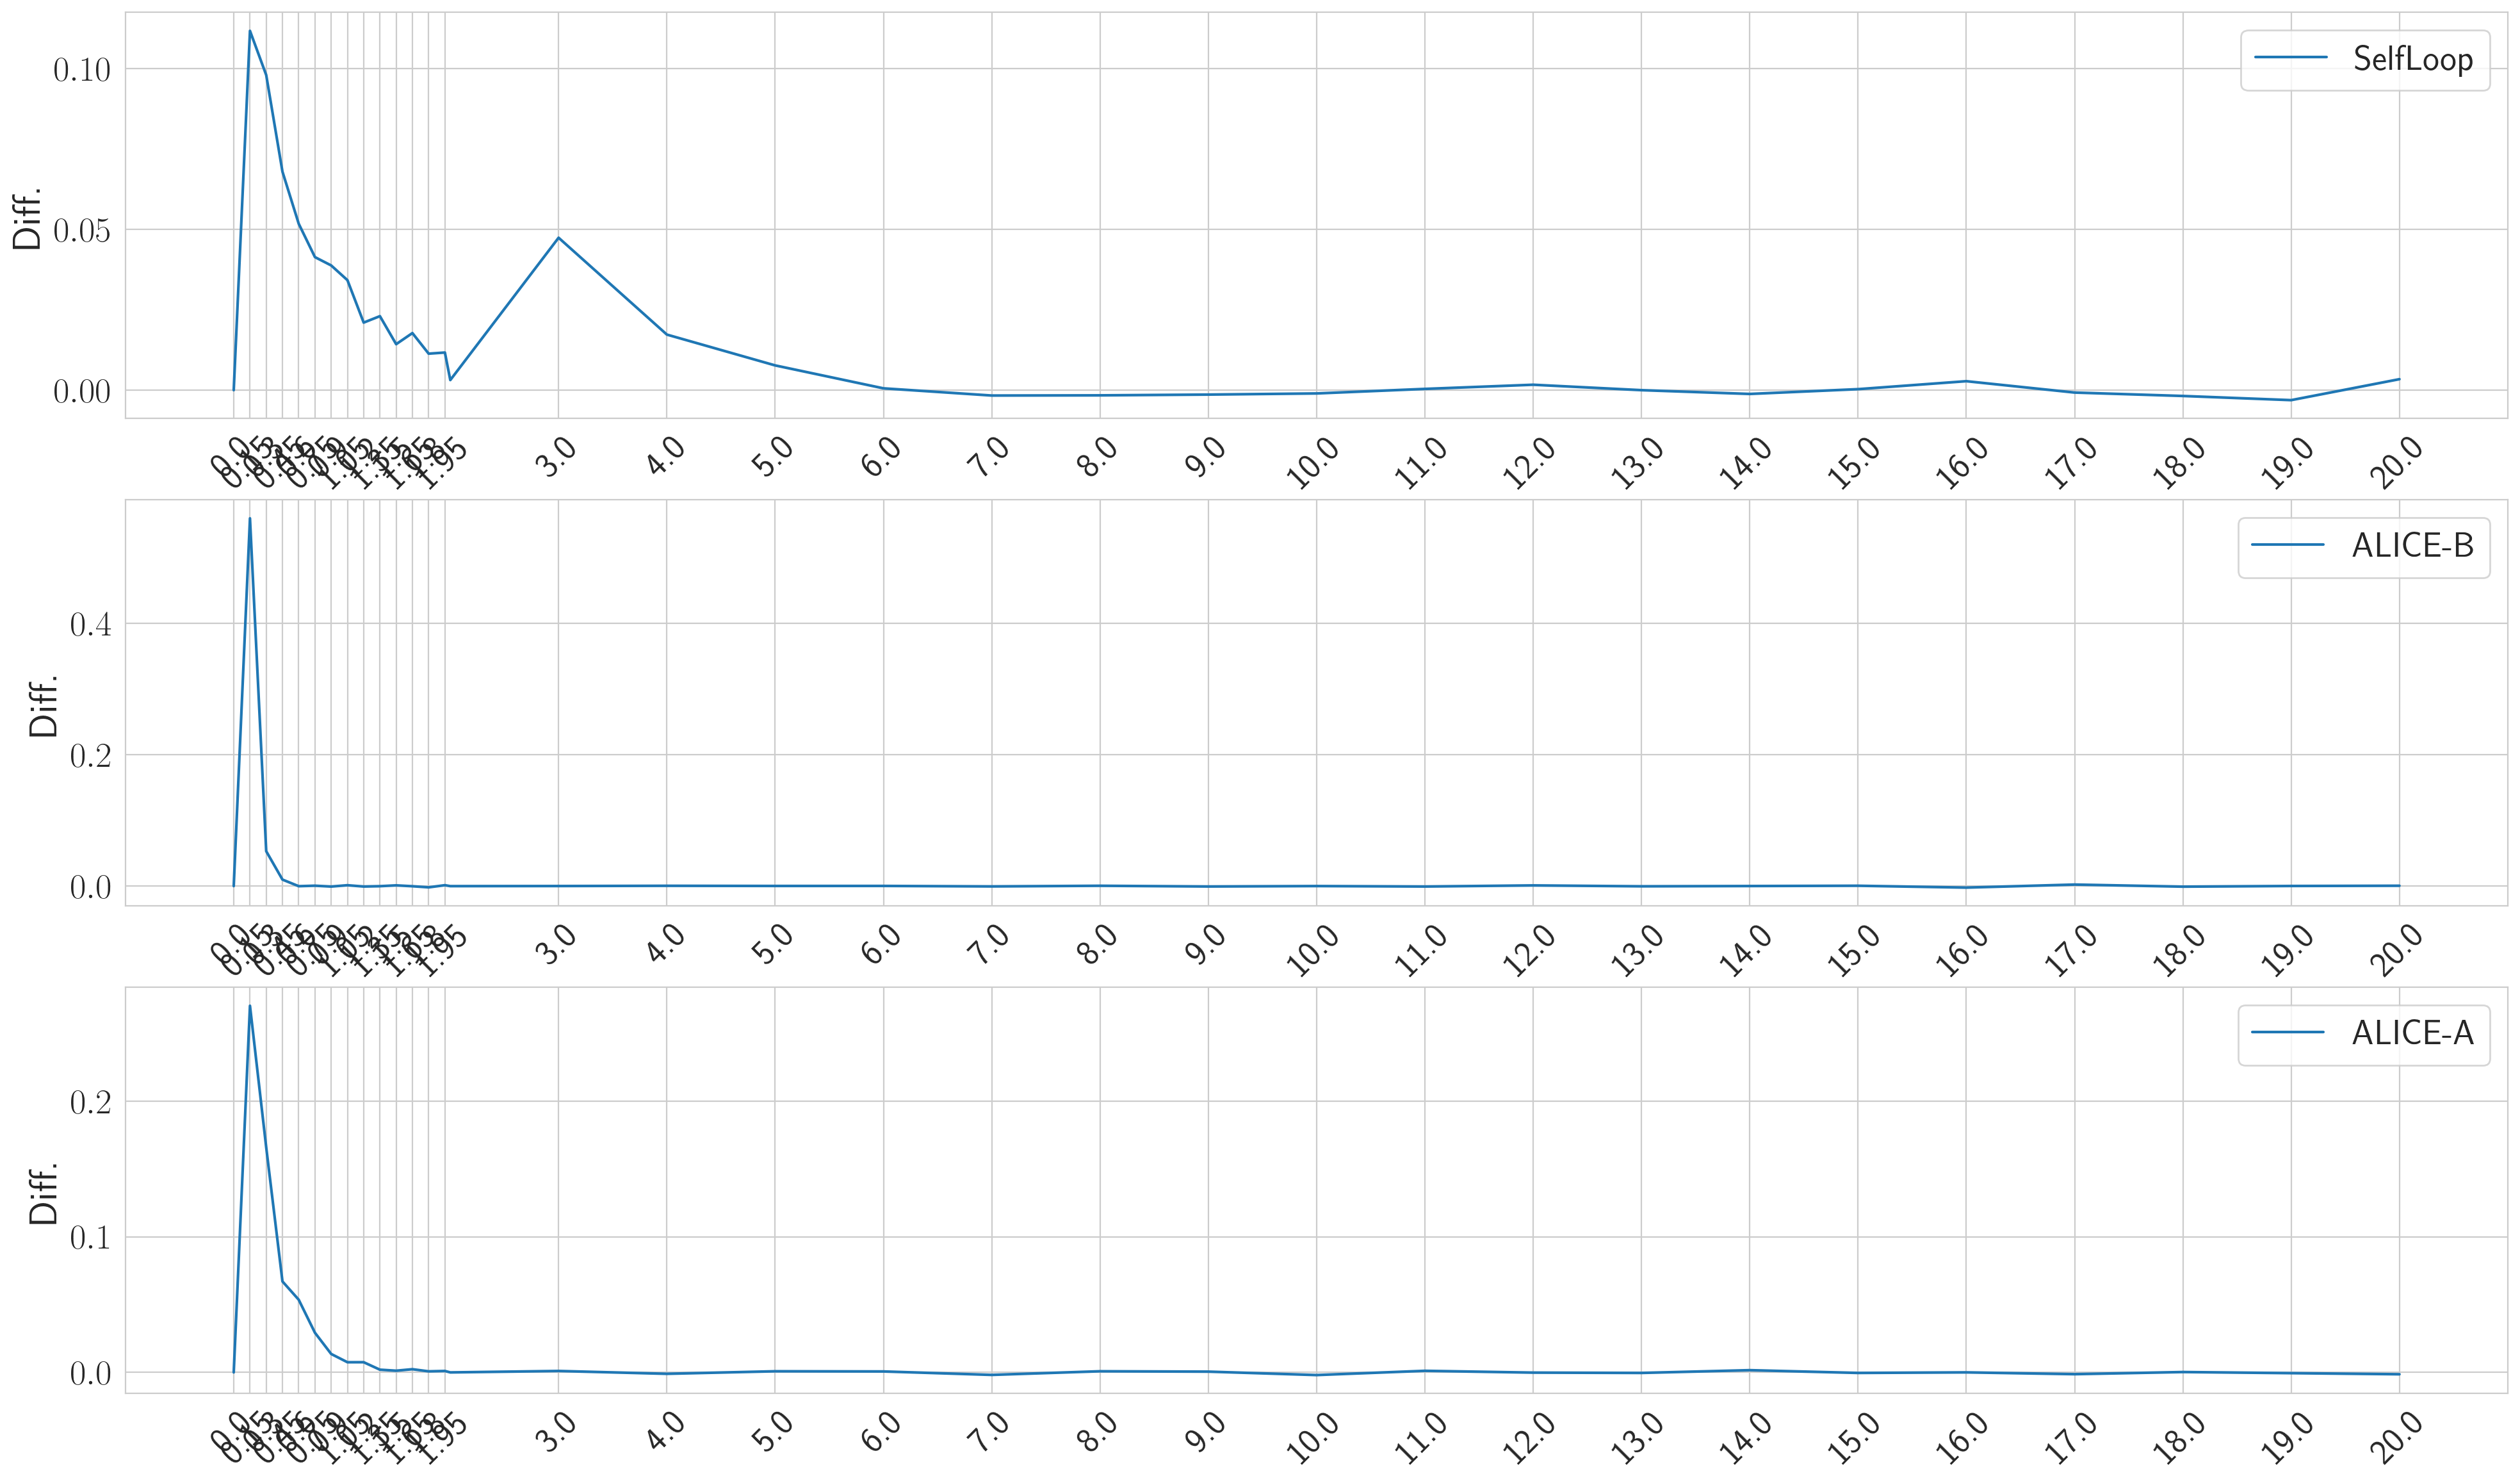

In [277]:
for db in conv_time_df['DataSet'].unique():
    print(db.upper())
    fig, ax = plt.subplots(3, 1, figsize=(24,14))
    conv_diff_df = pd.DataFrame()
    for idx, sampler in enumerate(conv_time_df['Algorithm'].unique()):
        tmp = conv_time_df[(conv_time_df['Algorithm']==sampler) &
                           (conv_time_df['DataSet']==db)].copy()
        maxARSD = tmp.loc[tmp['Num Step Multiplier']==6.0, 'Avg. Rel. Support Diff.'].values[0]
        tmp['Diff.'] = (tmp['Avg. Rel. Support Diff.'] - maxARSD).apply(abs)
        tmp['Diff.'] = (tmp['Diff.'].shift(1) - tmp['Diff.']).fillna(0)
        
        tmp2 = tmp[['Num Step Multiplier', 'Avg. Rel. Support Diff.', 'Diff.']].copy()
        tmp2.rename(columns={'Diff.':sampler,
                             'Avg. Rel. Support Diff.':f'ARSD_{sampler}'}, inplace=True)
        if conv_diff_df.empty:
            conv_diff_df = tmp2
        else:
            conv_diff_df = conv_diff_df.merge(tmp2)
        
        sns.lineplot(data=tmp, x='Num Step Multiplier', y='Diff.', ax=ax[idx], hue='Algorithm')
        ax[idx].legend()
        ticks = list(tmp['Num Step Multiplier'].values)
        ticks.remove(2.0)
        labels = [str(round(x,3)) for x in tmp['Num Step Multiplier'].values]
        labels.remove('2.0')
        ax[idx].set_xticks(ticks)
        ax[idx].set_xticklabels(labels, rotation=45, ha='center')
        ax[idx].set_xlabel('')
        ax[idx].grid(which='both', axis='x')
    plt.show()

Foodmart

In [288]:
display(conv_time_df[(conv_time_df['DataSet']=='foodmart') &
             (conv_time_df['Num Step Multiplier']==0.6) &
             (conv_time_df['Algorithm']=='ALICE-B')])

Num Step Multiplier Algorithm  Avg. Rel. Support Diff.  Mean  Min  Max  \
205                  0.6   ALICE-B                 0.622165     0    0    1   

     Total   DataSet  Sum Transaction Lengths  Time  Time (s)  
205     94  foodmart                    18319    94     0.094

In [289]:
display(conv_time_df[(conv_time_df['DataSet']=='foodmart') &
             (conv_time_df['Num Step Multiplier']==6.0) &
             (conv_time_df['Algorithm']=='SelfLoop')])

Num Step Multiplier Algorithm  Avg. Rel. Support Diff.  Mean  Min  Max  \
186                  6.0  SelfLoop                 0.618535     0    0    2   

     Total   DataSet  Sum Transaction Lengths  Time  Time (s)  
186   8089  foodmart                    18319  8089     8.089

BMS1

In [281]:
display(conv_time_df[(conv_time_df['DataSet']=='BMS1') &
             (conv_time_df['Num Step Multiplier']==4.0) &
             (conv_time_df['Algorithm']=='ALICE-B')])

Num Step Multiplier Algorithm  Avg. Rel. Support Diff.  Mean  Min  Max  \
138                  4.0   ALICE-B                 0.339608     0    0    7   

     Total DataSet  Sum Transaction Lengths   Time  Time (s)  
138  17922    BMS1                   149639  17922    17.922

In [282]:
display(conv_time_df[(conv_time_df['DataSet']=='BMS1') &
             (conv_time_df['Num Step Multiplier']==10.0) &
             (conv_time_df['Algorithm']=='SelfLoop')])

Num Step Multiplier Algorithm  Avg. Rel. Support Diff.  Mean  Min  Max  \
121                 10.0  SelfLoop                 0.232368     3    0   12   

      Total DataSet  Sum Transaction Lengths    Time  Time (s)  
121  397296    BMS1                   149639  397296   397.296

### Seq Datasets

In [228]:
result_dir = '../output/convergence'
# config
files = ['BIBLE-20.0-0.1-10', 'BIKE-20.0-0.025-10',
         'BMS1Seq-20.0-0.002-10', 'FIFA-10.0-0.275-10',
         'kosarakSeq-20.0-0.007-10', 'LEVIATHAN-40.0-0.15-10',
         'SIGN-10.0-0.4-10']
db_names = ['BIBLE', 'BIKE', 'BMS1', 'FIFA',
            'KOSARAK', 'LEVIATHAN', 'SIGN']

In [229]:
dfs = []
for idx,db in enumerate(files):
    file = f'{result_dir}/{db}.json'
    with open(file) as f:
        result = json.load(f)["convergenceStats"]
        sampler_to_arfds = dict()
        for sampler in result.keys():
            sampler_to_arfds[sampler] = [[stats["avgRelFreqDiff"], 
                                          stats["setupTime"],
                                          stats["medianStepTime"],
                                          stats["minStepTime"],
                                          stats["maxStepTime"],
                                          stats["totalTime"]] for stats in result[sampler]]
            num_swaps_factors = [stats["numSwapsFactor"] for stats in result[sampler]]
        data_dict = defaultdict(list)
        data_dict[cs.swap_num_mult_title] = num_swaps_factors * len(sampler_to_arfds.keys())
        for sampler, arfds in sampler_to_arfds.items():
            for arfd in arfds:
                data_dict[cs.algo_title].append(sampler_names.get(sampler, sampler))
                data_dict[cs.arsd_title].append(arfd[0])
                data_dict["Setup"].append(arfd[1])
                data_dict["Mean"].append(arfd[2])
                data_dict["Min"].append(arfd[3])
                data_dict["Max"].append(arfd[4])
                data_dict["Total"].append(arfd[5])
        tmp_df = pd.DataFrame(data_dict)
        tmp_df['DataSet'] = db_names[idx]
        dfs.append(tmp_df)

conv_df = pd.concat(dfs)

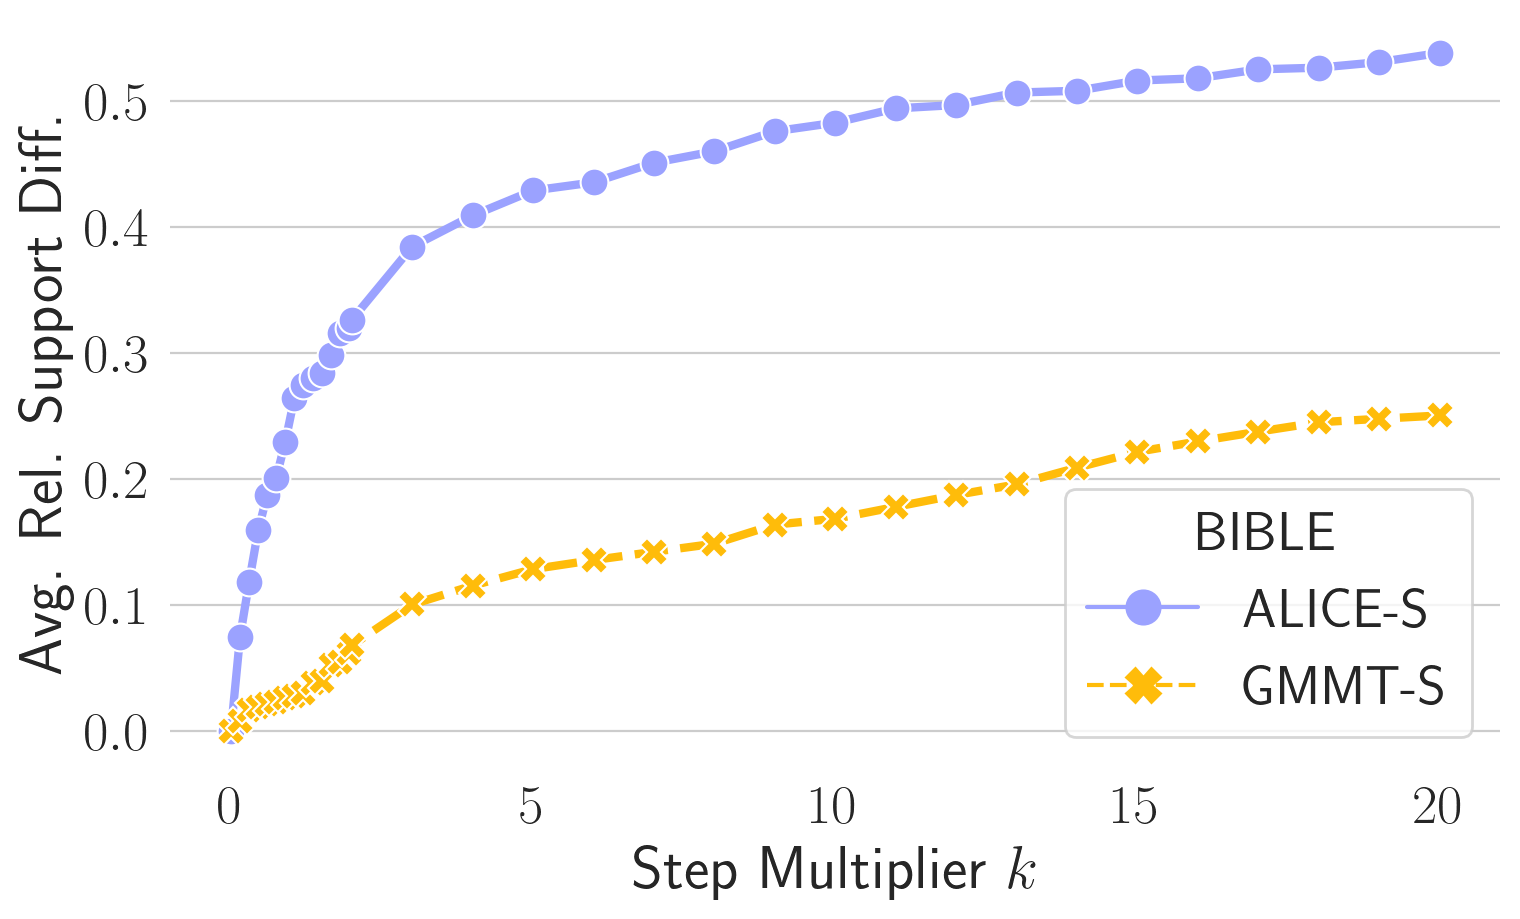

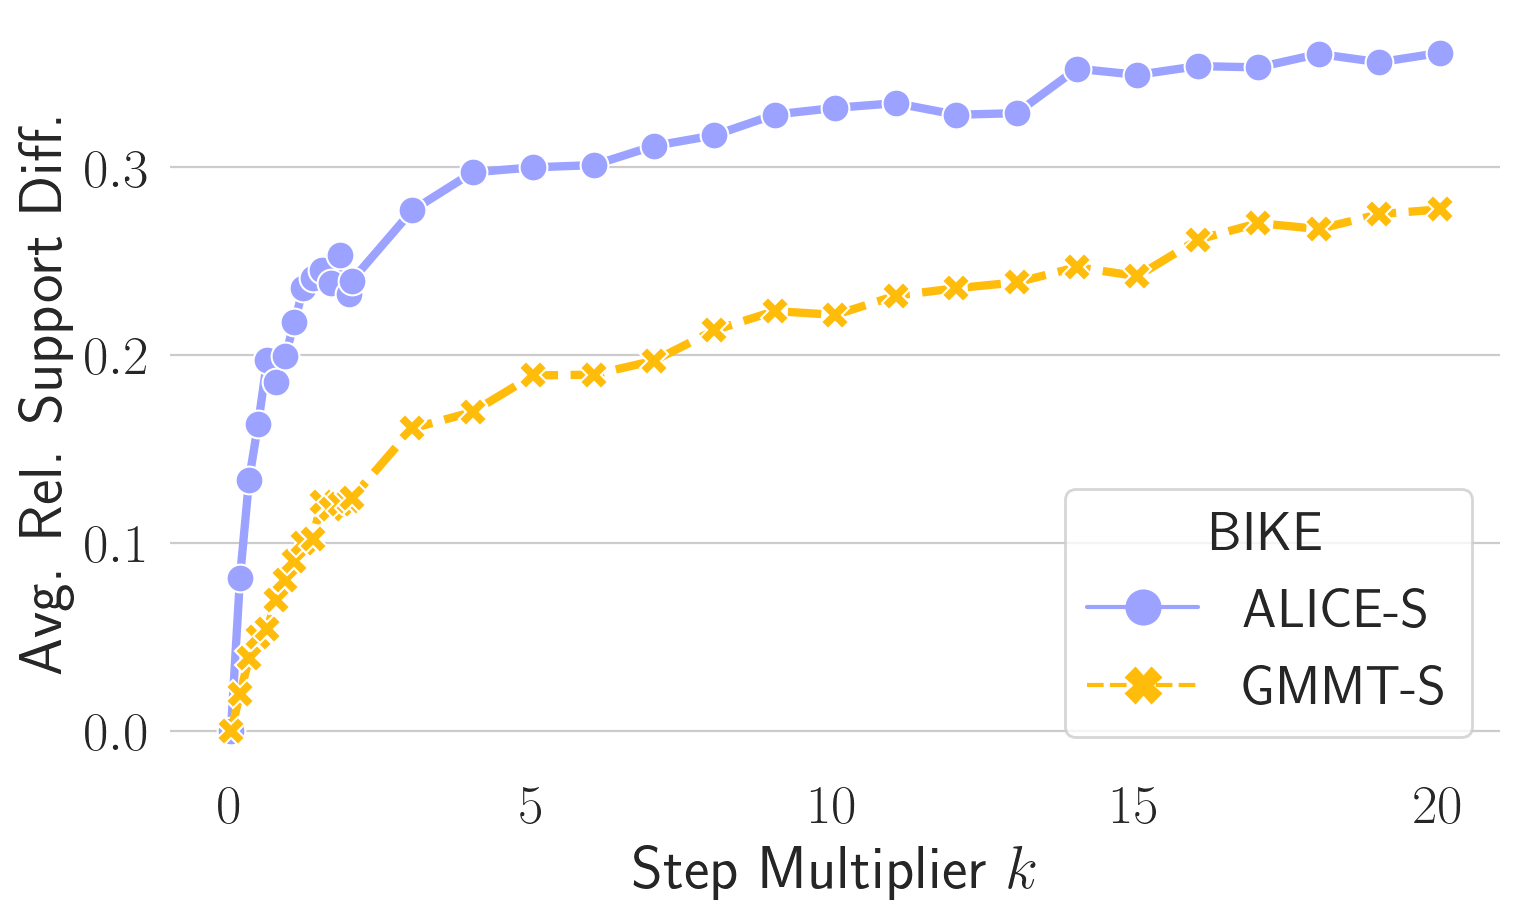

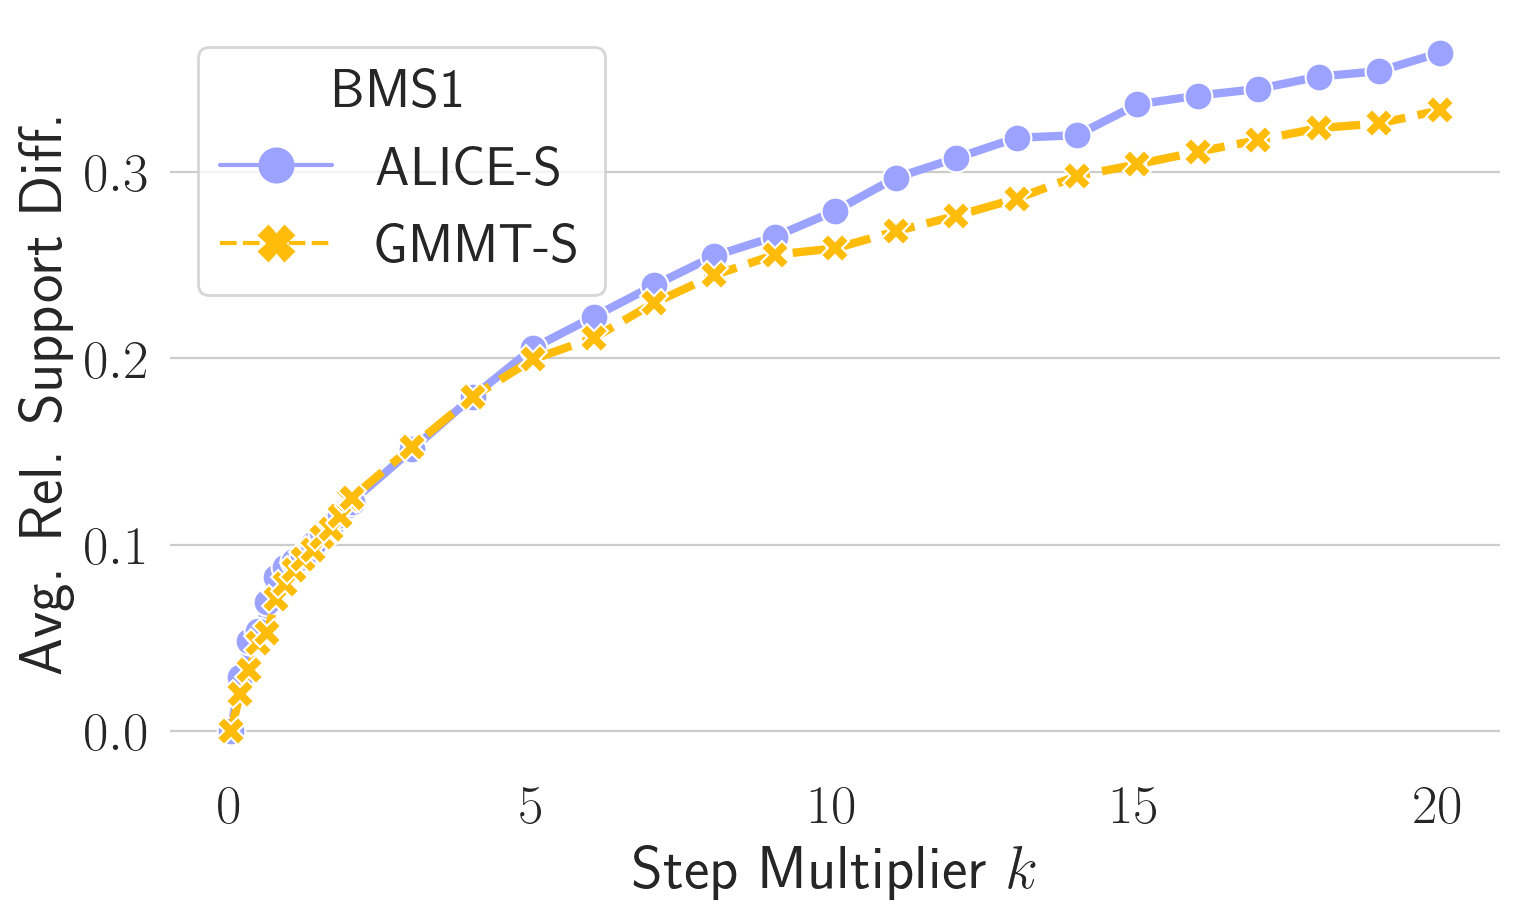

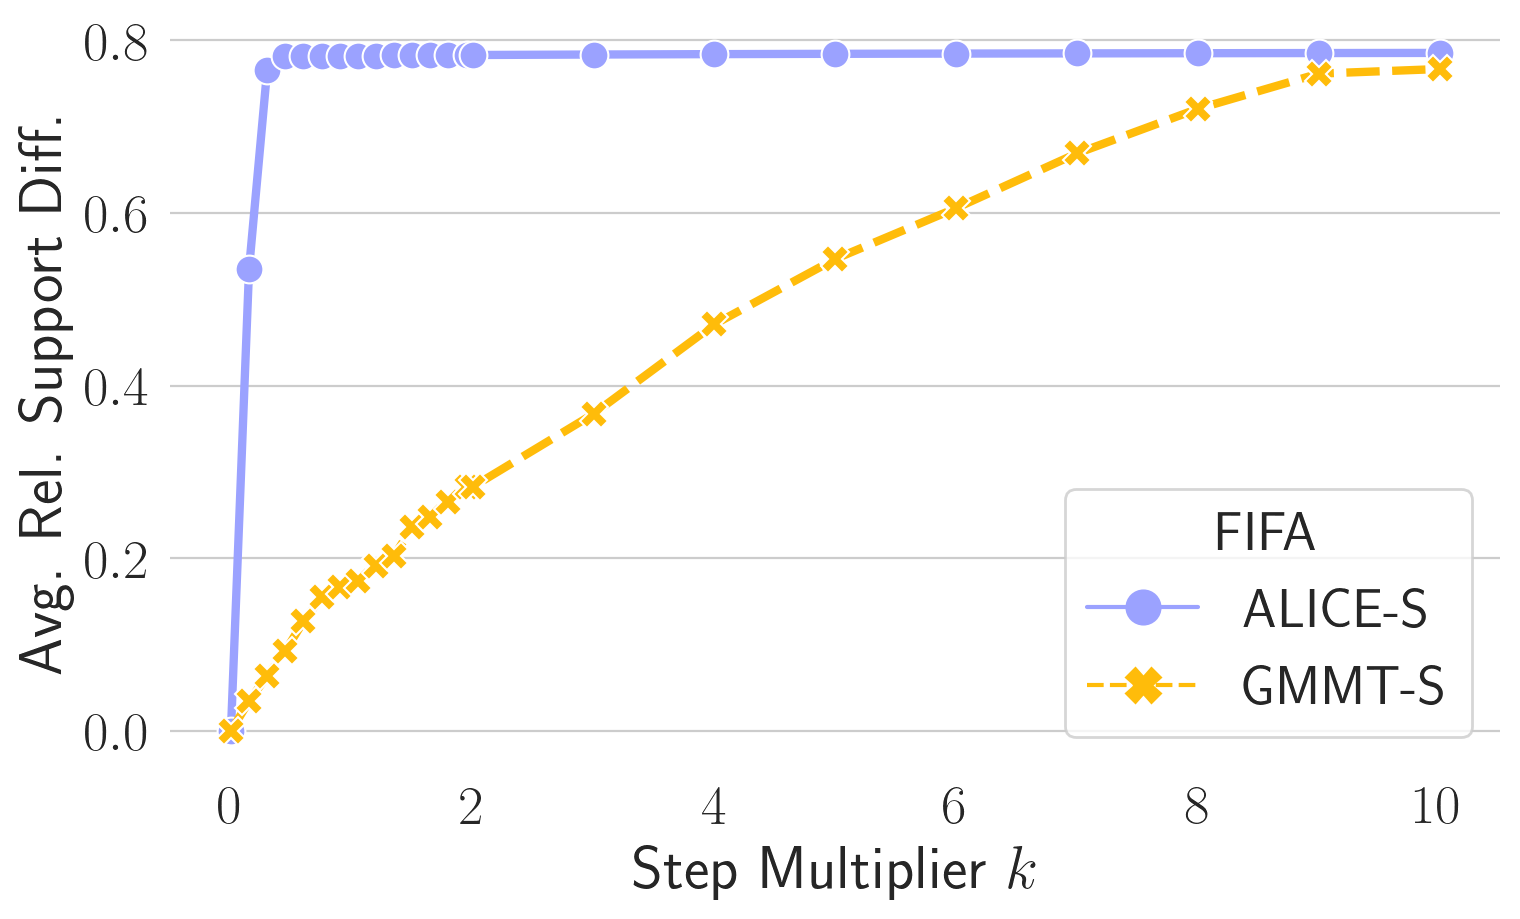

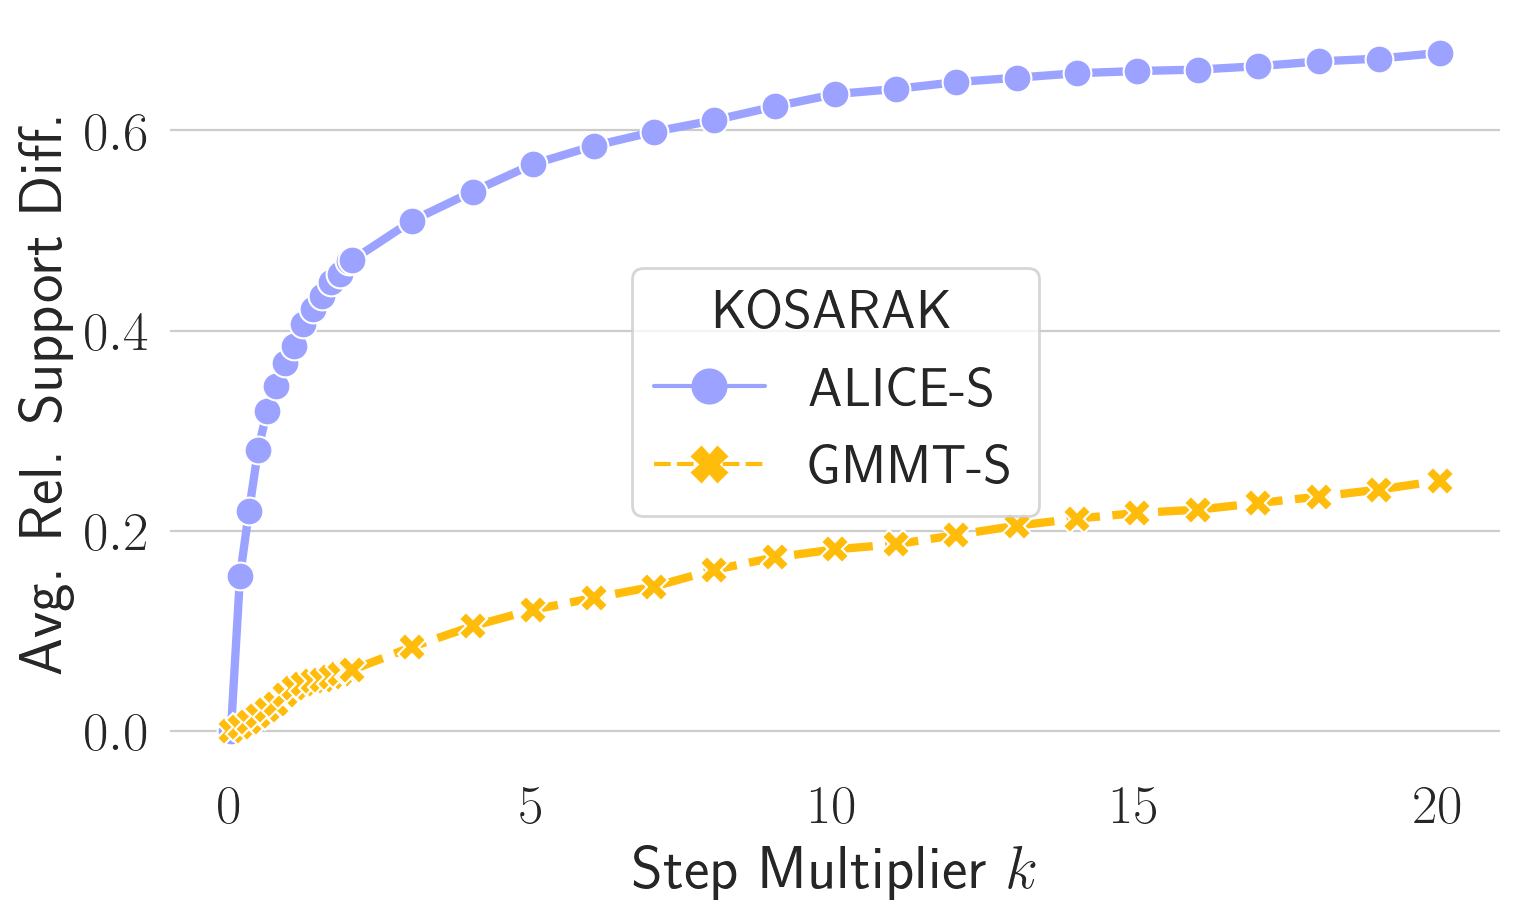

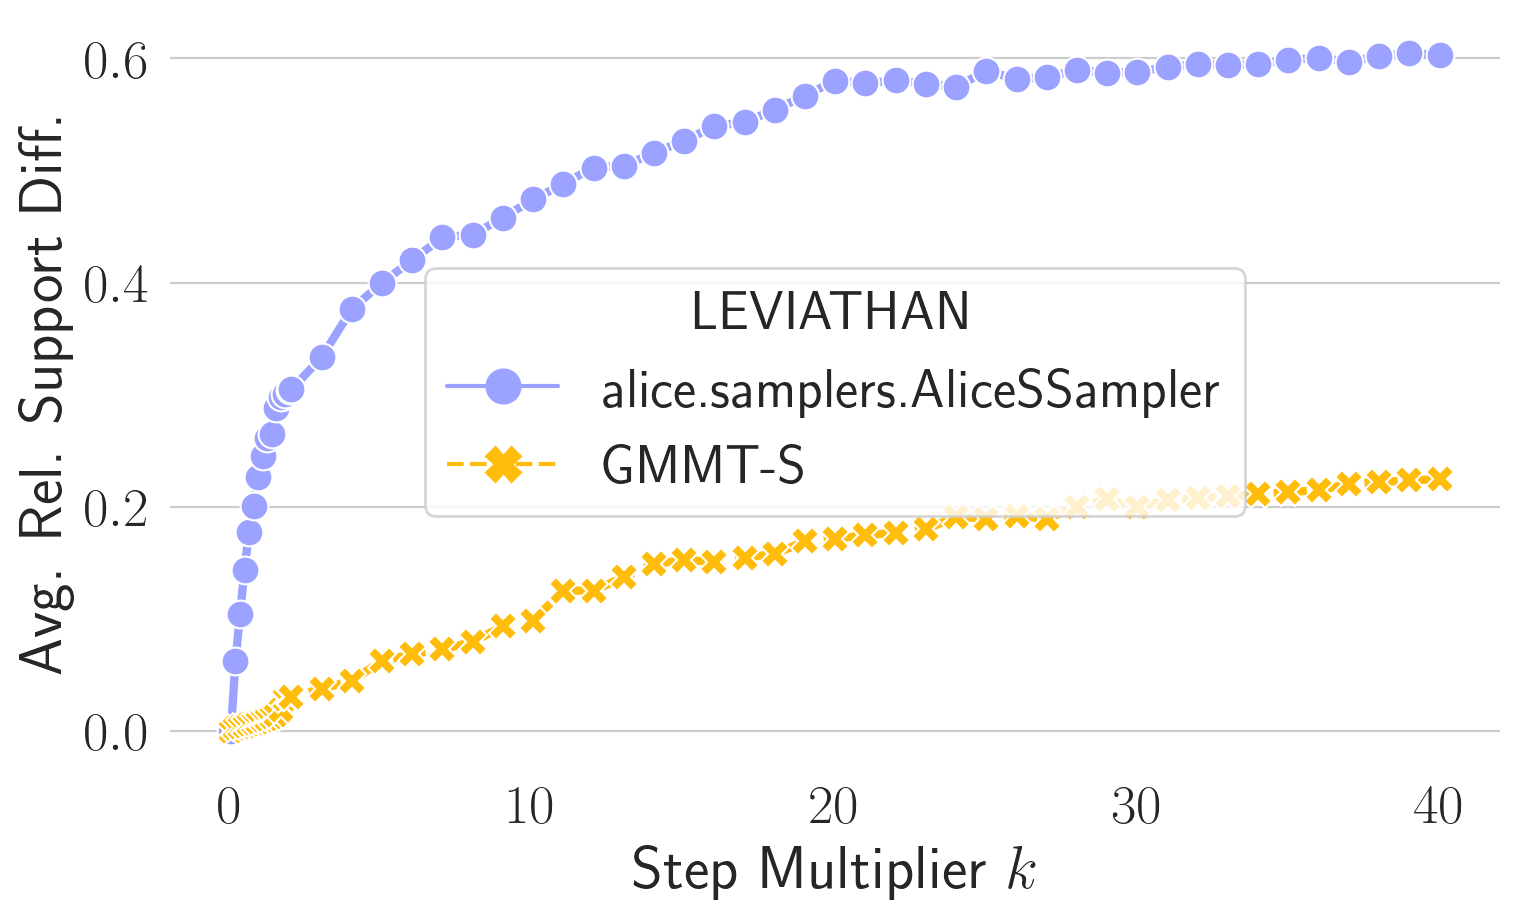

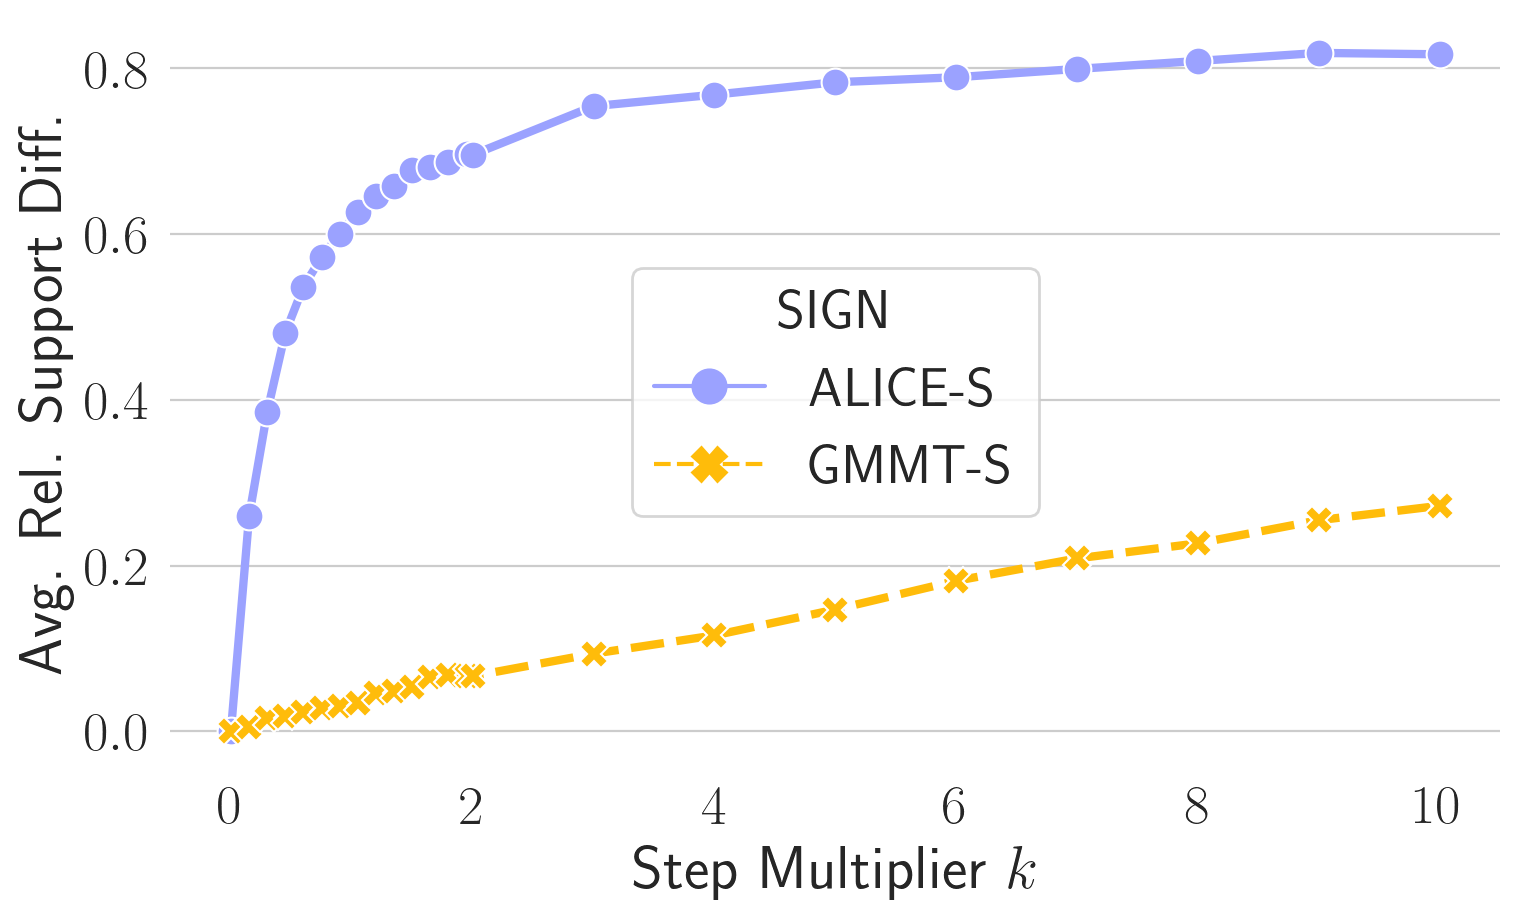

In [226]:
for dataset in conv_df['DataSet'].unique():
    data = conv_df[conv_df['DataSet']==dataset]
    num_colors = len(data['Algorithm'].unique())
    sns.set_style('whitegrid')
    if not data.empty:
        fig, ax = plt.subplots(figsize=(8,5))
        sns.lineplot(data=data, x='Num Step Multiplier', palette=palette[:num_colors], 
                     style='Algorithm', markers=True, markersize=10, ax=ax,
                     linewidth=3, y='Avg. Rel. Support Diff.', hue='Algorithm')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.set_xlabel(r'Step Multiplier $k$')
        ax.legend(title=dataset)
        plt.tight_layout()
#         plt.savefig(fig_dir+f'convergence_{dataset}.pdf')

Single plot with 4 datasets

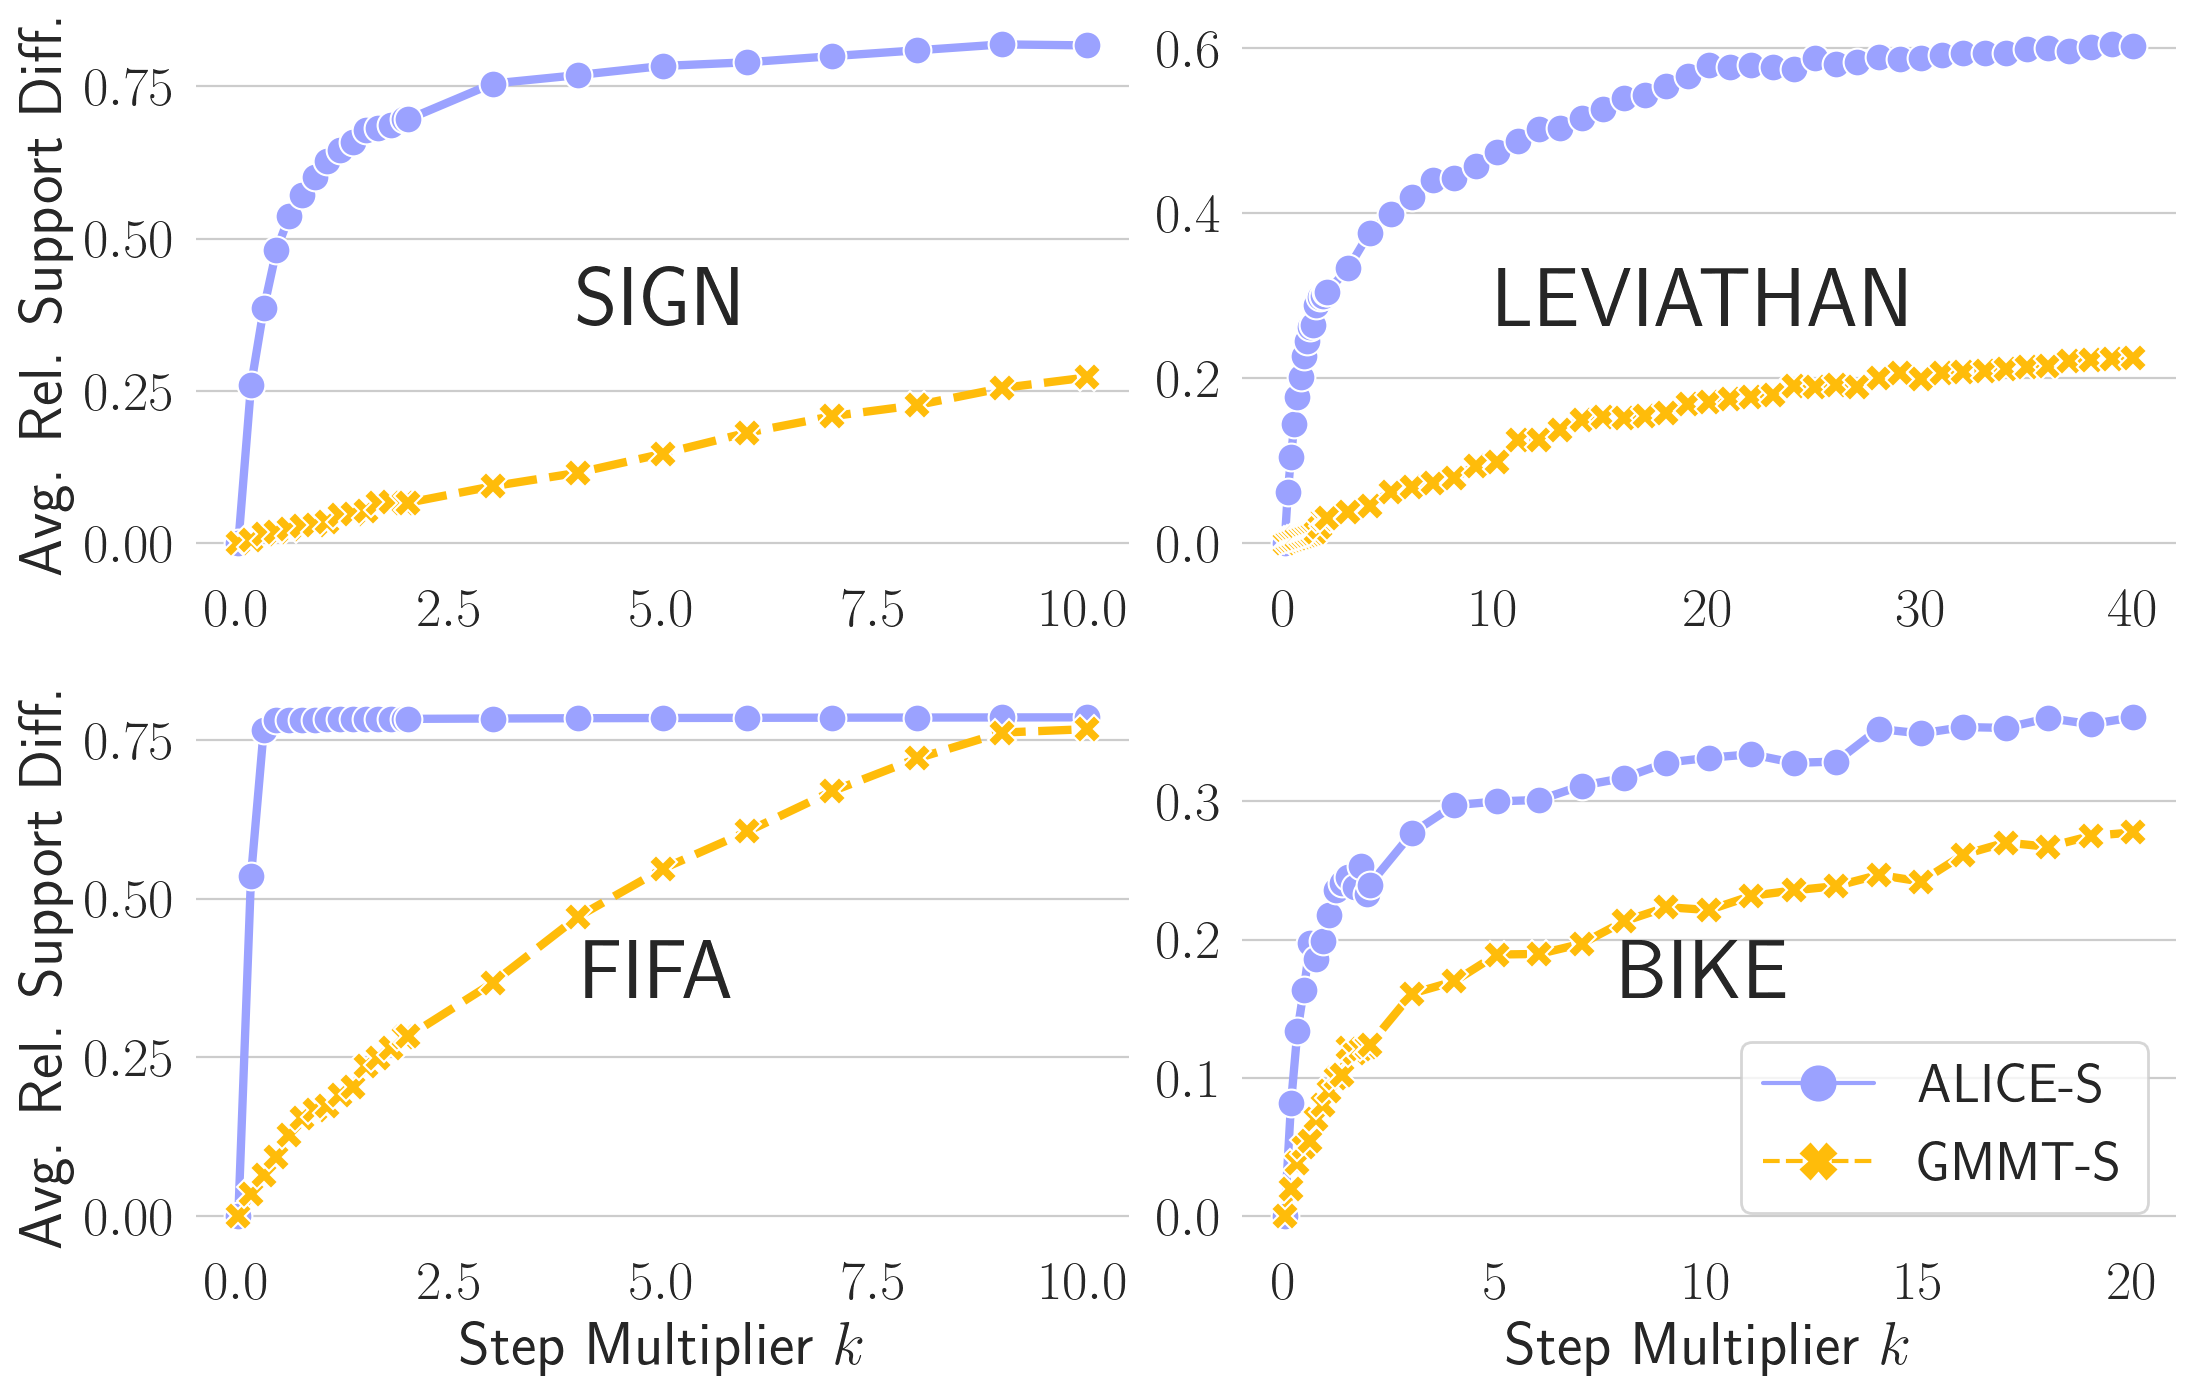

In [232]:
fig, ax = plt.subplots(2,2, figsize=(11,7))

for idx, dataset in enumerate(['SIGN', 'LEVIATHAN', 'FIFA', 'BIKE']):
    data = conv_df[conv_df['DataSet']==dataset].copy()
    num_colors = len(data['Algorithm'].unique())
    sns.set_style('whitegrid')
    idx2 = 1
    if idx < 2:
        idx2 = 0
    idx = idx % 2
    sns.lineplot(data=data, x='Num Step Multiplier', palette=palette[:num_colors], 
                 style='Algorithm', markers=True, markersize=10, ax=ax[idx2][idx],
                 linewidth=3, y='Avg. Rel. Support Diff.', hue='Algorithm',
                 hue_order=['ALICE-S', 'GMMT-S'])
    ax[idx2][idx].spines['right'].set_visible(False)
    ax[idx2][idx].spines['top'].set_visible(False)
    ax[idx2][idx].spines['left'].set_visible(False)
    ax[idx2][idx].spines['bottom'].set_visible(False)
    ax[idx2][idx].set_xlabel(r'Step Multiplier $k$')
    if idx != 0:
        ax[idx2][idx].set_ylabel('')
    if idx2 == 0:
        ax[idx2][idx].set_xlabel('')
    # legend
    leg = ax[idx2][idx].legend()
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    ax[idx2][idx].legend(fontsize=20)
    if idx != 1 or idx2 != 1:
        ax[idx2][idx].legend().remove()  
    ax[idx2][idx].set_title(dataset, fontsize=30, pad=-110)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig(fig_dir+'convergence_seq.pdf', bbox_inches='tight')

## Scalability

In [32]:
result_dir = '../output/scalability/'
# config
dbs = ['synthetic-5', 'synthetic-10', 
       'synthetic-15', 'synthetic-20',
       'synthetic-100', 'synthetic-1000']

In [34]:
dfs = []
for db in dbs:
    file_name = f'{db}-25-0.1-10000-0.json'
    if db == 'synthetic-1000':
        file_name = f'{db}-25-0.10-10000-0.json'
    file = result_dir + file_name
    tmp_df = ss.get_scalability_df(file, file_name, samplers_)
    tmp_df['DataSet'] = db
    dfs.append(tmp_df)
for db in datasets:
    file_name = f'{db}-10000-0.json'
    file = result_dir + file_name
    tmp_df = ss.get_scalability_df(file, file_name, samplers)
    tmp_df['DataSet'] = dataset_names.get(db, db)
    dfs.append(tmp_df)
    
results_df = pd.concat(dfs)

In [35]:
results_df['Algorithm'] = results_df['Algorithm'].apply(lambda x: sampler_names[x])

### Synthetic Datasets

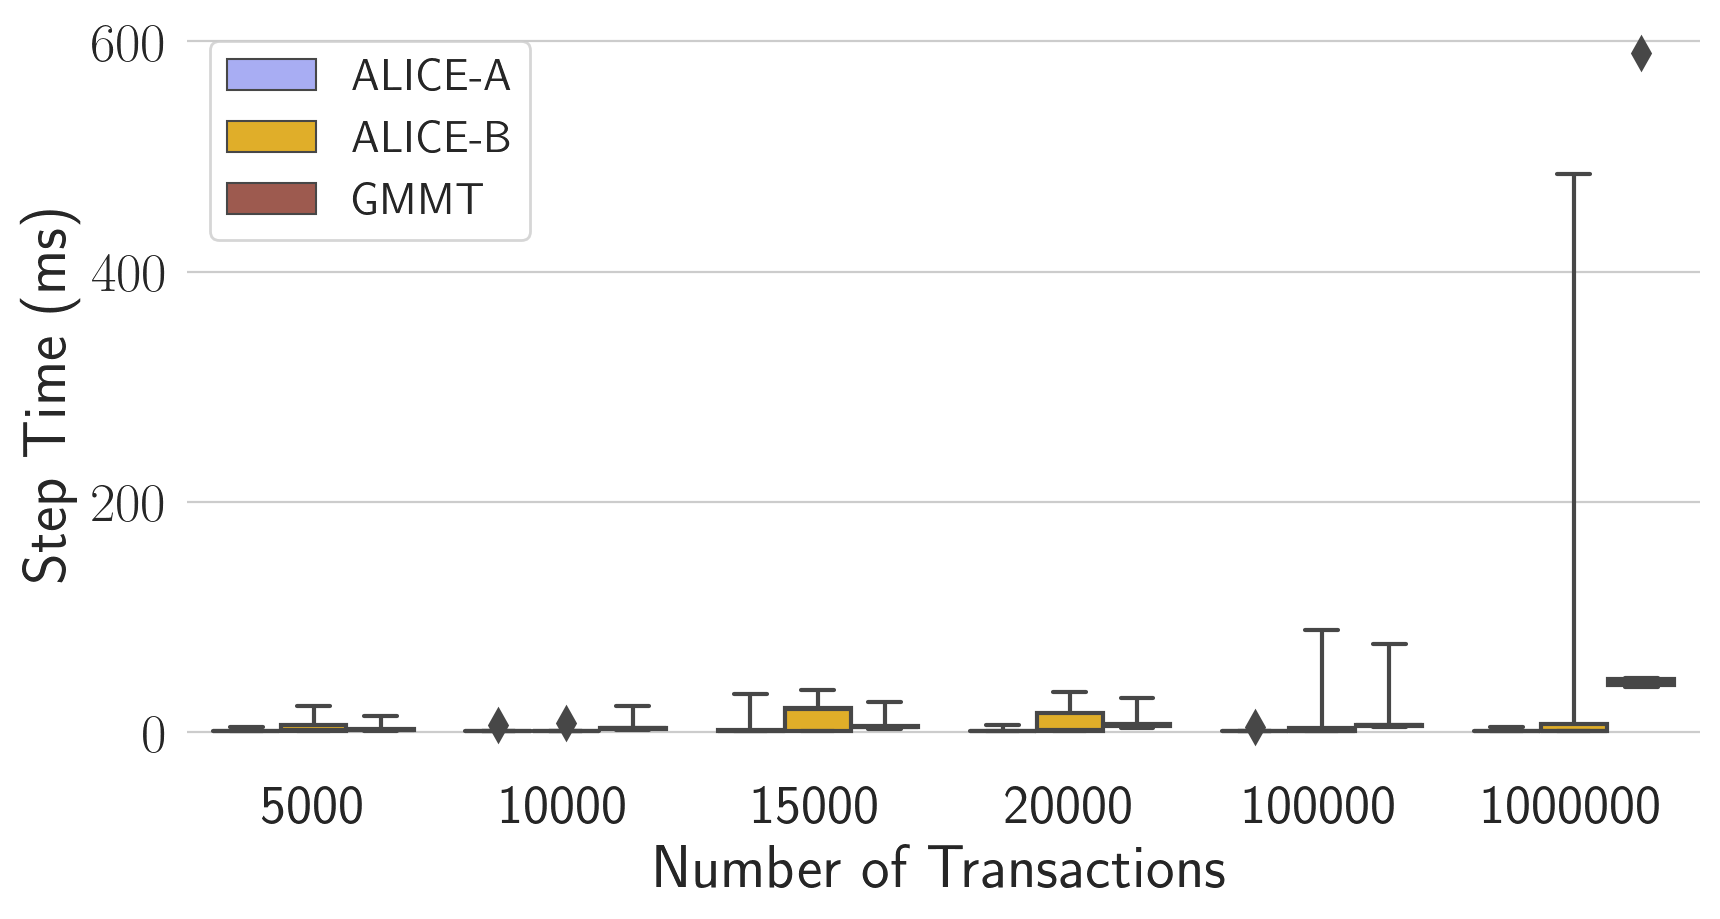

In [39]:
fig, ax = plt.subplots(figsize=(9,5))

data = results_df[results_df['DataSet'].isin(dbs)]
data2 = data.copy()
data2['Step time (ms)'] = data2['Step time (ms)'] + 1
sns.set_style('whitegrid')
sns.boxplot(data=data2, x='Number of transactions', whis=100,
            palette=palette, fliersize=8, y='Step time (ms)', 
            hue='Algorithm', hue_order=['ALICE-A', 'ALICE-B', 'GMMT'], ax=ax)
# ax.set_ylim(top=100, bottom=0)
ax.set_xlabel('Number of Transactions')
ax.set_ylabel('Step Time (ms)')
ax.set_yscale('log')
ax.legend(title='', fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.savefig(fig_dir+'scalability_aug.pdf')

<Axes: xlabel='Number of transactions', ylabel='Step time (ms)'>

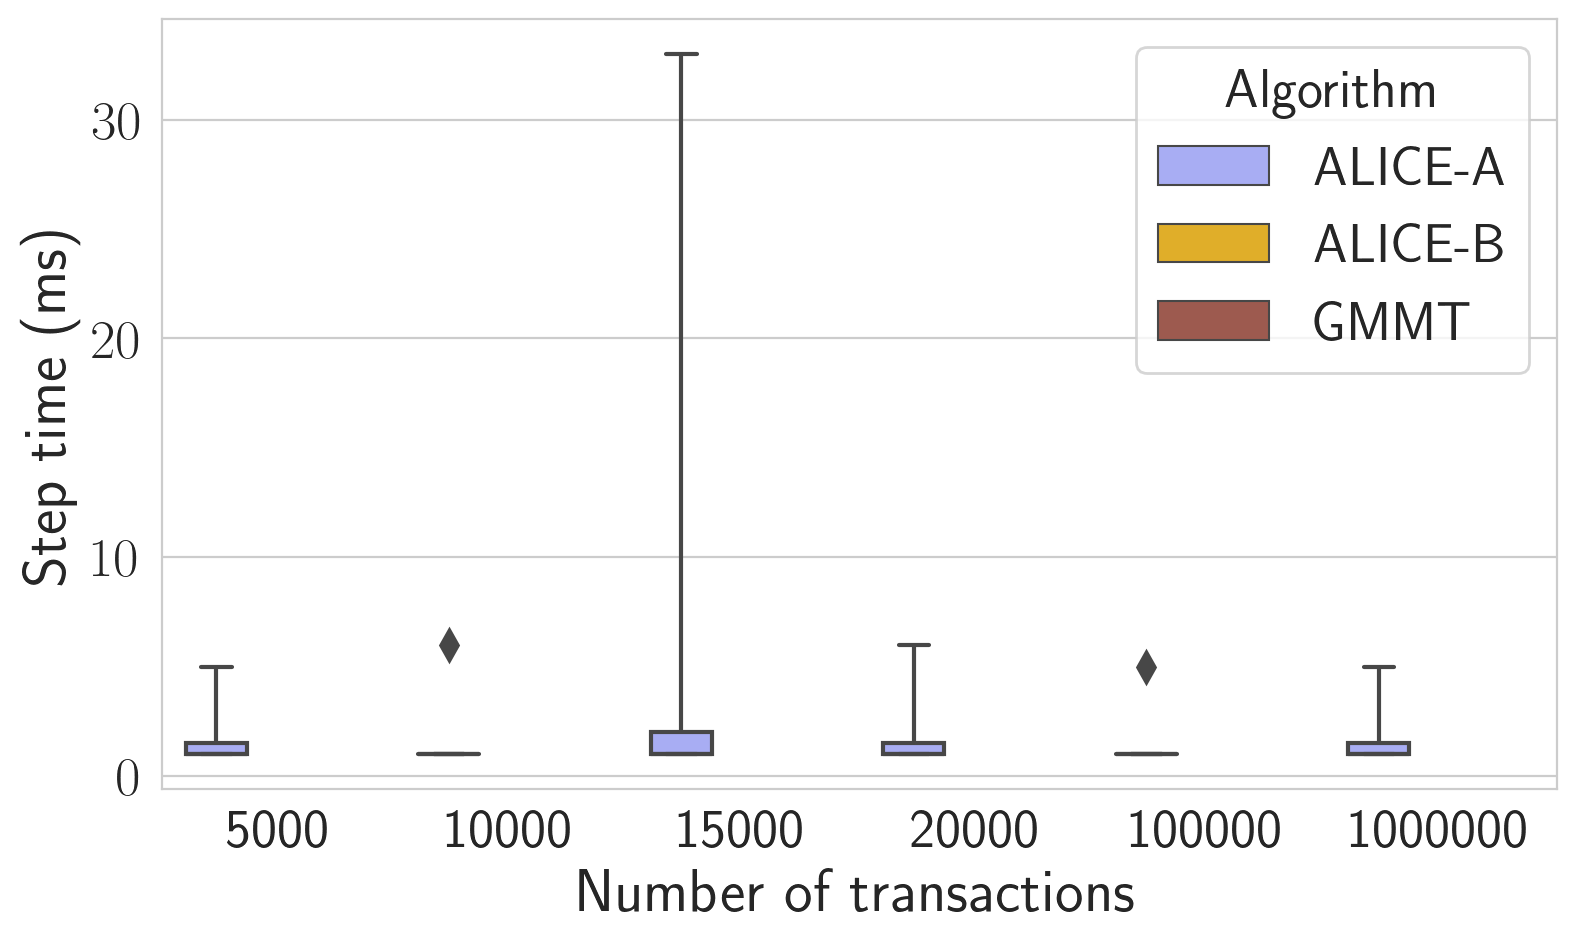

In [41]:
fig, ax = plt.subplots(figsize=(9,5))
data3 = data2[data2['Algorithm']=='ALICE-A']
sns.boxplot(data=data3, x='Number of transactions', whis=100,
            palette=palette, fliersize=8, y='Step time (ms)', 
            hue='Algorithm', hue_order=['ALICE-A', 'ALICE-B', 'GMMT'], ax=ax)

### Real Datasets

In [66]:
dfs = []
for db in datasets:
    file_name = f'{db}-10000-0.json'
    file = result_dir + file_name
    tmp_df = ss.get_step_times_df(file)
    tmp_df['DataSet'] = dataset_names.get(db, db)
    dfs.append(tmp_df)
swap_df = pd.concat(dfs)

In [67]:
swap_df.columns = ['Algorithm', 'min', 'C10', 'Q1', 'med.', 'Q3', 'C90', 'max', 'Dataset']

In [68]:
swap_df['Algorithm'] = swap_df['Algorithm'].apply(lambda x: sampler_names[x])

In [69]:
sorted_df = swap_df.sort_values(by=['Dataset', 'Algorithm'])

In [70]:
print(sorted_df[['Algorithm', 'min', 'Q1', 'med.', 'Q3', 'max', 'Dataset']].to_latex(index=False, column_format='llrrrrr',
                        caption='Step time (ms): minimum, 1st quartile, median, 3rd quartile, and maximum over 10K steps.',
                        label='tbl:steptime', position='!ht'))

\begin{table}[!ht]
\centering
\caption{Step time (ms): minimum, 1st quartile, median, 3rd quartile, and maximum over 10K steps.}
\label{tbl:steptime}
\begin{tabular}{llrrrrr}
\toprule
Algorithm &  min &  Q1 &  med. &  Q3 &  max &  Dataset \\
\midrule
  ALICE-A &    0 &   0 &     0 &   0 &    5 &     BMS1 \\
  ALICE-B &    0 &   0 &     0 &   1 &    6 &     BMS1 \\
     GMMT &   21 &  45 &    48 &  50 &  537 &     BMS1 \\
  ALICE-A &    0 &   0 &     0 &   0 &    4 &     BMS2 \\
  ALICE-B &    0 &   0 &     0 &   1 &    8 &     BMS2 \\
     GMMT &   62 &  84 &    89 &  94 &  126 &     BMS2 \\
  ALICE-A &    0 &   0 &     0 &   1 &    5 &    chess \\
  ALICE-B &    0 &   0 &     3 &   4 &   59 &    chess \\
     GMMT &    7 &  16 &    25 &  38 &  357 &    chess \\
  ALICE-A &    0 &   0 &     0 &   0 &    5 &   db-occ \\
  ALICE-B &    0 &   0 &     0 &   0 &    6 &   db-occ \\
     GMMT &    1 &   3 &     3 &   3 &   24 &   db-occ \\
  ALICE-A &    0 &   0 &     0 &   0 &    4 & foodmar

/var/folders/nb/fsgt9jgs34x6qd_dvlnbdw680000gn/T/ipykernel_56088/520340028.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sorted_df[['Algorithm', 'min', 'Q1', 'med.', 'Q3', 'max', 'Dataset']].to_latex(index=False, column_format='llrrrrr',


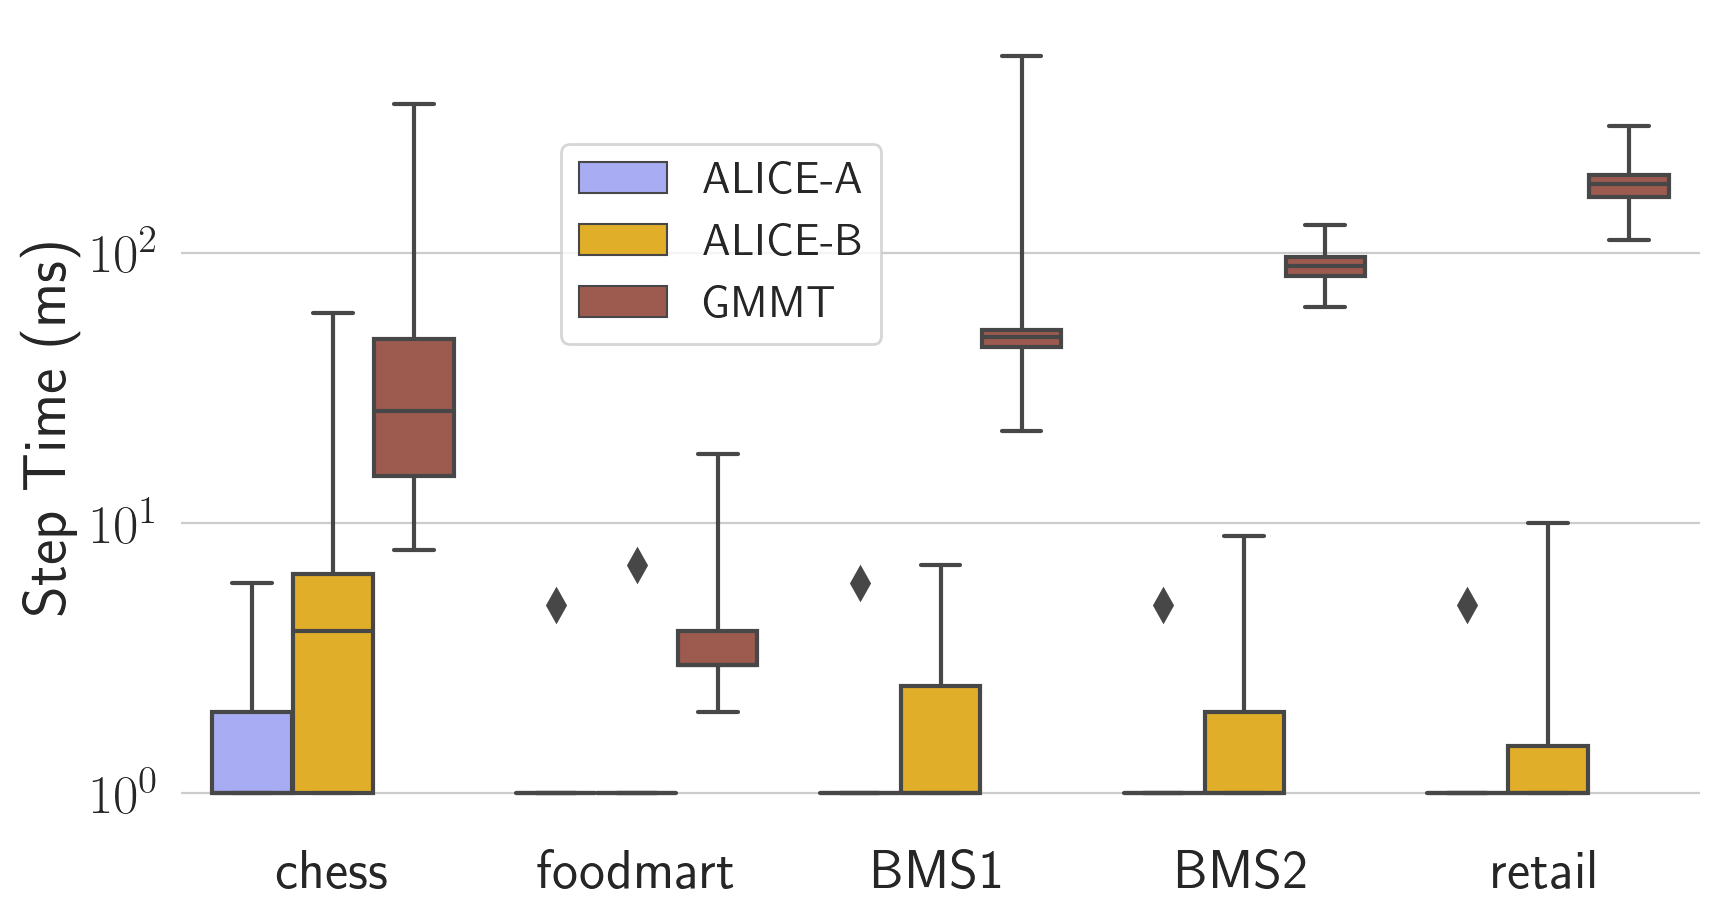

In [50]:
fig, ax = plt.subplots(figsize=(9,5))

data = results_df[results_df['DataSet'].isin(datasets)].copy()
data['Step time (ms)'] = data['Step time (ms)'] + 1
# sns.set_style('whitegrid')
sns.boxplot(data=data, x='DataSet', whis=100,
            palette=palette, fliersize=8, y='Step time (ms)', 
            hue='Algorithm', hue_order=['ALICE-A', 'ALICE-B', 'GMMT'], ax=ax)
# ax.set_ylim(top=100, bottom=0)
ax.set_xlabel('')
ax.set_ylabel('Step Time (ms)')
ax.set_yscale('log')
ax.legend(title='', fontsize=16, loc=(0.25,0.6))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.savefig(fig_dir+'scalability_real.pdf')

### Seq Datasets

In [233]:
result_dir = '../output/scalability/'
seqd = ['BIBLE-10000-10', 'BIKE-10000-10', 'BMS1Seq-10000-10', 
        'FIFA-10000-10', 'LEVIATHAN-10000-10',
        'SIGN-10000-10']
db_names = ['BIBLE', 'BIKE', 'BMS1', 'FIFA',
             'LEVIATHAN', 'SIGN']

In [234]:
dfs = []
dfs2 = []
for idx,db in enumerate(seqd):
    file_name = f'{db}.json'
    file = result_dir + file_name
    tmp_df = ss.get_step_times_df(file)
    tmp_df['DataSet'] = db_names[idx]
    dfs.append(tmp_df)
    tmp_df = ss.get_scalability_df(file, file_name)
    tmp_df['DataSet'] = db_names[idx]
    dfs2.append(tmp_df)

swap_df = pd.concat(dfs)
results_df = pd.concat(dfs2)

In [235]:
swap_df.columns = ['Algorithm', 'min', 'C10', 'Q1', 'med.', 'Q3', 'C90', 'max', 'Dataset']

In [236]:
swap_df['Algorithm'] = swap_df['Algorithm'].apply(lambda x: sampler_names[x])
results_df['Algorithm'] = results_df['Algorithm'].apply(lambda x: sampler_names[x])

In [237]:
sorted_df = swap_df.sort_values(by=['Dataset', 'Algorithm'])

In [238]:
print(sorted_df[['Algorithm', 'min', 'Q1', 'med.', 'Q3', 'max', 'Dataset']].to_latex(index=False, column_format='llrrrrr',
                        caption='Step time (ms): minimum, 1st quartile, median, 3rd quartile, and maximum over 10K steps.',
                        label='tbl:steptime', position='!ht'))

\begin{table}[!ht]
\centering
\caption{Step time (ms): minimum, 1st quartile, median, 3rd quartile, and maximum over 10K steps.}
\label{tbl:steptime}
\begin{tabular}{llrrrrr}
\toprule
Algorithm &  min &  Q1 &  med. &  Q3 &  max &   Dataset \\
\midrule
  ALICE-S &    0 &   0 &     0 &   0 &    5 &     BIBLE \\
   GMMT-S &    0 &   0 &     0 &   0 &    1 &     BIBLE \\
  ALICE-S &    0 &   0 &     0 &   0 &    5 &      BIKE \\
   GMMT-S &    0 &   0 &     0 &   0 &    1 &      BIKE \\
  ALICE-S &    0 &   0 &     0 &   0 &    5 &      BMS1 \\
   GMMT-S &    0 &   0 &     0 &   0 &    1 &      BMS1 \\
  ALICE-S &    0 &   0 &     0 &   0 &    5 &      FIFA \\
   GMMT-S &    0 &   0 &     0 &   0 &    1 &      FIFA \\
  ALICE-S &    0 &   0 &     0 &   0 &    5 & LEVIATHAN \\
   GMMT-S &    0 &   0 &     0 &   0 &    1 & LEVIATHAN \\
  ALICE-S &    0 &   0 &     0 &   0 &    5 &      SIGN \\
   GMMT-S &    0 &   0 &     0 &   0 &    1 &      SIGN \\
\bottomrule
\end{tabular}
\end{table}



/var/folders/nb/fsgt9jgs34x6qd_dvlnbdw680000gn/T/ipykernel_94405/520340028.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sorted_df[['Algorithm', 'min', 'Q1', 'med.', 'Q3', 'max', 'Dataset']].to_latex(index=False, column_format='llrrrrr',


/var/folders/nb/fsgt9jgs34x6qd_dvlnbdw680000gn/T/ipykernel_94405/3786263381.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.stripplot(data=results_df, x='DataSet',


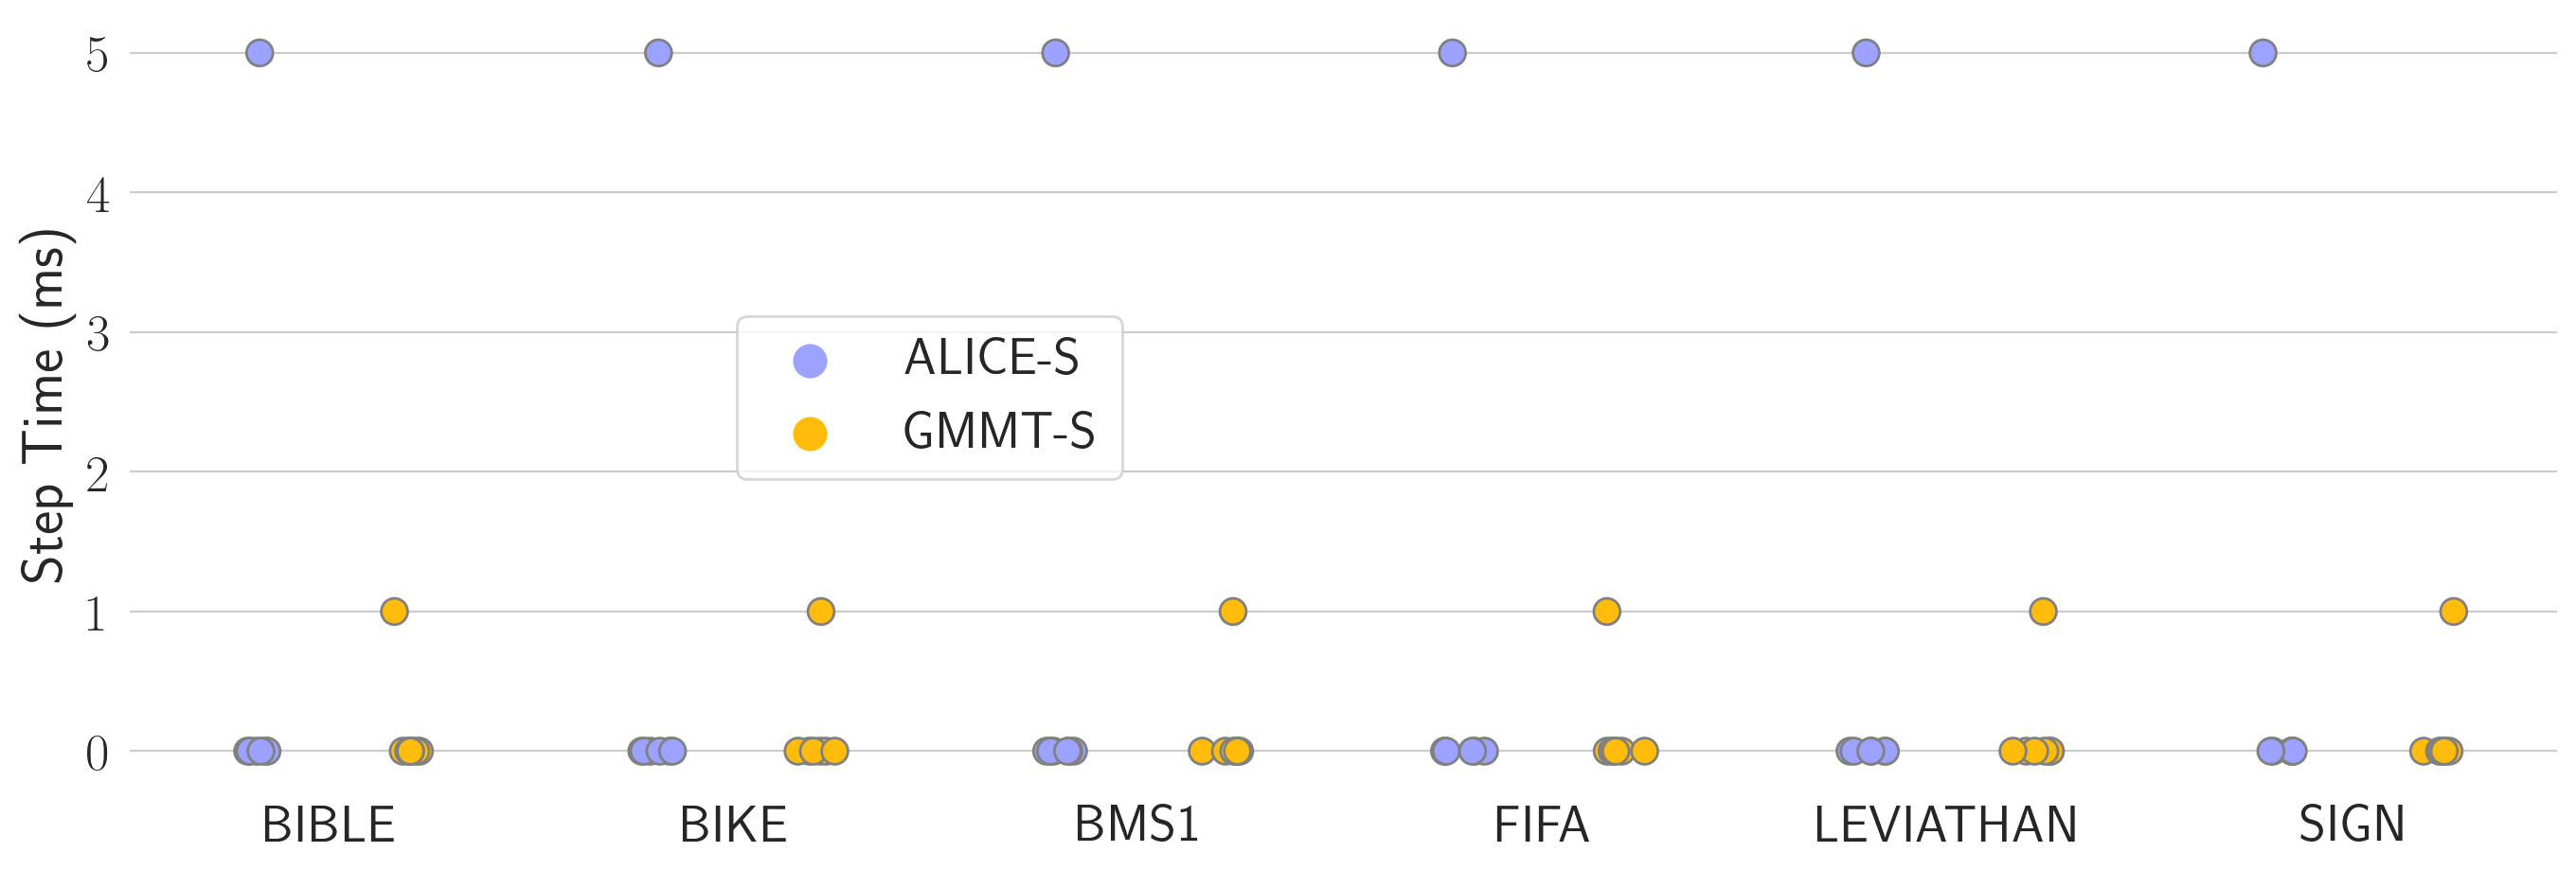

In [239]:
fig, ax = plt.subplots(figsize=(14,5))

sns.set_style('whitegrid')
sns.stripplot(data=results_df, x='DataSet', 
            palette=palette, y='Step time (ms)', dodge=True,
            jitter=True, size=10, edgecolor='grey', linewidth=1,
            hue='Algorithm', hue_order=['ALICE-S', 'GMMT-S'], ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Step Time (ms)')
ax.legend(title='', fontsize=20, loc=(0.25,0.4))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.savefig(fig_dir+'scalability_seq.pdf')

## Num Frequent Itemsets

In [51]:
result_dir = '../output/numFreqItemsets'

In [80]:
db_config = {'edit-iewikibooks':f'1953-4352-{thresh["edit-iewikibooks"]}',
            'kosarak_3000':f'23664-4352-{thresh["kosarak_3000"]}',
            'chess':f'118252-2176-{thresh["chess"]}',
            'foodmart':f'27478-4352-{thresh["foodmart"]}',
            'dbpedia-occupation':f'47316-4352-{thresh["dbpedia-occupation"]}',
            'BMS1':f'299278-2176-{thresh["BMS1"]}',
            'BMS2':f'716556-2048-{thresh["BMS2"]}',
            'retail':f'193568-4352-0.002'}

In [81]:
dfs = []
for db,conf in db_config.items():
    dbname = dataset_names.get(db, db)
    try:
        filepath = f'{result_dir}/{db}-{conf}-32-0.json'
        df = ns.get_num_freq_itemsets_stats(filepath, dbname)
        df['DataSet'] = dbname
        dfs.append(df)
    except Exception as e:
        print(e)
        pass
numfreq_df = pd.concat(dfs)

In [82]:
numfreq_df['Algorithm'] = numfreq_df['Algorithm'].apply(lambda x: sampler_names.get(x, x))

In [83]:
numfreq_df = numfreq_df.astype(dtype={'Size':np.int32})

p-values

In [84]:
pvalues = defaultdict(list)
for db in numfreq_df['DataSet'].unique():
    data = numfreq_df[(numfreq_df['Size']==1) & 
                      (numfreq_df['DataSet']==db) &
                      (numfreq_df['Algorithm'].isin(sampler_names.values()))]
    pvalues[db] = data[['Algorithm', 'pvalue']].to_dict('records')

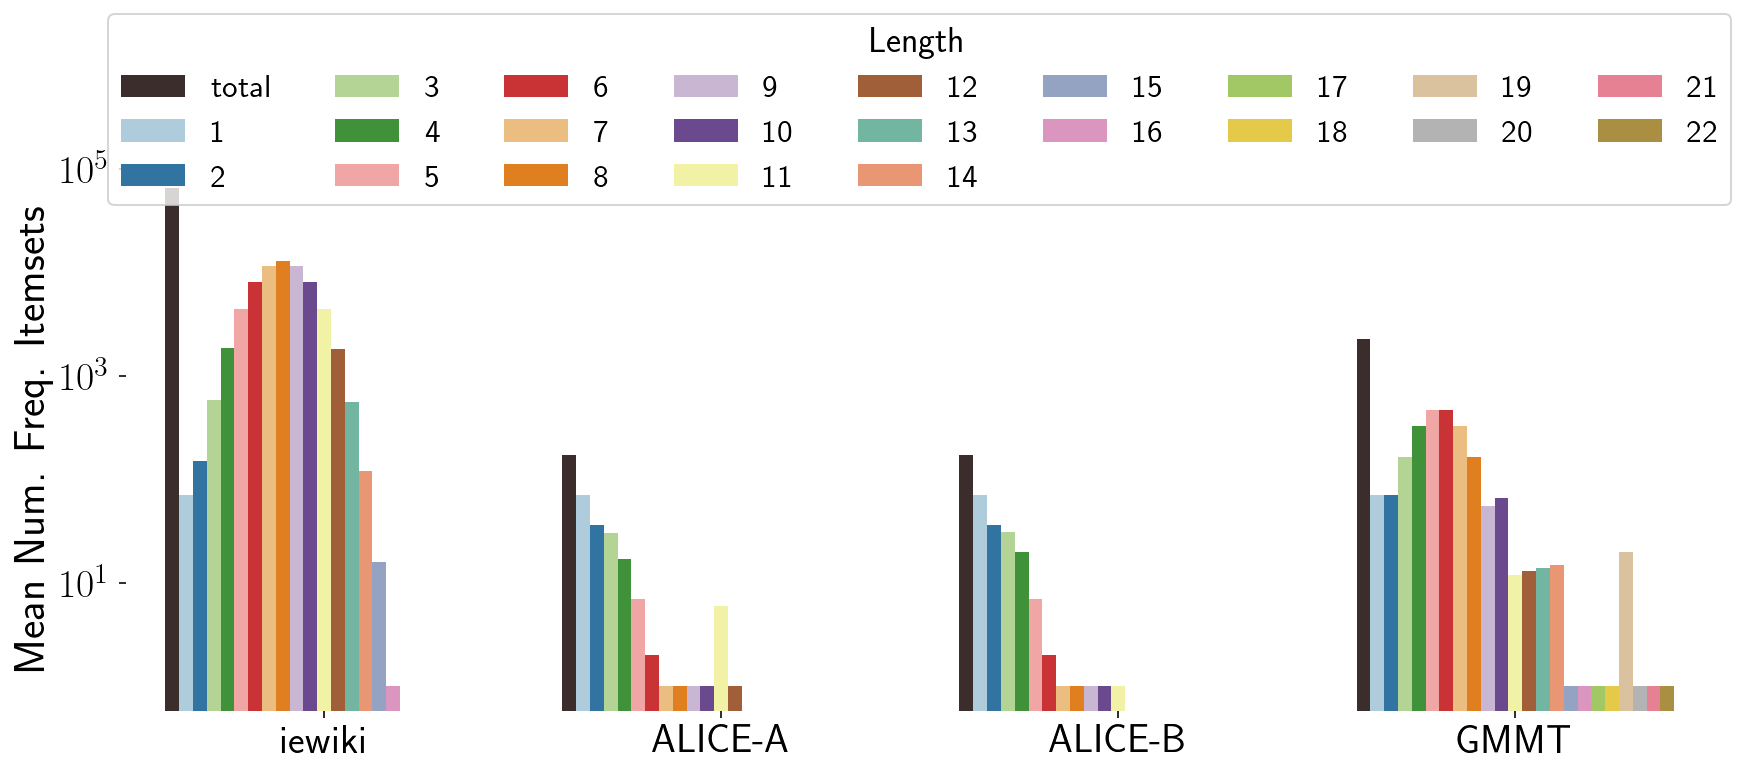

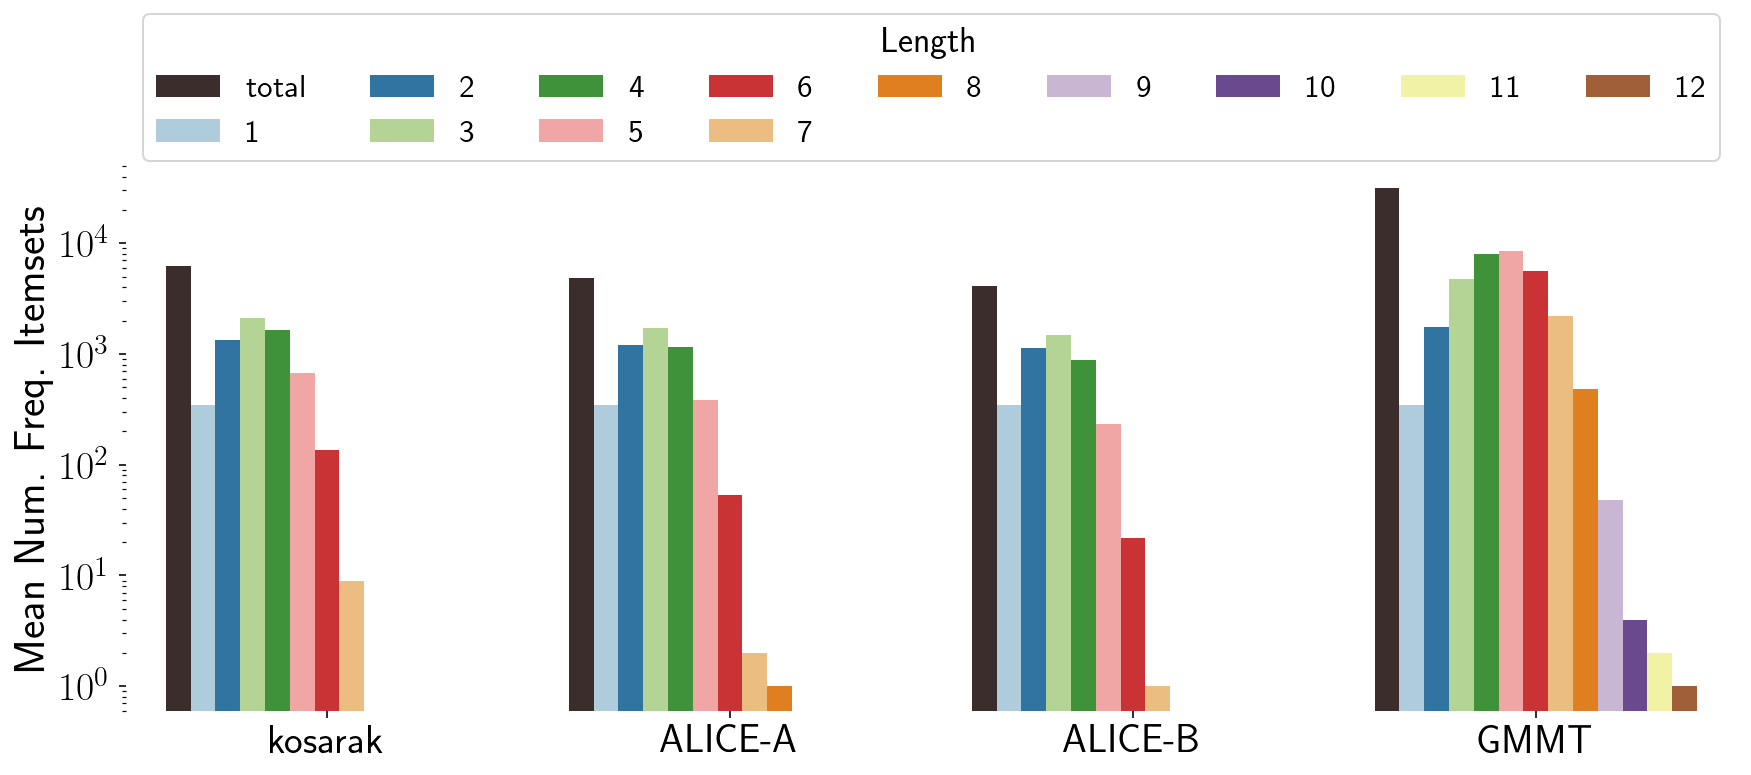

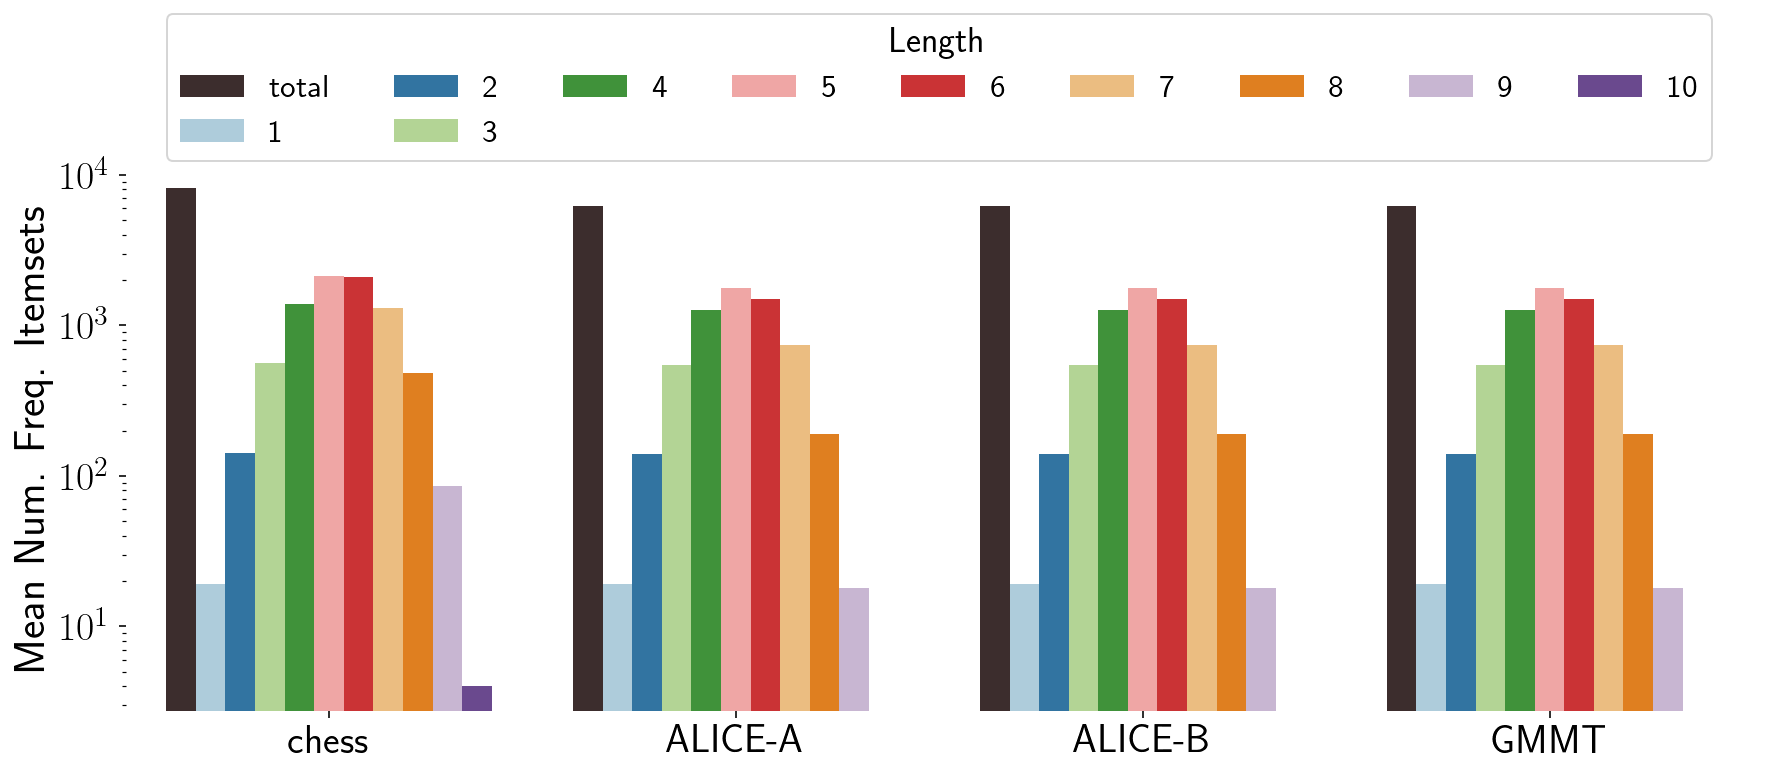

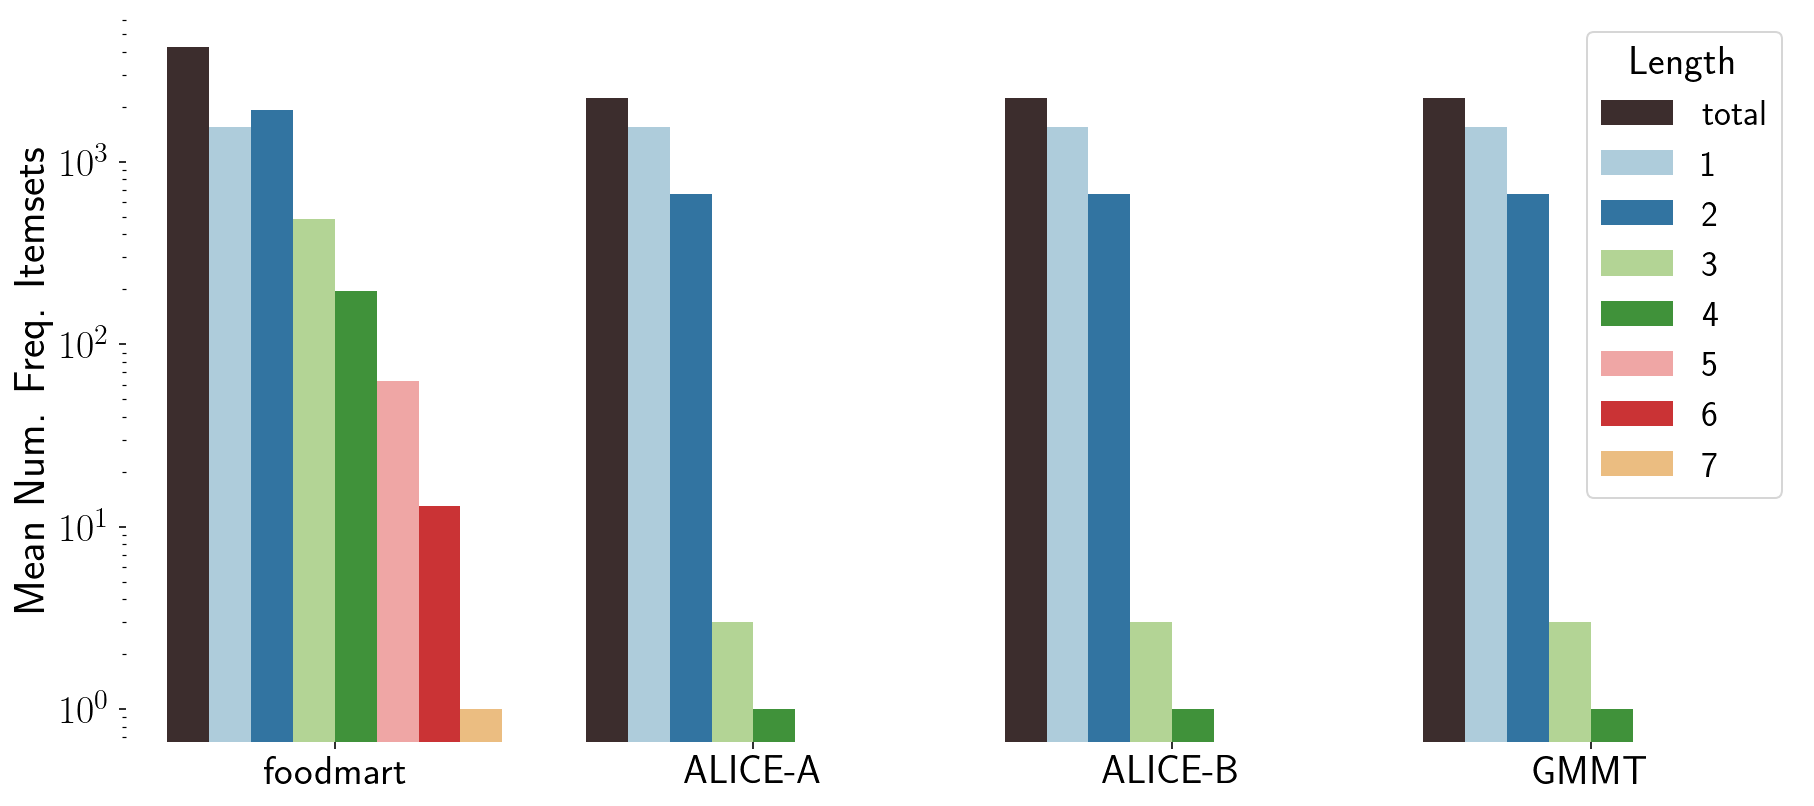

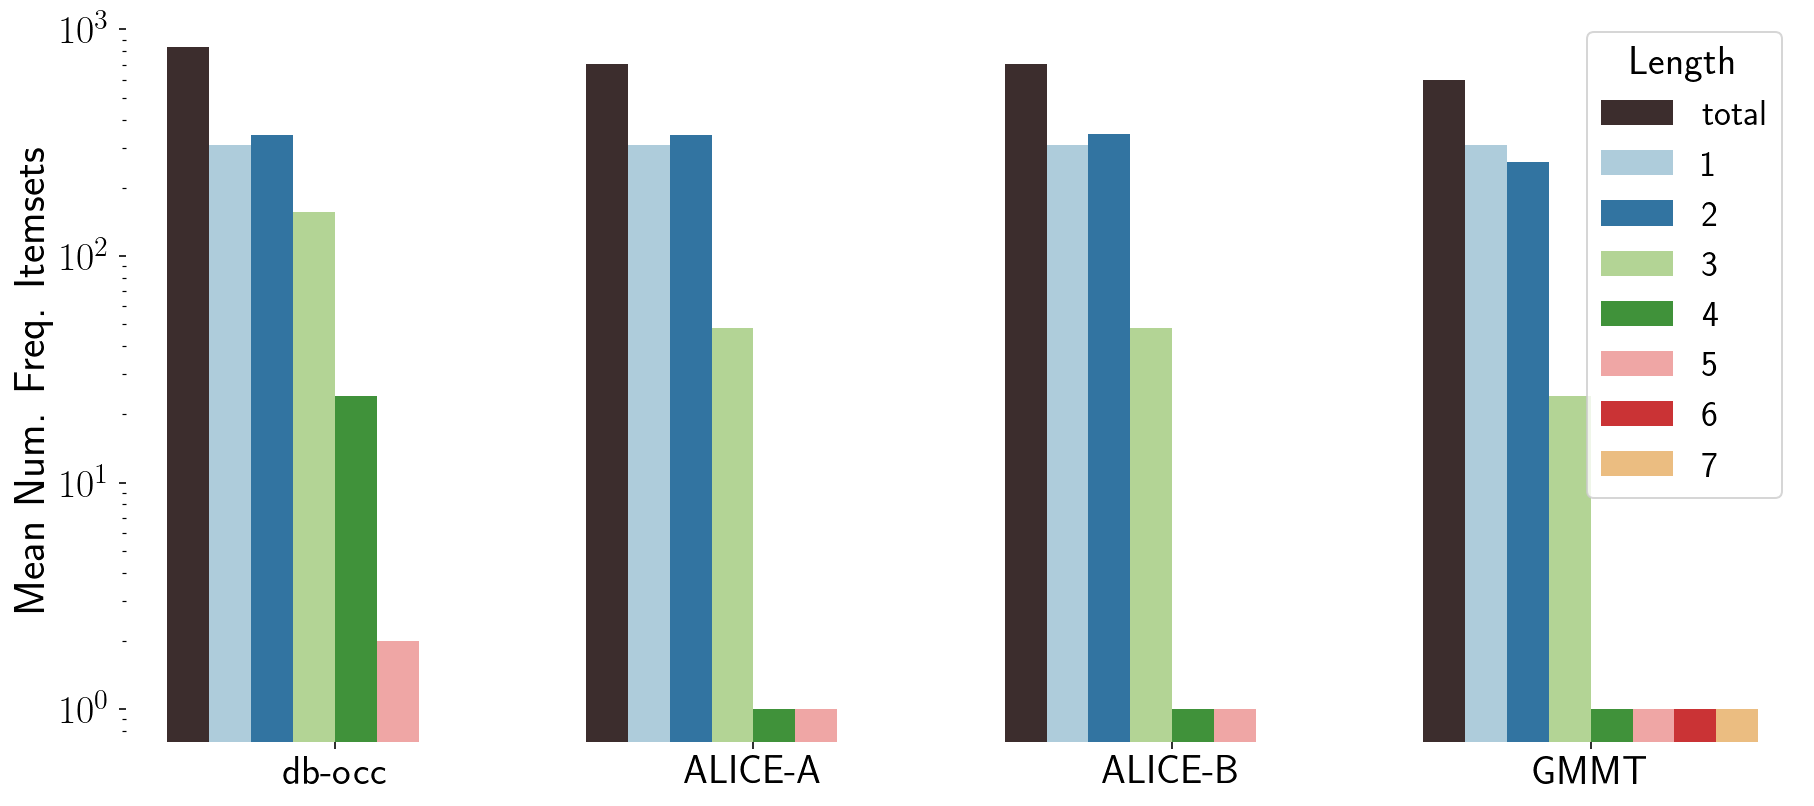

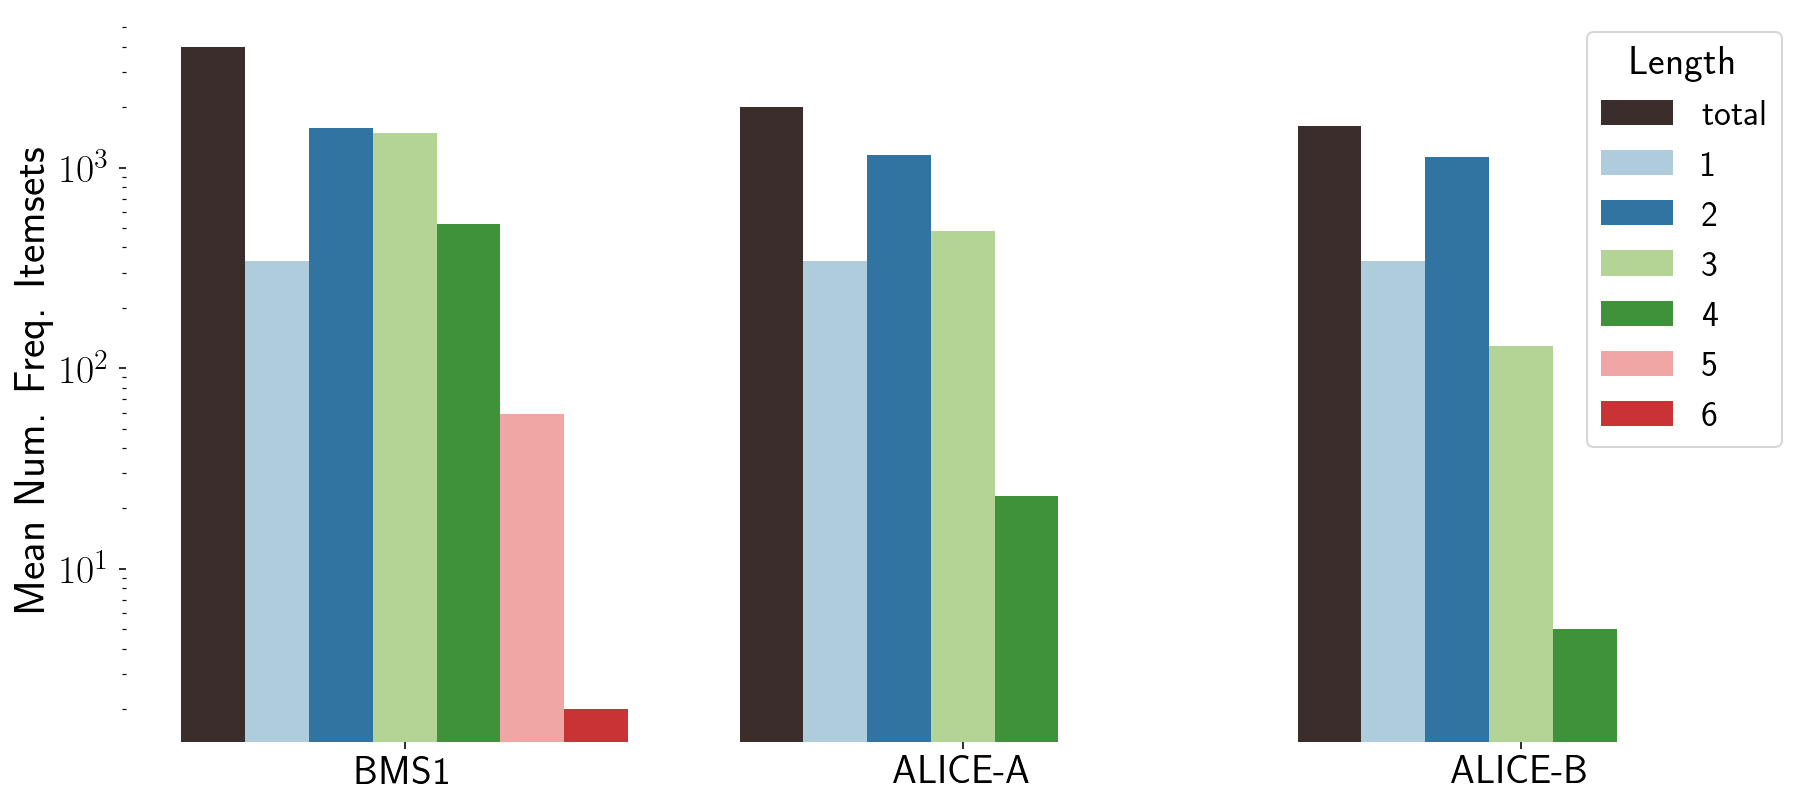

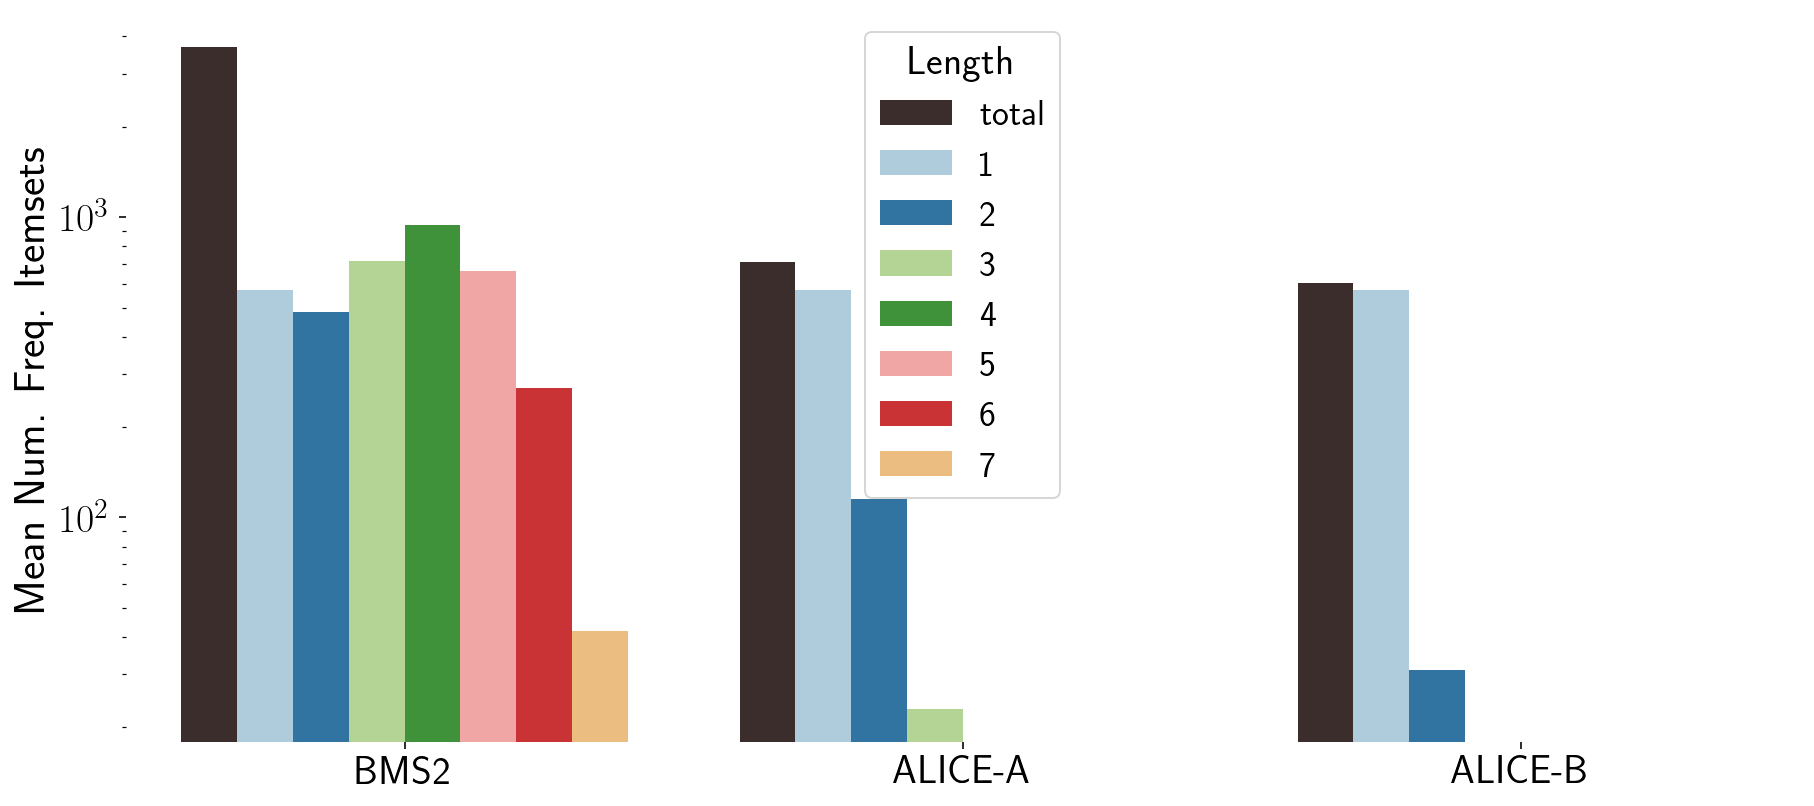

In [29]:
for db in numfreq_df['DataSet'].unique():
    data = numfreq_df.loc[numfreq_df['DataSet']==db, ['DataSet', 'Algorithm', 'Size', 'med']].sort_values(by='Size')
    total = data.groupby(by=['DataSet', 
                             'Algorithm'])[['med']].sum().reset_index()
    total['Size'] = 'total'
    data = pd.concat([total, data])

    fig, ax = plt.subplots(figsize=(13,6))
    if len(data[data['Algorithm']=='GMMT']) > 0:
        sns.barplot(data=data, x='Algorithm', y='med', hue='Size', 
                    ax=ax,  palette=pal2,
                    order=[db, 'ALICE-A', 'ALICE-B', 'GMMT'])
    else:
        sns.barplot(data=data, x='Algorithm', y='med', hue='Size', 
                    ax=ax,  palette=pal2,
                    order=[db, 'ALICE-A', 'ALICE-B'])
    ax.legend(title='Length', fontsize=18, title_fontsize=20)
    if len(data['Size'].unique()) > 10:
        ax.legend(title='Length', fontsize=16,
                  loc='upper center', bbox_to_anchor=(0.5, 1.3),
                  title_fontsize=18, ncol=9)
    ax.set_xlabel('')
    ax.set_ylabel('Mean Num. Freq. Itemsets')
    ax.set_yscale('log')
#     text = 'Sampler: '
#     text += r'$\tilde{p}_{\mathop D\limits^\circ,H_0}$'
#     text += '\n'
#     text += '-----------------------\n'
#     for entry in pvalues[db]:
#         text += f'{entry["Algorithm"]}: {round(entry["pvalue"], 5)}\n'
#     at = AnchoredText(text.strip(), prop=dict(size=20, weight='bold'),
#                       frameon=True, loc='upper center')
#     at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
#     at.patch.set_alpha(0.7)
#     ax.add_artist(at)
    plt.tight_layout()
#     plt.savefig(fig_dir+f'{db}_numFreqItemsets.pdf')
    plt.show()

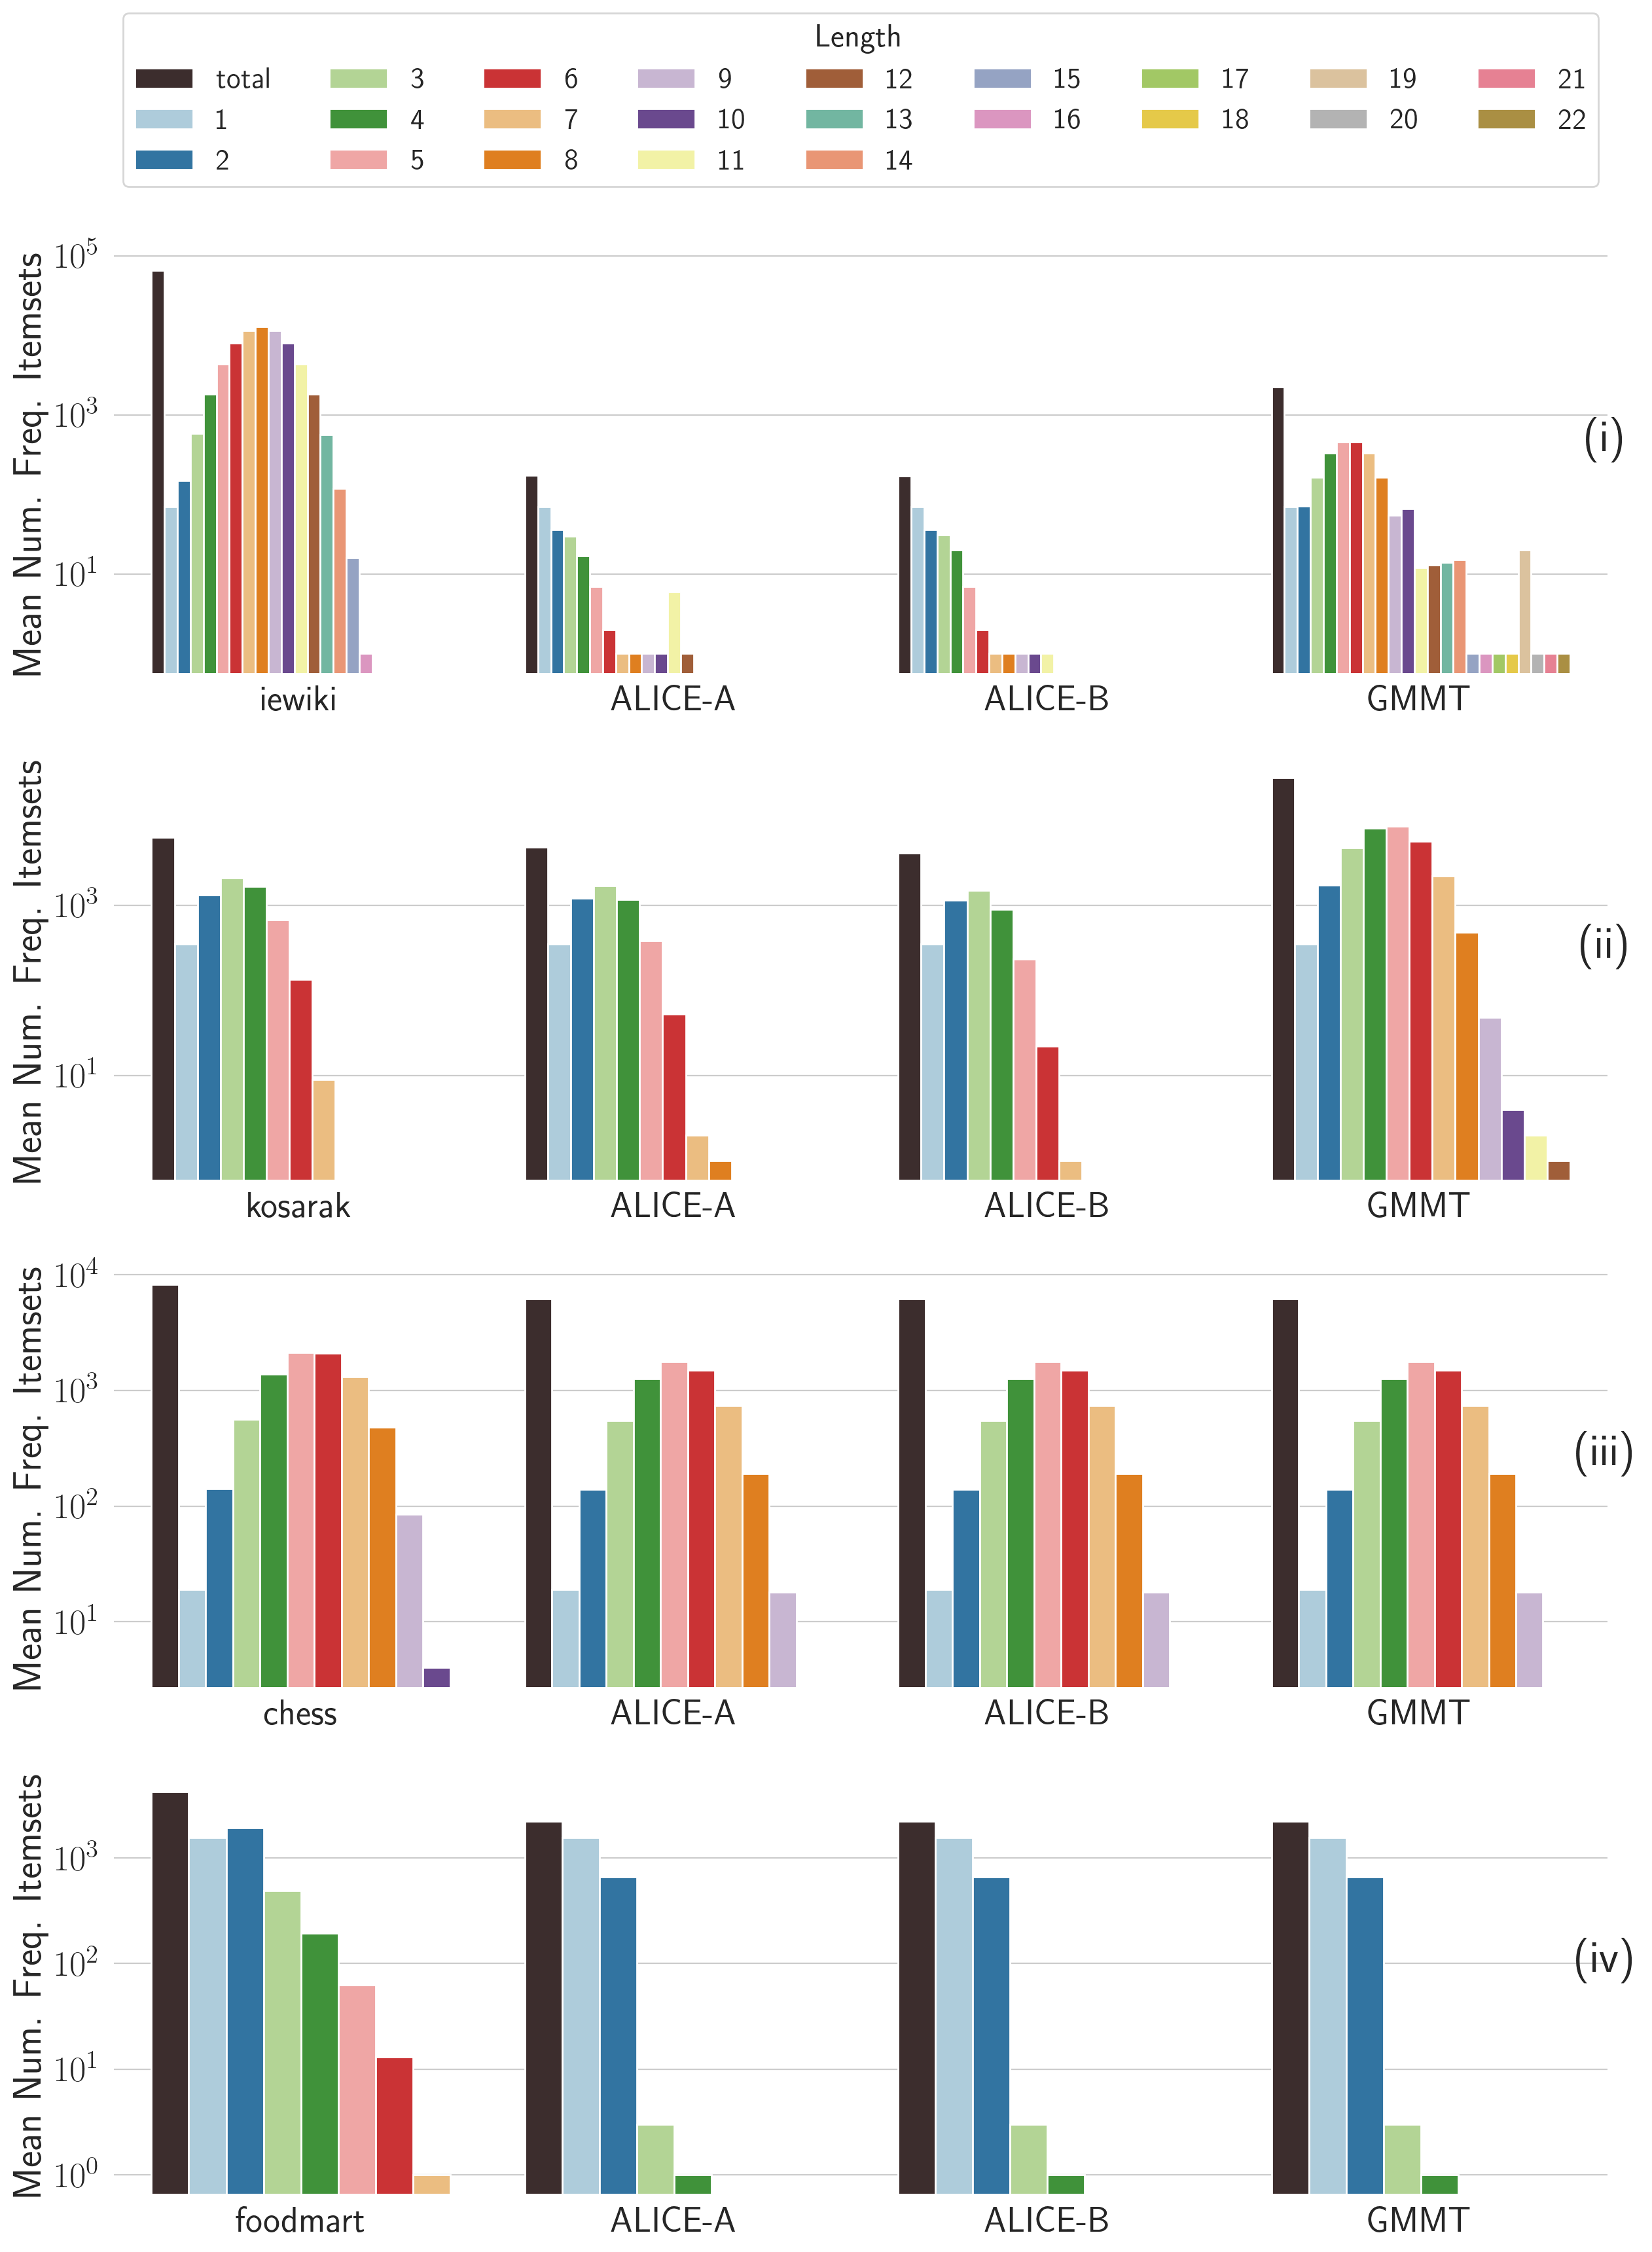

In [95]:
fig, ax = plt.subplots(4, 1, figsize=(13,17))

numbers = ['(i)', '(ii)', '(iii)', '(iv)']

for idx, db in enumerate(['iewiki', 'kosarak', 'chess', 'foodmart']):
    data = numfreq_df.loc[numfreq_df['DataSet']==db, ['DataSet', 'Algorithm', 'Size', 'med']].sort_values(by='Size')
    total = data.groupby(by=['DataSet', 
                             'Algorithm'])[['med']].sum().reset_index()
    total['Size'] = 'total'
    data = pd.concat([total, data])

    if len(data[data['Algorithm']=='GMMT']) > 0:
        sns.barplot(data=data, x='Algorithm', y='med', hue='Size', 
                    ax=ax[idx],  palette=pal2,
                    order=[db, 'ALICE-A', 'ALICE-B', 'GMMT'])
    else:
        sns.barplot(data=data, x='Algorithm', y='med', hue='Size', 
                    ax=ax[idx],  palette=pal2,
                    order=[db, 'ALICE-A', 'ALICE-B'])
    ax[idx].set_title(numbers[idx], fontsize=25, x=1, y=0.5)
    # legend
    ax[idx].legend(title='Length', fontsize=18, title_fontsize=20)
    if len(data['Size'].unique()) > 10:
        ax[idx].legend(title='Length', fontsize=16,
                  loc='upper center', bbox_to_anchor=(0.5, 1.6),
                  title_fontsize=18, ncol=9)
    if idx > 0:
        ax[idx].legend().remove()
    ax[idx].set_xlabel('')
    ax[idx].set_ylabel('Mean Num. Freq. Itemsets')
    ax[idx].set_yscale('log')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig(fig_dir+'numFreqItemsets_S.pdf', bbox_inches='tight')

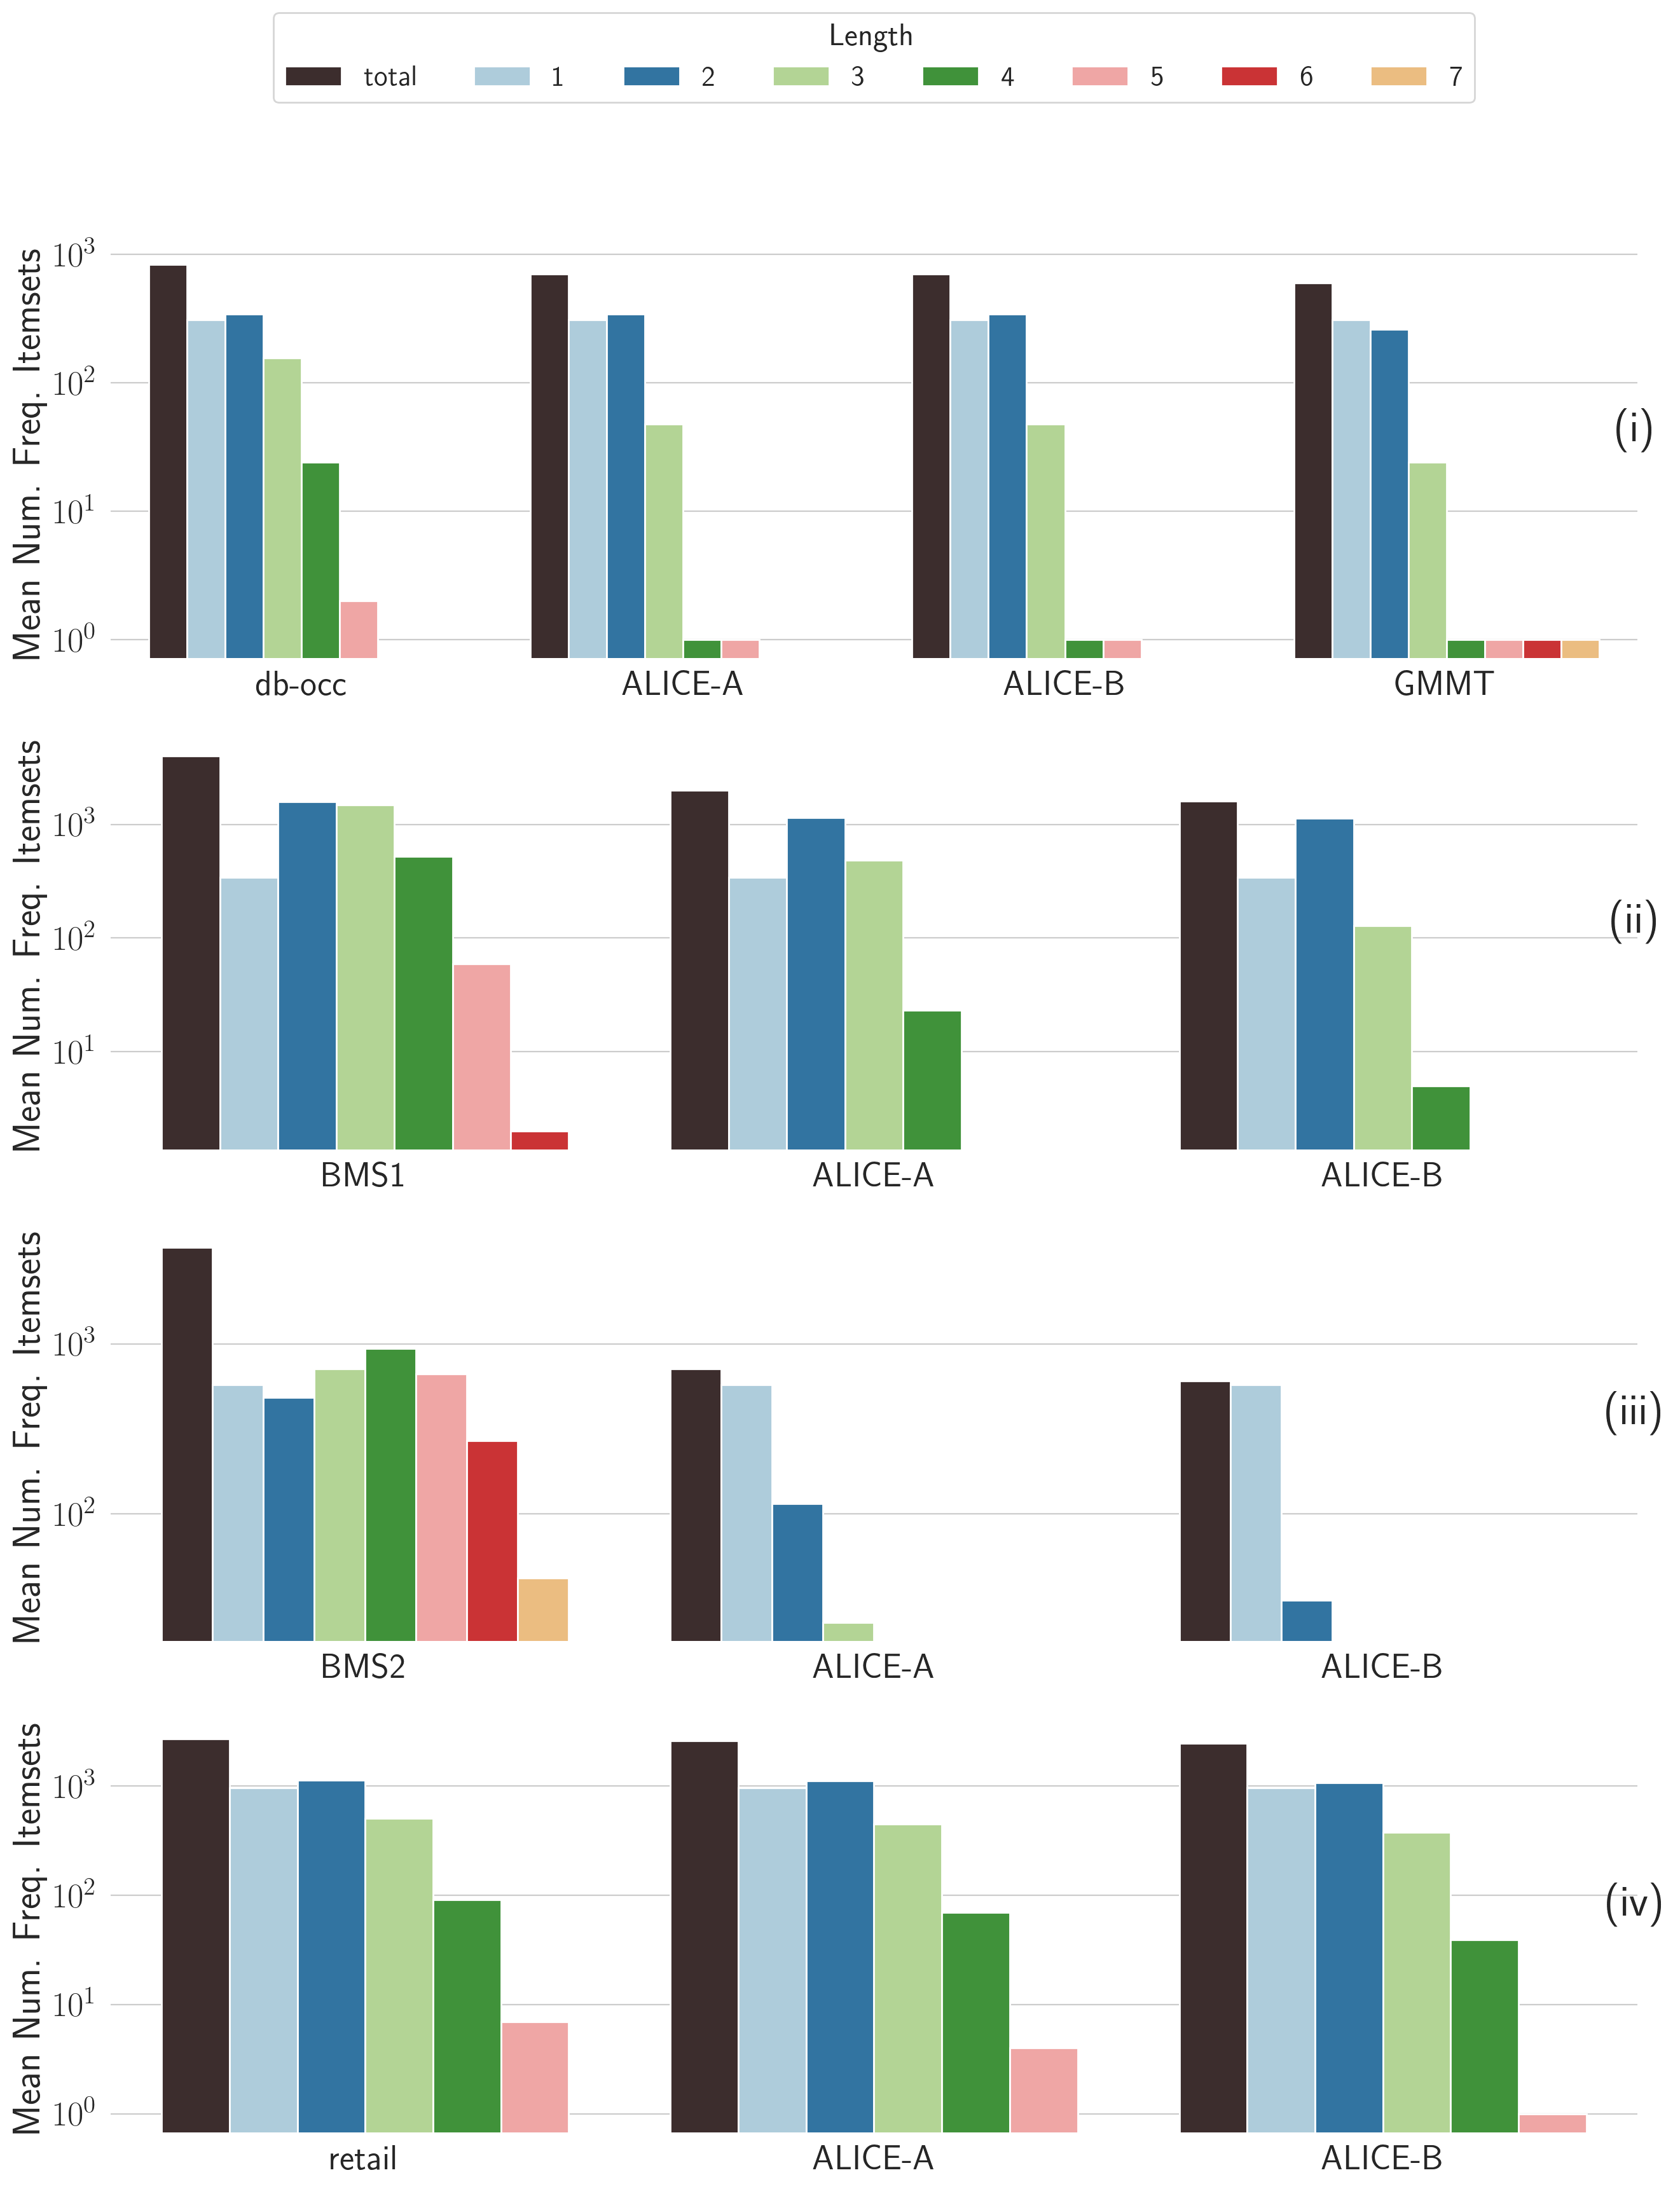

In [96]:
fig, ax = plt.subplots(4, 1, figsize=(13,17))

numbers = ['(i)', '(ii)', '(iii)', '(iv)']

for idx, db in enumerate(['db-occ', 'BMS1', 'BMS2', 'retail']):
    data = numfreq_df.loc[numfreq_df['DataSet']==db, ['DataSet', 'Algorithm', 'Size', 'med']].sort_values(by='Size')
    total = data.groupby(by=['DataSet', 
                             'Algorithm'])[['med']].sum().reset_index()
    total['Size'] = 'total'
    data = pd.concat([total, data])

    if len(data[data['Algorithm']=='GMMT']) > 0:
        sns.barplot(data=data, x='Algorithm', y='med', hue='Size', 
                    ax=ax[idx],  palette=pal2,
                    order=[db, 'ALICE-A', 'ALICE-B', 'GMMT'])
    else:
        sns.barplot(data=data, x='Algorithm', y='med', hue='Size', 
                    ax=ax[idx],  palette=pal2,
                    order=[db, 'ALICE-A', 'ALICE-B'])
    ax[idx].set_title(numbers[idx], fontsize=25, x=1, y=0.5)
    # legend
    ax[idx].legend(title='Length', fontsize=16, loc='upper center', 
                   bbox_to_anchor=(0.5, 1.6), title_fontsize=18, ncol=8)
    if idx > 0:
        ax[idx].legend().remove()
    ax[idx].set_xlabel('')
    ax[idx].set_ylabel('Mean Num. Freq. Itemsets')
    ax[idx].set_yscale('log')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig(fig_dir+'numFreqItemsets_L.pdf', bbox_inches='tight')

Table

In [46]:
agg_sum = numfreq_df.groupby(['DataSet', 'Algorithm']).agg({'med':'sum'}).reset_index()
agg_sum.columns = ['Dataset', 'Sampler', 'Num Freq. Itemsets']

In [47]:
print(agg_sum.to_latex(index=False, float_format="%.4f", 
                       column_format='llr', position='!ht'))

\begin{table}[!ht]
\centering
\begin{tabular}{llr}
\toprule
 Dataset &  Sampler &  Num Freq. Itemsets \\
\midrule
    BMS1 &  ALICE-A &                1998 \\
    BMS1 &  ALICE-B &                1609 \\
    BMS1 &     BMS1 &                3991 \\
    BMS2 &  ALICE-A &                 711 \\
    BMS2 &  ALICE-B &                 604 \\
    BMS2 &     BMS2 &                3683 \\
   chess &  ALICE-A &                6183 \\
   chess &  ALICE-B &                6182 \\
   chess &     GMMT &                6179 \\
   chess &    chess &                8227 \\
  db-occ &  ALICE-A &                 702 \\
  db-occ &  ALICE-B &                 703 \\
  db-occ &     GMMT &                 598 \\
  db-occ &   db-occ &                 834 \\
foodmart &  ALICE-A &                2229 \\
foodmart &  ALICE-B &                2228 \\
foodmart &     GMMT &                2226 \\
foodmart & foodmart &                4247 \\
  iewiki &  ALICE-A &                 173 \\
  iewiki &  ALICE-B &          

In [48]:
pvalues

defaultdict(list,
            {'iewiki': [{'Algorithm': 'ALICE-A',
               'pvalue': 0.00022972662531587412},
              {'Algorithm': 'ALICE-B', 'pvalue': 0.00022972662531587412},
              {'Algorithm': 'GMMT', 'pvalue': 0.018148403399954053}],
             'kosarak': [{'Algorithm': 'ALICE-A',
               'pvalue': 0.00022972662531587412},
              {'Algorithm': 'ALICE-B', 'pvalue': 0.00022972662531587412},
              {'Algorithm': 'GMMT', 'pvalue': 1.0}],
             'chess': [{'Algorithm': 'ALICE-A',
               'pvalue': 0.00045934772622875517},
              {'Algorithm': 'ALICE-B', 'pvalue': 0.00045934772622875517},
              {'Algorithm': 'GMMT', 'pvalue': 0.00045934772622875517}],
             'foodmart': [{'Algorithm': 'ALICE-A',
               'pvalue': 0.00022972662531587412},
              {'Algorithm': 'ALICE-B', 'pvalue': 0.00022972662531587412},
              {'Algorithm': 'GMMT', 'pvalue': 0.00022972662531587412}],
             'db-occ'

## Num Freq Seq Patterns

In [240]:
result_dir = '../output/numFreqItemsets'

In [241]:
files = ['BIKE-1533830-4352-0.025-40-10', 'BIBLE-7870660-4352-0.1-40-10',
         'FIFA-7410920-4352-0.275-40-10', 'SIGN-379580-4352-0.4-40-10',
         'LEVIATHAN-1972510-4352-0.15-40-10', 'BMS1Seq-1496380-4352-0.002-40-10']
names = ['BIKE', 'BIBLE', 'FIFA', 'SIGN', 'LEVIATHAN', 'BMS1']

In [242]:
dfs = []
for idx,file in enumerate(files):
    filepath = f'{result_dir}/{file}.json'
    df = ns.get_num_freq_itemsets_stats(filepath, names[idx])
    df['DataSet'] = names[idx]
    dfs.append(df)
numfreq_df = pd.concat(dfs)

In [243]:
numfreq_df['Algorithm'] = numfreq_df['Algorithm'].apply(lambda x: sampler_names.get(x, x))

In [244]:
numfreq_df = numfreq_df.astype(dtype={'Size':np.int32})

In [245]:
numfreq_df = numfreq_df[numfreq_df['Size']>0]

p-values

In [246]:
pvalues = defaultdict(list)
for db in numfreq_df['DataSet'].unique():
    data = numfreq_df[(numfreq_df['Size']==1) & 
                      (numfreq_df['DataSet']==db) &
                      (numfreq_df['Algorithm'].isin(sampler_names.values()))]
    pvalues[db] = data[['Algorithm', 'pvalue']].to_dict('records')

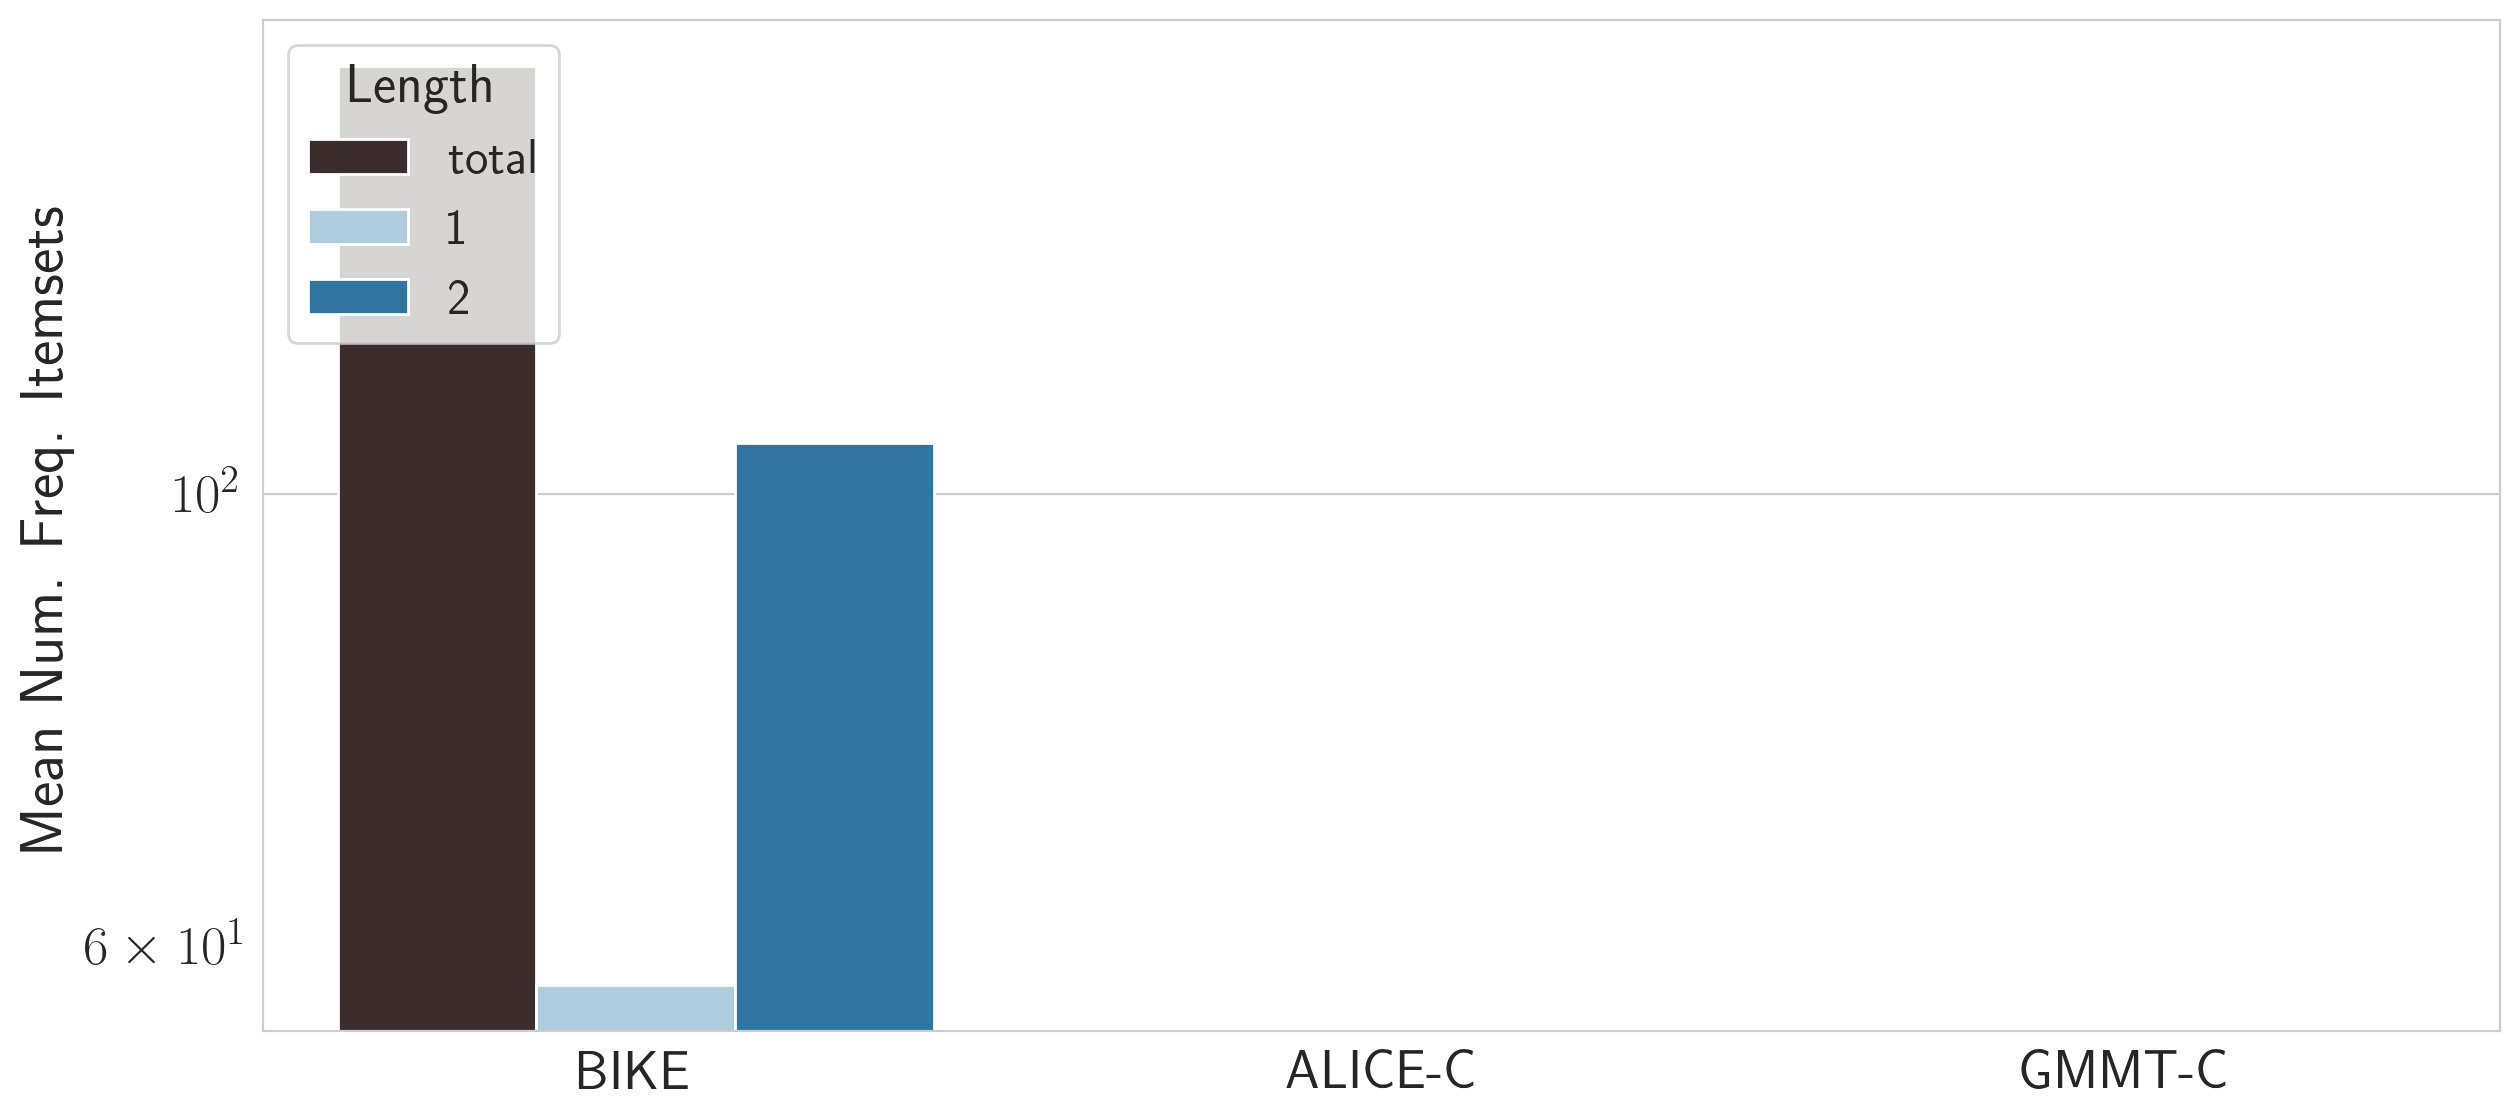

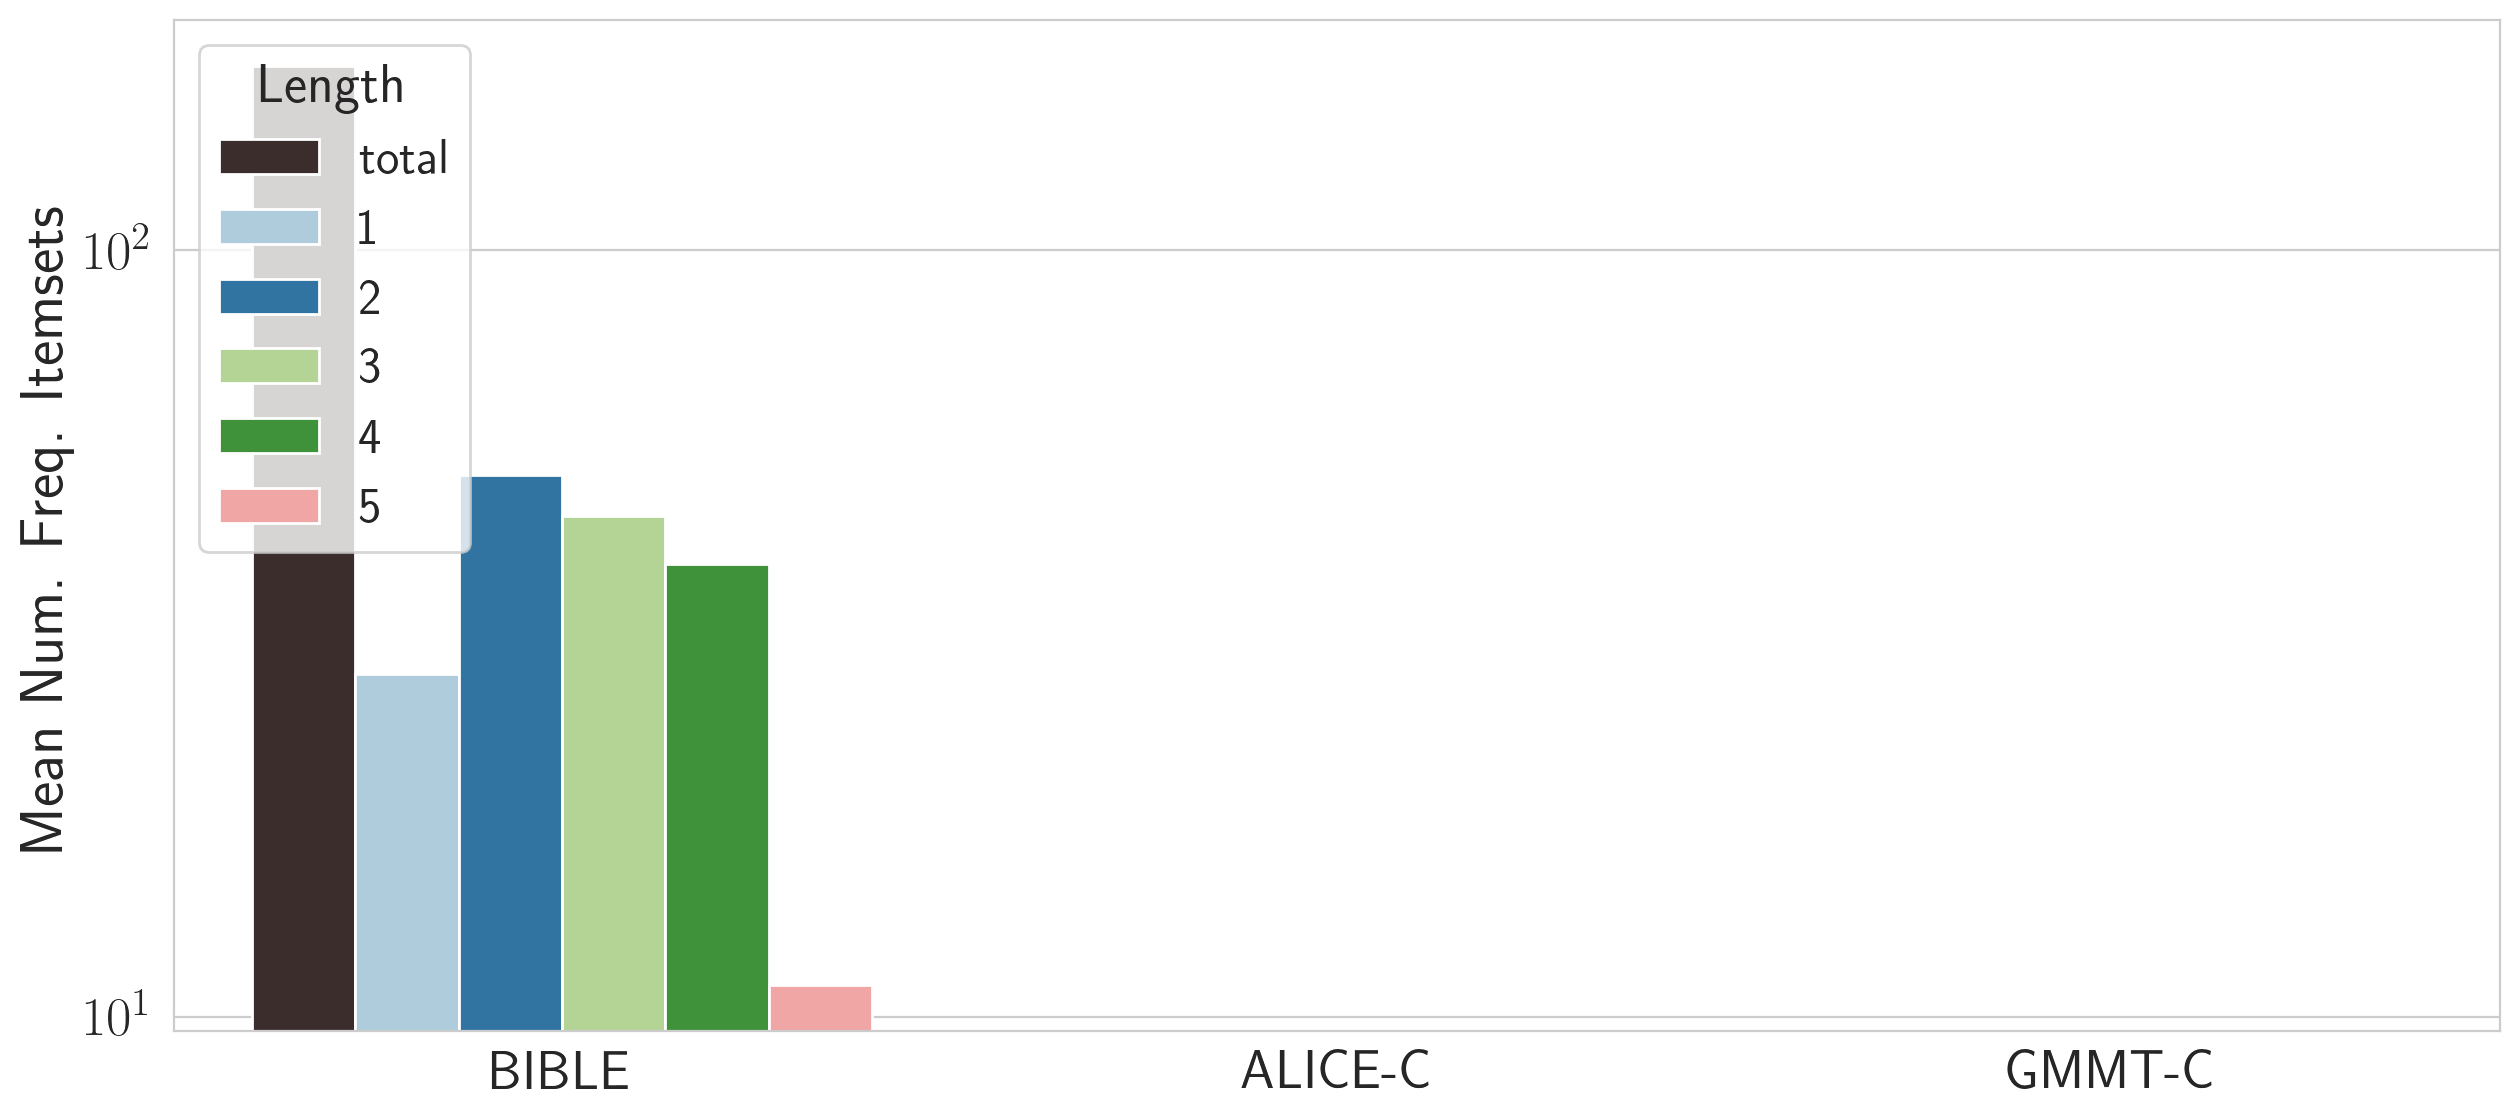

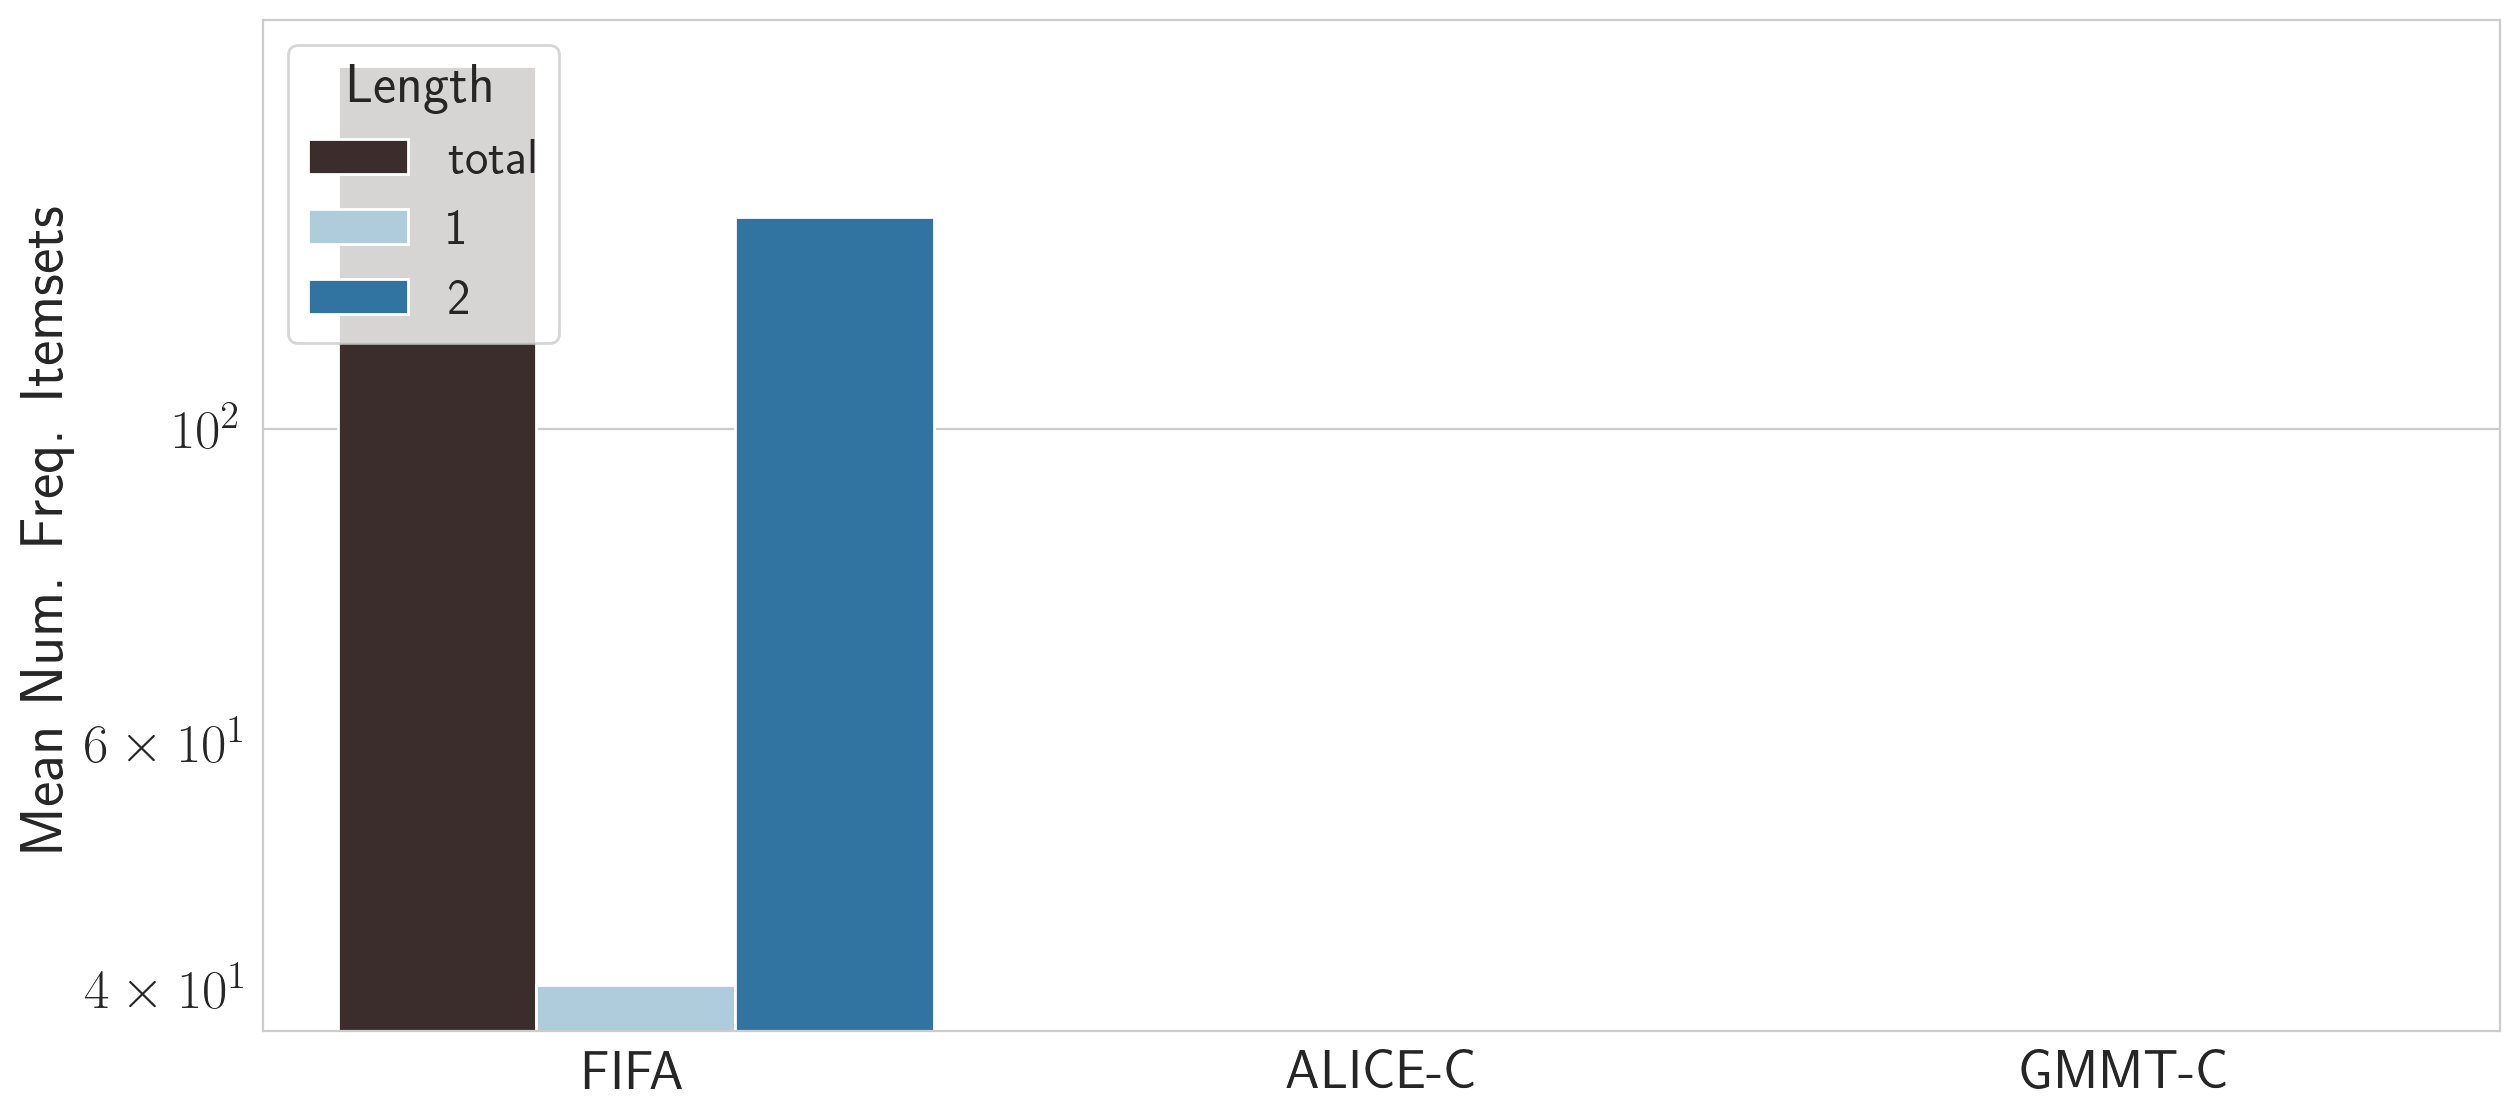

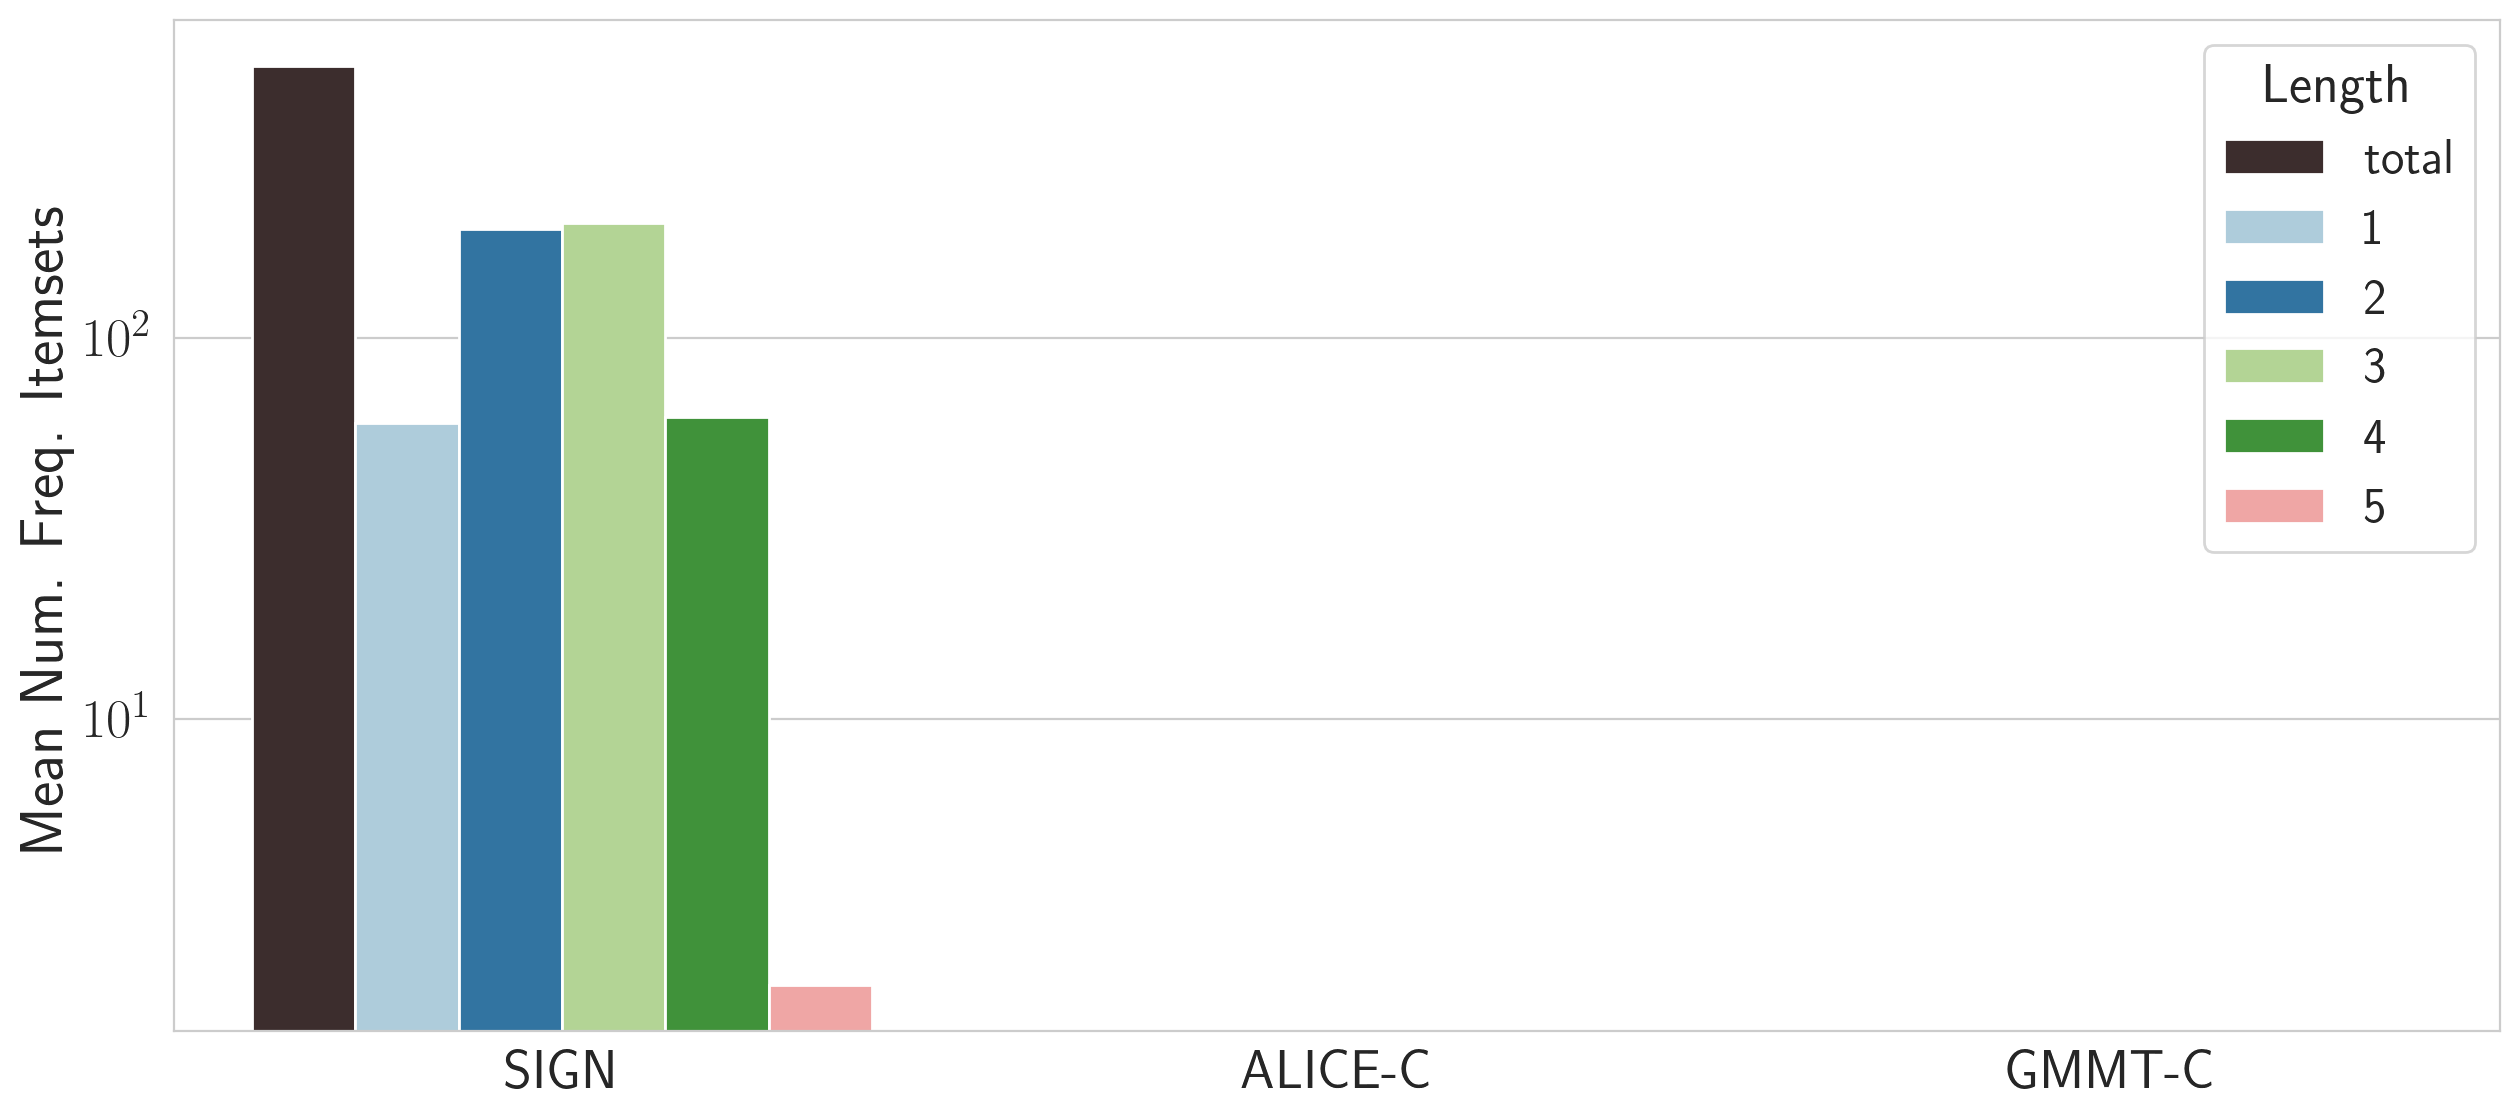

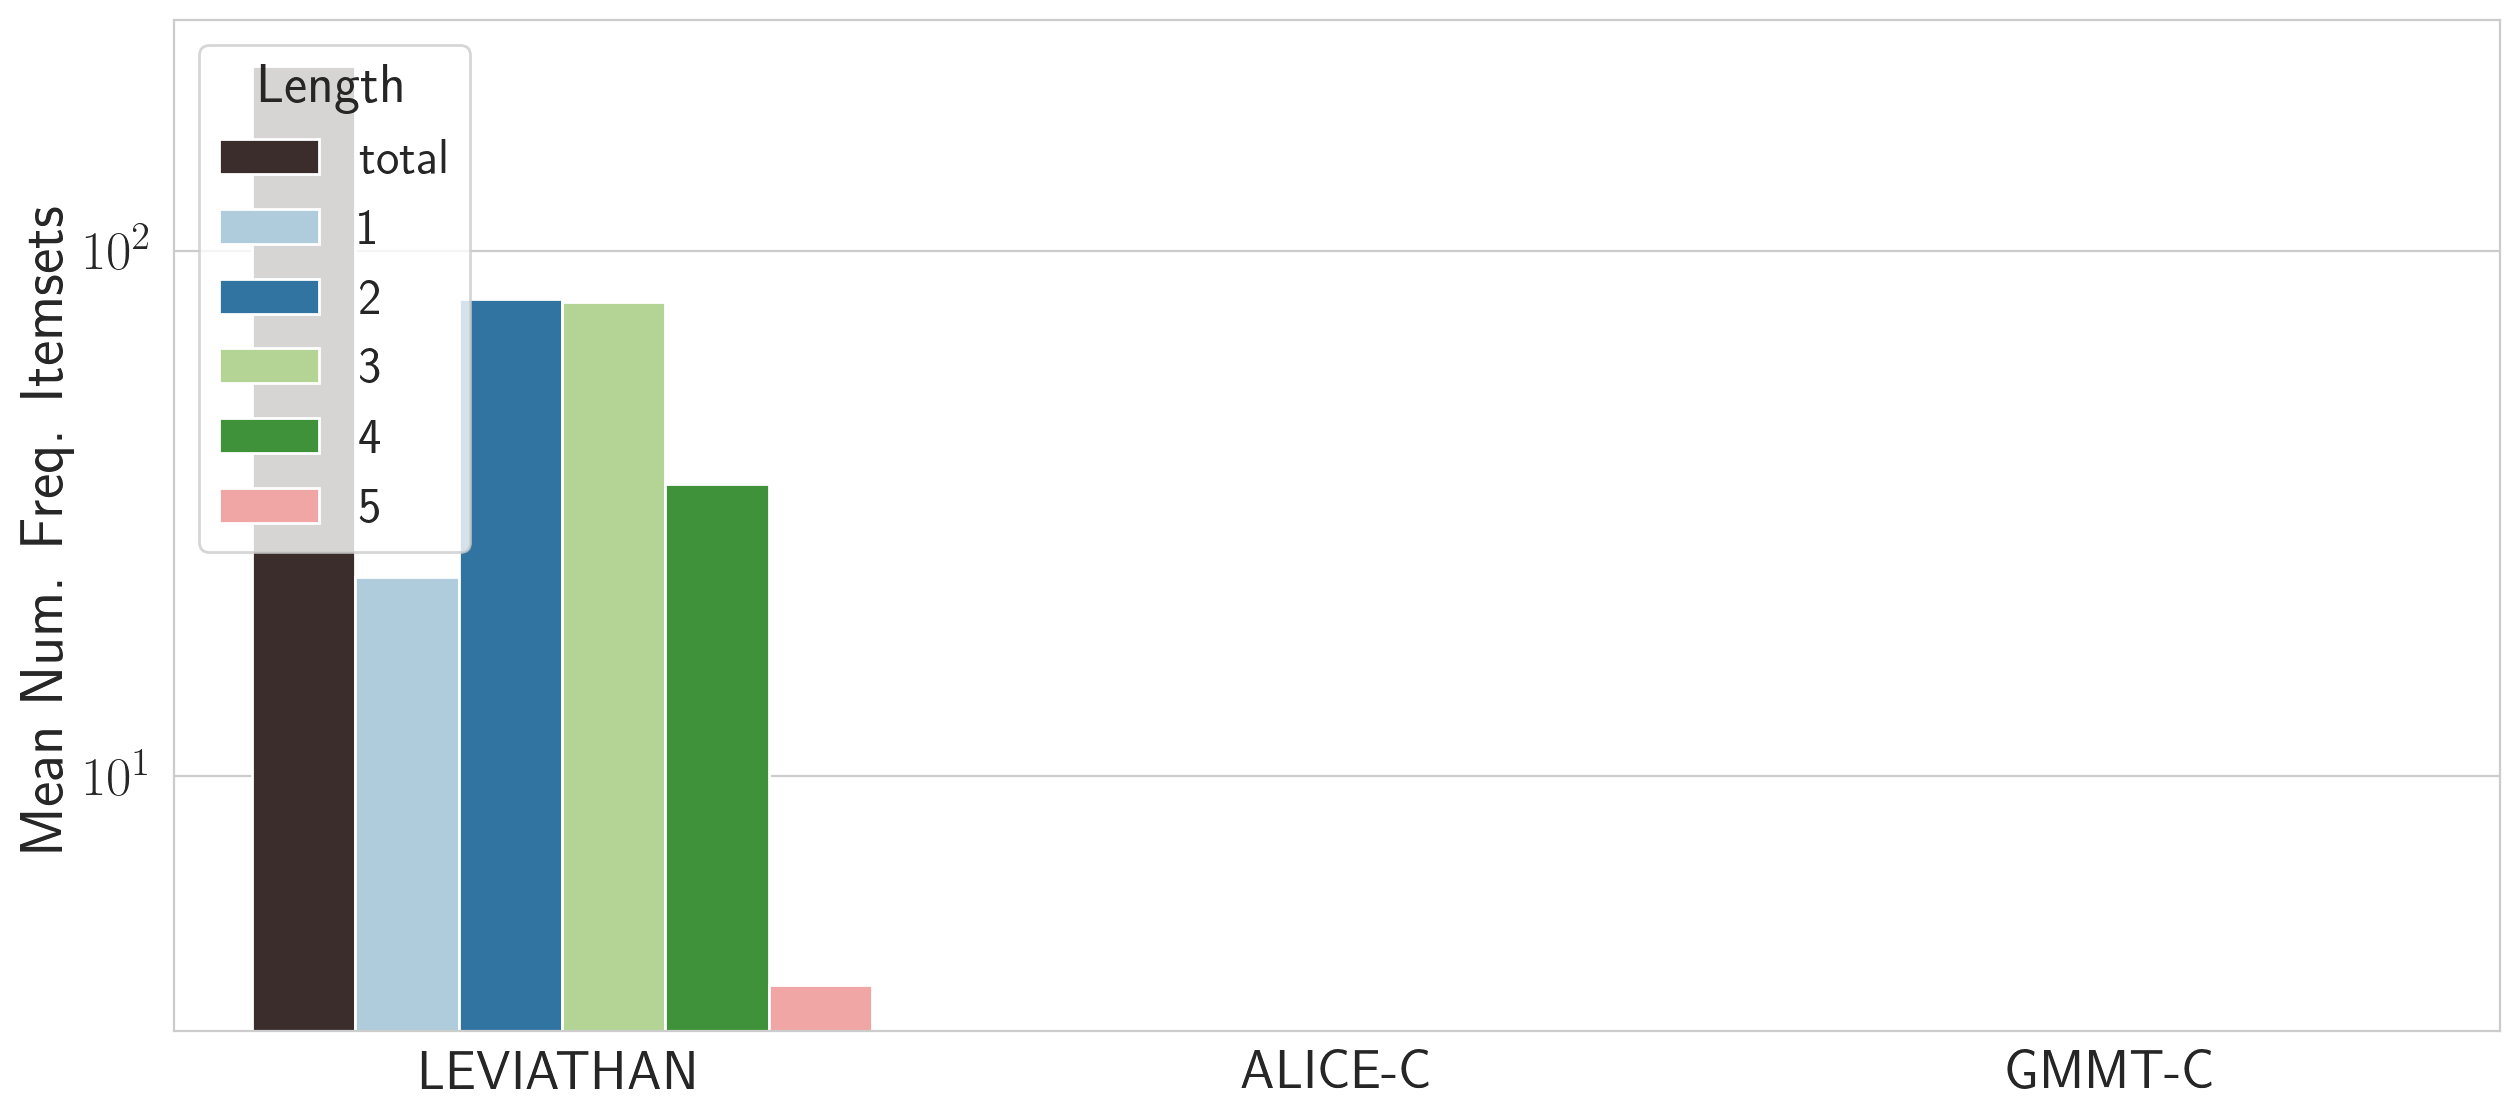

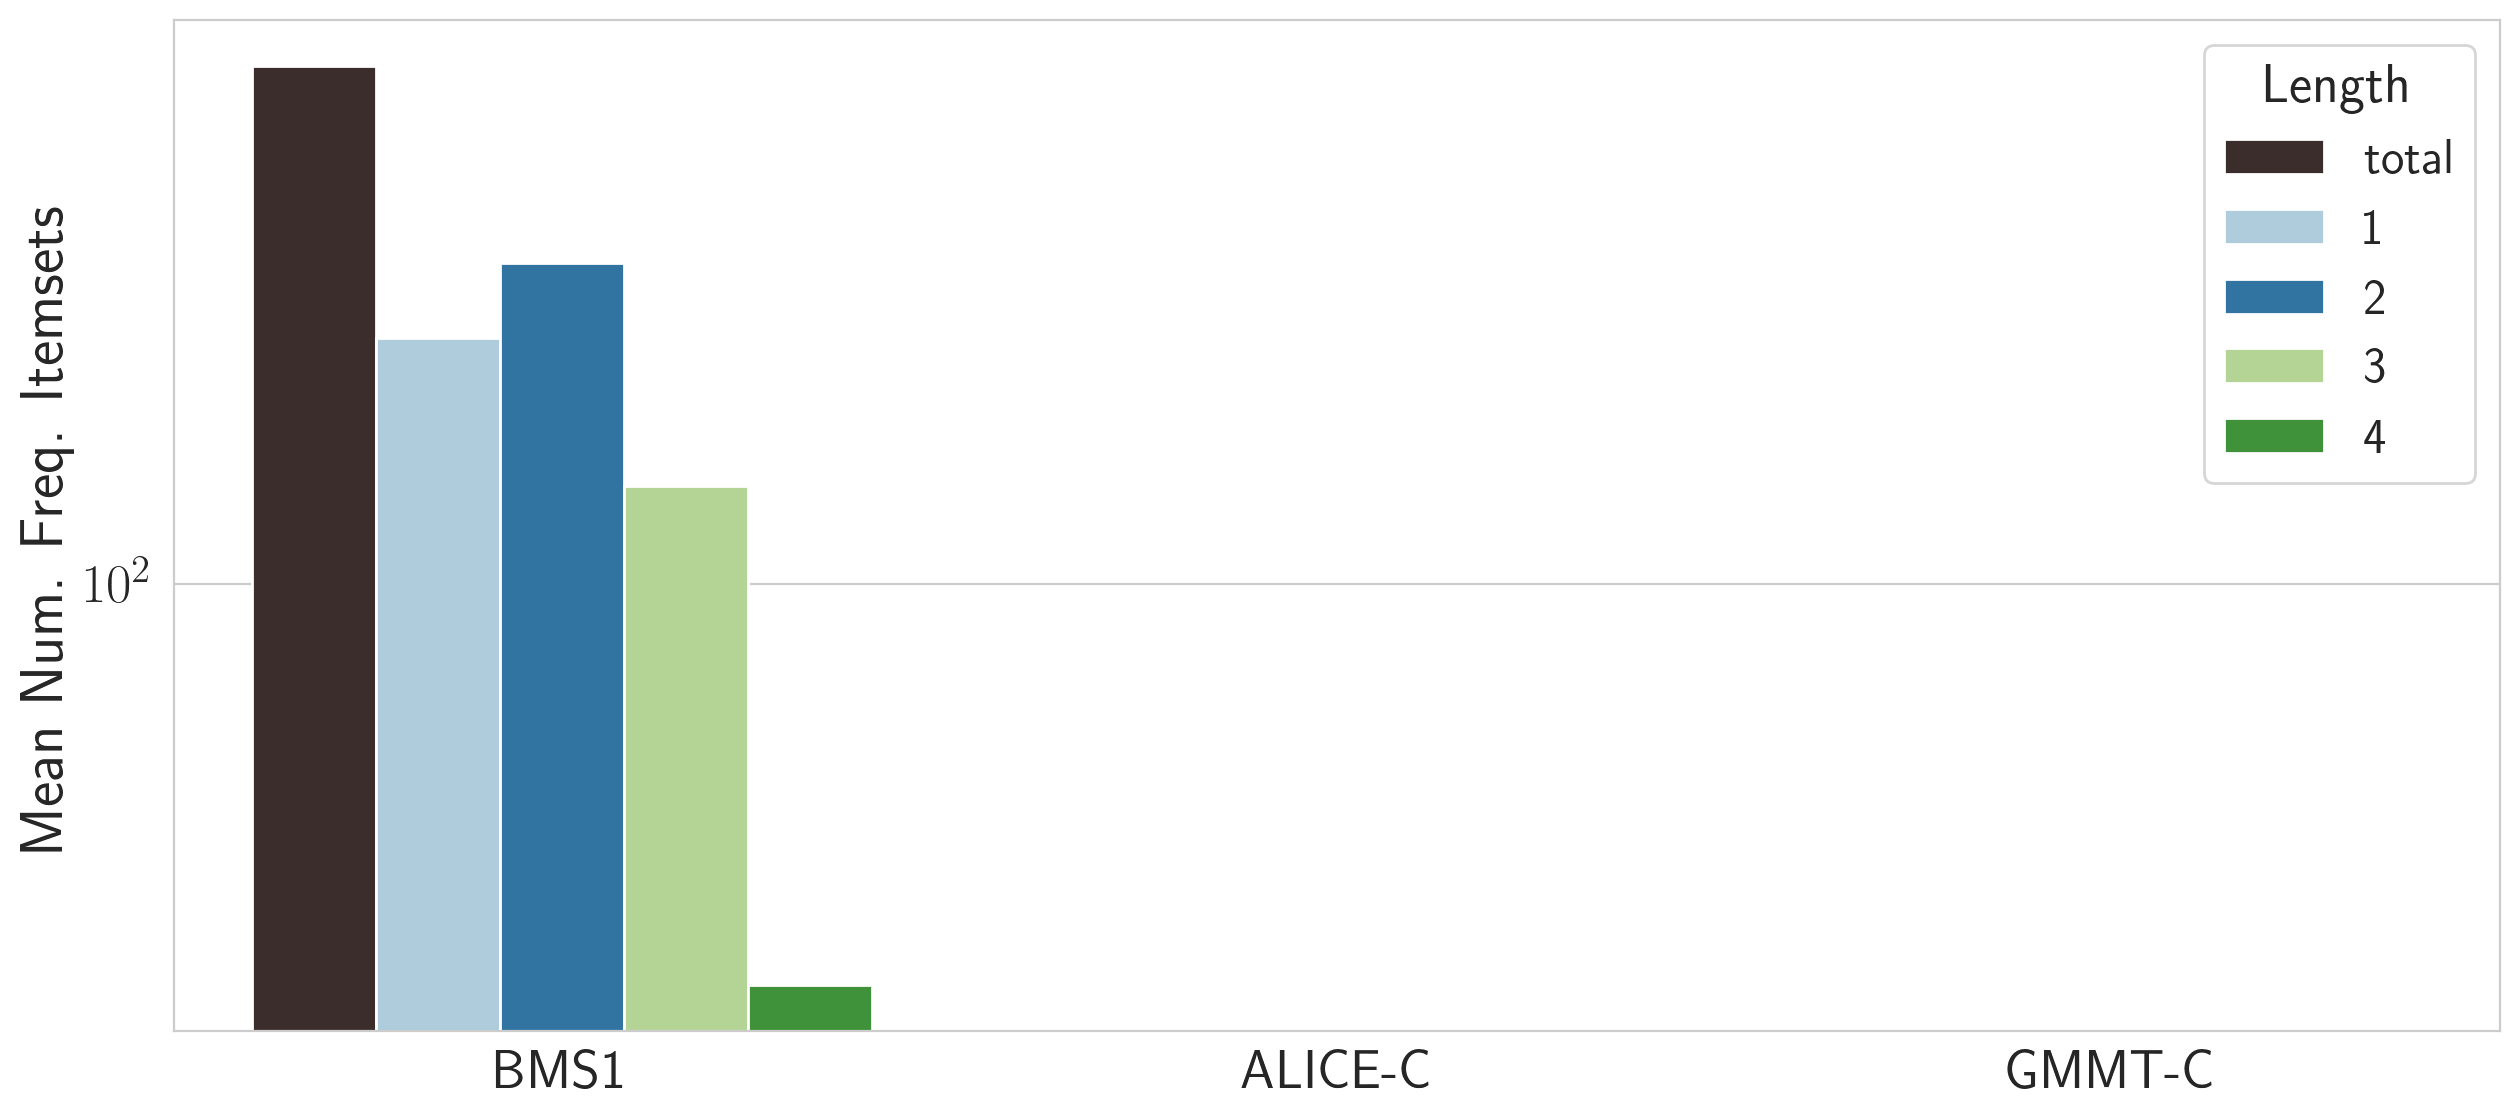

In [247]:
for db in numfreq_df['DataSet'].unique():
    data = numfreq_df.loc[numfreq_df['DataSet']==db, ['DataSet', 'Algorithm', 'Size', 'med']].sort_values(by='Size')
    total = data.groupby(by=['DataSet', 
                             'Algorithm'])[['med']].sum().reset_index()
    total['Size'] = 'total'
    data = pd.concat([total, data])

    fig, ax = plt.subplots(figsize=(13,6))
    sns.barplot(data=data, x='Algorithm', y='med', hue='Size', 
            ax=ax,  palette=pal2,
            order=[db, 'ALICE-C', 'GMMT-C'])
    ax.legend(title='Length', fontsize=18, title_fontsize=20)
    if len(data['Size'].unique()) > 10:
        ax.legend(title='Length', fontsize=16,
                  loc='upper center', bbox_to_anchor=(0.5, 1.3),
                  title_fontsize=18, ncol=9)
    ax.set_xlabel('')
    ax.set_ylabel('Mean Num. Freq. Itemsets')
    ax.set_yscale('log')
    plt.tight_layout()
    plt.show()

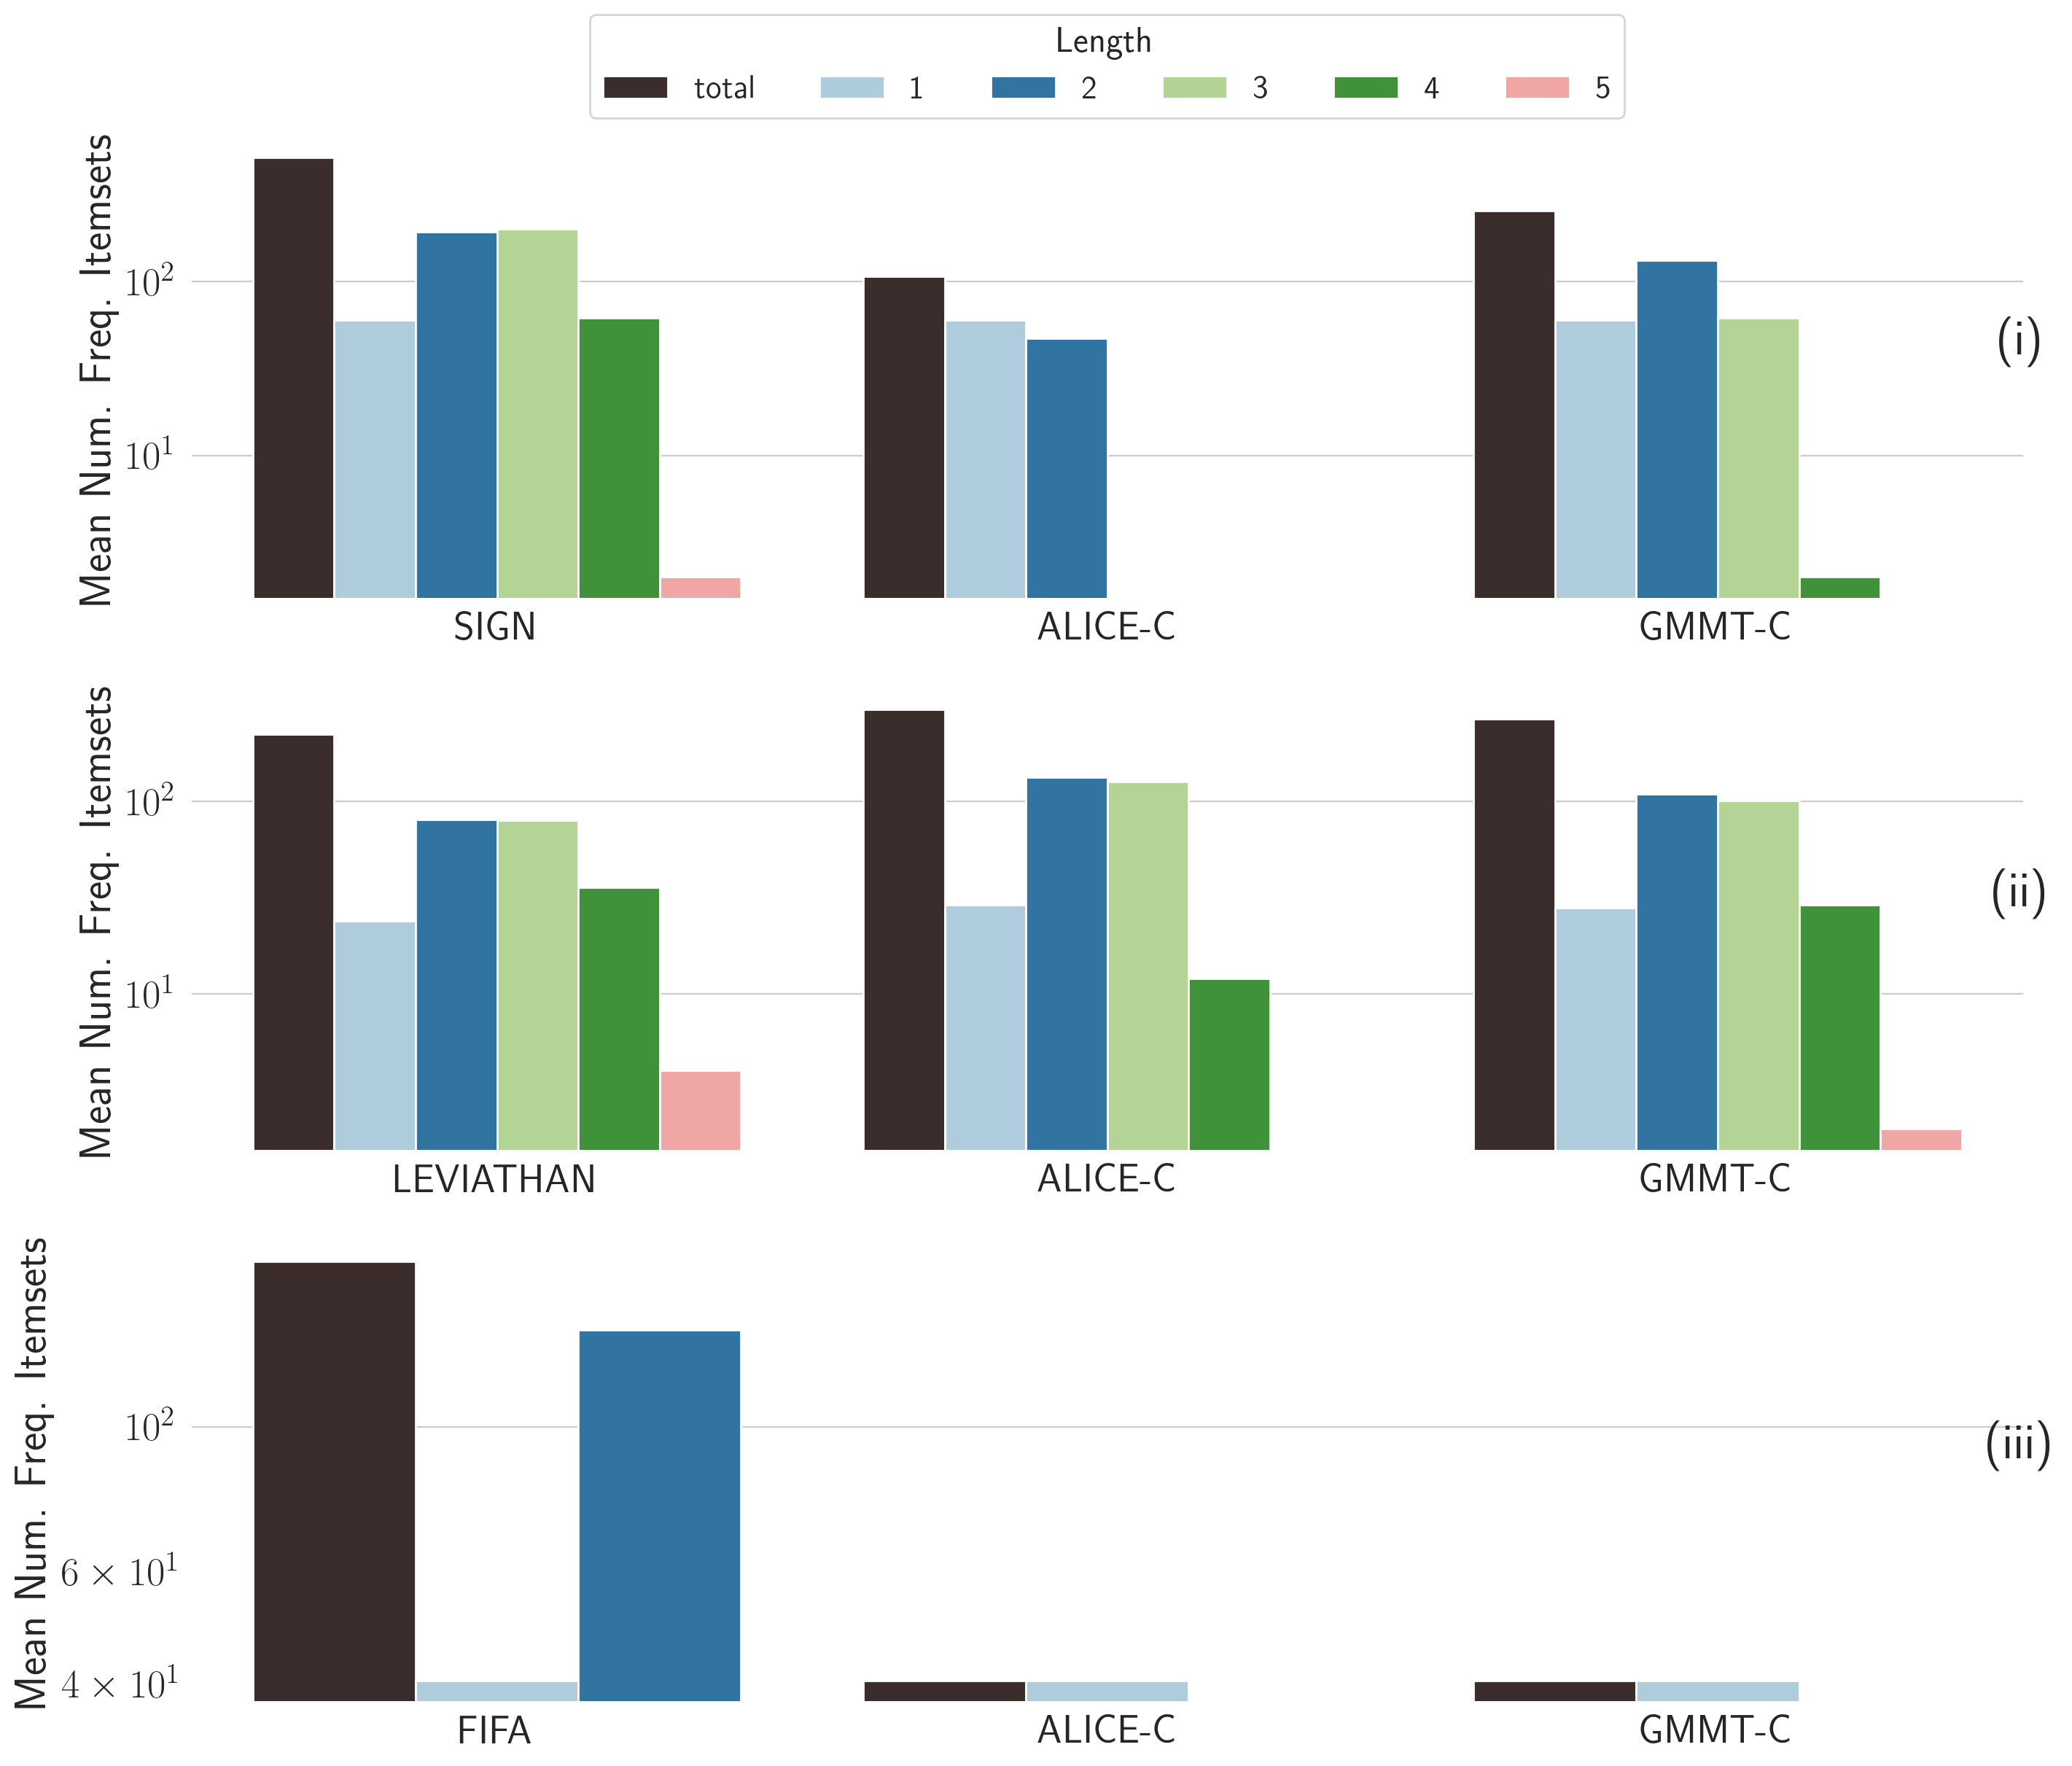

In [150]:
fig, ax = plt.subplots(3, 1, figsize=(14,12))

numbers = ['(i)', '(ii)', '(iii)']

for idx, db in enumerate(['SIGN', 'LEVIATHAN', 'FIFA']):
    data = numfreq_df.loc[numfreq_df['DataSet']==db, ['DataSet', 'Algorithm', 'Size', 'med']].sort_values(by='Size')
    total = data.groupby(by=['DataSet', 
                             'Algorithm'])[['med']].sum().reset_index()
    total['Size'] = 'total'
    data = pd.concat([total, data])

    sns.barplot(data=data, x='Algorithm', y='med', hue='Size', 
                ax=ax[idx],  palette=pal2,
                order=[db, 'ALICE-C', 'GMMT-C'])
    ax[idx].set_title(numbers[idx], fontsize=25, x=1, y=0.5)
    # legend
    ax[idx].legend(title='Length', fontsize=18, title_fontsize=20)
    ax[idx].legend(title='Length', fontsize=16,
              loc='upper center', bbox_to_anchor=(0.5, 1.3),
              title_fontsize=18, ncol=9)
    if idx > 0:
        ax[idx].legend().remove()
    ax[idx].set_xlabel('')
    ax[idx].set_ylabel('Mean Num. Freq. Itemsets')
    ax[idx].set_yscale('log')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig(fig_dir+'numFreqItemsets_seq_S.pdf', bbox_inches='tight')

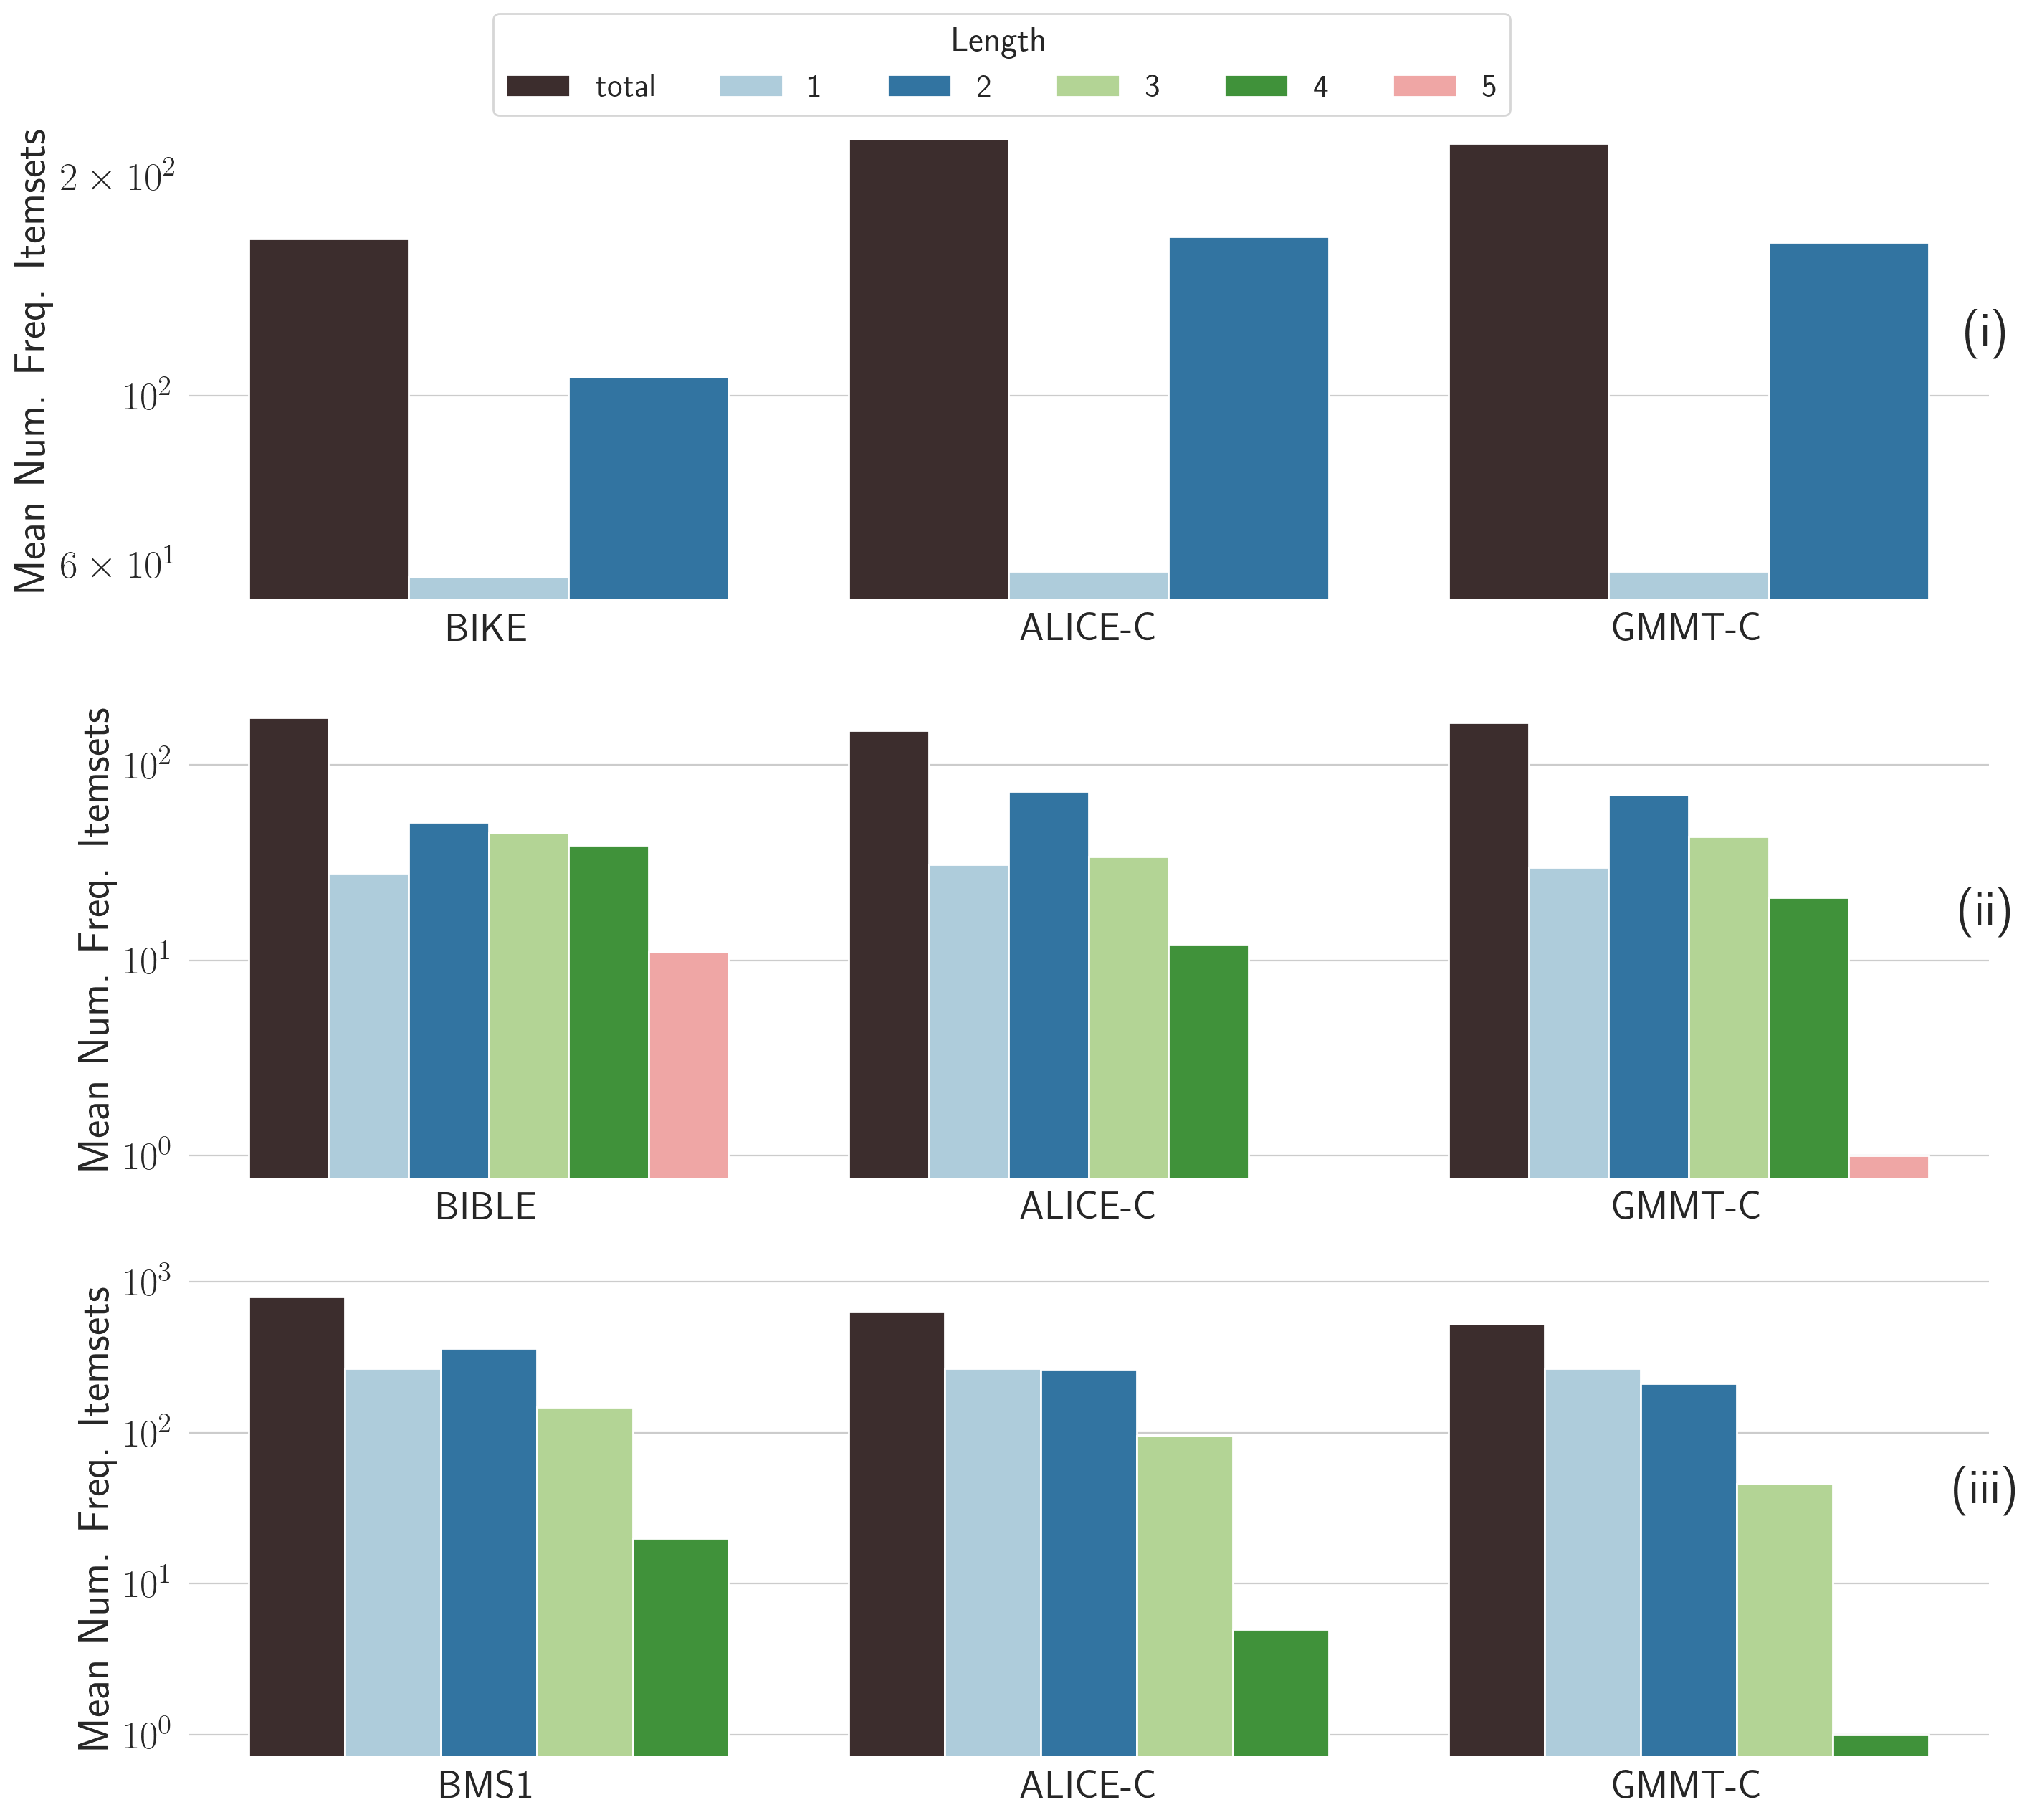

In [169]:
fig, ax = plt.subplots(3, 1, figsize=(14,12))

numbers = ['(i)', '(ii)', '(iii)']

for idx, db in enumerate(['BIKE', 'BIBLE', 'BMS1']):
    data = numfreq_df.loc[numfreq_df['DataSet']==db, ['DataSet', 'Algorithm', 'Size', 'med']].sort_values(by='Size')
    total = data.groupby(by=['DataSet', 
                             'Algorithm'])[['med']].sum().reset_index()
    total['Size'] = 'total'
    data = pd.concat([total, data])

    g = sns.barplot(data=data, x='Algorithm', y='med', hue='Size', 
                ax=ax[idx],  palette=pal2,
                order=[db, 'ALICE-C', 'GMMT-C'])
    ax[idx].set_title(numbers[idx], fontsize=25, x=1, y=0.5)
    ax[idx].legend().remove()
    ax[idx].set_xlabel('')
    ax[idx].set_ylabel('Mean Num. Freq. Itemsets')
    ax[idx].set_yscale('log')

lines = []
labels = []
Line, Label = ax[1].get_legend_handles_labels()
# print(Label)
lines.extend(Line)
labels.extend(Label)
# rotating x-axis labels of last sub-plot
fig.legend(lines, labels, title='Length', 
           fontsize=16, title_fontsize=18,
           bbox_to_anchor=(0.5, 1.06),
           loc='upper center', ncol=6)    
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig(fig_dir+'numFreqItemsets_seq_L.pdf', bbox_inches='tight')

Table

In [170]:
agg_sum = numfreq_df.groupby(['DataSet', 'Algorithm']).agg({'med':'sum'}).reset_index()
agg_sum.columns = ['Dataset', 'Sampler', 'Num Freq. Itemsets']

In [171]:
print(agg_sum.to_latex(index=False, float_format="%.4f", 
                       column_format='llr', position='!ht'))

\begin{table}[!ht]
\centering
\begin{tabular}{llr}
\toprule
  Dataset &   Sampler &  Num Freq. Itemsets \\
\midrule
    BIBLE &   ALICE-C &                 150 \\
    BIBLE &     BIBLE &                 174 \\
    BIBLE &    GMMT-C &                 165 \\
     BIKE &   ALICE-C &                 222 \\
     BIKE &      BIKE &                 163 \\
     BIKE &    GMMT-C &                 219 \\
     BMS1 &   ALICE-C &                 631 \\
     BMS1 &      BMS1 &                 798 \\
     BMS1 &    GMMT-C &                 526 \\
     FIFA &   ALICE-C &                  40 \\
     FIFA &      FIFA &                 182 \\
     FIFA &    GMMT-C &                  40 \\
LEVIATHAN &   ALICE-C &                 302 \\
LEVIATHAN &    GMMT-C &                 270 \\
LEVIATHAN & LEVIATHAN &                 225 \\
     SIGN &   ALICE-C &                 107 \\
     SIGN &    GMMT-C &                 257 \\
     SIGN &      SIGN &                 518 \\
\bottomrule
\end{tabular}
\end{table}


/var/folders/nb/fsgt9jgs34x6qd_dvlnbdw680000gn/T/ipykernel_94405/3378298987.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(agg_sum.to_latex(index=False, float_format="%.4f",


In [173]:
display(pvalues)

defaultdict(list,
            {'BIKE': [{'Algorithm': 'ALICE-C', 'pvalue': 1.0},
              {'Algorithm': 'GMMT-C', 'pvalue': 1.0}],
             'BIBLE': [{'Algorithm': 'ALICE-C',
               'pvalue': 0.00022972662531587412},
              {'Algorithm': 'GMMT-C', 'pvalue': 0.00022972662531587412}],
             'FIFA': [{'Algorithm': 'ALICE-C',
               'pvalue': 0.00022972662531587412},
              {'Algorithm': 'GMMT-C', 'pvalue': 0.00022972662531587412}],
             'SIGN': [{'Algorithm': 'ALICE-C',
               'pvalue': 0.00022972662531587412},
              {'Algorithm': 'GMMT-C', 'pvalue': 0.00022972662531587412}],
             'LEVIATHAN': [{'Algorithm': 'ALICE-C', 'pvalue': 1.0},
              {'Algorithm': 'GMMT-C', 'pvalue': 1.0}],
             'BMS1': [{'Algorithm': 'ALICE-C',
               'pvalue': 0.00022972662531587412},
              {'Algorithm': 'GMMT-C', 'pvalue': 0.00022972662531587412}]})

## Significant Itemset Mining

In [54]:
result_dir = '../output/significantItemsets'

In [55]:
db_config = {'edit-iewikibooks':f'1953-4352-128-{thresh["edit-iewikibooks"]}',
             'kosarak_3000':f'23664-4352-128-{thresh["kosarak_3000"]}',
             'chess':f'118252-2048-128-{thresh["chess"]}',
             'foodmart':f'27478-4352-128-{thresh["foodmart"]}',
             'dbpedia-occupation':f'47316-4352-128-{thresh["dbpedia-occupation"]}',
             'BMS1':f'299278-1568-128-{thresh["BMS1"]}',
             'BMS2':f'716556-1568-128-{thresh["BMS2"]}'
            }

### Num Significant Itemsets by Size

In [57]:
dfs = []
for db,conf in db_config.items():
    for sampler in samplers:
        try:
            file = f'{result_dir}/{db}-{sampler}-{conf}-0.05-32-0.json'
            df = sig.get_itemsets_stats(file)
            df['Sampler'] = sampler
            df['DataSet'] = dataset_names.get(db, db)
            dfs.append(df)
        except Exception as e: pass
#             print(e)
numItem_df = pd.concat(dfs)

In [58]:
numItem_df['Sampler'] = numItem_df['Sampler'].apply(lambda x : sampler_names[x])

In [59]:
summary = numItem_df[numItem_df['SSup'] != 0].groupby(by=['DataSet', 
                                                          'Sampler',
                                                          'Size']).agg({'SSup':'count'}).reset_index()

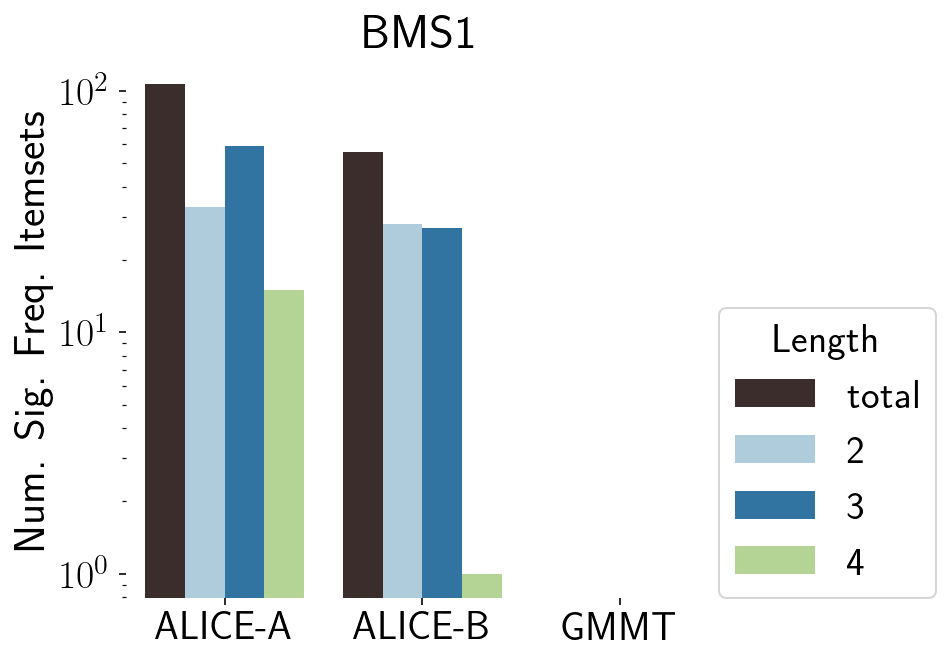

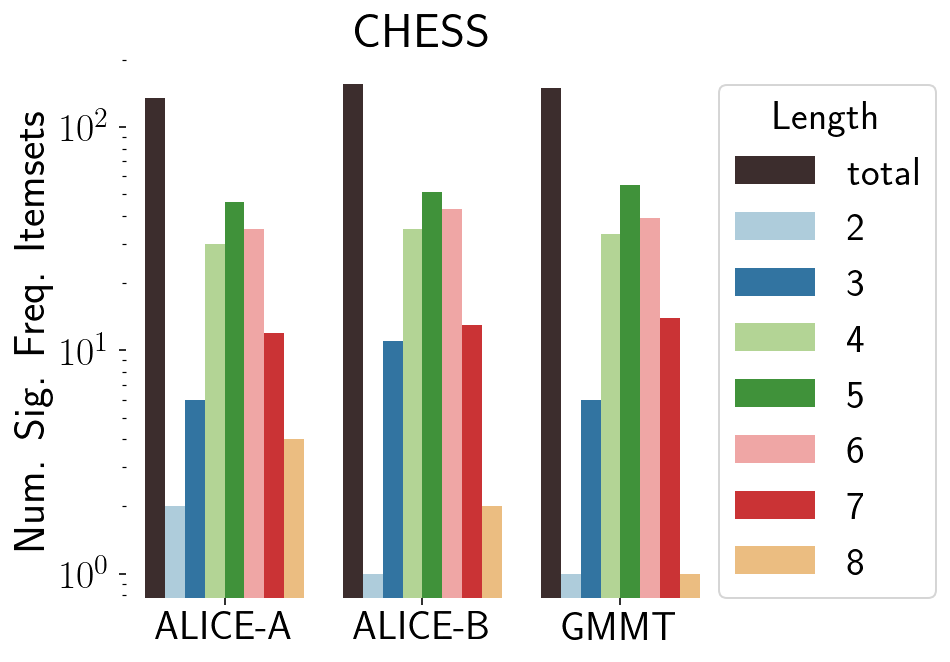

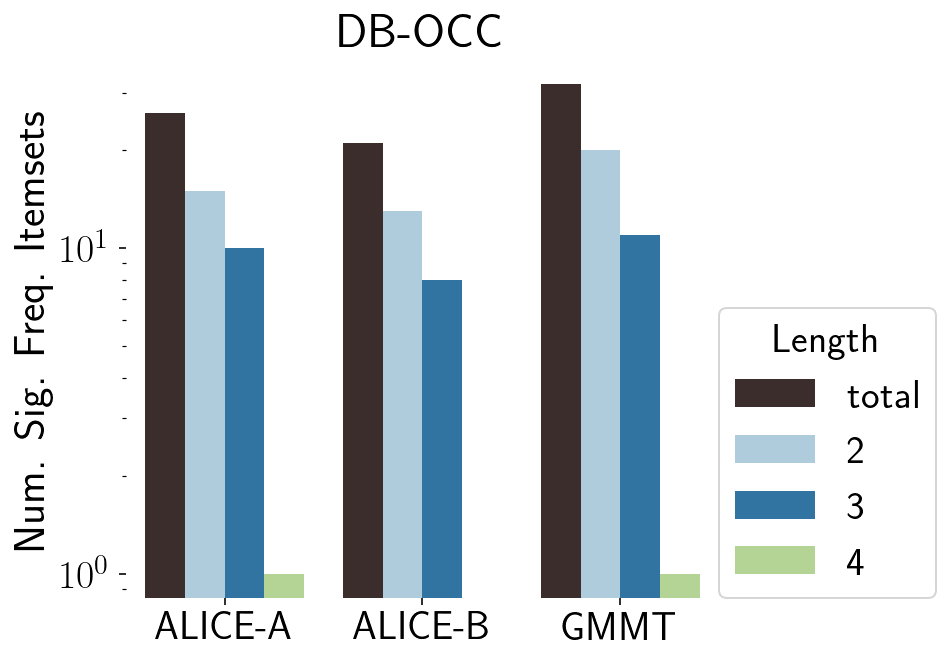

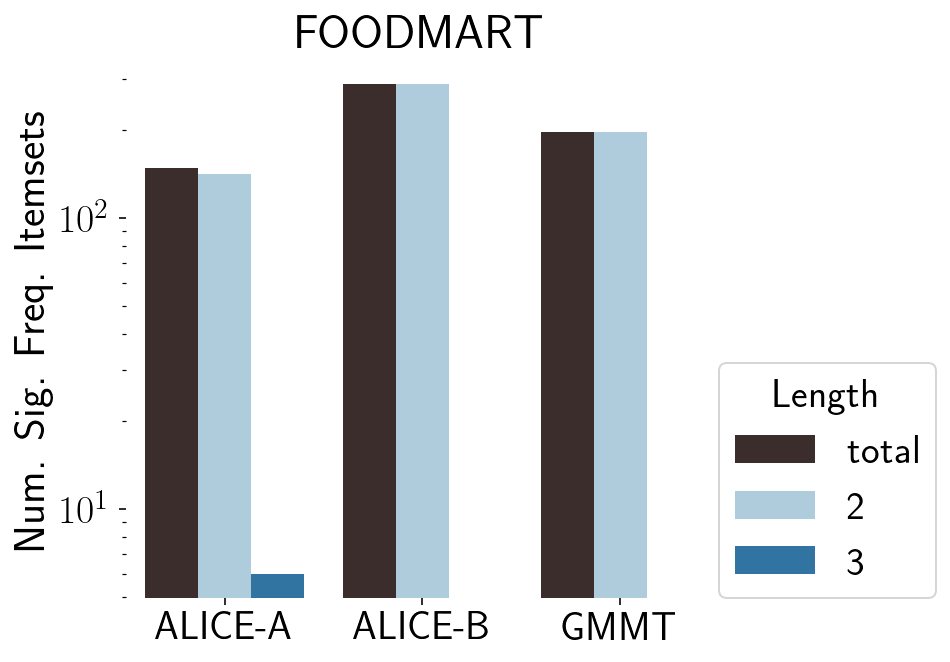

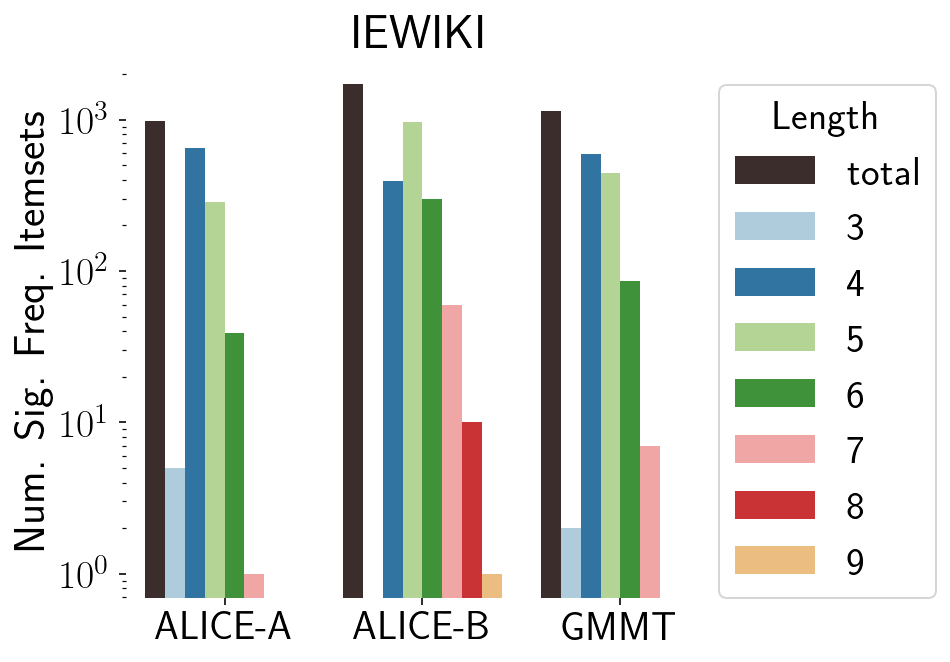

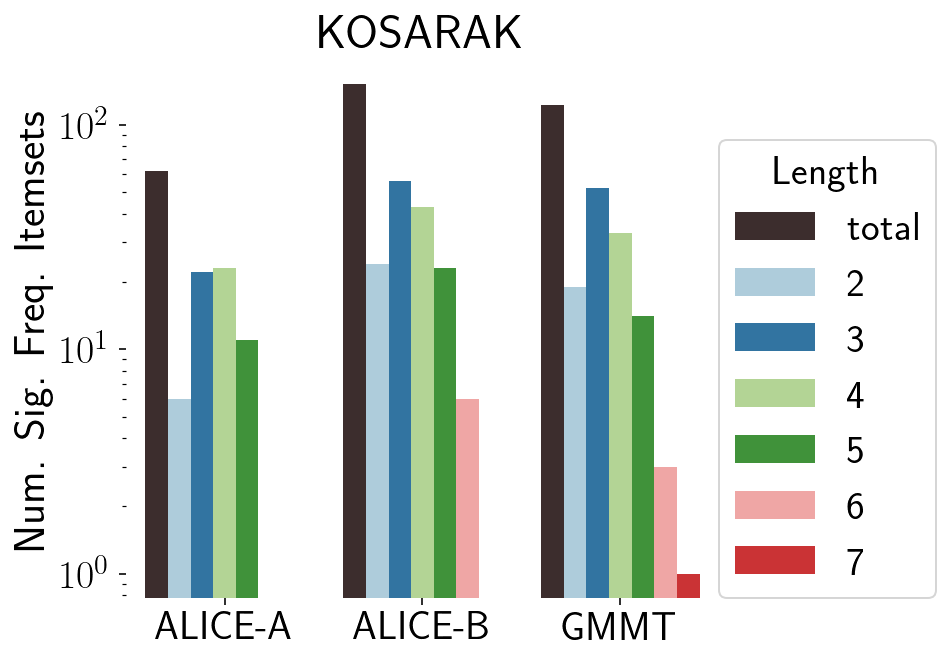

In [60]:
for db in summary['DataSet'].unique():
    data = summary[summary['DataSet']==db].sort_values(by='Size')
    total = data.groupby(by=['DataSet', 
                             'Sampler'])[['SSup']].sum().reset_index()
    total['Size'] = 'total'
    data = pd.concat([total, data])
    if data.empty: continue
    fig, ax = plt.subplots(figsize=(7,5))
    sns.barplot(data=data, x='Sampler', y='SSup', hue='Size', 
                palette=pal2, order=['ALICE-A', 'ALICE-B', 'GMMT'])
    ax.set_xlabel('')
    ax.set_ylabel('Num. Sig. Freq. Itemsets')
    ax.set_yscale('log')
    ax.set_title(db.upper())
    ncol = 1
    if len(data['Size'].unique()) > 10:
        ncol = 2
    ax.legend(title='Length', loc=(1,0), ncol=ncol)
    plt.tight_layout()
    plt.savefig(fig_dir+f'{db}_numSigItemsets.pdf')
    plt.show()

Table

In [360]:
agg_sum = summary.groupby(['DataSet', 'Sampler']).agg({'SSup':'sum'}).reset_index()
agg_sum.columns = ['Dataset', 'Sampler', 'Num Sig. Freq. Itemsets']

In [361]:
print(agg_sum.to_latex(index=False, float_format="%.4f", 
                       column_format='llr', position='!ht'))

\begin{table}[!ht]
\centering
\begin{tabular}{llr}
\toprule
 Dataset & Sampler &  Num Sig. Freq. Itemsets \\
\midrule
   chess & ALICE-A &                      135 \\
   chess & ALICE-B &                      156 \\
   chess &    GMMT &                      149 \\
  db-occ & ALICE-A &                       26 \\
  db-occ & ALICE-B &                       21 \\
  db-occ &    GMMT &                       32 \\
foodmart & ALICE-A &                      148 \\
foodmart & ALICE-B &                      289 \\
foodmart &    GMMT &                      197 \\
  iewiki & ALICE-A &                      981 \\
  iewiki & ALICE-B &                     1729 \\
  iewiki &    GMMT &                     1136 \\
 kosarak & ALICE-A &                       62 \\
 kosarak & ALICE-B &                      152 \\
 kosarak &    GMMT &                      122 \\
\bottomrule
\end{tabular}
\end{table}



## BJDM

- We generated 1000 samples.
- We performed 1000 steps.
- We created a BJDM vector of size maxRowSum * maxColSum, concatenating the values of the BJDM.
- We normalized the vector by the number of edges.
- Every 100 steps, we stored the EarthMoversDistance between the original BJDM vector and the current one.

In [111]:
result_dir = '../output/bjdm'
samps = ['caterpillars.samplers.NaiveBJDMSampler',
         'diffusr.samplers.GmmtSampler']
swaps = {'foodmart':1000,
         'BMS2':1000,
         'edit-iewikibooks':4352,
         'dbpedia-occupation':4352,
         'kosarak_3000':4352,
         'wang-tripadvisor':4352}

In [112]:
dfs = []
for db in swaps.keys():
    file_name = f'{result_dir}/{db}-10000-{swaps[db]}-0.json'
    with open(file_name) as f:
        stats = json.load(f)['runtimeStats']
        for sampler in samps:
            samplers_stats = stats[sampler]
            obs = len(samplers_stats["minDist"])
            distances = list()
            distances.extend(samplers_stats["minDist"])
            distances.extend(samplers_stats["c10Dist"])
            distances.extend(samplers_stats["q1Dist"])
            distances.extend(samplers_stats["meanDist"])
            distances.extend(samplers_stats["q3Dist"])
            distances.extend(samplers_stats["c90Dist"])
            distances.extend(samplers_stats["maxDist"])
            tmp = pd.DataFrame(distances)
            tmp['DataSet'] = dataset_names.get(db, db)
            tmp['Sampler'] = sampler
            dfs.append(tmp)

In [113]:
bjdm_df = pd.concat(dfs)

In [114]:
bjdm_df.columns = ['Distance', 'DataSet', 'Sampler']

In [115]:
bjdm_df['Sampler'] = bjdm_df['Sampler'].apply(lambda x: sampler_names[x])
bjdm_df['DataSet'] = bjdm_df['DataSet'].apply(lambda x: x.upper())

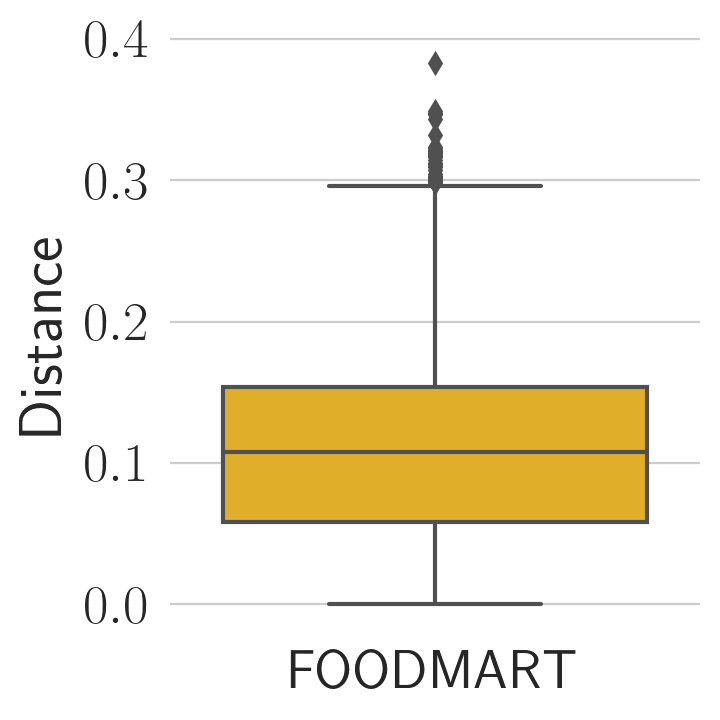

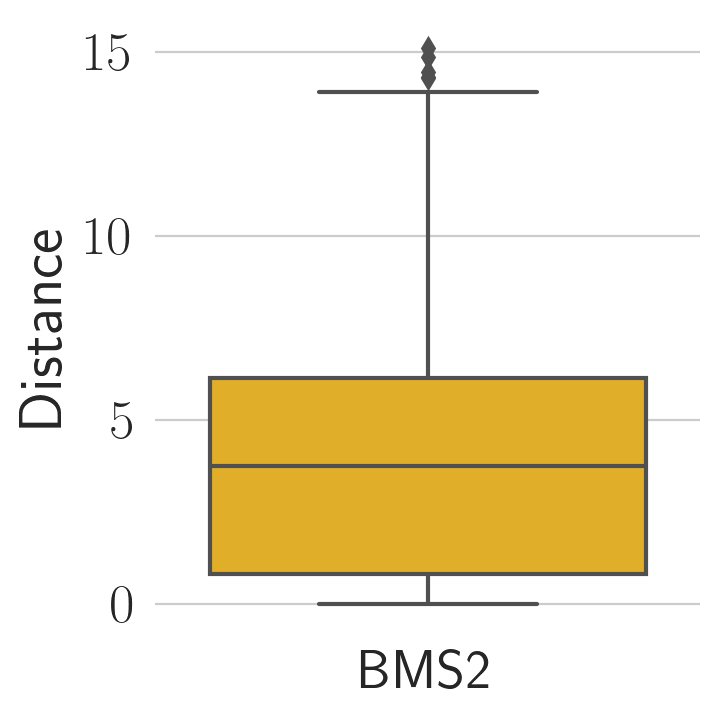

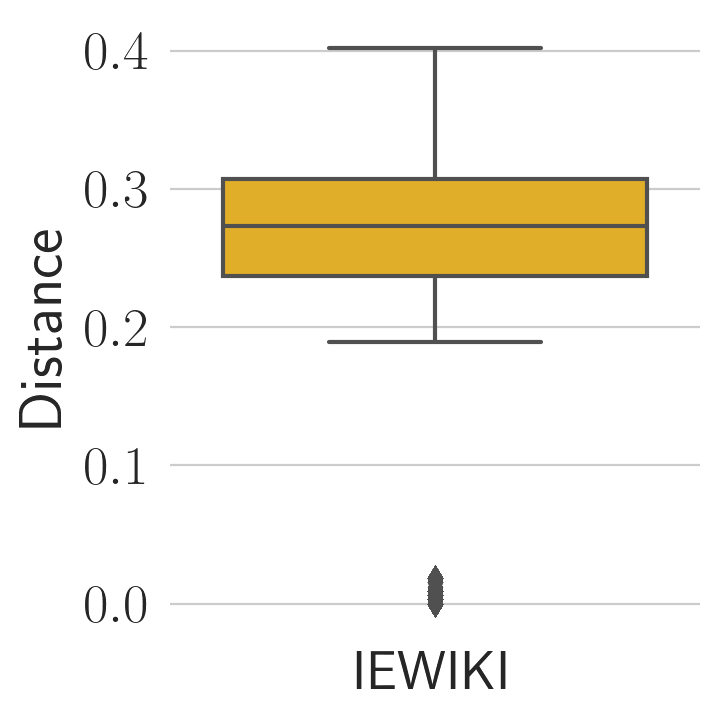

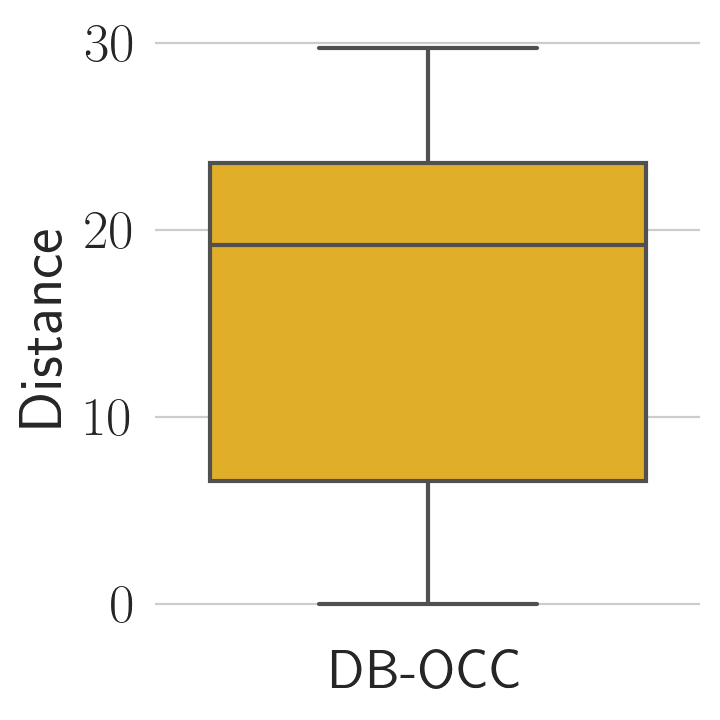

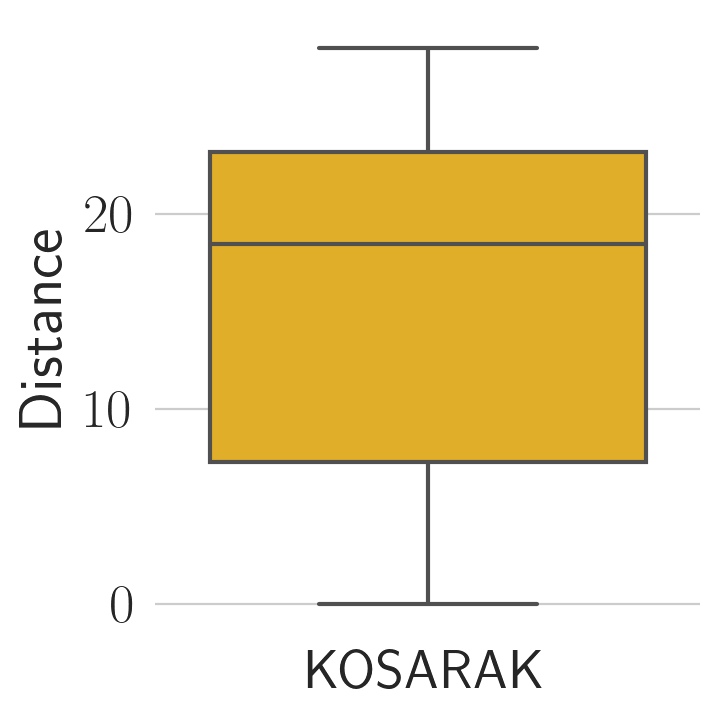

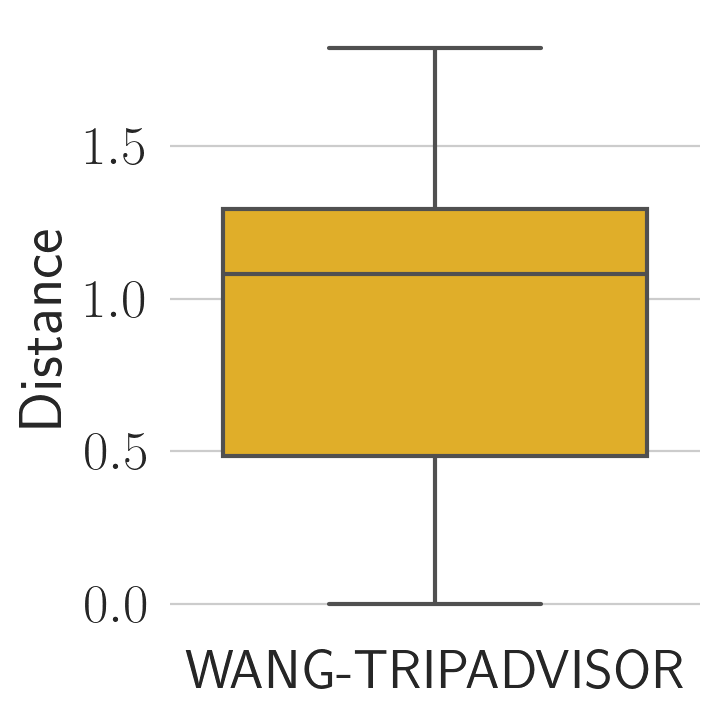

In [117]:
for db in bjdm_df['DataSet'].unique():
    data = bjdm_df[(bjdm_df['Sampler']=='GMMT') &
                   (bjdm_df['DataSet']==db)]
    if data['Distance'].sum() > 0:
        fig, ax = plt.subplots(figsize=(4,4))
        sns.boxplot(data=data, x='DataSet', y='Distance',
                    dodge=True, palette=palette[1:], ax=ax)
        ax.set_xlabel('')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        plt.tight_layout()
#         plt.savefig(fig_dir+f'{db}_bjdm.pdf')
        plt.show()

### Num of Caterpillars

In [75]:
result_dir = '../output/bjdm'
files = ['foodmart-10000-2176-0', 'kosarak_3000-10000-2176-0',
         'BMS1-10000-2176-0', 'BMS2-10000-2176-0']
dbs = ['FOODMART', 'KOSARAK', 'BMS1', 'BMS2']
cater = [953890, 87929772, 1129070086, 1963358091]

In [76]:
dfs = []
dfs_cater = []
for idx,file_name in enumerate(files):
    with open(f'{result_dir}/{file_name}.json') as f:
        stats = json.load(f)['runtimeStats']
        for sampler in stats.keys():
            samplers_stats = stats[sampler]
            # bjdm
            obs = len(samplers_stats["minDist"])
            distances = list()
            distances.extend(samplers_stats["minDist"])
            distances.extend(samplers_stats["c10Dist"])
            distances.extend(samplers_stats["q1Dist"])
            distances.extend(samplers_stats["meanDist"])
            distances.extend(samplers_stats["q3Dist"])
            distances.extend(samplers_stats["c90Dist"])
            distances.extend(samplers_stats["maxDist"])
            tmp = pd.DataFrame(distances)
            tmp['DataSet'] = dbs[idx]
            tmp['Algorithm'] = sampler_names[sampler]
            dfs.append(tmp)
            # caterpillars
            caterpillars = samplers_stats['numCater']
            tmp2 = pd.DataFrame(caterpillars)
            tmp2['DataSet'] = dbs[idx]
            tmp2['Algorithm'] = sampler_names[sampler]
            dfs_cater.append(tmp2)

In [77]:
bjdm_df = pd.concat(dfs)
cater_df = pd.concat(dfs_cater)

In [78]:
bjdm_df.columns = ['Distance', 'DataSet', 'Sampler']
cater_df.columns = ['Num Caterpillars', 'DataSet', 'Sampler']

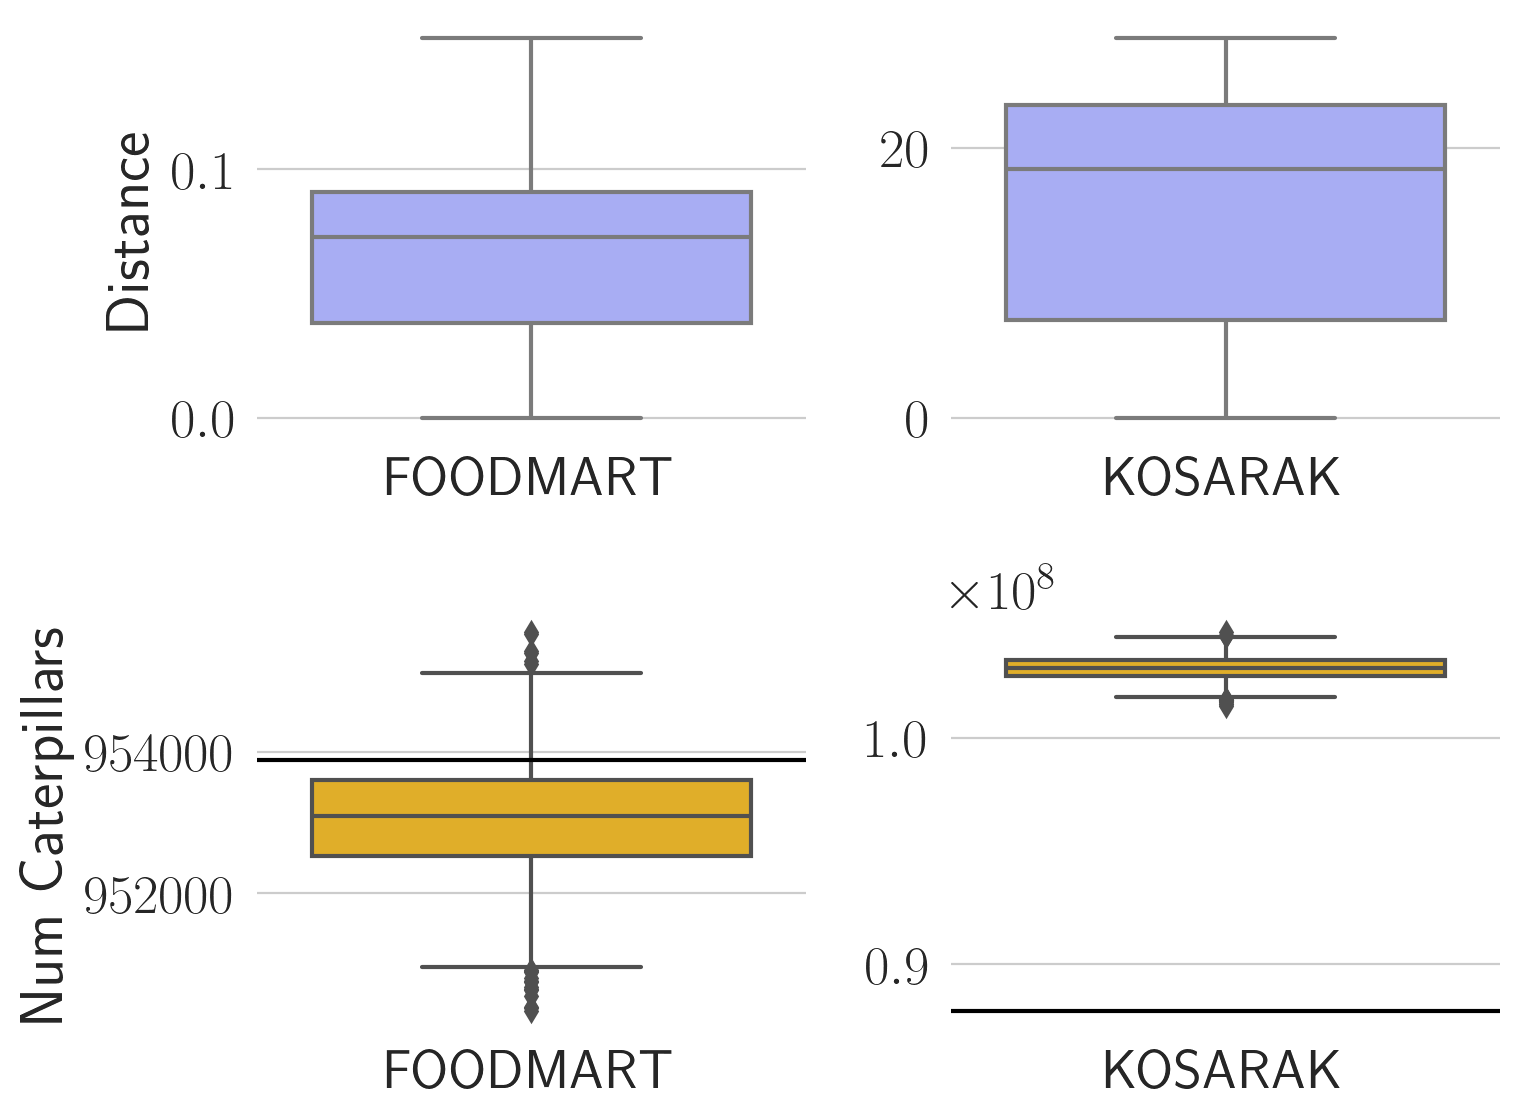

In [83]:
fig, ax = plt.subplots(2,2,figsize=(8,6))
for idx,db in enumerate(dbs[:2]):
    data = bjdm_df[(bjdm_df['Sampler']=='GMMT') &
                   (bjdm_df['DataSet']==db)]
    sns.boxplot(data=data, x='DataSet', y='Distance',
                dodge=True, palette=palette[0:], ax=ax[0][idx])
    
    ax[0][idx].set_xlabel('')
    if idx > 0:
        ax[0][idx].set_ylabel('')
    ax[0][idx].spines['right'].set_visible(False)
    ax[0][idx].spines['top'].set_visible(False)
    ax[0][idx].spines['left'].set_visible(False)
    ax[0][idx].spines['bottom'].set_visible(False)
    plt.tight_layout()
    
    data2 = cater_df[(cater_df['Sampler']=='GMMT') &
                     (cater_df['DataSet']==db)]
    g = sns.boxplot(data=data2, x='DataSet', y='Num Caterpillars',
                dodge=True, palette=palette[1:], ax=ax[1][idx])
    g.axhline(cater[idx], color='black')
    ax[1][idx].set_xlabel('')
    if idx > 0:
        ax[1][idx].set_ylabel('')
    ax[1][idx].spines['right'].set_visible(False)
    ax[1][idx].spines['top'].set_visible(False)
    ax[1][idx].spines['left'].set_visible(False)
    ax[1][idx].spines['bottom'].set_visible(False)
    plt.tight_layout()
    plt.savefig(fig_dir+'bjdm_caterpillars.pdf')
plt.show()